In [76]:
import ssl
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(context='notebook', style='white', palette='tab10')

import gym
import gym_anytrading
from gym_anytrading.envs import StocksEnv
import quantstats as qs
import pandas_ta as ta

from stable_baselines import A2C
from stable_baselines import PPO2
from stable_baselines.common.vec_env import DummyVecEnv

import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = 'https://www.cryptodatadownload.com/cdd/gemini_BTCUSD_day.csv'

ssl._create_default_https_context = ssl._create_unverified_context

bitcoin_df = pd.read_csv(file_path, skiprows=1)

In [3]:
bitcoin_df.head()

Unix Timestamp                 Date  Symbol      Open      High       Low  \
0   1624075200000  2021-06-19 04:00:00  BTCUSD  35129.23  36464.63  34970.25   
1   1623988800000  2021-06-18 04:00:00  BTCUSD  37938.20  38129.09  34845.33   
2   1623902400000  2021-06-17 04:00:00  BTCUSD  38875.00  39575.03  37221.62   
3   1623816000000  2021-06-16 04:00:00  BTCUSD  40043.69  40490.02  38059.01   
4   1623729600000  2021-06-15 04:00:00  BTCUSD  40429.38  41380.02  39503.90   

      Close       Volume  
0  35480.15  1389.165741  
1  35129.23  2958.675481  
2  37938.20  2520.913385  
3  38875.00  2783.604082  
4  40043.69  2687.612479

In [7]:
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date']).dt.date

In [8]:
bitcoin_df.dtypes

Unix Timestamp      int64
Date               object
Symbol             object
Open              float64
High              float64
Low               float64
Close             float64
Volume            float64
dtype: object

In [9]:
bitcoin_df.set_index('Date', inplace=True)

In [10]:
bitcoin_df.drop(labels=['Unix Timestamp', 'Symbol'], axis=1, inplace=True)

In [11]:
bitcoin_df.sort_index(ascending=True, inplace=True)

In [12]:
bitcoin_df.index = pd.to_datetime(bitcoin_df.index)

In [13]:
bitcoin_df.info

<bound method DataFrame.info of                 Open      High       Low     Close       Volume
Date                                                           
2015-10-08      0.00    245.00      0.00    243.60    34.754703
2015-10-09    243.60    249.97    243.60    245.51    61.587068
2015-10-10    245.51    246.30    244.60    246.30    30.870549
2015-10-11    246.30    249.50    245.96    248.98    22.747091
2015-10-12    248.98    248.98    245.75    245.75    71.047743
...              ...       ...       ...       ...          ...
2021-06-15  40429.38  41380.02  39503.90  40043.69  2687.612479
2021-06-16  40043.69  40490.02  38059.01  38875.00  2783.604082
2021-06-17  38875.00  39575.03  37221.62  37938.20  2520.913385
2021-06-18  37938.20  38129.09  34845.33  35129.23  2958.675481
2021-06-19  35129.23  36464.63  34970.25  35480.15  1389.165741

[2082 rows x 5 columns]>

In [14]:
df = pd.DataFrame()
help(df.ta)

Help on AnalysisIndicators in module pandas_ta.core object:

class AnalysisIndicators(BasePandasObject)
 |  AnalysisIndicators(df, **kwargs)
 |  
 |  AnalysisIndicators is a class that extends the Pandas DataFrame via
 |  Pandas @pd.api.extensions.register_dataframe_accessor('name') decorator.
 |  
 |  This Pandas Extension is named 'ta' for Technical Analysis that allows us
 |  to apply technical indicators by extension.  Even though 'ta' is a
 |  Pandas DataFrame Extension, you can still call the Indicators
 |  individually. Use help() if needed.
 |  
 |  By default the 'ta' extension uses lower case column names: open, high,
 |  low, close, and volume.  You can override the defaults by providing the
 |  it's replacement name when calling the indicator.  For example, to call the indicator hl2().
 |  
 |  With 'default' columns: open, high, low, close, and volume.
 |  >>> df.ta.hl2()
 |  >>> df.ta(kind="hl2")
 |  
 |  With DataFrame columns: Open, High, Low, Close, and Volume.
 |  >>>

In [15]:
df.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.2.45b0
Total Indicators: 133
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_doji, cdl_inside, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, decay, decreasing, dema, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, kama, kc, kdj, kst, kurtosis, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, ssf, stdev, stoch, stochrsi, supertrend, swma, t3, tema, thermo, trend_return, trima, trix, true_range, tsi, ttm_trend, ui, uo, variance, vidya, vortex, vp, vwap, vwma, wcp, willr, wma, zlm

In [21]:
help(ta.obv)

Help on function obv in module pandas_ta.volume.obv:

obv(close, volume, offset=None, **kwargs)
    On Balance Volume (OBV)
    
    On Balance Volume is a cumulative indicator to measure buying and selling
    pressure.
    
    Sources:
        https://www.tradingview.com/wiki/On_Balance_Volume_(OBV)
        https://www.tradingtechnologies.com/help/x-study/technical-indicator-definitions/on-balance-volume-obv/
        https://www.motivewave.com/studies/on_balance_volume.htm
    
    Calculation:
        signed_volume = signed_series(close, initial=1) * volume
        obv = signed_volume.cumsum()
    
    Args:
        close (pd.Series): Series of 'close's
        volume (pd.Series): Series of 'volume's
        offset (int): How many periods to offset the result. Default: 0
    
    Kwargs:
        fillna (value, optional): pd.DataFrame.fillna(value)
        fill_method (value, optional): Type of fill method
    
    Returns:
        pd.Series: New feature generated.



In [22]:
bitcoin_df['EMA10'] = ta.ema(bitcoin_df['Close'], length=10)
bitcoin_df['EMA25'] = ta.ema(bitcoin_df['Close'], length=25)
bitcoin_df['MACD'] = ta.ema(bitcoin_df['Close'])
bitcoin_df['OBV'] = ta.ema(bitcoin_df['Close'])

In [25]:
bitcoin_df.fillna(0, inplace=True)
bitcoin_df.head(30)

Open    High     Low   Close       Volume       EMA10  \
Date                                                                  
2015-10-08    0.00  245.00    0.00  243.60    34.754703    0.000000   
2015-10-09  243.60  249.97  243.60  245.51    61.587068    0.000000   
2015-10-10  245.51  246.30  244.60  246.30    30.870549    0.000000   
2015-10-11  246.30  249.50  245.96  248.98    22.747091    0.000000   
2015-10-12  248.98  248.98  245.75  245.75    71.047743    0.000000   
2015-10-13  245.75  252.87  245.75  251.00   154.686596    0.000000   
2015-10-14  251.00  256.15  250.70  254.59   184.552069    0.000000   
2015-10-15  254.59  258.98  253.00  257.19   410.961930    0.000000   
2015-10-16  257.19  285.00  255.90  270.00   552.129457    0.000000   
2015-10-17  270.00  274.98  267.71  269.26   204.251309  253.218000   
2015-10-18  269.26  274.89  264.01  269.99    24.952072  256.267455   
2015-10-19  269.99  274.77  265.00  273.87   249.950853  259.467917   
2015-10-20  273.87  275.99  266.89  272.50    90.660388  261.837387   
2015-10-21  272.50  272.75  269.50  271.50   392.222006  263.594226   
2015-10-22  271.50  279.98  271.50  278.25   629.850626  266.258912   
2015-10-23  278.25  283.95  276.89  281.78   748.689338  269.080928   
2015-10-24  281.78  290.00  280.97  290.00   211.463386  272.884396   
2015-10-25  290.00  297.00  284.98  285.00   139.957399  275.087233   
2015-10-26  285.00  296.99  283.99  291.69   480.279791  278.105918   
2015-10-27  291.69  299.00  288.53  298.38   650.240803  281.792114   
2015-10-28  298.38  309.00  298.38  306.99  1204.537591  286.373548   
2015-10-29  306.99  329.94  261.51  329.93  2181.523149  294.292903   
2015-10-30  329.93  374.00  317.86  334.89  1571.871234  301.674193   
2015-10-31  334.89  334.89  309.15  315.14   236.886148  304.122522   
2015-11-01  315.14  330.00  299.76  328.00   570.517586  308.463882   
2015-11-02  328.00  376.54  327.75  375.00  3164.775059  320.561358   
2015-11-03  375.00  441.87  370.23  439.00  2805.051265  342.095656   
2015-11-04  439.00  500.00  365.00  441.95  2176.613963  360.250991   
2015-11-05  441.95  441.95  355.00  367.49  1559.646182  361.567175   
2015-11-06  367.49  399.70  354.01  374.97  1183.769872  364.004052   

                 EMA25        MACD         OBV  
Date                                            
2015-10-08    0.000000    0.000000    0.000000  
2015-10-09    0.000000    0.000000    0.000000  
2015-10-10    0.000000    0.000000    0.000000  
2015-10-11    0.000000    0.000000    0.000000  
2015-10-12    0.000000    0.000000    0.000000  
2015-10-13    0.000000    0.000000    0.000000  
2015-10-14    0.000000    0.000000    0.000000  
2015-10-15    0.000000    0.000000    0.000000  
2015-10-16    0.000000    0.000000    0.000000  
2015-10-17    0.000000  253.218000  253.218000  
2015-10-18    0.000000  256.267455  256.267455  
2015-10-19    0.000000  259.467917  259.467917  
2015-10-20    0.000000  261.837387  261.837387  
2015-10-21    0.000000  263.594226  263.594226  
2015-10-22    0.000000  266.258912  266.258912  
2015-10-23    0.000000  269.080928  269.080928  
2015-10-24    0.000000  272.884396  272.884396  
2015-10-25    0.000000  275.087233  275.087233  
2015-10-26    0.000000  278.105918  278.105918  
2015-10-27    0.000000  281.792114  281.792114  
2015-10-28    0.000000  286.373548  286.373548  
2015-10-29    0.000000  294.292903  294.292903  
2015-10-30    0.000000  301.674193  301.674193  
2015-10-31    0.000000  304.122522  304.122522  
2015-11-01  278.403600  308.463882  308.463882  
2015-11-02  285.834092  320.561358  320.561358  
2015-11-03  297.616085  342.095656  342.095656  
2015-11-04  308.718694  360.250991  360.250991  
2015-11-05  313.239564  361.567175  361.567175  
2015-11-06  317.988059  364.004052  364.004052

In [26]:
train_start = 25
train_end = round(len(bitcoin_df) * 0.8)

In [27]:
test_start = train_end + 1
test_end = len(bitcoin_df)

In [28]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Close'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Close', 'Volume','EMA10', 'EMA25', 'MACD', 'OBV']].to_numpy()[start:end]
    return prices, signal_features

In [31]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals
    
env = MyCustomEnv(df=bitcoin_df, window_size=train_start, frame_bound=(train_start, train_end))

In [32]:
len(env.signal_features)

1666

In [33]:
env.action_space

Discrete(2)

In [34]:
env_maker = lambda: env
env = DummyVecEnv([env_maker])

In [72]:
total_timesteps = 1_000_000
# policy_kwargs = dict(net_arch=[256, 'lstm', dict(vf=[128, 64, 32], pi=[128, 64, 32])])
# model = A2C('MlpLstmPolicy', env, verbose=1, policy_kwargs=policy_kwargs)
model = A2C('MlpLstmPolicy', env, verbose=1)
model.learn(total_timesteps=total_timesteps)

Wrapping the env in a DummyVecEnv.
---------------------------------
| explained_variance | -423     |
| fps                | 18       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 0.000283 |
---------------------------------
----------------------------------
| explained_variance | -0.000251 |
| fps                | 554       |
| nupdates           | 100       |
| policy_entropy     | 0.693     |
| total_timesteps    | 500       |
| value_loss         | 1.33e+04  |
----------------------------------
----------------------------------
| explained_variance | -0.000488 |
| fps                | 666       |
| nupdates           | 200       |
| policy_entropy     | 0.693     |
| total_timesteps    | 1000      |
| value_loss         | 678       |
----------------------------------
---------------------------------
| explained_variance | 3.93e-05 |
| fps                | 733      |
| nupdates           | 300     

---------------------------------
| explained_variance | 0.00407  |
| fps                | 856      |
| nupdates           | 3000     |
| policy_entropy     | 0.693    |
| total_timesteps    | 15000    |
| value_loss         | 241      |
---------------------------------
---------------------------------
| explained_variance | 0.00294  |
| fps                | 860      |
| nupdates           | 3100     |
| policy_entropy     | 0.691    |
| total_timesteps    | 15500    |
| value_loss         | 1.53e+04 |
---------------------------------
----------------------------------
| explained_variance | -2.54e-05 |
| fps                | 863       |
| nupdates           | 3200      |
| policy_entropy     | 0.693     |
| total_timesteps    | 16000     |
| value_loss         | 6.48e+06  |
----------------------------------
---------------------------------
| explained_variance | 0.000396 |
| fps                | 867      |
| nupdates           | 3300     |
| policy_entropy     | 0.644    |
| tota

---------------------------------
| explained_variance | 0.265    |
| fps                | 874      |
| nupdates           | 6000     |
| policy_entropy     | 0.691    |
| total_timesteps    | 30000    |
| value_loss         | 0.37     |
---------------------------------
---------------------------------
| explained_variance | 1.72e-05 |
| fps                | 876      |
| nupdates           | 6100     |
| policy_entropy     | 0.664    |
| total_timesteps    | 30500    |
| value_loss         | 5.88e+06 |
---------------------------------
----------------------------------
| explained_variance | -0.000252 |
| fps                | 878       |
| nupdates           | 6200      |
| policy_entropy     | 0.561     |
| total_timesteps    | 31000     |
| value_loss         | 1.3e+07   |
----------------------------------
---------------------------------
| explained_variance | -0.00282 |
| fps                | 878      |
| nupdates           | 6300     |
| policy_entropy     | 0.676    |
| tota

---------------------------------
| explained_variance | 0.000679 |
| fps                | 890      |
| nupdates           | 9000     |
| policy_entropy     | 0.659    |
| total_timesteps    | 45000    |
| value_loss         | 2.51e+05 |
---------------------------------
----------------------------------
| explained_variance | -1.67e-06 |
| fps                | 891       |
| nupdates           | 9100      |
| policy_entropy     | 0.603     |
| total_timesteps    | 45500     |
| value_loss         | 4.88e+06  |
----------------------------------
---------------------------------
| explained_variance | -0.0051  |
| fps                | 892      |
| nupdates           | 9200     |
| policy_entropy     | 0.683    |
| total_timesteps    | 46000    |
| value_loss         | 1.77e+04 |
---------------------------------
---------------------------------
| explained_variance | -0.00154 |
| fps                | 893      |
| nupdates           | 9300     |
| policy_entropy     | 0.688    |
| tota

----------------------------------
| explained_variance | -3.91e-05 |
| fps                | 900       |
| nupdates           | 12000     |
| policy_entropy     | 0.658     |
| total_timesteps    | 60000     |
| value_loss         | 1.15e+07  |
----------------------------------
----------------------------------
| explained_variance | -0.000201 |
| fps                | 898       |
| nupdates           | 12100     |
| policy_entropy     | 0.692     |
| total_timesteps    | 60500     |
| value_loss         | 1.32e+05  |
----------------------------------
---------------------------------
| explained_variance | -0.00183 |
| fps                | 895      |
| nupdates           | 12200    |
| policy_entropy     | 0.685    |
| total_timesteps    | 61000    |
| value_loss         | 4.43e+03 |
---------------------------------
---------------------------------
| explained_variance | 9.6e-06  |
| fps                | 892      |
| nupdates           | 12300    |
| policy_entropy     | 0.667    

---------------------------------
| explained_variance | -0.00285 |
| fps                | 891      |
| nupdates           | 15000    |
| policy_entropy     | 0.666    |
| total_timesteps    | 75000    |
| value_loss         | 1.09e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.00428 |
| fps                | 889      |
| nupdates           | 15100    |
| policy_entropy     | 0.53     |
| total_timesteps    | 75500    |
| value_loss         | 4.65e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.000173 |
| fps                | 887      |
| nupdates           | 15200    |
| policy_entropy     | 0.66     |
| total_timesteps    | 76000    |
| value_loss         | 1.19e+05 |
---------------------------------
----------------------------------
| explained_variance | -1.22e-05 |
| fps                | 888       |
| nupdates           | 15300     |
| policy_entropy     | 0.517     |
| total_t

----------------------------------
| explained_variance | -0.000219 |
| fps                | 881       |
| nupdates           | 18100     |
| policy_entropy     | 0.654     |
| total_timesteps    | 90500     |
| value_loss         | 2.29e+03  |
----------------------------------
---------------------------------
| explained_variance | 0.000367 |
| fps                | 881      |
| nupdates           | 18200    |
| policy_entropy     | 0.668    |
| total_timesteps    | 91000    |
| value_loss         | 3.16e+06 |
---------------------------------
---------------------------------
| explained_variance | 0.513    |
| fps                | 880      |
| nupdates           | 18300    |
| policy_entropy     | 0.517    |
| total_timesteps    | 91500    |
| value_loss         | 6.18e+05 |
---------------------------------
---------------------------------
| explained_variance | -0.0361  |
| fps                | 880      |
| nupdates           | 18400    |
| policy_entropy     | 0.674    |
| tota

---------------------------------
| explained_variance | -0.881   |
| fps                | 883      |
| nupdates           | 21100    |
| policy_entropy     | 0.629    |
| total_timesteps    | 105500   |
| value_loss         | 2.96     |
---------------------------------
---------------------------------
| explained_variance | -0.0419  |
| fps                | 884      |
| nupdates           | 21200    |
| policy_entropy     | 0.473    |
| total_timesteps    | 106000   |
| value_loss         | 1.24e+06 |
---------------------------------
----------------------------------
| explained_variance | -0.000907 |
| fps                | 884       |
| nupdates           | 21300     |
| policy_entropy     | 0.659     |
| total_timesteps    | 106500    |
| value_loss         | 1.36e+04  |
----------------------------------
---------------------------------
| explained_variance | -0.0992  |
| fps                | 884      |
| nupdates           | 21400    |
| policy_entropy     | 0.668    |
| tota

---------------------------------
| explained_variance | -0.999   |
| fps                | 881      |
| nupdates           | 24200    |
| policy_entropy     | 0.673    |
| total_timesteps    | 121000   |
| value_loss         | 1.43     |
---------------------------------
---------------------------------
| explained_variance | 0.000252 |
| fps                | 881      |
| nupdates           | 24300    |
| policy_entropy     | 0.686    |
| total_timesteps    | 121500   |
| value_loss         | 3.57e+05 |
---------------------------------
---------------------------------
| explained_variance | -0.835   |
| fps                | 882      |
| nupdates           | 24400    |
| policy_entropy     | 0.689    |
| total_timesteps    | 122000   |
| value_loss         | 1.64     |
---------------------------------
---------------------------------
| explained_variance | -0.923   |
| fps                | 881      |
| nupdates           | 24500    |
| policy_entropy     | 0.693    |
| total_timest

---------------------------------
| explained_variance | 0.0019   |
| fps                | 884      |
| nupdates           | 27200    |
| policy_entropy     | 0.692    |
| total_timesteps    | 136000   |
| value_loss         | 458      |
---------------------------------
----------------------------------
| explained_variance | -7.39e-06 |
| fps                | 883       |
| nupdates           | 27300     |
| policy_entropy     | 0.691     |
| total_timesteps    | 136500    |
| value_loss         | 9.14e+05  |
----------------------------------
---------------------------------
| explained_variance | 9.6e-06  |
| fps                | 883      |
| nupdates           | 27400    |
| policy_entropy     | 0.624    |
| total_timesteps    | 137000   |
| value_loss         | 1.29e+06 |
---------------------------------
---------------------------------
| explained_variance | -0.0397  |
| fps                | 883      |
| nupdates           | 27500    |
| policy_entropy     | 0.68     |
| tota

---------------------------------
| explained_variance | 1.19e-05 |
| fps                | 882      |
| nupdates           | 30200    |
| policy_entropy     | 0.677    |
| total_timesteps    | 151000   |
| value_loss         | 2.72e+06 |
---------------------------------
---------------------------------
| explained_variance | 0.00156  |
| fps                | 882      |
| nupdates           | 30300    |
| policy_entropy     | 0.625    |
| total_timesteps    | 151500   |
| value_loss         | 1.26e+07 |
---------------------------------
---------------------------------
| explained_variance | 0.0113   |
| fps                | 881      |
| nupdates           | 30400    |
| policy_entropy     | 0.621    |
| total_timesteps    | 152000   |
| value_loss         | 1.66e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.0042   |
| fps                | 881      |
| nupdates           | 30500    |
| policy_entropy     | 0.693    |
| total_timest

---------------------------------
| explained_variance | -0.0287  |
| fps                | 884      |
| nupdates           | 33300    |
| policy_entropy     | 0.648    |
| total_timesteps    | 166500   |
| value_loss         | 2.96e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.0404  |
| fps                | 884      |
| nupdates           | 33400    |
| policy_entropy     | 0.68     |
| total_timesteps    | 167000   |
| value_loss         | 501      |
---------------------------------
----------------------------------
| explained_variance | -3.61e-05 |
| fps                | 884       |
| nupdates           | 33500     |
| policy_entropy     | 0.529     |
| total_timesteps    | 167500    |
| value_loss         | 3e+05     |
----------------------------------
---------------------------------
| explained_variance | 0.000847 |
| fps                | 883      |
| nupdates           | 33600    |
| policy_entropy     | 0.688    |
| tota

----------------------------------
| explained_variance | -5.07e-05 |
| fps                | 879       |
| nupdates           | 36400     |
| policy_entropy     | 0.689     |
| total_timesteps    | 182000    |
| value_loss         | 6.59e+06  |
----------------------------------
---------------------------------
| explained_variance | 0.0018   |
| fps                | 880      |
| nupdates           | 36500    |
| policy_entropy     | 0.541    |
| total_timesteps    | 182500   |
| value_loss         | 6.07e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.0104   |
| fps                | 880      |
| nupdates           | 36600    |
| policy_entropy     | 0.637    |
| total_timesteps    | 183000   |
| value_loss         | 4.08e+04 |
---------------------------------
---------------------------------
| explained_variance | -0.00114 |
| fps                | 880      |
| nupdates           | 36700    |
| policy_entropy     | 0.69     |
| tota

---------------------------------
| explained_variance | 3.44e-05 |
| fps                | 887      |
| nupdates           | 39400    |
| policy_entropy     | 0.688    |
| total_timesteps    | 197000   |
| value_loss         | 4.12e+06 |
---------------------------------
---------------------------------
| explained_variance | 0.00284  |
| fps                | 888      |
| nupdates           | 39500    |
| policy_entropy     | 0.679    |
| total_timesteps    | 197500   |
| value_loss         | 1.91e+05 |
---------------------------------
---------------------------------
| explained_variance | -0.00236 |
| fps                | 888      |
| nupdates           | 39600    |
| policy_entropy     | 0.559    |
| total_timesteps    | 198000   |
| value_loss         | 5.72e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.00296  |
| fps                | 888      |
| nupdates           | 39700    |
| policy_entropy     | 0.693    |
| total_timest

---------------------------------
| explained_variance | -0.0109  |
| fps                | 895      |
| nupdates           | 42400    |
| policy_entropy     | 0.693    |
| total_timesteps    | 212000   |
| value_loss         | 1.44e+04 |
---------------------------------
---------------------------------
| explained_variance | -0.00637 |
| fps                | 895      |
| nupdates           | 42500    |
| policy_entropy     | 0.657    |
| total_timesteps    | 212500   |
| value_loss         | 3.56e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.00317  |
| fps                | 895      |
| nupdates           | 42600    |
| policy_entropy     | 0.691    |
| total_timesteps    | 213000   |
| value_loss         | 159      |
---------------------------------
---------------------------------
| explained_variance | 0.00445  |
| fps                | 895      |
| nupdates           | 42700    |
| policy_entropy     | 0.676    |
| total_timest

---------------------------------
| explained_variance | 0.000155 |
| fps                | 902      |
| nupdates           | 45500    |
| policy_entropy     | 0.61     |
| total_timesteps    | 227500   |
| value_loss         | 3.2e+05  |
---------------------------------
----------------------------------
| explained_variance | -5.58e-05 |
| fps                | 902       |
| nupdates           | 45600     |
| policy_entropy     | 0.688     |
| total_timesteps    | 228000    |
| value_loss         | 3.45e+05  |
----------------------------------
---------------------------------
| explained_variance | -0.00258 |
| fps                | 902      |
| nupdates           | 45700    |
| policy_entropy     | 0.69     |
| total_timesteps    | 228500   |
| value_loss         | 1.78e+07 |
---------------------------------
---------------------------------
| explained_variance | 0.0278   |
| fps                | 902      |
| nupdates           | 45800    |
| policy_entropy     | 0.523    |
| tota

---------------------------------
| explained_variance | 0.000165 |
| fps                | 908      |
| nupdates           | 48500    |
| policy_entropy     | 0.693    |
| total_timesteps    | 242500   |
| value_loss         | 1e+06    |
---------------------------------
---------------------------------
| explained_variance | 0.000429 |
| fps                | 908      |
| nupdates           | 48600    |
| policy_entropy     | 0.688    |
| total_timesteps    | 243000   |
| value_loss         | 1.14e+06 |
---------------------------------
---------------------------------
| explained_variance | -0.0103  |
| fps                | 908      |
| nupdates           | 48700    |
| policy_entropy     | 0.59     |
| total_timesteps    | 243500   |
| value_loss         | 727      |
---------------------------------
---------------------------------
| explained_variance | -0.207   |
| fps                | 908      |
| nupdates           | 48800    |
| policy_entropy     | 0.683    |
| total_timest

----------------------------------
| explained_variance | -0.000542 |
| fps                | 913       |
| nupdates           | 51500     |
| policy_entropy     | 0.554     |
| total_timesteps    | 257500    |
| value_loss         | 1.01e+07  |
----------------------------------
---------------------------------
| explained_variance | 0.0107   |
| fps                | 913      |
| nupdates           | 51600    |
| policy_entropy     | 0.674    |
| total_timesteps    | 258000   |
| value_loss         | 4.48e+03 |
---------------------------------
----------------------------------
| explained_variance | -0.000534 |
| fps                | 913       |
| nupdates           | 51700     |
| policy_entropy     | 0.672     |
| total_timesteps    | 258500    |
| value_loss         | 2.15e+05  |
----------------------------------
---------------------------------
| explained_variance | -1e-05   |
| fps                | 914      |
| nupdates           | 51800    |
| policy_entropy     | 0.667    

---------------------------------
| explained_variance | -0.118   |
| fps                | 918      |
| nupdates           | 54500    |
| policy_entropy     | 0.584    |
| total_timesteps    | 272500   |
| value_loss         | 4.92     |
---------------------------------
---------------------------------
| explained_variance | -0.00167 |
| fps                | 917      |
| nupdates           | 54600    |
| policy_entropy     | 0.689    |
| total_timesteps    | 273000   |
| value_loss         | 1.74e+05 |
---------------------------------
----------------------------------
| explained_variance | -0.000232 |
| fps                | 917       |
| nupdates           | 54700     |
| policy_entropy     | 0.683     |
| total_timesteps    | 273500    |
| value_loss         | 1.64e+06  |
----------------------------------
---------------------------------
| explained_variance | 0.00273  |
| fps                | 917      |
| nupdates           | 54800    |
| policy_entropy     | 0.693    |
| tota

---------------------------------
| explained_variance | 0.301    |
| fps                | 912      |
| nupdates           | 57600    |
| policy_entropy     | 0.687    |
| total_timesteps    | 288000   |
| value_loss         | 5.87     |
---------------------------------
----------------------------------
| explained_variance | -0.000787 |
| fps                | 912       |
| nupdates           | 57700     |
| policy_entropy     | 0.674     |
| total_timesteps    | 288500    |
| value_loss         | 2.38e+06  |
----------------------------------
---------------------------------
| explained_variance | -0.00181 |
| fps                | 912      |
| nupdates           | 57800    |
| policy_entropy     | 0.684    |
| total_timesteps    | 289000   |
| value_loss         | 1.09e+05 |
---------------------------------
---------------------------------
| explained_variance | -0.00382 |
| fps                | 912      |
| nupdates           | 57900    |
| policy_entropy     | 0.685    |
| tota

---------------------------------
| explained_variance | 0.278    |
| fps                | 909      |
| nupdates           | 60700    |
| policy_entropy     | 0.444    |
| total_timesteps    | 303500   |
| value_loss         | 2.47e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.00355  |
| fps                | 909      |
| nupdates           | 60800    |
| policy_entropy     | 0.692    |
| total_timesteps    | 304000   |
| value_loss         | 1.52e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.00162  |
| fps                | 909      |
| nupdates           | 60900    |
| policy_entropy     | 0.68     |
| total_timesteps    | 304500   |
| value_loss         | 1.78e+06 |
---------------------------------
----------------------------------
| explained_variance | -7.63e-06 |
| fps                | 909       |
| nupdates           | 61000     |
| policy_entropy     | 0.64      |
| total_t

---------------------------------
| explained_variance | -0.612   |
| fps                | 906      |
| nupdates           | 63700    |
| policy_entropy     | 0.514    |
| total_timesteps    | 318500   |
| value_loss         | 4.1e+04  |
---------------------------------
---------------------------------
| explained_variance | -0.00013 |
| fps                | 906      |
| nupdates           | 63800    |
| policy_entropy     | 0.691    |
| total_timesteps    | 319000   |
| value_loss         | 1.47e+05 |
---------------------------------
----------------------------------
| explained_variance | -5.13e-06 |
| fps                | 906       |
| nupdates           | 63900     |
| policy_entropy     | 0.641     |
| total_timesteps    | 319500    |
| value_loss         | 3.83e+06  |
----------------------------------
---------------------------------
| explained_variance | -0.0447  |
| fps                | 906      |
| nupdates           | 64000    |
| policy_entropy     | 0.526    |
| tota

---------------------------------
| explained_variance | 0.000328 |
| fps                | 903      |
| nupdates           | 66700    |
| policy_entropy     | 0.665    |
| total_timesteps    | 333500   |
| value_loss         | 9.45e+03 |
---------------------------------
----------------------------------
| explained_variance | -0.000916 |
| fps                | 902       |
| nupdates           | 66800     |
| policy_entropy     | 0.613     |
| total_timesteps    | 334000    |
| value_loss         | 4.16e+05  |
----------------------------------
---------------------------------
| explained_variance | 0.0245   |
| fps                | 902      |
| nupdates           | 66900    |
| policy_entropy     | 0.652    |
| total_timesteps    | 334500   |
| value_loss         | 1.85e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.0884   |
| fps                | 902      |
| nupdates           | 67000    |
| policy_entropy     | 0.674    |
| tota

----------------------------------
| explained_variance | -0.000586 |
| fps                | 897       |
| nupdates           | 69800     |
| policy_entropy     | 0.643     |
| total_timesteps    | 349000    |
| value_loss         | 2.77e+06  |
----------------------------------
---------------------------------
| explained_variance | 0.00722  |
| fps                | 896      |
| nupdates           | 69900    |
| policy_entropy     | 0.693    |
| total_timesteps    | 349500   |
| value_loss         | 1.29e+04 |
---------------------------------
---------------------------------
| explained_variance | -0.0162  |
| fps                | 896      |
| nupdates           | 70000    |
| policy_entropy     | 0.664    |
| total_timesteps    | 350000   |
| value_loss         | 1.82e+04 |
---------------------------------
---------------------------------
| explained_variance | -0.00181 |
| fps                | 896      |
| nupdates           | 70100    |
| policy_entropy     | 0.633    |
| tota

---------------------------------
| explained_variance | 0.196    |
| fps                | 886      |
| nupdates           | 72900    |
| policy_entropy     | 0.559    |
| total_timesteps    | 364500   |
| value_loss         | 7.84     |
---------------------------------
---------------------------------
| explained_variance | 0.00159  |
| fps                | 886      |
| nupdates           | 73000    |
| policy_entropy     | 0.607    |
| total_timesteps    | 365000   |
| value_loss         | 2.7e+05  |
---------------------------------
---------------------------------
| explained_variance | 0.000514 |
| fps                | 886      |
| nupdates           | 73100    |
| policy_entropy     | 0.68     |
| total_timesteps    | 365500   |
| value_loss         | 4.7e+07  |
---------------------------------
---------------------------------
| explained_variance | -0.00527 |
| fps                | 886      |
| nupdates           | 73200    |
| policy_entropy     | 0.65     |
| total_timest

---------------------------------
| explained_variance | 0.00108  |
| fps                | 883      |
| nupdates           | 75900    |
| policy_entropy     | 0.663    |
| total_timesteps    | 379500   |
| value_loss         | 1.1e+06  |
---------------------------------
----------------------------------
| explained_variance | -0.000705 |
| fps                | 883       |
| nupdates           | 76000     |
| policy_entropy     | 0.675     |
| total_timesteps    | 380000    |
| value_loss         | 5.75e+06  |
----------------------------------
---------------------------------
| explained_variance | -17      |
| fps                | 883      |
| nupdates           | 76100    |
| policy_entropy     | 0.324    |
| total_timesteps    | 380500   |
| value_loss         | 12.6     |
---------------------------------
---------------------------------
| explained_variance | -0.917   |
| fps                | 883      |
| nupdates           | 76200    |
| policy_entropy     | 0.569    |
| tota

---------------------------------
| explained_variance | 0.0111   |
| fps                | 880      |
| nupdates           | 79000    |
| policy_entropy     | 0.647    |
| total_timesteps    | 395000   |
| value_loss         | 1.65e+05 |
---------------------------------
---------------------------------
| explained_variance | -0.0717  |
| fps                | 880      |
| nupdates           | 79100    |
| policy_entropy     | 0.656    |
| total_timesteps    | 395500   |
| value_loss         | 551      |
---------------------------------
---------------------------------
| explained_variance | -0.0206  |
| fps                | 880      |
| nupdates           | 79200    |
| policy_entropy     | 0.386    |
| total_timesteps    | 396000   |
| value_loss         | 2.96e+05 |
---------------------------------
---------------------------------
| explained_variance | -0.139   |
| fps                | 880      |
| nupdates           | 79300    |
| policy_entropy     | 0.429    |
| total_timest

---------------------------------
| explained_variance | 0.0247   |
| fps                | 875      |
| nupdates           | 82100    |
| policy_entropy     | 0.6      |
| total_timesteps    | 410500   |
| value_loss         | 7.65e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.00055 |
| fps                | 875      |
| nupdates           | 82200    |
| policy_entropy     | 0.693    |
| total_timesteps    | 411000   |
| value_loss         | 5.63e+05 |
---------------------------------
---------------------------------
| explained_variance | -0.00625 |
| fps                | 875      |
| nupdates           | 82300    |
| policy_entropy     | 0.655    |
| total_timesteps    | 411500   |
| value_loss         | 1.06e+06 |
---------------------------------
---------------------------------
| explained_variance | 0.0317   |
| fps                | 875      |
| nupdates           | 82400    |
| policy_entropy     | 0.674    |
| total_timest

----------------------------------
| explained_variance | -0.000562 |
| fps                | 872       |
| nupdates           | 85200     |
| policy_entropy     | 0.691     |
| total_timesteps    | 426000    |
| value_loss         | 3.33e+06  |
----------------------------------
---------------------------------
| explained_variance | -0.292   |
| fps                | 871      |
| nupdates           | 85300    |
| policy_entropy     | 0.601    |
| total_timesteps    | 426500   |
| value_loss         | 4.46e+03 |
---------------------------------
----------------------------------
| explained_variance | -0.000934 |
| fps                | 871       |
| nupdates           | 85400     |
| policy_entropy     | 0.54      |
| total_timesteps    | 427000    |
| value_loss         | 4.5e+05   |
----------------------------------
----------------------------------
| explained_variance | -0.000374 |
| fps                | 871       |
| nupdates           | 85500     |
| policy_entropy     | 0.554

---------------------------------
| explained_variance | 0.898    |
| fps                | 869      |
| nupdates           | 88200    |
| policy_entropy     | 0.309    |
| total_timesteps    | 441000   |
| value_loss         | 0.384    |
---------------------------------
---------------------------------
| explained_variance | -0.0106  |
| fps                | 869      |
| nupdates           | 88300    |
| policy_entropy     | 0.683    |
| total_timesteps    | 441500   |
| value_loss         | 4.61e+04 |
---------------------------------
---------------------------------
| explained_variance | -6.24    |
| fps                | 869      |
| nupdates           | 88400    |
| policy_entropy     | 0.682    |
| total_timesteps    | 442000   |
| value_loss         | 12.7     |
---------------------------------
---------------------------------
| explained_variance | 1.01e-05 |
| fps                | 869      |
| nupdates           | 88500    |
| policy_entropy     | 0.692    |
| total_timest

---------------------------------
| explained_variance | -0.00523 |
| fps                | 867      |
| nupdates           | 91200    |
| policy_entropy     | 0.689    |
| total_timesteps    | 456000   |
| value_loss         | 6.68e+04 |
---------------------------------
---------------------------------
| explained_variance | -0.00121 |
| fps                | 867      |
| nupdates           | 91300    |
| policy_entropy     | 0.693    |
| total_timesteps    | 456500   |
| value_loss         | 2.33e+05 |
---------------------------------
---------------------------------
| explained_variance | -0.00336 |
| fps                | 867      |
| nupdates           | 91400    |
| policy_entropy     | 0.693    |
| total_timesteps    | 457000   |
| value_loss         | 5.92e+05 |
---------------------------------
---------------------------------
| explained_variance | 0.00331  |
| fps                | 866      |
| nupdates           | 91500    |
| policy_entropy     | 0.691    |
| total_timest

---------------------------------
| explained_variance | -0.00255 |
| fps                | 864      |
| nupdates           | 94200    |
| policy_entropy     | 0.673    |
| total_timesteps    | 471000   |
| value_loss         | 1.79e+06 |
---------------------------------
---------------------------------
| explained_variance | 0.00322  |
| fps                | 864      |
| nupdates           | 94300    |
| policy_entropy     | 0.665    |
| total_timesteps    | 471500   |
| value_loss         | 8.06e+06 |
---------------------------------
---------------------------------
| explained_variance | -0.07    |
| fps                | 864      |
| nupdates           | 94400    |
| policy_entropy     | 0.568    |
| total_timesteps    | 472000   |
| value_loss         | 1.54e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.00041  |
| fps                | 864      |
| nupdates           | 94500    |
| policy_entropy     | 0.622    |
| total_timest

---------------------------------
| explained_variance | 0.0253   |
| fps                | 862      |
| nupdates           | 97300    |
| policy_entropy     | 0.69     |
| total_timesteps    | 486500   |
| value_loss         | 1.29e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.0356   |
| fps                | 862      |
| nupdates           | 97400    |
| policy_entropy     | 0.688    |
| total_timesteps    | 487000   |
| value_loss         | 2.41e+04 |
---------------------------------
---------------------------------
| explained_variance | -0.008   |
| fps                | 862      |
| nupdates           | 97500    |
| policy_entropy     | 0.64     |
| total_timesteps    | 487500   |
| value_loss         | 5.85e+05 |
---------------------------------
---------------------------------
| explained_variance | 0.000138 |
| fps                | 862      |
| nupdates           | 97600    |
| policy_entropy     | 0.693    |
| total_timest

---------------------------------
| explained_variance | -0.936   |
| fps                | 864      |
| nupdates           | 100400   |
| policy_entropy     | 0.684    |
| total_timesteps    | 502000   |
| value_loss         | 13.3     |
---------------------------------
---------------------------------
| explained_variance | 7.09e-05 |
| fps                | 864      |
| nupdates           | 100500   |
| policy_entropy     | 0.594    |
| total_timesteps    | 502500   |
| value_loss         | 1.5e+07  |
---------------------------------
---------------------------------
| explained_variance | 0.00216  |
| fps                | 864      |
| nupdates           | 100600   |
| policy_entropy     | 0.515    |
| total_timesteps    | 503000   |
| value_loss         | 9.09e+05 |
---------------------------------
---------------------------------
| explained_variance | -25.9    |
| fps                | 864      |
| nupdates           | 100700   |
| policy_entropy     | 0.263    |
| total_timest

---------------------------------
| explained_variance | 0.00165  |
| fps                | 866      |
| nupdates           | 103500   |
| policy_entropy     | 0.55     |
| total_timesteps    | 517500   |
| value_loss         | 5.94e+06 |
---------------------------------
---------------------------------
| explained_variance | 0.0103   |
| fps                | 866      |
| nupdates           | 103600   |
| policy_entropy     | 0.657    |
| total_timesteps    | 518000   |
| value_loss         | 3.93e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.317   |
| fps                | 867      |
| nupdates           | 103700   |
| policy_entropy     | 0.669    |
| total_timesteps    | 518500   |
| value_loss         | 6.61e+05 |
---------------------------------
----------------------------------
| explained_variance | -0.000205 |
| fps                | 867       |
| nupdates           | 103800    |
| policy_entropy     | 0.681     |
| total_t

---------------------------------
| explained_variance | 0.00584  |
| fps                | 869      |
| nupdates           | 106600   |
| policy_entropy     | 0.686    |
| total_timesteps    | 533000   |
| value_loss         | 8.8e+04  |
---------------------------------
---------------------------------
| explained_variance | 0.134    |
| fps                | 869      |
| nupdates           | 106700   |
| policy_entropy     | 0.643    |
| total_timesteps    | 533500   |
| value_loss         | 1.36e+06 |
---------------------------------
---------------------------------
| explained_variance | -0.0913  |
| fps                | 869      |
| nupdates           | 106800   |
| policy_entropy     | 0.626    |
| total_timesteps    | 534000   |
| value_loss         | 4.3e+05  |
---------------------------------
---------------------------------
| explained_variance | -0.0109  |
| fps                | 869      |
| nupdates           | 106900   |
| policy_entropy     | 0.664    |
| total_timest

---------------------------------
| explained_variance | 8.9e-05  |
| fps                | 872      |
| nupdates           | 109700   |
| policy_entropy     | 0.578    |
| total_timesteps    | 548500   |
| value_loss         | 1.24e+07 |
---------------------------------
---------------------------------
| explained_variance | -0.0106  |
| fps                | 872      |
| nupdates           | 109800   |
| policy_entropy     | 0.602    |
| total_timesteps    | 549000   |
| value_loss         | 9.1e+03  |
---------------------------------
---------------------------------
| explained_variance | -0.0086  |
| fps                | 872      |
| nupdates           | 109900   |
| policy_entropy     | 0.601    |
| total_timesteps    | 549500   |
| value_loss         | 3.52e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.021    |
| fps                | 872      |
| nupdates           | 110000   |
| policy_entropy     | 0.569    |
| total_timest

---------------------------------
| explained_variance | -0.00395 |
| fps                | 874      |
| nupdates           | 112800   |
| policy_entropy     | 0.663    |
| total_timesteps    | 564000   |
| value_loss         | 4.79e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.00305  |
| fps                | 874      |
| nupdates           | 112900   |
| policy_entropy     | 0.485    |
| total_timesteps    | 564500   |
| value_loss         | 2.11e+05 |
---------------------------------
---------------------------------
| explained_variance | -0.00102 |
| fps                | 874      |
| nupdates           | 113000   |
| policy_entropy     | 0.692    |
| total_timesteps    | 565000   |
| value_loss         | 2.32e+06 |
---------------------------------
---------------------------------
| explained_variance | -0.00478 |
| fps                | 874      |
| nupdates           | 113100   |
| policy_entropy     | 0.659    |
| total_timest

---------------------------------
| explained_variance | -5.9e-05 |
| fps                | 876      |
| nupdates           | 115900   |
| policy_entropy     | 0.521    |
| total_timesteps    | 579500   |
| value_loss         | 4.4e+06  |
---------------------------------
---------------------------------
| explained_variance | -0.00552 |
| fps                | 876      |
| nupdates           | 116000   |
| policy_entropy     | 0.624    |
| total_timesteps    | 580000   |
| value_loss         | 1.87e+05 |
---------------------------------
---------------------------------
| explained_variance | 0.0389   |
| fps                | 877      |
| nupdates           | 116100   |
| policy_entropy     | 0.675    |
| total_timesteps    | 580500   |
| value_loss         | 1.74e+04 |
---------------------------------
---------------------------------
| explained_variance | -0.0405  |
| fps                | 877      |
| nupdates           | 116200   |
| policy_entropy     | 0.649    |
| total_timest

---------------------------------
| explained_variance | 0.0755   |
| fps                | 878      |
| nupdates           | 119000   |
| policy_entropy     | 0.683    |
| total_timesteps    | 595000   |
| value_loss         | 45.4     |
---------------------------------
---------------------------------
| explained_variance | -0.0995  |
| fps                | 878      |
| nupdates           | 119100   |
| policy_entropy     | 0.689    |
| total_timesteps    | 595500   |
| value_loss         | 1.21e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.342    |
| fps                | 878      |
| nupdates           | 119200   |
| policy_entropy     | 0.599    |
| total_timesteps    | 596000   |
| value_loss         | 8.71     |
---------------------------------
---------------------------------
| explained_variance | -0.0238  |
| fps                | 879      |
| nupdates           | 119300   |
| policy_entropy     | 0.683    |
| total_timest

----------------------------------
| explained_variance | -0.000429 |
| fps                | 880       |
| nupdates           | 122100    |
| policy_entropy     | 0.629     |
| total_timesteps    | 610500    |
| value_loss         | 2.85e+06  |
----------------------------------
---------------------------------
| explained_variance | 0.0328   |
| fps                | 880      |
| nupdates           | 122200   |
| policy_entropy     | 0.508    |
| total_timesteps    | 611000   |
| value_loss         | 6.09e+05 |
---------------------------------
---------------------------------
| explained_variance | -0.0106  |
| fps                | 880      |
| nupdates           | 122300   |
| policy_entropy     | 0.553    |
| total_timesteps    | 611500   |
| value_loss         | 7.3e+04  |
---------------------------------
---------------------------------
| explained_variance | -0.00464 |
| fps                | 880      |
| nupdates           | 122400   |
| policy_entropy     | 0.681    |
| tota

----------------------------------
| explained_variance | -0.000904 |
| fps                | 882       |
| nupdates           | 125100    |
| policy_entropy     | 0.365     |
| total_timesteps    | 625500    |
| value_loss         | 2.68e+07  |
----------------------------------
---------------------------------
| explained_variance | -0.00369 |
| fps                | 882      |
| nupdates           | 125200   |
| policy_entropy     | 0.629    |
| total_timesteps    | 626000   |
| value_loss         | 3.9e+05  |
---------------------------------
---------------------------------
| explained_variance | -0.247   |
| fps                | 882      |
| nupdates           | 125300   |
| policy_entropy     | 0.686    |
| total_timesteps    | 626500   |
| value_loss         | 401      |
---------------------------------
----------------------------------
| explained_variance | -9.37e-05 |
| fps                | 882       |
| nupdates           | 125400    |
| policy_entropy     | 0.554     |
|

---------------------------------
| explained_variance | -6.87    |
| fps                | 883      |
| nupdates           | 128100   |
| policy_entropy     | 0.518    |
| total_timesteps    | 640500   |
| value_loss         | 2.86e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.545   |
| fps                | 884      |
| nupdates           | 128200   |
| policy_entropy     | 0.508    |
| total_timesteps    | 641000   |
| value_loss         | 12.8     |
---------------------------------
---------------------------------
| explained_variance | -0.184   |
| fps                | 884      |
| nupdates           | 128300   |
| policy_entropy     | 0.507    |
| total_timesteps    | 641500   |
| value_loss         | 19.3     |
---------------------------------
---------------------------------
| explained_variance | -0.00426 |
| fps                | 884      |
| nupdates           | 128400   |
| policy_entropy     | 0.69     |
| total_timest

---------------------------------
| explained_variance | -0.0285  |
| fps                | 882      |
| nupdates           | 131200   |
| policy_entropy     | 0.568    |
| total_timesteps    | 656000   |
| value_loss         | 1.29e+05 |
---------------------------------
---------------------------------
| explained_variance | 0.000775 |
| fps                | 882      |
| nupdates           | 131300   |
| policy_entropy     | 0.567    |
| total_timesteps    | 656500   |
| value_loss         | 2.03e+06 |
---------------------------------
---------------------------------
| explained_variance | -866     |
| fps                | 882      |
| nupdates           | 131400   |
| policy_entropy     | 0.0163   |
| total_timesteps    | 657000   |
| value_loss         | 0.0341   |
---------------------------------
---------------------------------
| explained_variance | 0.0187   |
| fps                | 882      |
| nupdates           | 131500   |
| policy_entropy     | 0.38     |
| total_timest

---------------------------------
| explained_variance | -0.00028 |
| fps                | 881      |
| nupdates           | 134200   |
| policy_entropy     | 0.585    |
| total_timesteps    | 671000   |
| value_loss         | 5.78e+06 |
---------------------------------
---------------------------------
| explained_variance | -28.2    |
| fps                | 881      |
| nupdates           | 134300   |
| policy_entropy     | 0.00623  |
| total_timesteps    | 671500   |
| value_loss         | 0.0852   |
---------------------------------
---------------------------------
| explained_variance | -0.113   |
| fps                | 881      |
| nupdates           | 134400   |
| policy_entropy     | 0.591    |
| total_timesteps    | 672000   |
| value_loss         | 319      |
---------------------------------
---------------------------------
| explained_variance | 0.0154   |
| fps                | 881      |
| nupdates           | 134500   |
| policy_entropy     | 0.686    |
| total_timest

---------------------------------
| explained_variance | 0.979    |
| fps                | 881      |
| nupdates           | 137200   |
| policy_entropy     | 0.165    |
| total_timesteps    | 686000   |
| value_loss         | 345      |
---------------------------------
---------------------------------
| explained_variance | 0.198    |
| fps                | 881      |
| nupdates           | 137300   |
| policy_entropy     | 0.419    |
| total_timesteps    | 686500   |
| value_loss         | 44.3     |
---------------------------------
---------------------------------
| explained_variance | -44.3    |
| fps                | 881      |
| nupdates           | 137400   |
| policy_entropy     | 0.482    |
| total_timesteps    | 687000   |
| value_loss         | 417      |
---------------------------------
----------------------------------
| explained_variance | -0.000103 |
| fps                | 881       |
| nupdates           | 137500    |
| policy_entropy     | 0.5       |
| total_t

---------------------------------
| explained_variance | 0.000414 |
| fps                | 881      |
| nupdates           | 140200   |
| policy_entropy     | 0.486    |
| total_timesteps    | 701000   |
| value_loss         | 4.14e+04 |
---------------------------------
----------------------------------
| explained_variance | -0.000164 |
| fps                | 881       |
| nupdates           | 140300    |
| policy_entropy     | 0.451     |
| total_timesteps    | 701500    |
| value_loss         | 3.44e+04  |
----------------------------------
----------------------------------
| explained_variance | -0.000199 |
| fps                | 881       |
| nupdates           | 140400    |
| policy_entropy     | 0.584     |
| total_timesteps    | 702000    |
| value_loss         | 1.78e+06  |
----------------------------------
----------------------------------
| explained_variance | -1.11e+06 |
| fps                | 881       |
| nupdates           | 140500    |
| policy_entropy     | 0.015

---------------------------------
| explained_variance | 0.00219  |
| fps                | 881      |
| nupdates           | 143200   |
| policy_entropy     | 0.388    |
| total_timesteps    | 716000   |
| value_loss         | 3.23e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.00031  |
| fps                | 881      |
| nupdates           | 143300   |
| policy_entropy     | 0.387    |
| total_timesteps    | 716500   |
| value_loss         | 1.07e+07 |
---------------------------------
----------------------------------
| explained_variance | -1.59e+03 |
| fps                | 881       |
| nupdates           | 143400    |
| policy_entropy     | 0.00338   |
| total_timesteps    | 717000    |
| value_loss         | 6.41      |
----------------------------------
---------------------------------
| explained_variance | -0.0017  |
| fps                | 881      |
| nupdates           | 143500   |
| policy_entropy     | 0.389    |
| tota

----------------------------------
| explained_variance | -9.45e-05 |
| fps                | 880       |
| nupdates           | 146200    |
| policy_entropy     | 0.331     |
| total_timesteps    | 731000    |
| value_loss         | 7.8e+06   |
----------------------------------
---------------------------------
| explained_variance | -2.84    |
| fps                | 880      |
| nupdates           | 146300   |
| policy_entropy     | 0.00386  |
| total_timesteps    | 731500   |
| value_loss         | 0.00168  |
---------------------------------
---------------------------------
| explained_variance | 0.0709   |
| fps                | 880      |
| nupdates           | 146400   |
| policy_entropy     | 0.416    |
| total_timesteps    | 732000   |
| value_loss         | 4.65e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.231    |
| fps                | 880      |
| nupdates           | 146500   |
| policy_entropy     | 0.324    |
| tota

---------------------------------
| explained_variance | -66.5    |
| fps                | 880      |
| nupdates           | 149200   |
| policy_entropy     | 0.00348  |
| total_timesteps    | 746000   |
| value_loss         | 0.117    |
---------------------------------
---------------------------------
| explained_variance | 0.149    |
| fps                | 880      |
| nupdates           | 149300   |
| policy_entropy     | 0.485    |
| total_timesteps    | 746500   |
| value_loss         | 7.41e+04 |
---------------------------------
---------------------------------
| explained_variance | -86.4    |
| fps                | 880      |
| nupdates           | 149400   |
| policy_entropy     | 0.00304  |
| total_timesteps    | 747000   |
| value_loss         | 0.349    |
---------------------------------
----------------------------------
| explained_variance | -0.000286 |
| fps                | 880       |
| nupdates           | 149500    |
| policy_entropy     | 0.54      |
| total_t

---------------------------------
| explained_variance | 0.0567   |
| fps                | 879      |
| nupdates           | 152200   |
| policy_entropy     | 0.238    |
| total_timesteps    | 761000   |
| value_loss         | 4.17e+04 |
---------------------------------
---------------------------------
| explained_variance | -571     |
| fps                | 879      |
| nupdates           | 152300   |
| policy_entropy     | 0.0736   |
| total_timesteps    | 761500   |
| value_loss         | 9.88e+04 |
---------------------------------
---------------------------------
| explained_variance | 9.06e-06 |
| fps                | 879      |
| nupdates           | 152400   |
| policy_entropy     | 0.17     |
| total_timesteps    | 762000   |
| value_loss         | 2.3e+06  |
---------------------------------
---------------------------------
| explained_variance | 0.00133  |
| fps                | 879      |
| nupdates           | 152500   |
| policy_entropy     | 0.326    |
| total_timest

---------------------------------
| explained_variance | -0.0611  |
| fps                | 878      |
| nupdates           | 155200   |
| policy_entropy     | 0.238    |
| total_timesteps    | 776000   |
| value_loss         | 1.87e+05 |
---------------------------------
---------------------------------
| explained_variance | 0.00022  |
| fps                | 878      |
| nupdates           | 155300   |
| policy_entropy     | 0.124    |
| total_timesteps    | 776500   |
| value_loss         | 8.07e+06 |
---------------------------------
---------------------------------
| explained_variance | 0.000548 |
| fps                | 878      |
| nupdates           | 155400   |
| policy_entropy     | 0.123    |
| total_timesteps    | 777000   |
| value_loss         | 1.86e+06 |
---------------------------------
---------------------------------
| explained_variance | -0.00521 |
| fps                | 878      |
| nupdates           | 155500   |
| policy_entropy     | 0.105    |
| total_timest

----------------------------------
| explained_variance | -0.000396 |
| fps                | 878       |
| nupdates           | 158200    |
| policy_entropy     | 0.252     |
| total_timesteps    | 791000    |
| value_loss         | 5.04e+06  |
----------------------------------
---------------------------------
| explained_variance | 0.000752 |
| fps                | 878      |
| nupdates           | 158300   |
| policy_entropy     | 0.112    |
| total_timesteps    | 791500   |
| value_loss         | 5.58e+05 |
---------------------------------
---------------------------------
| explained_variance | -0.00292 |
| fps                | 878      |
| nupdates           | 158400   |
| policy_entropy     | 0.208    |
| total_timesteps    | 792000   |
| value_loss         | 2.09e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.00319 |
| fps                | 878      |
| nupdates           | 158500   |
| policy_entropy     | 0.271    |
| tota

---------------------------------
| explained_variance | 0.013    |
| fps                | 877      |
| nupdates           | 161300   |
| policy_entropy     | 0.0931   |
| total_timesteps    | 806500   |
| value_loss         | 2.81e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.000124 |
| fps                | 877      |
| nupdates           | 161400   |
| policy_entropy     | 0.156    |
| total_timesteps    | 807000   |
| value_loss         | 6.69e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.00364  |
| fps                | 877      |
| nupdates           | 161500   |
| policy_entropy     | 0.0761   |
| total_timesteps    | 807500   |
| value_loss         | 1.46e+05 |
---------------------------------
---------------------------------
| explained_variance | 0.000116 |
| fps                | 877      |
| nupdates           | 161600   |
| policy_entropy     | 0.154    |
| total_timest

---------------------------------
| explained_variance | -0.00384 |
| fps                | 877      |
| nupdates           | 164400   |
| policy_entropy     | 0.323    |
| total_timesteps    | 822000   |
| value_loss         | 3.78e+05 |
---------------------------------
---------------------------------
| explained_variance | 0.000898 |
| fps                | 877      |
| nupdates           | 164500   |
| policy_entropy     | 0.0679   |
| total_timesteps    | 822500   |
| value_loss         | 2.28e+05 |
---------------------------------
---------------------------------
| explained_variance | -23      |
| fps                | 877      |
| nupdates           | 164600   |
| policy_entropy     | 0.00037  |
| total_timesteps    | 823000   |
| value_loss         | 104      |
---------------------------------
---------------------------------
| explained_variance | -1.52    |
| fps                | 877      |
| nupdates           | 164700   |
| policy_entropy     | 0.178    |
| total_timest

---------------------------------
| explained_variance | -5.24    |
| fps                | 877      |
| nupdates           | 167500   |
| policy_entropy     | 4.9e-05  |
| total_timesteps    | 837500   |
| value_loss         | 0.00625  |
---------------------------------
---------------------------------
| explained_variance | -0.106   |
| fps                | 877      |
| nupdates           | 167600   |
| policy_entropy     | 0.0824   |
| total_timesteps    | 838000   |
| value_loss         | 1.4e+03  |
---------------------------------
---------------------------------
| explained_variance | 0.427    |
| fps                | 877      |
| nupdates           | 167700   |
| policy_entropy     | 0.000166 |
| total_timesteps    | 838500   |
| value_loss         | 3.69e+05 |
---------------------------------
---------------------------------
| explained_variance | 0.000287 |
| fps                | 877      |
| nupdates           | 167800   |
| policy_entropy     | 0.198    |
| total_timest

---------------------------------
| explained_variance | -2.94    |
| fps                | 877      |
| nupdates           | 170500   |
| policy_entropy     | 0.531    |
| total_timesteps    | 852500   |
| value_loss         | 471      |
---------------------------------
---------------------------------
| explained_variance | 0.053    |
| fps                | 877      |
| nupdates           | 170600   |
| policy_entropy     | 0.168    |
| total_timesteps    | 853000   |
| value_loss         | 1.92e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.00224  |
| fps                | 877      |
| nupdates           | 170700   |
| policy_entropy     | 0.0588   |
| total_timesteps    | 853500   |
| value_loss         | 1.34e+07 |
---------------------------------
---------------------------------
| explained_variance | 0.000258 |
| fps                | 877      |
| nupdates           | 170800   |
| policy_entropy     | 0.0867   |
| total_timest

----------------------------------
| explained_variance | -0.000126 |
| fps                | 877       |
| nupdates           | 173600    |
| policy_entropy     | 0.166     |
| total_timesteps    | 868000    |
| value_loss         | 2.01e+07  |
----------------------------------
---------------------------------
| explained_variance | -0.00142 |
| fps                | 877      |
| nupdates           | 173700   |
| policy_entropy     | 0.0527   |
| total_timesteps    | 868500   |
| value_loss         | 8.2e+05  |
---------------------------------
---------------------------------
| explained_variance | 0.00335  |
| fps                | 877      |
| nupdates           | 173800   |
| policy_entropy     | 0.08     |
| total_timesteps    | 869000   |
| value_loss         | 8.55e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.00351  |
| fps                | 877      |
| nupdates           | 173900   |
| policy_entropy     | 0.191    |
| tota

----------------------------------
| explained_variance | -0.000675 |
| fps                | 877       |
| nupdates           | 176600    |
| policy_entropy     | 0.0419    |
| total_timesteps    | 883000    |
| value_loss         | 3.33e+07  |
----------------------------------
---------------------------------
| explained_variance | -0.00504 |
| fps                | 877      |
| nupdates           | 176700   |
| policy_entropy     | 0.261    |
| total_timesteps    | 883500   |
| value_loss         | 7.13e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.00462  |
| fps                | 877      |
| nupdates           | 176800   |
| policy_entropy     | 0.0422   |
| total_timesteps    | 884000   |
| value_loss         | 5.53e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.00643  |
| fps                | 877      |
| nupdates           | 176900   |
| policy_entropy     | 0.059    |
| tota

---------------------------------
| explained_variance | 0.0597   |
| fps                | 878      |
| nupdates           | 179700   |
| policy_entropy     | 0.308    |
| total_timesteps    | 898500   |
| value_loss         | 4.73e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.00188  |
| fps                | 878      |
| nupdates           | 179800   |
| policy_entropy     | 0.176    |
| total_timesteps    | 899000   |
| value_loss         | 1.74e+05 |
---------------------------------
---------------------------------
| explained_variance | 0.00418  |
| fps                | 878      |
| nupdates           | 179900   |
| policy_entropy     | 0.265    |
| total_timesteps    | 899500   |
| value_loss         | 3.77e+03 |
---------------------------------
---------------------------------
| explained_variance | -323     |
| fps                | 878      |
| nupdates           | 180000   |
| policy_entropy     | 0.000199 |
| total_timest

---------------------------------
| explained_variance | -0.00183 |
| fps                | 878      |
| nupdates           | 182800   |
| policy_entropy     | 0.122    |
| total_timesteps    | 914000   |
| value_loss         | 1.97e+05 |
---------------------------------
---------------------------------
| explained_variance | -282     |
| fps                | 878      |
| nupdates           | 182900   |
| policy_entropy     | 1.84e-05 |
| total_timesteps    | 914500   |
| value_loss         | 1.95     |
---------------------------------
---------------------------------
| explained_variance | 0.0456   |
| fps                | 878      |
| nupdates           | 183000   |
| policy_entropy     | 0.203    |
| total_timesteps    | 915000   |
| value_loss         | 6.89e+04 |
---------------------------------
----------------------------------
| explained_variance | -3.41e+03 |
| fps                | 878       |
| nupdates           | 183100    |
| policy_entropy     | 0.000196  |
| total_t

---------------------------------
| explained_variance | -1.07    |
| fps                | 878      |
| nupdates           | 185900   |
| policy_entropy     | 0.117    |
| total_timesteps    | 929500   |
| value_loss         | 2.95e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.417    |
| fps                | 878      |
| nupdates           | 186000   |
| policy_entropy     | 0.116    |
| total_timesteps    | 930000   |
| value_loss         | 7.06e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.00139  |
| fps                | 878      |
| nupdates           | 186100   |
| policy_entropy     | 0.273    |
| total_timesteps    | 930500   |
| value_loss         | 3.7e+05  |
---------------------------------
----------------------------------
| explained_variance | -0.000545 |
| fps                | 878       |
| nupdates           | 186200    |
| policy_entropy     | 0.297     |
| total_t

---------------------------------
| explained_variance | -0.0234  |
| fps                | 878      |
| nupdates           | 188900   |
| policy_entropy     | 0.156    |
| total_timesteps    | 944500   |
| value_loss         | 4.4e+03  |
---------------------------------
---------------------------------
| explained_variance | 5.35e-05 |
| fps                | 878      |
| nupdates           | 189000   |
| policy_entropy     | 0.606    |
| total_timesteps    | 945000   |
| value_loss         | 3.4e+06  |
---------------------------------
---------------------------------
| explained_variance | -0.00378 |
| fps                | 879      |
| nupdates           | 189100   |
| policy_entropy     | 0.121    |
| total_timesteps    | 945500   |
| value_loss         | 1.67e+06 |
---------------------------------
---------------------------------
| explained_variance | 0.000547 |
| fps                | 878      |
| nupdates           | 189200   |
| policy_entropy     | 0.107    |
| total_timest

---------------------------------
| explained_variance | 0.00286  |
| fps                | 878      |
| nupdates           | 192000   |
| policy_entropy     | 0.0735   |
| total_timesteps    | 960000   |
| value_loss         | 8.59e+06 |
---------------------------------
---------------------------------
| explained_variance | 0.0224   |
| fps                | 878      |
| nupdates           | 192100   |
| policy_entropy     | 0.197    |
| total_timesteps    | 960500   |
| value_loss         | 4.07e+04 |
---------------------------------
---------------------------------
| explained_variance | -0.00883 |
| fps                | 878      |
| nupdates           | 192200   |
| policy_entropy     | 0.0825   |
| total_timesteps    | 961000   |
| value_loss         | 3.58e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.0148   |
| fps                | 878      |
| nupdates           | 192300   |
| policy_entropy     | 0.0491   |
| total_timest

---------------------------------
| explained_variance | 0.00123  |
| fps                | 878      |
| nupdates           | 195100   |
| policy_entropy     | 0.645    |
| total_timesteps    | 975500   |
| value_loss         | 6.09e+04 |
---------------------------------
----------------------------------
| explained_variance | -3.22e-05 |
| fps                | 878       |
| nupdates           | 195200    |
| policy_entropy     | 0.554     |
| total_timesteps    | 976000    |
| value_loss         | 1.1e+06   |
----------------------------------
---------------------------------
| explained_variance | 0.0029   |
| fps                | 878      |
| nupdates           | 195300   |
| policy_entropy     | 0.234    |
| total_timesteps    | 976500   |
| value_loss         | 1.87e+06 |
---------------------------------
----------------------------------
| explained_variance | -2.76e+03 |
| fps                | 878       |
| nupdates           | 195400    |
| policy_entropy     | 8.36e-05  |
|

---------------------------------
| explained_variance | -0.00319 |
| fps                | 879      |
| nupdates           | 198200   |
| policy_entropy     | 0.0341   |
| total_timesteps    | 991000   |
| value_loss         | 1.1e+07  |
---------------------------------
----------------------------------
| explained_variance | -2.26e+03 |
| fps                | 879       |
| nupdates           | 198300    |
| policy_entropy     | 7.87e-05  |
| total_timesteps    | 991500    |
| value_loss         | 5.96      |
----------------------------------
---------------------------------
| explained_variance | -0.222   |
| fps                | 879      |
| nupdates           | 198400   |
| policy_entropy     | 0.143    |
| total_timesteps    | 992000   |
| value_loss         | 1.28e+05 |
---------------------------------
----------------------------------
| explained_variance | -1.52e+03 |
| fps                | 879       |
| nupdates           | 198500    |
| policy_entropy     | 9.37e-06  |
|

In [73]:
env = MyCustomEnv(df=bitcoin_df, window_size=train_start, frame_bound=(test_start, test_end))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 27847.670000000006, 'total_profit': 3.320583771781172, 'position': 1}


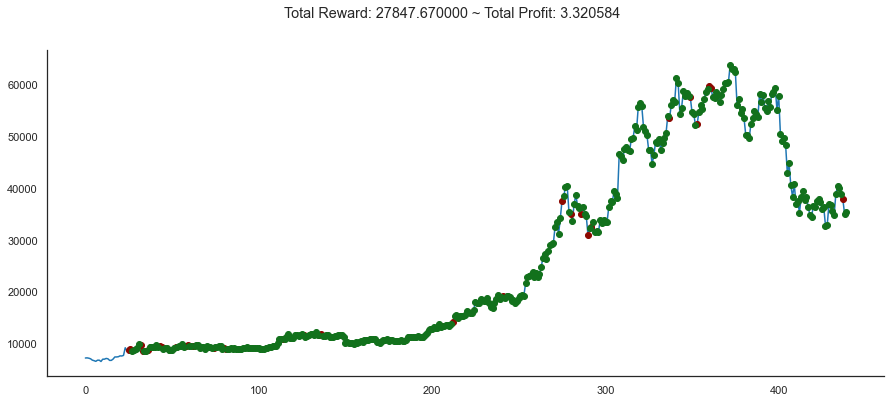

In [74]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
sns.despine()
plt.show()

                           Strategy
-------------------------  ----------
Start Period               2020-05-03
End Period                 2021-06-19
Risk-Free Rate             0.0%
Time in Market             7.0%

Cumulative Return          232.06%
CAGR%                      189.57%

Sharpe                     1.11
Sortino                    3.38
Sortino/√2                 2.39

Max Drawdown               -35.4%
Longest DD Days            57
Volatility (ann.)          97.36%
Calmar                     5.35
Skew                       11.01
Kurtosis                   167.87

Expected Daily %           0.29%
Expected Monthly %         8.95%
Expected Yearly %          82.22%
Kelly Criterion            45.45%
Risk of Ruin               0.0%
Daily Value-at-Risk        -9.66%
Expected Shortfall (cVaR)  -9.66%

Gain/Pain Ratio            2.28
Gain/Pain (1M)             4.16

Payoff Ratio               1.74
Profit Factor              3.28
Common Sense Ratio         nan
CPC Index               

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2021-06-17  2021-06-19  2021-06-19     2    -35.403858        -35.072080
2  2021-01-11  2021-01-23  2021-03-09    57    -24.399934        -23.503749
3  2020-06-07  2020-06-25  2020-07-29    52     -8.380635         -5.629772
4  2021-03-25  2021-03-25  2021-04-01     7     -5.564073          0.000000

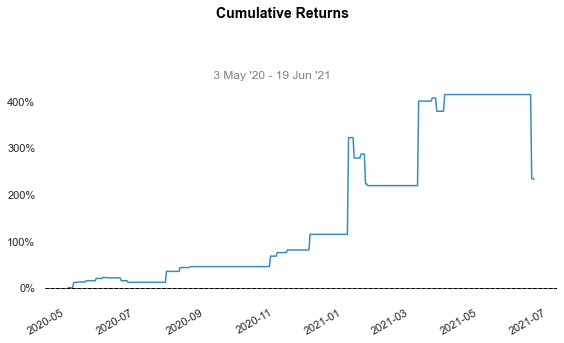

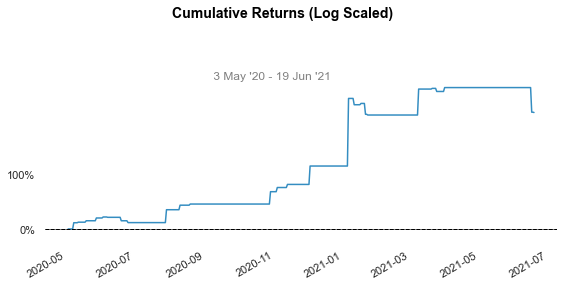

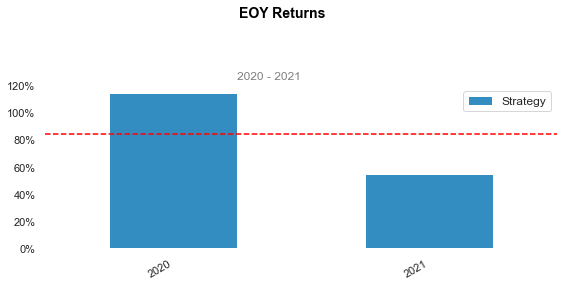

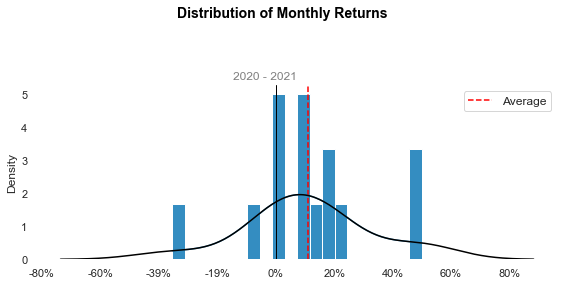

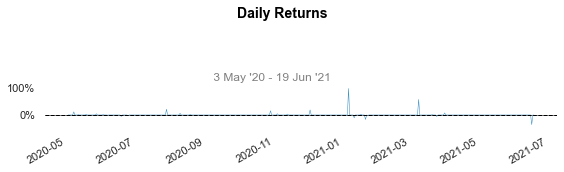

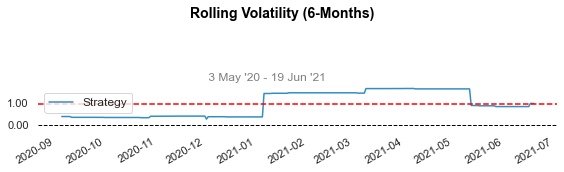

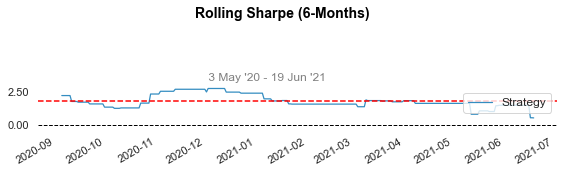

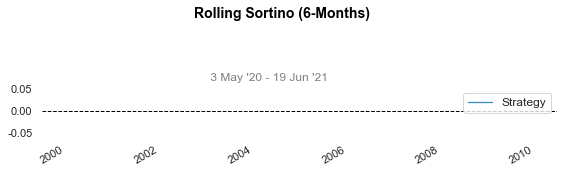

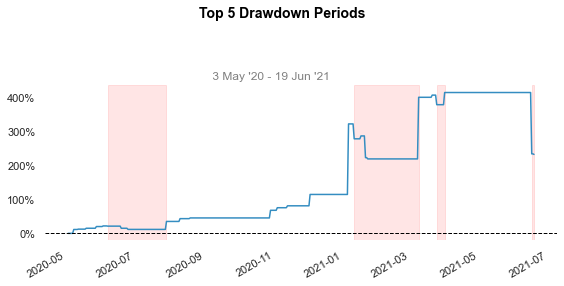

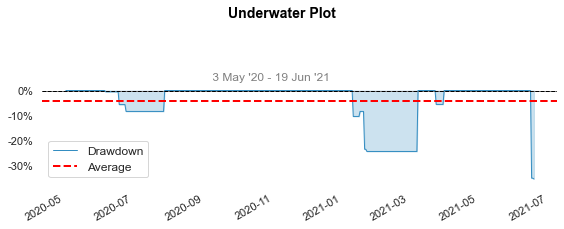

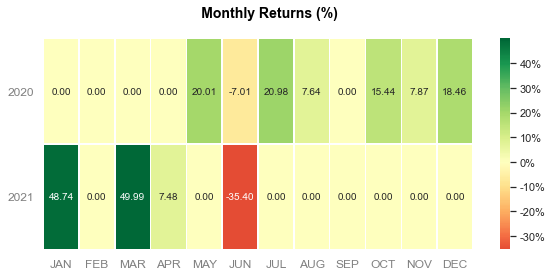

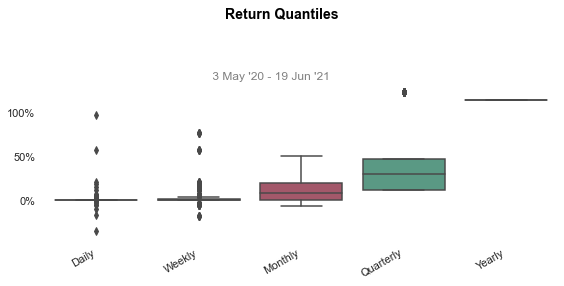

In [75]:
qs.extend_pandas()

net_worth = pd.Series(env.history['total_profit'], index=bitcoin_df.index[test_start+1:test_end])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)
# qs.reports.html(returns, output='a2c_quantstats.html')

In [78]:
total_timesteps = 1_000_000
model2 = PPO2('MlpLstmPolicy', env, verbose=1, nminibatches=1)
model2.learn(total_timesteps=total_timesteps)

Wrapping the env in a DummyVecEnv.
---------------------------------------
| approxkl           | 4.220356e-06   |
| clipfrac           | 0.0            |
| explained_variance | 1.91e-06       |
| fps                | 35             |
| n_updates          | 1              |
| policy_entropy     | 0.682484       |
| policy_loss        | -1.9981526e-06 |
| serial_timesteps   | 128            |
| time_elapsed       | 3.5e-05        |
| total_timesteps    | 128            |
| value_loss         | 189336.48      |
---------------------------------------
---------------------------------------
| approxkl           | 1.23219725e-05 |
| clipfrac           | 0.0            |
| explained_variance | -2.48e-05      |
| fps                | 452            |
| n_updates          | 2              |
| policy_entropy     | 0.6823518      |
| policy_loss        | 0.00057907915  |
| serial_timesteps   | 256            |
| time_elapsed       | 3.65           |
| total_timesteps    | 256            |
| val

--------------------------------------
| approxkl           | 7.02569e-06   |
| clipfrac           | 0.0           |
| explained_variance | -0.000131     |
| fps                | 469           |
| n_updates          | 17            |
| policy_entropy     | 0.6873615     |
| policy_loss        | 3.1812815e-05 |
| serial_timesteps   | 2176          |
| time_elapsed       | 7.88          |
| total_timesteps    | 2176          |
| value_loss         | 408979.34     |
--------------------------------------
--------------------------------------
| approxkl           | 1.3188379e-05 |
| clipfrac           | 0.0           |
| explained_variance | 7.34e-05      |
| fps                | 468           |
| n_updates          | 18            |
| policy_entropy     | 0.6881194     |
| policy_loss        | 0.00027556974 |
| serial_timesteps   | 2304          |
| time_elapsed       | 8.15          |
| total_timesteps    | 2304          |
| value_loss         | 411648.16     |
-------------------------

--------------------------------------
| approxkl           | 3.5163947e-07 |
| clipfrac           | 0.0           |
| explained_variance | -0.000114     |
| fps                | 444           |
| n_updates          | 34            |
| policy_entropy     | 0.69189245    |
| policy_loss        | -3.285159e-05 |
| serial_timesteps   | 4352          |
| time_elapsed       | 13            |
| total_timesteps    | 4352          |
| value_loss         | 459241.16     |
--------------------------------------
--------------------------------------
| approxkl           | 1.955112e-05  |
| clipfrac           | 0.0           |
| explained_variance | -1.14e-05     |
| fps                | 440           |
| n_updates          | 35            |
| policy_entropy     | 0.6925853     |
| policy_loss        | 0.00024407462 |
| serial_timesteps   | 4480          |
| time_elapsed       | 13.3          |
| total_timesteps    | 4480          |
| value_loss         | 6694936.5     |
-------------------------

--------------------------------------
| approxkl           | 5.4128785e-05 |
| clipfrac           | 0.0           |
| explained_variance | 2.98e-07      |
| fps                | 512           |
| n_updates          | 51            |
| policy_entropy     | 0.6565892     |
| policy_loss        | 0.00018449943 |
| serial_timesteps   | 6528          |
| time_elapsed       | 17.7          |
| total_timesteps    | 6528          |
| value_loss         | 7477567.0     |
--------------------------------------
---------------------------------------
| approxkl           | 6.4727915e-06  |
| clipfrac           | 0.0            |
| explained_variance | -5.76e-05      |
| fps                | 505            |
| n_updates          | 52             |
| policy_entropy     | 0.65671945     |
| policy_loss        | -8.1689795e-05 |
| serial_timesteps   | 6656           |
| time_elapsed       | 18             |
| total_timesteps    | 6656           |
| value_loss         | 12459898.0     |
-------------

--------------------------------------
| approxkl           | 0.00054010894 |
| clipfrac           | 0.0           |
| explained_variance | -3.9e-05      |
| fps                | 469           |
| n_updates          | 68            |
| policy_entropy     | 0.65455776    |
| policy_loss        | -0.0033620943 |
| serial_timesteps   | 8704          |
| time_elapsed       | 22.3          |
| total_timesteps    | 8704          |
| value_loss         | 8535558.0     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00020980072 |
| clipfrac           | 0.0           |
| explained_variance | 6.68e-06      |
| fps                | 473           |
| n_updates          | 69            |
| policy_entropy     | 0.66746056    |
| policy_loss        | 0.0011392137  |
| serial_timesteps   | 8832          |
| time_elapsed       | 22.6          |
| total_timesteps    | 8832          |
| value_loss         | 173517.9      |
-------------------------

---------------------------------------
| approxkl           | 4.5202444e-07  |
| clipfrac           | 0.0            |
| explained_variance | -0.00165       |
| fps                | 434            |
| n_updates          | 85             |
| policy_entropy     | 0.678946       |
| policy_loss        | -5.2924268e-05 |
| serial_timesteps   | 10880          |
| time_elapsed       | 27.2           |
| total_timesteps    | 10880          |
| value_loss         | 221375.11      |
---------------------------------------
---------------------------------------
| approxkl           | 1.2467746e-05  |
| clipfrac           | 0.0            |
| explained_variance | 7.75e-07       |
| fps                | 454            |
| n_updates          | 86             |
| policy_entropy     | 0.6772416      |
| policy_loss        | -0.00081369677 |
| serial_timesteps   | 11008          |
| time_elapsed       | 27.5           |
| total_timesteps    | 11008          |
| value_loss         | 2414753.2      |


--------------------------------------
| approxkl           | 2.3035751e-05 |
| clipfrac           | 0.0           |
| explained_variance | 8.52e-05      |
| fps                | 430           |
| n_updates          | 101           |
| policy_entropy     | 0.6391201     |
| policy_loss        | 0.00013506226 |
| serial_timesteps   | 12928         |
| time_elapsed       | 32.3          |
| total_timesteps    | 12928         |
| value_loss         | 1857774.0     |
--------------------------------------
--------------------------------------
| approxkl           | 2.7399624e-06 |
| clipfrac           | 0.0           |
| explained_variance | 3.46e-06      |
| fps                | 430           |
| n_updates          | 102           |
| policy_entropy     | 0.63523364    |
| policy_loss        | 3.0817464e-05 |
| serial_timesteps   | 13056         |
| time_elapsed       | 32.6          |
| total_timesteps    | 13056         |
| value_loss         | 826128.6      |
-------------------------

---------------------------------------
| approxkl           | 5.1534034e-06  |
| clipfrac           | 0.0            |
| explained_variance | -2.38e-07      |
| fps                | 435            |
| n_updates          | 118            |
| policy_entropy     | 0.5925679      |
| policy_loss        | -0.00013981247 |
| serial_timesteps   | 15104          |
| time_elapsed       | 37.3           |
| total_timesteps    | 15104          |
| value_loss         | 390650.94      |
---------------------------------------
--------------------------------------
| approxkl           | 1.0158742e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 447           |
| n_updates          | 119           |
| policy_entropy     | 0.58868       |
| policy_loss        | 9.372551e-05  |
| serial_timesteps   | 15232         |
| time_elapsed       | 37.6          |
| total_timesteps    | 15232         |
| value_loss         | 15863650.0    |
------------

--------------------------------------
| approxkl           | 4.5448988e-07 |
| clipfrac           | 0.0           |
| explained_variance | 5.96e-08      |
| fps                | 454           |
| n_updates          | 134           |
| policy_entropy     | 0.6273354     |
| policy_loss        | -4.70432e-05  |
| serial_timesteps   | 17152         |
| time_elapsed       | 42            |
| total_timesteps    | 17152         |
| value_loss         | 227443.88     |
--------------------------------------
---------------------------------------
| approxkl           | 4.2058246e-06  |
| clipfrac           | 0.0            |
| explained_variance | -4.77e-07      |
| fps                | 458            |
| n_updates          | 135            |
| policy_entropy     | 0.6255214      |
| policy_loss        | -0.00022504106 |
| serial_timesteps   | 17280          |
| time_elapsed       | 42.3           |
| total_timesteps    | 17280          |
| value_loss         | 7273386.5      |
-------------

--------------------------------------
| approxkl           | 1.4800262e-06 |
| clipfrac           | 0.0           |
| explained_variance | -5.96e-07     |
| fps                | 453           |
| n_updates          | 151           |
| policy_entropy     | 0.6434783     |
| policy_loss        | 1.6666483e-05 |
| serial_timesteps   | 19328         |
| time_elapsed       | 46.8          |
| total_timesteps    | 19328         |
| value_loss         | 6725582.0     |
--------------------------------------
---------------------------------------
| approxkl           | 1.1594616e-06  |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 451            |
| n_updates          | 152            |
| policy_entropy     | 0.6424937      |
| policy_loss        | -8.3750114e-05 |
| serial_timesteps   | 19456          |
| time_elapsed       | 47.1           |
| total_timesteps    | 19456          |
| value_loss         | 4199077.0      |
-------------

--------------------------------------
| approxkl           | 0.00041541195 |
| clipfrac           | 0.0           |
| explained_variance | -5.96e-07     |
| fps                | 435           |
| n_updates          | 167           |
| policy_entropy     | 0.665944      |
| policy_loss        | -0.0002998705 |
| serial_timesteps   | 21376         |
| time_elapsed       | 51.4          |
| total_timesteps    | 21376         |
| value_loss         | 2405318.5     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00017974725 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 431           |
| n_updates          | 168           |
| policy_entropy     | 0.67635196    |
| policy_loss        | 0.0009884222  |
| serial_timesteps   | 21504         |
| time_elapsed       | 51.6          |
| total_timesteps    | 21504         |
| value_loss         | 4617407.0     |
-------------------------

--------------------------------------
| approxkl           | 1.57552e-05   |
| clipfrac           | 0.0           |
| explained_variance | 5.96e-08      |
| fps                | 454           |
| n_updates          | 184           |
| policy_entropy     | 0.6930938     |
| policy_loss        | 0.00076254737 |
| serial_timesteps   | 23552         |
| time_elapsed       | 56.2          |
| total_timesteps    | 23552         |
| value_loss         | 6572177.5     |
--------------------------------------
--------------------------------------
| approxkl           | 6.2738172e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.000201     |
| fps                | 427           |
| n_updates          | 185           |
| policy_entropy     | 0.692942      |
| policy_loss        | -9.027775e-06 |
| serial_timesteps   | 23680         |
| time_elapsed       | 56.5          |
| total_timesteps    | 23680         |
| value_loss         | 989719.8      |
-------------------------

--------------------------------------
| approxkl           | 2.3075285e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.000127     |
| fps                | 452           |
| n_updates          | 201           |
| policy_entropy     | 0.6927973     |
| policy_loss        | 0.00010119751 |
| serial_timesteps   | 25728         |
| time_elapsed       | 61.1          |
| total_timesteps    | 25728         |
| value_loss         | 9746891.0     |
--------------------------------------
---------------------------------------
| approxkl           | 2.143304e-05   |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 432            |
| n_updates          | 202            |
| policy_entropy     | 0.6930535      |
| policy_loss        | -0.00027688057 |
| serial_timesteps   | 25856          |
| time_elapsed       | 61.4           |
| total_timesteps    | 25856          |
| value_loss         | 146994.67      |
-------------

--------------------------------------
| approxkl           | 2.3109442e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.000106     |
| fps                | 440           |
| n_updates          | 217           |
| policy_entropy     | 0.6918884     |
| policy_loss        | -0.000601372  |
| serial_timesteps   | 27776         |
| time_elapsed       | 65.7          |
| total_timesteps    | 27776         |
| value_loss         | 2738917.0     |
--------------------------------------
--------------------------------------
| approxkl           | 1.6527341e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 445           |
| n_updates          | 218           |
| policy_entropy     | 0.6909766     |
| policy_loss        | 3.4312252e-05 |
| serial_timesteps   | 27904         |
| time_elapsed       | 66            |
| total_timesteps    | 27904         |
| value_loss         | 105446.766    |
-------------------------

---------------------------------------
| approxkl           | 1.0671505e-05  |
| clipfrac           | 0.0            |
| explained_variance | -3.58e-07      |
| fps                | 454            |
| n_updates          | 234            |
| policy_entropy     | 0.69117147     |
| policy_loss        | -0.00035245478 |
| serial_timesteps   | 29952          |
| time_elapsed       | 70.5           |
| total_timesteps    | 29952          |
| value_loss         | 197526.56      |
---------------------------------------
---------------------------------------
| approxkl           | 2.3907893e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 453            |
| n_updates          | 235            |
| policy_entropy     | 0.69018596     |
| policy_loss        | -0.00069447025 |
| serial_timesteps   | 30080          |
| time_elapsed       | 70.8           |
| total_timesteps    | 30080          |
| value_loss         | 6517287.0      |


-------------------------------------
| approxkl           | 7.013279e-05 |
| clipfrac           | 0.0          |
| explained_variance | 0            |
| fps                | 454          |
| n_updates          | 251          |
| policy_entropy     | 0.6752563    |
| policy_loss        | 0.0010006635 |
| serial_timesteps   | 32128        |
| time_elapsed       | 75.3         |
| total_timesteps    | 32128        |
| value_loss         | 2057546.2    |
-------------------------------------
--------------------------------------
| approxkl           | 4.9081486e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 448           |
| n_updates          | 252           |
| policy_entropy     | 0.6721709     |
| policy_loss        | 2.6623253e-05 |
| serial_timesteps   | 32256         |
| time_elapsed       | 75.6          |
| total_timesteps    | 32256         |
| value_loss         | 12476344.0    |
--------------------------------------

--------------------------------------
| approxkl           | 1.5108075e-05 |
| clipfrac           | 0.0           |
| explained_variance | 5.96e-08      |
| fps                | 445           |
| n_updates          | 268           |
| policy_entropy     | 0.66035926    |
| policy_loss        | -0.0004590709 |
| serial_timesteps   | 34304         |
| time_elapsed       | 80.2          |
| total_timesteps    | 34304         |
| value_loss         | 18975608.0    |
--------------------------------------
--------------------------------------
| approxkl           | 8.189081e-05  |
| clipfrac           | 0.0           |
| explained_variance | -4.36e-05     |
| fps                | 446           |
| n_updates          | 269           |
| policy_entropy     | 0.6569929     |
| policy_loss        | -0.0009806721 |
| serial_timesteps   | 34432         |
| time_elapsed       | 80.5          |
| total_timesteps    | 34432         |
| value_loss         | 3154832.0     |
-------------------------

--------------------------------------
| approxkl           | 1.6065707e-07 |
| clipfrac           | 0.0           |
| explained_variance | -0.00031      |
| fps                | 450           |
| n_updates          | 285           |
| policy_entropy     | 0.62970734    |
| policy_loss        | 1.1320924e-05 |
| serial_timesteps   | 36480         |
| time_elapsed       | 85.1          |
| total_timesteps    | 36480         |
| value_loss         | 12994280.0    |
--------------------------------------
--------------------------------------
| approxkl           | 0.00041346083 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 458           |
| n_updates          | 286           |
| policy_entropy     | 0.63501585    |
| policy_loss        | -0.005820414  |
| serial_timesteps   | 36608         |
| time_elapsed       | 85.3          |
| total_timesteps    | 36608         |
| value_loss         | 163959.84     |
-------------------------

--------------------------------------
| approxkl           | 0.00015280867 |
| clipfrac           | 0.0           |
| explained_variance | -7.15e-07     |
| fps                | 457           |
| n_updates          | 302           |
| policy_entropy     | 0.66533965    |
| policy_loss        | 0.001962326   |
| serial_timesteps   | 38656         |
| time_elapsed       | 89.9          |
| total_timesteps    | 38656         |
| value_loss         | 98938.016     |
--------------------------------------
---------------------------------------
| approxkl           | 1.313719e-05   |
| clipfrac           | 0.0            |
| explained_variance | 1.79e-07       |
| fps                | 434            |
| n_updates          | 303            |
| policy_entropy     | 0.665059       |
| policy_loss        | -8.0446596e-05 |
| serial_timesteps   | 38784          |
| time_elapsed       | 90.2           |
| total_timesteps    | 38784          |
| value_loss         | 2197620.5      |
-------------

-------------------------------------
| approxkl           | 0.0003688287 |
| clipfrac           | 0.0          |
| explained_variance | 0            |
| fps                | 457          |
| n_updates          | 319          |
| policy_entropy     | 0.6917929    |
| policy_loss        | 0.0035627312 |
| serial_timesteps   | 40832        |
| time_elapsed       | 94.7         |
| total_timesteps    | 40832        |
| value_loss         | 5680370.0    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00015328423 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 457           |
| n_updates          | 320           |
| policy_entropy     | 0.6930886     |
| policy_loss        | 0.0006658657  |
| serial_timesteps   | 40960         |
| time_elapsed       | 95            |
| total_timesteps    | 40960         |
| value_loss         | 18244068.0    |
--------------------------------------

---------------------------------------
| approxkl           | 6.18207e-06    |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 431            |
| n_updates          | 336            |
| policy_entropy     | 0.68776524     |
| policy_loss        | -0.00020566513 |
| serial_timesteps   | 43008          |
| time_elapsed       | 99.6           |
| total_timesteps    | 43008          |
| value_loss         | 9949578.0      |
---------------------------------------
--------------------------------------
| approxkl           | 3.5092298e-06 |
| clipfrac           | 0.0           |
| explained_variance | -3.19e-05     |
| fps                | 458           |
| n_updates          | 337           |
| policy_entropy     | 0.6884861     |
| policy_loss        | -0.0001428125 |
| serial_timesteps   | 43136         |
| time_elapsed       | 99.9          |
| total_timesteps    | 43136         |
| value_loss         | 4772064.0     |
------------

---------------------------------------
| approxkl           | 2.8334543e-05  |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 456            |
| n_updates          | 352            |
| policy_entropy     | 0.6929709      |
| policy_loss        | -0.00026548374 |
| serial_timesteps   | 45056          |
| time_elapsed       | 104            |
| total_timesteps    | 45056          |
| value_loss         | 2422493.0      |
---------------------------------------
---------------------------------------
| approxkl           | 1.4983358e-05  |
| clipfrac           | 0.0            |
| explained_variance | -0.000207      |
| fps                | 448            |
| n_updates          | 353            |
| policy_entropy     | 0.69264114     |
| policy_loss        | -0.00050210906 |
| serial_timesteps   | 45184          |
| time_elapsed       | 104            |
| total_timesteps    | 45184          |
| value_loss         | 8875388.0      |


---------------------------------------
| approxkl           | 2.3461446e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 449            |
| n_updates          | 368            |
| policy_entropy     | 0.68947494     |
| policy_loss        | -0.00014837924 |
| serial_timesteps   | 47104          |
| time_elapsed       | 109            |
| total_timesteps    | 47104          |
| value_loss         | 9212592.0      |
---------------------------------------
--------------------------------------
| approxkl           | 8.8883405e-07 |
| clipfrac           | 0.0           |
| explained_variance | -0.000445     |
| fps                | 432           |
| n_updates          | 369           |
| policy_entropy     | 0.6898392     |
| policy_loss        | 4.3378444e-05 |
| serial_timesteps   | 47232         |
| time_elapsed       | 109           |
| total_timesteps    | 47232         |
| value_loss         | 2115285.5     |
------------

---------------------------------------
| approxkl           | 3.7326427e-07  |
| clipfrac           | 0.0            |
| explained_variance | 0.000511       |
| fps                | 455            |
| n_updates          | 385            |
| policy_entropy     | 0.49959677     |
| policy_loss        | -5.5182958e-05 |
| serial_timesteps   | 49280          |
| time_elapsed       | 114            |
| total_timesteps    | 49280          |
| value_loss         | 766091.25      |
---------------------------------------
--------------------------------------
| approxkl           | 3.9947807e-07 |
| clipfrac           | 0.0           |
| explained_variance | -7.15e-06     |
| fps                | 455           |
| n_updates          | 386           |
| policy_entropy     | 0.49570653    |
| policy_loss        | -3.85209e-05  |
| serial_timesteps   | 49408         |
| time_elapsed       | 114           |
| total_timesteps    | 49408         |
| value_loss         | 31995.234     |
------------

--------------------------------------
| approxkl           | 6.0161274e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.0045       |
| fps                | 447           |
| n_updates          | 402           |
| policy_entropy     | 0.5029415     |
| policy_loss        | 9.893323e-05  |
| serial_timesteps   | 51456         |
| time_elapsed       | 119           |
| total_timesteps    | 51456         |
| value_loss         | 189159.69     |
--------------------------------------
--------------------------------------
| approxkl           | 1.0720912e-06 |
| clipfrac           | 0.0           |
| explained_variance | 1.84e-05      |
| fps                | 434           |
| n_updates          | 403           |
| policy_entropy     | 0.49688953    |
| policy_loss        | 0.00023815222 |
| serial_timesteps   | 51584         |
| time_elapsed       | 119           |
| total_timesteps    | 51584         |
| value_loss         | 210829.2      |
-------------------------

--------------------------------------
| approxkl           | 8.556642e-08  |
| clipfrac           | 0.0           |
| explained_variance | 3.58e-07      |
| fps                | 458           |
| n_updates          | 419           |
| policy_entropy     | 0.55722606    |
| policy_loss        | -1.438288e-05 |
| serial_timesteps   | 53632         |
| time_elapsed       | 123           |
| total_timesteps    | 53632         |
| value_loss         | 855476.6      |
--------------------------------------
-------------------------------------
| approxkl           | 6.412302e-08 |
| clipfrac           | 0.0          |
| explained_variance | -2.38e-07    |
| fps                | 460          |
| n_updates          | 420          |
| policy_entropy     | 0.5576372    |
| policy_loss        | 7.00471e-07  |
| serial_timesteps   | 53760        |
| time_elapsed       | 124          |
| total_timesteps    | 53760        |
| value_loss         | 6945622.0    |
-------------------------------------

---------------------------------------
| approxkl           | 3.0591508e-08  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 455            |
| n_updates          | 436            |
| policy_entropy     | 0.5578499      |
| policy_loss        | -1.8548337e-05 |
| serial_timesteps   | 55808          |
| time_elapsed       | 128            |
| total_timesteps    | 55808          |
| value_loss         | 7967736.0      |
---------------------------------------
--------------------------------------
| approxkl           | 3.5526607e-08 |
| clipfrac           | 0.0           |
| explained_variance | -0.000204     |
| fps                | 453           |
| n_updates          | 437           |
| policy_entropy     | 0.5603516     |
| policy_loss        | 2.8521754e-07 |
| serial_timesteps   | 55936         |
| time_elapsed       | 129           |
| total_timesteps    | 55936         |
| value_loss         | 20916342.0    |
------------

--------------------------------------
| approxkl           | 5.2358065e-08 |
| clipfrac           | 0.0           |
| explained_variance | -0.000229     |
| fps                | 448           |
| n_updates          | 453           |
| policy_entropy     | 0.4902711     |
| policy_loss        | -3.189454e-05 |
| serial_timesteps   | 57984         |
| time_elapsed       | 133           |
| total_timesteps    | 57984         |
| value_loss         | 5444522.0     |
--------------------------------------
--------------------------------------
| approxkl           | 1.9231267e-07 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 431           |
| n_updates          | 454           |
| policy_entropy     | 0.4877336     |
| policy_loss        | -1.113303e-05 |
| serial_timesteps   | 58112         |
| time_elapsed       | 134           |
| total_timesteps    | 58112         |
| value_loss         | 143969.4      |
-------------------------

--------------------------------------
| approxkl           | 1.482868e-07  |
| clipfrac           | 0.0           |
| explained_variance | 0.000349      |
| fps                | 447           |
| n_updates          | 470           |
| policy_entropy     | 0.50274175    |
| policy_loss        | 1.3557961e-05 |
| serial_timesteps   | 60160         |
| time_elapsed       | 138           |
| total_timesteps    | 60160         |
| value_loss         | 253362.72     |
--------------------------------------
--------------------------------------
| approxkl           | 5.5326392e-08 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 442           |
| n_updates          | 471           |
| policy_entropy     | 0.50269514    |
| policy_loss        | 1.1726515e-06 |
| serial_timesteps   | 60288         |
| time_elapsed       | 138           |
| total_timesteps    | 60288         |
| value_loss         | 5553804.5     |
-------------------------

--------------------------------------
| approxkl           | 3.6809809e-07 |
| clipfrac           | 0.0           |
| explained_variance | 0.00119       |
| fps                | 452           |
| n_updates          | 486           |
| policy_entropy     | 0.50886977    |
| policy_loss        | 1.8617837e-05 |
| serial_timesteps   | 62208         |
| time_elapsed       | 143           |
| total_timesteps    | 62208         |
| value_loss         | 278904.75     |
--------------------------------------
--------------------------------------
| approxkl           | 1.4928389e-07 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 457           |
| n_updates          | 487           |
| policy_entropy     | 0.5070803     |
| policy_loss        | 5.9206504e-06 |
| serial_timesteps   | 62336         |
| time_elapsed       | 143           |
| total_timesteps    | 62336         |
| value_loss         | 1493927.8     |
-------------------------

---------------------------------------
| approxkl           | 1.021995e-06   |
| clipfrac           | 0.0            |
| explained_variance | -5.48e-06      |
| fps                | 419            |
| n_updates          | 503            |
| policy_entropy     | 0.4662732      |
| policy_loss        | -0.00014872407 |
| serial_timesteps   | 64384          |
| time_elapsed       | 148            |
| total_timesteps    | 64384          |
| value_loss         | 662234.25      |
---------------------------------------
---------------------------------------
| approxkl           | 1.0964352e-07  |
| clipfrac           | 0.0            |
| explained_variance | 1.25e-06       |
| fps                | 404            |
| n_updates          | 504            |
| policy_entropy     | 0.4671898      |
| policy_loss        | -3.1752512e-05 |
| serial_timesteps   | 64512          |
| time_elapsed       | 148            |
| total_timesteps    | 64512          |
| value_loss         | 17986740.0     |


--------------------------------------
| approxkl           | 3.3887567e-08 |
| clipfrac           | 0.0           |
| explained_variance | 5.96e-08      |
| fps                | 415           |
| n_updates          | 519           |
| policy_entropy     | 0.4484887     |
| policy_loss        | -5.420996e-06 |
| serial_timesteps   | 66432         |
| time_elapsed       | 153           |
| total_timesteps    | 66432         |
| value_loss         | 530447.25     |
--------------------------------------
---------------------------------------
| approxkl           | 5.921741e-08   |
| clipfrac           | 0.0            |
| explained_variance | 1.19e-07       |
| fps                | 409            |
| n_updates          | 520            |
| policy_entropy     | 0.44892353     |
| policy_loss        | -2.0783162e-05 |
| serial_timesteps   | 66560          |
| time_elapsed       | 153            |
| total_timesteps    | 66560          |
| value_loss         | 23865178.0     |
-------------

---------------------------------------
| approxkl           | 2.9805204e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 424            |
| n_updates          | 535            |
| policy_entropy     | 0.46679437     |
| policy_loss        | -0.00082162174 |
| serial_timesteps   | 68480          |
| time_elapsed       | 158            |
| total_timesteps    | 68480          |
| value_loss         | 145017.66      |
---------------------------------------
--------------------------------------
| approxkl           | 7.4799886e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 414           |
| n_updates          | 536           |
| policy_entropy     | 0.48123074    |
| policy_loss        | 0.00021922914 |
| serial_timesteps   | 68608         |
| time_elapsed       | 158           |
| total_timesteps    | 68608         |
| value_loss         | 12900810.0    |
------------

---------------------------------------
| approxkl           | 5.828548e-07   |
| clipfrac           | 0.0            |
| explained_variance | 1.19e-07       |
| fps                | 412            |
| n_updates          | 551            |
| policy_entropy     | 0.5098561      |
| policy_loss        | -7.5075775e-05 |
| serial_timesteps   | 70528          |
| time_elapsed       | 163            |
| total_timesteps    | 70528          |
| value_loss         | 191857.38      |
---------------------------------------
--------------------------------------
| approxkl           | 2.110388e-06  |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 417           |
| n_updates          | 552           |
| policy_entropy     | 0.51200795    |
| policy_loss        | -5.223439e-05 |
| serial_timesteps   | 70656         |
| time_elapsed       | 163           |
| total_timesteps    | 70656         |
| value_loss         | 6661207.5     |
------------

---------------------------------------
| approxkl           | 4.860414e-06   |
| clipfrac           | 0.0            |
| explained_variance | -0.00134       |
| fps                | 452            |
| n_updates          | 567            |
| policy_entropy     | 0.53203136     |
| policy_loss        | -0.00021720573 |
| serial_timesteps   | 72576          |
| time_elapsed       | 167            |
| total_timesteps    | 72576          |
| value_loss         | 157084.47      |
---------------------------------------
---------------------------------------
| approxkl           | 1.2004726e-05  |
| clipfrac           | 0.0            |
| explained_variance | 2.38e-07       |
| fps                | 460            |
| n_updates          | 568            |
| policy_entropy     | 0.534201       |
| policy_loss        | -0.00012241118 |
| serial_timesteps   | 72704          |
| time_elapsed       | 168            |
| total_timesteps    | 72704          |
| value_loss         | 2528689.8      |


--------------------------------------
| approxkl           | 3.4074162e-07 |
| clipfrac           | 0.0           |
| explained_variance | -0.000524     |
| fps                | 441           |
| n_updates          | 583           |
| policy_entropy     | 0.56293464    |
| policy_loss        | 5.3938245e-05 |
| serial_timesteps   | 74624         |
| time_elapsed       | 172           |
| total_timesteps    | 74624         |
| value_loss         | 1214000.0     |
--------------------------------------
-------------------------------------
| approxkl           | 1.433544e-09 |
| clipfrac           | 0.0          |
| explained_variance | 0            |
| fps                | 450          |
| n_updates          | 584          |
| policy_entropy     | 0.56114674   |
| policy_loss        | 3.252877e-06 |
| serial_timesteps   | 74752        |
| time_elapsed       | 172          |
| total_timesteps    | 74752        |
| value_loss         | 638495.4     |
-------------------------------------

--------------------------------------
| approxkl           | 8.8823066e-07 |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 430           |
| n_updates          | 600           |
| policy_entropy     | 0.57811034    |
| policy_loss        | -5.614478e-06 |
| serial_timesteps   | 76800         |
| time_elapsed       | 177           |
| total_timesteps    | 76800         |
| value_loss         | 465648.03     |
--------------------------------------
--------------------------------------
| approxkl           | 5.1941925e-07 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 449           |
| n_updates          | 601           |
| policy_entropy     | 0.5792333     |
| policy_loss        | 1.4144229e-05 |
| serial_timesteps   | 76928         |
| time_elapsed       | 177           |
| total_timesteps    | 76928         |
| value_loss         | 17087582.0    |
-------------------------

--------------------------------------
| approxkl           | 2.9910261e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 401           |
| n_updates          | 617           |
| policy_entropy     | 0.5406722     |
| policy_loss        | -5.952036e-05 |
| serial_timesteps   | 78976         |
| time_elapsed       | 182           |
| total_timesteps    | 78976         |
| value_loss         | 13487914.0    |
--------------------------------------
--------------------------------------
| approxkl           | 9.899551e-07  |
| clipfrac           | 0.0           |
| explained_variance | -0.000336     |
| fps                | 429           |
| n_updates          | 618           |
| policy_entropy     | 0.54087186    |
| policy_loss        | 3.0823052e-05 |
| serial_timesteps   | 79104         |
| time_elapsed       | 182           |
| total_timesteps    | 79104         |
| value_loss         | 3426497.2     |
-------------------------

--------------------------------------
| approxkl           | 6.692525e-05  |
| clipfrac           | 0.0           |
| explained_variance | -0.000238     |
| fps                | 451           |
| n_updates          | 634           |
| policy_entropy     | 0.55239004    |
| policy_loss        | -5.418074e-05 |
| serial_timesteps   | 81152         |
| time_elapsed       | 187           |
| total_timesteps    | 81152         |
| value_loss         | 20230340.0    |
--------------------------------------
--------------------------------------
| approxkl           | 2.7191618e-06 |
| clipfrac           | 0.0           |
| explained_variance | -5.6e-06      |
| fps                | 450           |
| n_updates          | 635           |
| policy_entropy     | 0.5568131     |
| policy_loss        | 0.00014980725 |
| serial_timesteps   | 81280         |
| time_elapsed       | 187           |
| total_timesteps    | 81280         |
| value_loss         | 204817.75     |
-------------------------

--------------------------------------
| approxkl           | 1.8571576e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0.000281      |
| fps                | 453           |
| n_updates          | 651           |
| policy_entropy     | 0.50792426    |
| policy_loss        | 0.0001549446  |
| serial_timesteps   | 83328         |
| time_elapsed       | 192           |
| total_timesteps    | 83328         |
| value_loss         | 246120.03     |
--------------------------------------
---------------------------------------
| approxkl           | 4.0961558e-07  |
| clipfrac           | 0.0            |
| explained_variance | 5.19e-06       |
| fps                | 452            |
| n_updates          | 652            |
| policy_entropy     | 0.5033345      |
| policy_loss        | -0.00012946292 |
| serial_timesteps   | 83456          |
| time_elapsed       | 192            |
| total_timesteps    | 83456          |
| value_loss         | 1434496.8      |
-------------

-------------------------------------
| approxkl           | 6.93941e-05  |
| clipfrac           | 0.0          |
| explained_variance | 7.15e-07     |
| fps                | 450          |
| n_updates          | 668          |
| policy_entropy     | 0.62575054   |
| policy_loss        | 0.0006548285 |
| serial_timesteps   | 85504        |
| time_elapsed       | 197          |
| total_timesteps    | 85504        |
| value_loss         | 574878.1     |
-------------------------------------
--------------------------------------
| approxkl           | 2.8954972e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 452           |
| n_updates          | 669           |
| policy_entropy     | 0.63256496    |
| policy_loss        | 0.00037767924 |
| serial_timesteps   | 85632         |
| time_elapsed       | 197           |
| total_timesteps    | 85632         |
| value_loss         | 9571727.0     |
--------------------------------------

--------------------------------------
| approxkl           | 1.1437212e-06 |
| clipfrac           | 0.0           |
| explained_variance | -2.38e-07     |
| fps                | 457           |
| n_updates          | 685           |
| policy_entropy     | 0.64167607    |
| policy_loss        | 2.242392e-06  |
| serial_timesteps   | 87680         |
| time_elapsed       | 201           |
| total_timesteps    | 87680         |
| value_loss         | 14419300.0    |
--------------------------------------
--------------------------------------
| approxkl           | 4.534604e-07  |
| clipfrac           | 0.0           |
| explained_variance | -0.000612     |
| fps                | 449           |
| n_updates          | 686           |
| policy_entropy     | 0.6436541     |
| policy_loss        | 3.6602258e-05 |
| serial_timesteps   | 87808         |
| time_elapsed       | 202           |
| total_timesteps    | 87808         |
| value_loss         | 4173173.0     |
-------------------------

---------------------------------------
| approxkl           | 7.6792205e-08  |
| clipfrac           | 0.0            |
| explained_variance | -0.000186      |
| fps                | 417            |
| n_updates          | 702            |
| policy_entropy     | 0.6508074      |
| policy_loss        | -3.9943145e-05 |
| serial_timesteps   | 89856          |
| time_elapsed       | 206            |
| total_timesteps    | 89856          |
| value_loss         | 12373962.0     |
---------------------------------------
--------------------------------------
| approxkl           | 0.0015404506  |
| clipfrac           | 0.0           |
| explained_variance | -1.55e-06     |
| fps                | 436           |
| n_updates          | 703           |
| policy_entropy     | 0.66090703    |
| policy_loss        | -0.0045302734 |
| serial_timesteps   | 89984         |
| time_elapsed       | 207           |
| total_timesteps    | 89984         |
| value_loss         | 83056.16      |
------------

--------------------------------------
| approxkl           | 1.1950955e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.00655       |
| fps                | 422           |
| n_updates          | 719           |
| policy_entropy     | 0.41493043    |
| policy_loss        | -0.000138551  |
| serial_timesteps   | 92032         |
| time_elapsed       | 212           |
| total_timesteps    | 92032         |
| value_loss         | 96674.08      |
--------------------------------------
--------------------------------------
| approxkl           | 8.143386e-06  |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 413           |
| n_updates          | 720           |
| policy_entropy     | 0.41651285    |
| policy_loss        | -0.0001329555 |
| serial_timesteps   | 92160         |
| time_elapsed       | 212           |
| total_timesteps    | 92160         |
| value_loss         | 79516.18      |
-------------------------

---------------------------------------
| approxkl           | 1.8864947e-06  |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 449            |
| n_updates          | 736            |
| policy_entropy     | 0.3259658      |
| policy_loss        | -8.3935214e-05 |
| serial_timesteps   | 94208          |
| time_elapsed       | 217            |
| total_timesteps    | 94208          |
| value_loss         | 15175.451      |
---------------------------------------
-------------------------------------
| approxkl           | 7.749804e-06 |
| clipfrac           | 0.0          |
| explained_variance | 5.96e-08     |
| fps                | 432          |
| n_updates          | 737          |
| policy_entropy     | 0.33088487   |
| policy_loss        | 4.577823e-05 |
| serial_timesteps   | 94336        |
| time_elapsed       | 217          |
| total_timesteps    | 94336        |
| value_loss         | 2094063.8    |
------------------------

---------------------------------------
| approxkl           | 6.208401e-06   |
| clipfrac           | 0.0            |
| explained_variance | 5.96e-08       |
| fps                | 411            |
| n_updates          | 753            |
| policy_entropy     | 0.47487387     |
| policy_loss        | -0.00028646062 |
| serial_timesteps   | 96384          |
| time_elapsed       | 222            |
| total_timesteps    | 96384          |
| value_loss         | 2994032.0      |
---------------------------------------
--------------------------------------
| approxkl           | 3.3024671e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.000775     |
| fps                | 415           |
| n_updates          | 754           |
| policy_entropy     | 0.48244655    |
| policy_loss        | 6.8941736e-05 |
| serial_timesteps   | 96512         |
| time_elapsed       | 222           |
| total_timesteps    | 96512         |
| value_loss         | 2106888.2     |
------------

--------------------------------------
| approxkl           | 3.615652e-06  |
| clipfrac           | 0.0           |
| explained_variance | -0.000455     |
| fps                | 448           |
| n_updates          | 770           |
| policy_entropy     | 0.5692354     |
| policy_loss        | 0.00021095457 |
| serial_timesteps   | 98560         |
| time_elapsed       | 227           |
| total_timesteps    | 98560         |
| value_loss         | 4261223.0     |
--------------------------------------
-------------------------------------
| approxkl           | 5.98058e-05  |
| clipfrac           | 0.0          |
| explained_variance | 1.49e-06     |
| fps                | 425          |
| n_updates          | 771          |
| policy_entropy     | 0.56392103   |
| policy_loss        | -0.000673444 |
| serial_timesteps   | 98688        |
| time_elapsed       | 227          |
| total_timesteps    | 98688        |
| value_loss         | 15385.068    |
-------------------------------------

---------------------------------------
| approxkl           | 8.217371e-06   |
| clipfrac           | 0.0            |
| explained_variance | 0.00025        |
| fps                | 411            |
| n_updates          | 787            |
| policy_entropy     | 0.47439045     |
| policy_loss        | -0.00029702112 |
| serial_timesteps   | 100736         |
| time_elapsed       | 232            |
| total_timesteps    | 100736         |
| value_loss         | 51968.47       |
---------------------------------------
--------------------------------------
| approxkl           | 7.736777e-06  |
| clipfrac           | 0.0           |
| explained_variance | -9.54e-07     |
| fps                | 414           |
| n_updates          | 788           |
| policy_entropy     | 0.4689404     |
| policy_loss        | 0.00040189514 |
| serial_timesteps   | 100864        |
| time_elapsed       | 232           |
| total_timesteps    | 100864        |
| value_loss         | 2067537.9     |
------------

--------------------------------------
| approxkl           | 4.5783618e-05 |
| clipfrac           | 0.0           |
| explained_variance | 3.64e-06      |
| fps                | 413           |
| n_updates          | 804           |
| policy_entropy     | 0.6214165     |
| policy_loss        | -0.0005083    |
| serial_timesteps   | 102912        |
| time_elapsed       | 237           |
| total_timesteps    | 102912        |
| value_loss         | 416798.88     |
--------------------------------------
---------------------------------------
| approxkl           | 2.562278e-05   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 410            |
| n_updates          | 805            |
| policy_entropy     | 0.6275673      |
| policy_loss        | -0.00069052295 |
| serial_timesteps   | 103040         |
| time_elapsed       | 237            |
| total_timesteps    | 103040         |
| value_loss         | 14788744.0     |
-------------

---------------------------------------
| approxkl           | 8.6185327e-07  |
| clipfrac           | 0.0            |
| explained_variance | 1.79e-07       |
| fps                | 445            |
| n_updates          | 821            |
| policy_entropy     | 0.6209359      |
| policy_loss        | -5.6950375e-06 |
| serial_timesteps   | 105088         |
| time_elapsed       | 242            |
| total_timesteps    | 105088         |
| value_loss         | 1946780.2      |
---------------------------------------
--------------------------------------
| approxkl           | 1.2771908e-07 |
| clipfrac           | 0.0           |
| explained_variance | -0.00126      |
| fps                | 449           |
| n_updates          | 822           |
| policy_entropy     | 0.6217129     |
| policy_loss        | 1.8648338e-05 |
| serial_timesteps   | 105216        |
| time_elapsed       | 243           |
| total_timesteps    | 105216        |
| value_loss         | 1413666.9     |
------------

---------------------------------------
| approxkl           | 7.029884e-06   |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 416            |
| n_updates          | 837            |
| policy_entropy     | 0.6504506      |
| policy_loss        | -0.00036750315 |
| serial_timesteps   | 107136         |
| time_elapsed       | 247            |
| total_timesteps    | 107136         |
| value_loss         | 1937490.1      |
---------------------------------------
--------------------------------------
| approxkl           | 3.5461177e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.000464     |
| fps                | 408           |
| n_updates          | 838           |
| policy_entropy     | 0.6558188     |
| policy_loss        | 6.0367165e-06 |
| serial_timesteps   | 107264        |
| time_elapsed       | 248           |
| total_timesteps    | 107264        |
| value_loss         | 7102738.0     |
------------

---------------------------------------
| approxkl           | 8.612966e-08   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 415            |
| n_updates          | 853            |
| policy_entropy     | 0.6916737      |
| policy_loss        | -1.6170787e-05 |
| serial_timesteps   | 109184         |
| time_elapsed       | 252            |
| total_timesteps    | 109184         |
| value_loss         | 6993444.0      |
---------------------------------------
--------------------------------------
| approxkl           | 4.8245887e-09 |
| clipfrac           | 0.0           |
| explained_variance | -0.000323     |
| fps                | 416           |
| n_updates          | 854           |
| policy_entropy     | 0.691736      |
| policy_loss        | 2.1699816e-06 |
| serial_timesteps   | 109312        |
| time_elapsed       | 252           |
| total_timesteps    | 109312        |
| value_loss         | 2805575.5     |
------------

--------------------------------------
| approxkl           | 4.6238463e-05 |
| clipfrac           | 0.0           |
| explained_variance | 5.96e-08      |
| fps                | 427           |
| n_updates          | 870           |
| policy_entropy     | 0.66840124    |
| policy_loss        | -0.0003120848 |
| serial_timesteps   | 111360        |
| time_elapsed       | 257           |
| total_timesteps    | 111360        |
| value_loss         | 9820453.0     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0011687353 |
| clipfrac           | 0.0          |
| explained_variance | -0.00711     |
| fps                | 435          |
| n_updates          | 871          |
| policy_entropy     | 0.65886056   |
| policy_loss        | -0.00248012  |
| serial_timesteps   | 111488       |
| time_elapsed       | 258          |
| total_timesteps    | 111488       |
| value_loss         | 93111.02     |
-------------------------------------

---------------------------------------
| approxkl           | 7.077567e-05   |
| clipfrac           | 0.0            |
| explained_variance | -9.75e-05      |
| fps                | 385            |
| n_updates          | 887            |
| policy_entropy     | 0.27254868     |
| policy_loss        | -0.00019672862 |
| serial_timesteps   | 113536         |
| time_elapsed       | 263            |
| total_timesteps    | 113536         |
| value_loss         | 416278.7       |
---------------------------------------
-------------------------------------
| approxkl           | 0.00198578   |
| clipfrac           | 0.03125      |
| explained_variance | -2.73e-05    |
| fps                | 393          |
| n_updates          | 888          |
| policy_entropy     | 0.19781865   |
| policy_loss        | 0.0113491025 |
| serial_timesteps   | 113664       |
| time_elapsed       | 263          |
| total_timesteps    | 113664       |
| value_loss         | 32851.555    |
------------------------

--------------------------------------
| approxkl           | 2.6828275e-05 |
| clipfrac           | 0.0           |
| explained_variance | 1.13e-05      |
| fps                | 413           |
| n_updates          | 904           |
| policy_entropy     | 0.4666142     |
| policy_loss        | 0.0013214103  |
| serial_timesteps   | 115712        |
| time_elapsed       | 268           |
| total_timesteps    | 115712        |
| value_loss         | 14486.499     |
--------------------------------------
--------------------------------------
| approxkl           | 4.0700354e-05 |
| clipfrac           | 0.0           |
| explained_variance | -1.31e-06     |
| fps                | 404           |
| n_updates          | 905           |
| policy_entropy     | 0.4613157     |
| policy_loss        | 0.00070466404 |
| serial_timesteps   | 115840        |
| time_elapsed       | 268           |
| total_timesteps    | 115840        |
| value_loss         | 2189768.5     |
-------------------------

--------------------------------------
| approxkl           | 0.00020560095 |
| clipfrac           | 0.0           |
| explained_variance | -7.15e-07     |
| fps                | 401           |
| n_updates          | 921           |
| policy_entropy     | 0.55910814    |
| policy_loss        | 0.0028229007  |
| serial_timesteps   | 117888        |
| time_elapsed       | 273           |
| total_timesteps    | 117888        |
| value_loss         | 4604389.5     |
--------------------------------------
---------------------------------------
| approxkl           | 9.056906e-05   |
| clipfrac           | 0.0            |
| explained_variance | -0.000638      |
| fps                | 409            |
| n_updates          | 922            |
| policy_entropy     | 0.5451674      |
| policy_loss        | -0.00021979434 |
| serial_timesteps   | 118016         |
| time_elapsed       | 274            |
| total_timesteps    | 118016         |
| value_loss         | 5173682.0      |
-------------

--------------------------------------
| approxkl           | 0.00038245294 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 414           |
| n_updates          | 937           |
| policy_entropy     | 0.55894506    |
| policy_loss        | -0.0021549107 |
| serial_timesteps   | 119936        |
| time_elapsed       | 278           |
| total_timesteps    | 119936        |
| value_loss         | 4515133.5     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00019564014 |
| clipfrac           | 0.0           |
| explained_variance | 0.000184      |
| fps                | 405           |
| n_updates          | 938           |
| policy_entropy     | 0.58494866    |
| policy_loss        | 0.00058641436 |
| serial_timesteps   | 120064        |
| time_elapsed       | 278           |
| total_timesteps    | 120064        |
| value_loss         | 3087521.5     |
-------------------------

---------------------------------------
| approxkl           | 1.5151786e-06  |
| clipfrac           | 0.0            |
| explained_variance | -2.38e-06      |
| fps                | 414            |
| n_updates          | 953            |
| policy_entropy     | 0.6732929      |
| policy_loss        | -0.00013239449 |
| serial_timesteps   | 121984         |
| time_elapsed       | 283            |
| total_timesteps    | 121984         |
| value_loss         | 3278842.8      |
---------------------------------------
--------------------------------------
| approxkl           | 1.27928e-06   |
| clipfrac           | 0.0           |
| explained_variance | -4.29e-06     |
| fps                | 415           |
| n_updates          | 954           |
| policy_entropy     | 0.67408156    |
| policy_loss        | 0.00014065579 |
| serial_timesteps   | 122112        |
| time_elapsed       | 283           |
| total_timesteps    | 122112        |
| value_loss         | 10890258.0    |
------------

--------------------------------------
| approxkl           | 2.8397042e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 419           |
| n_updates          | 970           |
| policy_entropy     | 0.5477677     |
| policy_loss        | 0.0003729047  |
| serial_timesteps   | 124160        |
| time_elapsed       | 288           |
| total_timesteps    | 124160        |
| value_loss         | 4995423.0     |
--------------------------------------
--------------------------------------
| approxkl           | 7.437739e-06  |
| clipfrac           | 0.0           |
| explained_variance | 0.00523       |
| fps                | 422           |
| n_updates          | 971           |
| policy_entropy     | 0.54495984    |
| policy_loss        | -4.069833e-05 |
| serial_timesteps   | 124288        |
| time_elapsed       | 288           |
| total_timesteps    | 124288        |
| value_loss         | 118460.56     |
-------------------------

--------------------------------------
| approxkl           | 1.4976184e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.00111       |
| fps                | 433           |
| n_updates          | 987           |
| policy_entropy     | 0.3992489     |
| policy_loss        | 0.0003684531  |
| serial_timesteps   | 126336        |
| time_elapsed       | 293           |
| total_timesteps    | 126336        |
| value_loss         | 1489891.2     |
--------------------------------------
--------------------------------------
| approxkl           | 2.8140983e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 445           |
| n_updates          | 988           |
| policy_entropy     | 0.3895973     |
| policy_loss        | 0.0002040891  |
| serial_timesteps   | 126464        |
| time_elapsed       | 294           |
| total_timesteps    | 126464        |
| value_loss         | 28184.219     |
-------------------------

--------------------------------------
| approxkl           | 3.6675203e-05 |
| clipfrac           | 0.0           |
| explained_variance | 6.56e-07      |
| fps                | 418           |
| n_updates          | 1004          |
| policy_entropy     | 0.28817585    |
| policy_loss        | 0.0010551986  |
| serial_timesteps   | 128512        |
| time_elapsed       | 298           |
| total_timesteps    | 128512        |
| value_loss         | 22409.855     |
--------------------------------------
--------------------------------------
| approxkl           | 2.4231135e-06 |
| clipfrac           | 0.0           |
| explained_variance | -2.26e-06     |
| fps                | 440           |
| n_updates          | 1005          |
| policy_entropy     | 0.28240123    |
| policy_loss        | 4.7072303e-05 |
| serial_timesteps   | 128640        |
| time_elapsed       | 299           |
| total_timesteps    | 128640        |
| value_loss         | 764522.6      |
-------------------------

--------------------------------------
| approxkl           | 1.8955156e-05 |
| clipfrac           | 0.0           |
| explained_variance | 2.52e-05      |
| fps                | 425           |
| n_updates          | 1020          |
| policy_entropy     | 0.33033395    |
| policy_loss        | -0.0006934458 |
| serial_timesteps   | 130560        |
| time_elapsed       | 303           |
| total_timesteps    | 130560        |
| value_loss         | 23920.354     |
--------------------------------------
---------------------------------------
| approxkl           | 1.8996805e-05  |
| clipfrac           | 0.0            |
| explained_variance | 8.34e-07       |
| fps                | 428            |
| n_updates          | 1021           |
| policy_entropy     | 0.34009466     |
| policy_loss        | -0.00089739286 |
| serial_timesteps   | 130688         |
| time_elapsed       | 303            |
| total_timesteps    | 130688         |
| value_loss         | 666663.9       |
-------------

--------------------------------------
| approxkl           | 6.522984e-06  |
| clipfrac           | 0.0           |
| explained_variance | -0.00314      |
| fps                | 421           |
| n_updates          | 1036          |
| policy_entropy     | 0.45471287    |
| policy_loss        | 0.00016117061 |
| serial_timesteps   | 132608        |
| time_elapsed       | 308           |
| total_timesteps    | 132608        |
| value_loss         | 190810.45     |
--------------------------------------
---------------------------------------
| approxkl           | 5.1356374e-06  |
| clipfrac           | 0.0            |
| explained_variance | 1.19e-07       |
| fps                | 416            |
| n_updates          | 1037           |
| policy_entropy     | 0.45346728     |
| policy_loss        | -0.00042268448 |
| serial_timesteps   | 132736         |
| time_elapsed       | 308            |
| total_timesteps    | 132736         |
| value_loss         | 441763.3       |
-------------

--------------------------------------
| approxkl           | 3.2249583e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 437           |
| n_updates          | 1053          |
| policy_entropy     | 0.65364146    |
| policy_loss        | 0.0007556679  |
| serial_timesteps   | 134784        |
| time_elapsed       | 313           |
| total_timesteps    | 134784        |
| value_loss         | 198466.39     |
--------------------------------------
--------------------------------------
| approxkl           | 8.904667e-06  |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 417           |
| n_updates          | 1054          |
| policy_entropy     | 0.6569154     |
| policy_loss        | 6.5710396e-05 |
| serial_timesteps   | 134912        |
| time_elapsed       | 313           |
| total_timesteps    | 134912        |
| value_loss         | 5597105.0     |
-------------------------

----------------------------------------
| approxkl           | 2.8524357e-06   |
| clipfrac           | 0.0             |
| explained_variance | -1.19e-07       |
| fps                | 452             |
| n_updates          | 1069            |
| policy_entropy     | 0.67371047      |
| policy_loss        | -0.000115382485 |
| serial_timesteps   | 136832          |
| time_elapsed       | 318             |
| total_timesteps    | 136832          |
| value_loss         | 621762.6        |
----------------------------------------
---------------------------------------
| approxkl           | 1.8354501e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 454            |
| n_updates          | 1070           |
| policy_entropy     | 0.6746048      |
| policy_loss        | -2.8026174e-05 |
| serial_timesteps   | 136960         |
| time_elapsed       | 318            |
| total_timesteps    | 136960         |
| value_loss         | 6001

---------------------------------------
| approxkl           | 2.7921035e-07  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 445            |
| n_updates          | 1085           |
| policy_entropy     | 0.6790516      |
| policy_loss        | -4.7613517e-05 |
| serial_timesteps   | 138880         |
| time_elapsed       | 322            |
| total_timesteps    | 138880         |
| value_loss         | 129170.8       |
---------------------------------------
--------------------------------------
| approxkl           | 8.453869e-07  |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 445           |
| n_updates          | 1086          |
| policy_entropy     | 0.6795122     |
| policy_loss        | 0.00011047954 |
| serial_timesteps   | 139008        |
| time_elapsed       | 323           |
| total_timesteps    | 139008        |
| value_loss         | 10109272.0    |
------------

--------------------------------------
| approxkl           | 2.4379641e-08 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 454           |
| n_updates          | 1101          |
| policy_entropy     | 0.68592024    |
| policy_loss        | -2.458808e-06 |
| serial_timesteps   | 140928        |
| time_elapsed       | 327           |
| total_timesteps    | 140928        |
| value_loss         | 178740.1      |
--------------------------------------
--------------------------------------
| approxkl           | 3.829689e-07  |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 458           |
| n_updates          | 1102          |
| policy_entropy     | 0.68612117    |
| policy_loss        | 5.3090393e-05 |
| serial_timesteps   | 141056        |
| time_elapsed       | 327           |
| total_timesteps    | 141056        |
| value_loss         | 9719585.0     |
-------------------------

--------------------------------------
| approxkl           | 1.7583467e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 428           |
| n_updates          | 1118          |
| policy_entropy     | 0.6902175     |
| policy_loss        | 0.00050157215 |
| serial_timesteps   | 143104        |
| time_elapsed       | 332           |
| total_timesteps    | 143104        |
| value_loss         | 1814123.2     |
--------------------------------------
--------------------------------------
| approxkl           | 3.388714e-06  |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 417           |
| n_updates          | 1119          |
| policy_entropy     | 0.6908392     |
| policy_loss        | 0.00025008293 |
| serial_timesteps   | 143232        |
| time_elapsed       | 332           |
| total_timesteps    | 143232        |
| value_loss         | 4612377.0     |
-------------------------

--------------------------------------
| approxkl           | 6.2040186e-07 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 462           |
| n_updates          | 1135          |
| policy_entropy     | 0.6928773     |
| policy_loss        | -0.0001574033 |
| serial_timesteps   | 145280        |
| time_elapsed       | 337           |
| total_timesteps    | 145280        |
| value_loss         | 9473115.0     |
--------------------------------------
---------------------------------------
| approxkl           | 1.445819e-06   |
| clipfrac           | 0.0            |
| explained_variance | 0.000667       |
| fps                | 458            |
| n_updates          | 1136           |
| policy_entropy     | 0.69281065     |
| policy_loss        | -0.00015293935 |
| serial_timesteps   | 145408         |
| time_elapsed       | 337            |
| total_timesteps    | 145408         |
| value_loss         | 1147854.5      |
-------------

---------------------------------------
| approxkl           | 1.532479e-05   |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 429            |
| n_updates          | 1151           |
| policy_entropy     | 0.69311076     |
| policy_loss        | -0.00047084969 |
| serial_timesteps   | 147328         |
| time_elapsed       | 341            |
| total_timesteps    | 147328         |
| value_loss         | 17966528.0     |
---------------------------------------
--------------------------------------
| approxkl           | 7.1500463e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.000213     |
| fps                | 428           |
| n_updates          | 1152          |
| policy_entropy     | 0.69299024    |
| policy_loss        | 7.901574e-06  |
| serial_timesteps   | 147456        |
| time_elapsed       | 342           |
| total_timesteps    | 147456        |
| value_loss         | 9784845.0     |
------------

--------------------------------------
| approxkl           | 1.5075558e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.000642     |
| fps                | 462           |
| n_updates          | 1168          |
| policy_entropy     | 0.6918551     |
| policy_loss        | 6.968586e-05  |
| serial_timesteps   | 149504        |
| time_elapsed       | 346           |
| total_timesteps    | 149504        |
| value_loss         | 2671211.8     |
--------------------------------------
--------------------------------------
| approxkl           | 4.5946211e-07 |
| clipfrac           | 0.0           |
| explained_variance | 1.13e-06      |
| fps                | 459           |
| n_updates          | 1169          |
| policy_entropy     | 0.6916919     |
| policy_loss        | 8.090865e-06  |
| serial_timesteps   | 149632        |
| time_elapsed       | 346           |
| total_timesteps    | 149632        |
| value_loss         | 138946.38     |
-------------------------

--------------------------------------
| approxkl           | 6.517098e-07  |
| clipfrac           | 0.0           |
| explained_variance | 3.58e-07      |
| fps                | 460           |
| n_updates          | 1185          |
| policy_entropy     | 0.6928644     |
| policy_loss        | -3.336463e-05 |
| serial_timesteps   | 151680        |
| time_elapsed       | 351           |
| total_timesteps    | 151680        |
| value_loss         | 56454.04      |
--------------------------------------
---------------------------------------
| approxkl           | 1.1049323e-05  |
| clipfrac           | 0.0            |
| explained_variance | 5.96e-08       |
| fps                | 458            |
| n_updates          | 1186           |
| policy_entropy     | 0.6926255      |
| policy_loss        | -0.00025467435 |
| serial_timesteps   | 151808         |
| time_elapsed       | 351            |
| total_timesteps    | 151808         |
| value_loss         | 7109535.5      |
-------------

---------------------------------------
| approxkl           | 1.04177246e-07 |
| clipfrac           | 0.0            |
| explained_variance | -5.25e-06      |
| fps                | 455            |
| n_updates          | 1201           |
| policy_entropy     | 0.69209415     |
| policy_loss        | -1.173513e-05  |
| serial_timesteps   | 153728         |
| time_elapsed       | 355            |
| total_timesteps    | 153728         |
| value_loss         | 241911.56      |
---------------------------------------
---------------------------------------
| approxkl           | 6.5827584e-07  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 456            |
| n_updates          | 1202           |
| policy_entropy     | 0.69200593     |
| policy_loss        | -0.00016145757 |
| serial_timesteps   | 153856         |
| time_elapsed       | 356            |
| total_timesteps    | 153856         |
| value_loss         | 4313109.0      |


---------------------------------------
| approxkl           | 9.8856735e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 423            |
| n_updates          | 1218           |
| policy_entropy     | 0.6927562      |
| policy_loss        | -0.00012418721 |
| serial_timesteps   | 155904         |
| time_elapsed       | 360            |
| total_timesteps    | 155904         |
| value_loss         | 674823.9       |
---------------------------------------
--------------------------------------
| approxkl           | 3.2701769e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 455           |
| n_updates          | 1219          |
| policy_entropy     | 0.6925168     |
| policy_loss        | 5.3809723e-05 |
| serial_timesteps   | 156032        |
| time_elapsed       | 360           |
| total_timesteps    | 156032        |
| value_loss         | 3702989.5     |
------------

---------------------------------------
| approxkl           | 6.707914e-06   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 428            |
| n_updates          | 1235           |
| policy_entropy     | 0.69301856     |
| policy_loss        | -0.00020191097 |
| serial_timesteps   | 158080         |
| time_elapsed       | 365            |
| total_timesteps    | 158080         |
| value_loss         | 9506202.0      |
---------------------------------------
--------------------------------------
| approxkl           | 1.6081161e-07 |
| clipfrac           | 0.0           |
| explained_variance | -0.000174     |
| fps                | 456           |
| n_updates          | 1236          |
| policy_entropy     | 0.69308245    |
| policy_loss        | 8.5216016e-07 |
| serial_timesteps   | 158208        |
| time_elapsed       | 365           |
| total_timesteps    | 158208        |
| value_loss         | 1943116.5     |
------------

--------------------------------------
| approxkl           | 6.958682e-08  |
| clipfrac           | 0.0           |
| explained_variance | 0.000365      |
| fps                | 467           |
| n_updates          | 1252          |
| policy_entropy     | 0.69107604    |
| policy_loss        | 3.3407006e-05 |
| serial_timesteps   | 160256        |
| time_elapsed       | 370           |
| total_timesteps    | 160256        |
| value_loss         | 2692438.2     |
--------------------------------------
---------------------------------------
| approxkl           | 1.1965387e-06  |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 467            |
| n_updates          | 1253           |
| policy_entropy     | 0.6909666      |
| policy_loss        | -1.7252285e-05 |
| serial_timesteps   | 160384         |
| time_elapsed       | 370            |
| total_timesteps    | 160384         |
| value_loss         | 52754.08       |
-------------

---------------------------------------
| approxkl           | 0.00026256085  |
| clipfrac           | 0.0            |
| explained_variance | 4.77e-07       |
| fps                | 459            |
| n_updates          | 1269           |
| policy_entropy     | 0.51422316     |
| policy_loss        | -0.00046793406 |
| serial_timesteps   | 162432         |
| time_elapsed       | 374            |
| total_timesteps    | 162432         |
| value_loss         | 157020.62      |
---------------------------------------
--------------------------------------
| approxkl           | 8.772971e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 460           |
| n_updates          | 1270          |
| policy_entropy     | 0.4944794     |
| policy_loss        | 0.00011232542 |
| serial_timesteps   | 162560        |
| time_elapsed       | 375           |
| total_timesteps    | 162560        |
| value_loss         | 903746.3      |
------------

---------------------------------------
| approxkl           | 1.17163e-05    |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 455            |
| n_updates          | 1286           |
| policy_entropy     | 0.5008755      |
| policy_loss        | 0.000105060404 |
| serial_timesteps   | 164608         |
| time_elapsed       | 379            |
| total_timesteps    | 164608         |
| value_loss         | 261149.16      |
---------------------------------------
---------------------------------------
| approxkl           | 2.743183e-05   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 442            |
| n_updates          | 1287           |
| policy_entropy     | 0.4947568      |
| policy_loss        | -0.00042439718 |
| serial_timesteps   | 164736         |
| time_elapsed       | 380            |
| total_timesteps    | 164736         |
| value_loss         | 1393130.0      |


--------------------------------------
| approxkl           | 1.415684e-06  |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 406           |
| n_updates          | 1303          |
| policy_entropy     | 0.6555938     |
| policy_loss        | -3.993325e-05 |
| serial_timesteps   | 166784        |
| time_elapsed       | 384           |
| total_timesteps    | 166784        |
| value_loss         | 4363672.0     |
--------------------------------------
--------------------------------------
| approxkl           | 5.707847e-07  |
| clipfrac           | 0.0           |
| explained_variance | -0.000312     |
| fps                | 489           |
| n_updates          | 1304          |
| policy_entropy     | 0.65703046    |
| policy_loss        | 5.4457225e-05 |
| serial_timesteps   | 166912        |
| time_elapsed       | 385           |
| total_timesteps    | 166912        |
| value_loss         | 3153626.0     |
-------------------------

---------------------------------------
| approxkl           | 0.00070598174  |
| clipfrac           | 0.0            |
| explained_variance | -0.000144      |
| fps                | 491            |
| n_updates          | 1320           |
| policy_entropy     | 0.661461       |
| policy_loss        | 0.000104869716 |
| serial_timesteps   | 168960         |
| time_elapsed       | 389            |
| total_timesteps    | 168960         |
| value_loss         | 2258055.0      |
---------------------------------------
---------------------------------------
| approxkl           | 0.0002843395   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 489            |
| n_updates          | 1321           |
| policy_entropy     | 0.6435338      |
| policy_loss        | -0.00044072646 |
| serial_timesteps   | 169088         |
| time_elapsed       | 389            |
| total_timesteps    | 169088         |
| value_loss         | 158246.62      |


---------------------------------------
| approxkl           | 4.6638874e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 458            |
| n_updates          | 1337           |
| policy_entropy     | 0.6136057      |
| policy_loss        | -0.00022026908 |
| serial_timesteps   | 171136         |
| time_elapsed       | 394            |
| total_timesteps    | 171136         |
| value_loss         | 231528.31      |
---------------------------------------
--------------------------------------
| approxkl           | 0.00012749349 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 441           |
| n_updates          | 1338          |
| policy_entropy     | 0.6257098     |
| policy_loss        | 0.0022149875  |
| serial_timesteps   | 171264        |
| time_elapsed       | 394           |
| total_timesteps    | 171264        |
| value_loss         | 5891119.0     |
------------

--------------------------------------
| approxkl           | 3.4522886e-06 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 450           |
| n_updates          | 1354          |
| policy_entropy     | 0.6502105     |
| policy_loss        | 0.00014565489 |
| serial_timesteps   | 173312        |
| time_elapsed       | 399           |
| total_timesteps    | 173312        |
| value_loss         | 7183679.0     |
--------------------------------------
--------------------------------------
| approxkl           | 4.344402e-06  |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 477           |
| n_updates          | 1355          |
| policy_entropy     | 0.6517137     |
| policy_loss        | -8.289819e-06 |
| serial_timesteps   | 173440        |
| time_elapsed       | 399           |
| total_timesteps    | 173440        |
| value_loss         | 7032148.5     |
-------------------------

---------------------------------------
| approxkl           | 2.9083476e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 470            |
| n_updates          | 1371           |
| policy_entropy     | 0.6294167      |
| policy_loss        | -0.00012162095 |
| serial_timesteps   | 175488         |
| time_elapsed       | 403            |
| total_timesteps    | 175488         |
| value_loss         | 15723242.0     |
---------------------------------------
---------------------------------------
| approxkl           | 1.630567e-06   |
| clipfrac           | 0.0            |
| explained_variance | -8.29e-05      |
| fps                | 475            |
| n_updates          | 1372           |
| policy_entropy     | 0.6287824      |
| policy_loss        | -6.0694292e-05 |
| serial_timesteps   | 175616         |
| time_elapsed       | 404            |
| total_timesteps    | 175616         |
| value_loss         | 4602204.0      |


---------------------------------------
| approxkl           | 8.381865e-08   |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 464            |
| n_updates          | 1387           |
| policy_entropy     | 0.61752        |
| policy_loss        | -1.4020596e-05 |
| serial_timesteps   | 177536         |
| time_elapsed       | 408            |
| total_timesteps    | 177536         |
| value_loss         | 10391219.0     |
---------------------------------------
---------------------------------------
| approxkl           | 1.9386067e-07  |
| clipfrac           | 0.0            |
| explained_variance | -0.000671      |
| fps                | 469            |
| n_updates          | 1388           |
| policy_entropy     | 0.61917144     |
| policy_loss        | -4.0203333e-05 |
| serial_timesteps   | 177664         |
| time_elapsed       | 408            |
| total_timesteps    | 177664         |
| value_loss         | 6662912.0      |


--------------------------------------
| approxkl           | 3.6714903e-07 |
| clipfrac           | 0.0           |
| explained_variance | -6.77e-05     |
| fps                | 473           |
| n_updates          | 1404          |
| policy_entropy     | 0.60003215    |
| policy_loss        | 2.0010048e-06 |
| serial_timesteps   | 179712        |
| time_elapsed       | 413           |
| total_timesteps    | 179712        |
| value_loss         | 6433457.5     |
--------------------------------------
---------------------------------------
| approxkl           | 4.6862315e-05  |
| clipfrac           | 0.0            |
| explained_variance | 5.96e-08       |
| fps                | 475            |
| n_updates          | 1405           |
| policy_entropy     | 0.60123193     |
| policy_loss        | -0.00083358795 |
| serial_timesteps   | 179840         |
| time_elapsed       | 413            |
| total_timesteps    | 179840         |
| value_loss         | 56717.4        |
-------------

--------------------------------------
| approxkl           | 7.1817635e-07 |
| clipfrac           | 0.0           |
| explained_variance | -3.58e-07     |
| fps                | 460           |
| n_updates          | 1421          |
| policy_entropy     | 0.6691587     |
| policy_loss        | 8.011173e-05  |
| serial_timesteps   | 181888        |
| time_elapsed       | 417           |
| total_timesteps    | 181888        |
| value_loss         | 190874.36     |
--------------------------------------
--------------------------------------
| approxkl           | 1.8461154e-07 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 424           |
| n_updates          | 1422          |
| policy_entropy     | 0.66905975    |
| policy_loss        | 7.678522e-06  |
| serial_timesteps   | 182016        |
| time_elapsed       | 418           |
| total_timesteps    | 182016        |
| value_loss         | 5324420.0     |
-------------------------

---------------------------------------
| approxkl           | 0.00012090124  |
| clipfrac           | 0.0            |
| explained_variance | 1.79e-07       |
| fps                | 472            |
| n_updates          | 1438           |
| policy_entropy     | 0.5501565      |
| policy_loss        | -0.00010571722 |
| serial_timesteps   | 184064         |
| time_elapsed       | 422            |
| total_timesteps    | 184064         |
| value_loss         | 3528704.5      |
---------------------------------------
-------------------------------------
| approxkl           | 4.668844e-05 |
| clipfrac           | 0.0          |
| explained_variance | -1.19e-07    |
| fps                | 476          |
| n_updates          | 1439         |
| policy_entropy     | 0.53704906   |
| policy_loss        | 0.0002542655 |
| serial_timesteps   | 184192       |
| time_elapsed       | 423          |
| total_timesteps    | 184192       |
| value_loss         | 12976959.0   |
------------------------

--------------------------------------
| approxkl           | 8.859042e-07  |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 425           |
| n_updates          | 1455          |
| policy_entropy     | 0.6133425     |
| policy_loss        | 4.8561487e-05 |
| serial_timesteps   | 186240        |
| time_elapsed       | 427           |
| total_timesteps    | 186240        |
| value_loss         | 5209950.0     |
--------------------------------------
---------------------------------------
| approxkl           | 2.4501494e-06  |
| clipfrac           | 0.0            |
| explained_variance | -0.000514      |
| fps                | 416            |
| n_updates          | 1456           |
| policy_entropy     | 0.613281       |
| policy_loss        | -0.00017684163 |
| serial_timesteps   | 186368         |
| time_elapsed       | 427            |
| total_timesteps    | 186368         |
| value_loss         | 4476886.5      |
-------------

--------------------------------------
| approxkl           | 2.6606936e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.000221     |
| fps                | 464           |
| n_updates          | 1472          |
| policy_entropy     | 0.6201042     |
| policy_loss        | 5.2957097e-05 |
| serial_timesteps   | 188416        |
| time_elapsed       | 432           |
| total_timesteps    | 188416        |
| value_loss         | 13520706.0    |
--------------------------------------
--------------------------------------
| approxkl           | 2.778603e-07  |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 471           |
| n_updates          | 1473          |
| policy_entropy     | 0.6204913     |
| policy_loss        | 5.4690987e-05 |
| serial_timesteps   | 188544        |
| time_elapsed       | 432           |
| total_timesteps    | 188544        |
| value_loss         | 349347.62     |
-------------------------

---------------------------------------
| approxkl           | 6.903216e-05   |
| clipfrac           | 0.0            |
| explained_variance | 1.79e-07       |
| fps                | 483            |
| n_updates          | 1489           |
| policy_entropy     | 0.6412025      |
| policy_loss        | -0.00035676244 |
| serial_timesteps   | 190592         |
| time_elapsed       | 437            |
| total_timesteps    | 190592         |
| value_loss         | 89134.72       |
---------------------------------------
--------------------------------------
| approxkl           | 0.00021111504 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 472           |
| n_updates          | 1490          |
| policy_entropy     | 0.65329313    |
| policy_loss        | -0.0011254721 |
| serial_timesteps   | 190720        |
| time_elapsed       | 437           |
| total_timesteps    | 190720        |
| value_loss         | 5920999.0     |
------------

--------------------------------------
| approxkl           | 1.9532872e-06 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 391           |
| n_updates          | 1506          |
| policy_entropy     | 0.675421      |
| policy_loss        | -0.0002384265 |
| serial_timesteps   | 192768        |
| time_elapsed       | 442           |
| total_timesteps    | 192768        |
| value_loss         | 8266250.0     |
--------------------------------------
---------------------------------------
| approxkl           | 4.729774e-08   |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 443            |
| n_updates          | 1507           |
| policy_entropy     | 0.6749054      |
| policy_loss        | 1.31760025e-05 |
| serial_timesteps   | 192896         |
| time_elapsed       | 442            |
| total_timesteps    | 192896         |
| value_loss         | 8487118.0      |
-------------

---------------------------------------
| approxkl           | 1.7665196e-05  |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 453            |
| n_updates          | 1523           |
| policy_entropy     | 0.68276954     |
| policy_loss        | -0.00059203384 |
| serial_timesteps   | 194944         |
| time_elapsed       | 447            |
| total_timesteps    | 194944         |
| value_loss         | 4868370.0      |
---------------------------------------
--------------------------------------
| approxkl           | 9.247006e-06  |
| clipfrac           | 0.0           |
| explained_variance | -0.000105     |
| fps                | 447           |
| n_updates          | 1524          |
| policy_entropy     | 0.68441623    |
| policy_loss        | 0.00011606049 |
| serial_timesteps   | 195072        |
| time_elapsed       | 447           |
| total_timesteps    | 195072        |
| value_loss         | 1197030.1     |
------------

--------------------------------------
| approxkl           | 2.5036573e-07 |
| clipfrac           | 0.0           |
| explained_variance | -0.000158     |
| fps                | 464           |
| n_updates          | 1540          |
| policy_entropy     | 0.6843648     |
| policy_loss        | 7.633702e-05  |
| serial_timesteps   | 197120        |
| time_elapsed       | 452           |
| total_timesteps    | 197120        |
| value_loss         | 5814960.0     |
--------------------------------------
--------------------------------------
| approxkl           | 1.0437439e-06 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 469           |
| n_updates          | 1541          |
| policy_entropy     | 0.68441486    |
| policy_loss        | 9.899726e-06  |
| serial_timesteps   | 197248        |
| time_elapsed       | 452           |
| total_timesteps    | 197248        |
| value_loss         | 57183.66      |
-------------------------

---------------------------------------
| approxkl           | 2.422642e-06   |
| clipfrac           | 0.0            |
| explained_variance | -0.000625      |
| fps                | 458            |
| n_updates          | 1556           |
| policy_entropy     | 0.6866752      |
| policy_loss        | -2.4690293e-05 |
| serial_timesteps   | 199168         |
| time_elapsed       | 456            |
| total_timesteps    | 199168         |
| value_loss         | 4629636.0      |
---------------------------------------
---------------------------------------
| approxkl           | 4.0041477e-06  |
| clipfrac           | 0.0            |
| explained_variance | 5.96e-08       |
| fps                | 472            |
| n_updates          | 1557           |
| policy_entropy     | 0.6866846      |
| policy_loss        | -0.00017894572 |
| serial_timesteps   | 199296         |
| time_elapsed       | 456            |
| total_timesteps    | 199296         |
| value_loss         | 122843.734     |


--------------------------------------
| approxkl           | 0.00051984313 |
| clipfrac           | 0.0           |
| explained_variance | -0.000212     |
| fps                | 437           |
| n_updates          | 1572          |
| policy_entropy     | 0.6765654     |
| policy_loss        | 0.00055460026 |
| serial_timesteps   | 201216        |
| time_elapsed       | 461           |
| total_timesteps    | 201216        |
| value_loss         | 8178488.0     |
--------------------------------------
---------------------------------------
| approxkl           | 0.00021061217  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 432            |
| n_updates          | 1573           |
| policy_entropy     | 0.66519        |
| policy_loss        | -0.00042193162 |
| serial_timesteps   | 201344         |
| time_elapsed       | 461            |
| total_timesteps    | 201344         |
| value_loss         | 126562.0       |
-------------

--------------------------------------
| approxkl           | 2.0925629e-05 |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 467           |
| n_updates          | 1588          |
| policy_entropy     | 0.6579086     |
| policy_loss        | -0.0006067577 |
| serial_timesteps   | 203264        |
| time_elapsed       | 465           |
| total_timesteps    | 203264        |
| value_loss         | 28703594.0    |
--------------------------------------
--------------------------------------
| approxkl           | 6.717827e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0.000708      |
| fps                | 471           |
| n_updates          | 1589          |
| policy_entropy     | 0.6625451     |
| policy_loss        | -0.0007389677 |
| serial_timesteps   | 203392        |
| time_elapsed       | 466           |
| total_timesteps    | 203392        |
| value_loss         | 564125.2      |
-------------------------

---------------------------------------
| approxkl           | 5.0041344e-06  |
| clipfrac           | 0.0            |
| explained_variance | -0.000139      |
| fps                | 425            |
| n_updates          | 1605           |
| policy_entropy     | 0.20186386     |
| policy_loss        | -0.00010186271 |
| serial_timesteps   | 205440         |
| time_elapsed       | 470            |
| total_timesteps    | 205440         |
| value_loss         | 11155045.0     |
---------------------------------------
---------------------------------------
| approxkl           | 1.8694828e-06  |
| clipfrac           | 0.0            |
| explained_variance | 8.94e-07       |
| fps                | 430            |
| n_updates          | 1606           |
| policy_entropy     | 0.19695203     |
| policy_loss        | -0.00013802713 |
| serial_timesteps   | 205568         |
| time_elapsed       | 471            |
| total_timesteps    | 205568         |
| value_loss         | 52816.098      |


--------------------------------------
| approxkl           | 2.873905e-05  |
| clipfrac           | 0.0           |
| explained_variance | -0.0202       |
| fps                | 462           |
| n_updates          | 1621          |
| policy_entropy     | 0.24465914    |
| policy_loss        | -0.0009615172 |
| serial_timesteps   | 207488        |
| time_elapsed       | 475           |
| total_timesteps    | 207488        |
| value_loss         | 48659.777     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00012318598 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 439           |
| n_updates          | 1622          |
| policy_entropy     | 0.25854802    |
| policy_loss        | -0.0005701161 |
| serial_timesteps   | 207616        |
| time_elapsed       | 475           |
| total_timesteps    | 207616        |
| value_loss         | 457521.25     |
-------------------------

---------------------------------------
| approxkl           | 1.5686526e-07  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 418            |
| n_updates          | 1638           |
| policy_entropy     | 0.31849903     |
| policy_loss        | -4.7338195e-05 |
| serial_timesteps   | 209664         |
| time_elapsed       | 480            |
| total_timesteps    | 209664         |
| value_loss         | 382361.25      |
---------------------------------------
--------------------------------------
| approxkl           | 1.850604e-07  |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 460           |
| n_updates          | 1639          |
| policy_entropy     | 0.31929305    |
| policy_loss        | 3.5305042e-05 |
| serial_timesteps   | 209792        |
| time_elapsed       | 480           |
| total_timesteps    | 209792        |
| value_loss         | 13466693.0    |
------------

---------------------------------------
| approxkl           | 5.5331766e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 429            |
| n_updates          | 1655           |
| policy_entropy     | 0.32914117     |
| policy_loss        | -0.00023810845 |
| serial_timesteps   | 211840         |
| time_elapsed       | 485            |
| total_timesteps    | 211840         |
| value_loss         | 17200376.0     |
---------------------------------------
--------------------------------------
| approxkl           | 2.1393907e-06 |
| clipfrac           | 0.0           |
| explained_variance | 5.96e-08      |
| fps                | 476           |
| n_updates          | 1656          |
| policy_entropy     | 0.33258998    |
| policy_loss        | 7.9340534e-05 |
| serial_timesteps   | 211968        |
| time_elapsed       | 485           |
| total_timesteps    | 211968        |
| value_loss         | 12562954.0    |
------------

--------------------------------------
| approxkl           | 2.9872716e-08 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 481           |
| n_updates          | 1672          |
| policy_entropy     | 0.34075284    |
| policy_loss        | -7.353374e-06 |
| serial_timesteps   | 214016        |
| time_elapsed       | 490           |
| total_timesteps    | 214016        |
| value_loss         | 13220001.0    |
--------------------------------------
--------------------------------------
| approxkl           | 1.4344787e-08 |
| clipfrac           | 0.0           |
| explained_variance | -8.93e-05     |
| fps                | 474           |
| n_updates          | 1673          |
| policy_entropy     | 0.34274596    |
| policy_loss        | -4.087575e-06 |
| serial_timesteps   | 214144        |
| time_elapsed       | 490           |
| total_timesteps    | 214144        |
| value_loss         | 4385490.0     |
-------------------------

--------------------------------------
| approxkl           | 6.036744e-08  |
| clipfrac           | 0.0           |
| explained_variance | -0.000145     |
| fps                | 470           |
| n_updates          | 1689          |
| policy_entropy     | 0.34901926    |
| policy_loss        | 1.8440769e-05 |
| serial_timesteps   | 216192        |
| time_elapsed       | 494           |
| total_timesteps    | 216192        |
| value_loss         | 6198701.0     |
--------------------------------------
---------------------------------------
| approxkl           | 7.5321125e-08  |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 467            |
| n_updates          | 1690           |
| policy_entropy     | 0.34721556     |
| policy_loss        | -2.2688764e-05 |
| serial_timesteps   | 216320         |
| time_elapsed       | 495            |
| total_timesteps    | 216320         |
| value_loss         | 872248.4       |
-------------

---------------------------------------
| approxkl           | 2.686135e-07   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 491            |
| n_updates          | 1706           |
| policy_entropy     | 0.35626143     |
| policy_loss        | -5.0109695e-05 |
| serial_timesteps   | 218368         |
| time_elapsed       | 499            |
| total_timesteps    | 218368         |
| value_loss         | 422552.38      |
---------------------------------------
--------------------------------------
| approxkl           | 4.0133804e-07 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 485           |
| n_updates          | 1707          |
| policy_entropy     | 0.35749084    |
| policy_loss        | 8.42521e-06   |
| serial_timesteps   | 218496        |
| time_elapsed       | 499           |
| total_timesteps    | 218496        |
| value_loss         | 20221256.0    |
------------

---------------------------------------
| approxkl           | 6.1532126e-07  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 459            |
| n_updates          | 1722           |
| policy_entropy     | 0.3743953      |
| policy_loss        | -5.0504343e-05 |
| serial_timesteps   | 220416         |
| time_elapsed       | 504            |
| total_timesteps    | 220416         |
| value_loss         | 211792.03      |
---------------------------------------
---------------------------------------
| approxkl           | 5.3807673e-07  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 462            |
| n_updates          | 1723           |
| policy_entropy     | 0.37620503     |
| policy_loss        | -0.00012882997 |
| serial_timesteps   | 220544         |
| time_elapsed       | 504            |
| total_timesteps    | 220544         |
| value_loss         | 23786116.0     |


--------------------------------------
| approxkl           | 5.8303314e-08 |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 364           |
| n_updates          | 1738          |
| policy_entropy     | 0.39105806    |
| policy_loss        | -4.049274e-06 |
| serial_timesteps   | 222464        |
| time_elapsed       | 509           |
| total_timesteps    | 222464        |
| value_loss         | 392256.7      |
--------------------------------------
---------------------------------------
| approxkl           | 8.423122e-08   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 392            |
| n_updates          | 1739           |
| policy_entropy     | 0.39160514     |
| policy_loss        | -1.4492776e-05 |
| serial_timesteps   | 222592         |
| time_elapsed       | 509            |
| total_timesteps    | 222592         |
| value_loss         | 6669729.0      |
-------------

---------------------------------------
| approxkl           | 8.8880114e-08  |
| clipfrac           | 0.0            |
| explained_variance | -0.000279      |
| fps                | 458            |
| n_updates          | 1754           |
| policy_entropy     | 0.39909285     |
| policy_loss        | -1.3402081e-05 |
| serial_timesteps   | 224512         |
| time_elapsed       | 513            |
| total_timesteps    | 224512         |
| value_loss         | 401202.97      |
---------------------------------------
---------------------------------------
| approxkl           | 5.0268078e-08  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 397            |
| n_updates          | 1755           |
| policy_entropy     | 0.39643842     |
| policy_loss        | -1.0633608e-05 |
| serial_timesteps   | 224640         |
| time_elapsed       | 513            |
| total_timesteps    | 224640         |
| value_loss         | 12276607.0     |


---------------------------------------
| approxkl           | 1.4999308e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0.000868       |
| fps                | 367            |
| n_updates          | 1770           |
| policy_entropy     | 0.40829325     |
| policy_loss        | -3.9171602e-05 |
| serial_timesteps   | 226560         |
| time_elapsed       | 518            |
| total_timesteps    | 226560         |
| value_loss         | 284673.9       |
---------------------------------------
---------------------------------------
| approxkl           | 3.653851e-06   |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 396            |
| n_updates          | 1771           |
| policy_entropy     | 0.41002044     |
| policy_loss        | -0.00040868862 |
| serial_timesteps   | 226688         |
| time_elapsed       | 518            |
| total_timesteps    | 226688         |
| value_loss         | 845669.7       |


---------------------------------------
| approxkl           | 1.8972649e-07  |
| clipfrac           | 0.0            |
| explained_variance | -0.000299      |
| fps                | 467            |
| n_updates          | 1786           |
| policy_entropy     | 0.42078212     |
| policy_loss        | 0.000108498614 |
| serial_timesteps   | 228608         |
| time_elapsed       | 523            |
| total_timesteps    | 228608         |
| value_loss         | 5192085.0      |
---------------------------------------
-------------------------------------
| approxkl           | 3.16222e-08  |
| clipfrac           | 0.0          |
| explained_variance | 2.38e-07     |
| fps                | 378          |
| n_updates          | 1787         |
| policy_entropy     | 0.41906196   |
| policy_loss        | -8.00658e-06 |
| serial_timesteps   | 228736       |
| time_elapsed       | 523          |
| total_timesteps    | 228736       |
| value_loss         | 1036400.75   |
------------------------

--------------------------------------
| approxkl           | 4.2393904e-07 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 449           |
| n_updates          | 1803          |
| policy_entropy     | 0.44582304    |
| policy_loss        | 1.0085409e-05 |
| serial_timesteps   | 230784        |
| time_elapsed       | 528           |
| total_timesteps    | 230784        |
| value_loss         | 117911.21     |
--------------------------------------
--------------------------------------
| approxkl           | 6.668204e-07  |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 403           |
| n_updates          | 1804          |
| policy_entropy     | 0.44735572    |
| policy_loss        | -4.793075e-05 |
| serial_timesteps   | 230912        |
| time_elapsed       | 528           |
| total_timesteps    | 230912        |
| value_loss         | 10742263.0    |
-------------------------

---------------------------------------
| approxkl           | 0.00015291115  |
| clipfrac           | 0.0            |
| explained_variance | -2.38e-07      |
| fps                | 373            |
| n_updates          | 1820           |
| policy_entropy     | 0.5473075      |
| policy_loss        | -0.00032784475 |
| serial_timesteps   | 232960         |
| time_elapsed       | 533            |
| total_timesteps    | 232960         |
| value_loss         | 15688280.0     |
---------------------------------------
--------------------------------------
| approxkl           | 6.462238e-05  |
| clipfrac           | 0.0           |
| explained_variance | 4.33e-05      |
| fps                | 396           |
| n_updates          | 1821          |
| policy_entropy     | 0.5634587     |
| policy_loss        | 0.00017352193 |
| serial_timesteps   | 233088        |
| time_elapsed       | 533           |
| total_timesteps    | 233088        |
| value_loss         | 11583601.0    |
------------

--------------------------------------
| approxkl           | 3.958244e-08  |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 372           |
| n_updates          | 1837          |
| policy_entropy     | 0.57840556    |
| policy_loss        | 2.8377515e-05 |
| serial_timesteps   | 235136        |
| time_elapsed       | 538           |
| total_timesteps    | 235136        |
| value_loss         | 18088184.0    |
--------------------------------------
--------------------------------------
| approxkl           | 1.2352372e-07 |
| clipfrac           | 0.0           |
| explained_variance | 0.000833      |
| fps                | 448           |
| n_updates          | 1838          |
| policy_entropy     | 0.5797188     |
| policy_loss        | 8.412637e-06  |
| serial_timesteps   | 235264        |
| time_elapsed       | 538           |
| total_timesteps    | 235264        |
| value_loss         | 559078.3      |
-------------------------

--------------------------------------
| approxkl           | 3.366641e-06  |
| clipfrac           | 0.0           |
| explained_variance | 0.000701      |
| fps                | 371           |
| n_updates          | 1854          |
| policy_entropy     | 0.6681206     |
| policy_loss        | 0.00027719792 |
| serial_timesteps   | 237312        |
| time_elapsed       | 543           |
| total_timesteps    | 237312        |
| value_loss         | 321577.94     |
--------------------------------------
--------------------------------------
| approxkl           | 3.409264e-08  |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 427           |
| n_updates          | 1855          |
| policy_entropy     | 0.66833496    |
| policy_loss        | 8.2494225e-06 |
| serial_timesteps   | 237440        |
| time_elapsed       | 544           |
| total_timesteps    | 237440        |
| value_loss         | 1306232.8     |
-------------------------

--------------------------------------
| approxkl           | 4.0332257e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 466           |
| n_updates          | 1871          |
| policy_entropy     | 0.5922508     |
| policy_loss        | 1.847907e-05  |
| serial_timesteps   | 239488        |
| time_elapsed       | 548           |
| total_timesteps    | 239488        |
| value_loss         | 244744.56     |
--------------------------------------
---------------------------------------
| approxkl           | 1.4058273e-06  |
| clipfrac           | 0.0            |
| explained_variance | 5.96e-08       |
| fps                | 469            |
| n_updates          | 1872           |
| policy_entropy     | 0.59052217     |
| policy_loss        | -0.00011537783 |
| serial_timesteps   | 239616         |
| time_elapsed       | 549            |
| total_timesteps    | 239616         |
| value_loss         | 6214601.0      |
-------------

--------------------------------------
| approxkl           | 3.9926928e-07 |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 475           |
| n_updates          | 1888          |
| policy_entropy     | 0.5782207     |
| policy_loss        | 4.9776863e-05 |
| serial_timesteps   | 241664        |
| time_elapsed       | 553           |
| total_timesteps    | 241664        |
| value_loss         | 10508342.0    |
--------------------------------------
---------------------------------------
| approxkl           | 1.1092447e-06  |
| clipfrac           | 0.0            |
| explained_variance | 4.17e-07       |
| fps                | 473            |
| n_updates          | 1889           |
| policy_entropy     | 0.58028704     |
| policy_loss        | -2.5111716e-05 |
| serial_timesteps   | 241792         |
| time_elapsed       | 553            |
| total_timesteps    | 241792         |
| value_loss         | 12780312.0     |
-------------

--------------------------------------
| approxkl           | 1.5039933e-07 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 468           |
| n_updates          | 1904          |
| policy_entropy     | 0.62227243    |
| policy_loss        | 3.296486e-05  |
| serial_timesteps   | 243712        |
| time_elapsed       | 557           |
| total_timesteps    | 243712        |
| value_loss         | 5474856.0     |
--------------------------------------
--------------------------------------
| approxkl           | 1.2173668e-08 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 469           |
| n_updates          | 1905          |
| policy_entropy     | 0.62202984    |
| policy_loss        | 3.2117823e-06 |
| serial_timesteps   | 243840        |
| time_elapsed       | 557           |
| total_timesteps    | 243840        |
| value_loss         | 7118697.0     |
-------------------------

--------------------------------------
| approxkl           | 0.00011394837 |
| clipfrac           | 0.0           |
| explained_variance | 6.08e-06      |
| fps                | 473           |
| n_updates          | 1920          |
| policy_entropy     | 0.38605973    |
| policy_loss        | -0.00042413   |
| serial_timesteps   | 245760        |
| time_elapsed       | 561           |
| total_timesteps    | 245760        |
| value_loss         | 6949283.5     |
--------------------------------------
---------------------------------------
| approxkl           | 3.667981e-05   |
| clipfrac           | 0.0            |
| explained_variance | -9.54e-07      |
| fps                | 480            |
| n_updates          | 1921           |
| policy_entropy     | 0.37169558     |
| policy_loss        | -0.00034574023 |
| serial_timesteps   | 245888         |
| time_elapsed       | 562            |
| total_timesteps    | 245888         |
| value_loss         | 16194358.0     |
-------------

--------------------------------------
| approxkl           | 1.0086043e-06 |
| clipfrac           | 0.0           |
| explained_variance | 1.79e-07      |
| fps                | 410           |
| n_updates          | 1936          |
| policy_entropy     | 0.3523946     |
| policy_loss        | 4.303397e-05  |
| serial_timesteps   | 247808        |
| time_elapsed       | 566           |
| total_timesteps    | 247808        |
| value_loss         | 1697082.6     |
--------------------------------------
--------------------------------------
| approxkl           | 7.7395384e-07 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 424           |
| n_updates          | 1937          |
| policy_entropy     | 0.35050017    |
| policy_loss        | 6.324542e-05  |
| serial_timesteps   | 247936        |
| time_elapsed       | 567           |
| total_timesteps    | 247936        |
| value_loss         | 14868508.0    |
-------------------------

---------------------------------------
| approxkl           | 1.0649828e-08  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 418            |
| n_updates          | 1953           |
| policy_entropy     | 0.37719864     |
| policy_loss        | -1.9812956e-05 |
| serial_timesteps   | 249984         |
| time_elapsed       | 571            |
| total_timesteps    | 249984         |
| value_loss         | 25162234.0     |
---------------------------------------
--------------------------------------
| approxkl           | 3.3649957e-08 |
| clipfrac           | 0.0           |
| explained_variance | -0.000341     |
| fps                | 418           |
| n_updates          | 1954          |
| policy_entropy     | 0.38048032    |
| policy_loss        | -1.674681e-05 |
| serial_timesteps   | 250112        |
| time_elapsed       | 572           |
| total_timesteps    | 250112        |
| value_loss         | 13297815.0    |
------------

---------------------------------------
| approxkl           | 7.2374223e-07  |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 454            |
| n_updates          | 1969           |
| policy_entropy     | 0.39863533     |
| policy_loss        | -3.8346276e-05 |
| serial_timesteps   | 252032         |
| time_elapsed       | 576            |
| total_timesteps    | 252032         |
| value_loss         | 20116592.0     |
---------------------------------------
--------------------------------------
| approxkl           | 2.8675163e-07 |
| clipfrac           | 0.0           |
| explained_variance | -0.000728     |
| fps                | 451           |
| n_updates          | 1970          |
| policy_entropy     | 0.40260357    |
| policy_loss        | 4.0195417e-05 |
| serial_timesteps   | 252160        |
| time_elapsed       | 576           |
| total_timesteps    | 252160        |
| value_loss         | 5509677.0     |
------------

----------------------------------------
| approxkl           | 9.5912505e-09   |
| clipfrac           | 0.0             |
| explained_variance | 0               |
| fps                | 423             |
| n_updates          | 1985            |
| policy_entropy     | 0.43731275      |
| policy_loss        | -1.24186045e-05 |
| serial_timesteps   | 254080          |
| time_elapsed       | 581             |
| total_timesteps    | 254080          |
| value_loss         | 19218180.0      |
----------------------------------------
---------------------------------------
| approxkl           | 3.8737724e-08  |
| clipfrac           | 0.0            |
| explained_variance | -0.000376      |
| fps                | 423            |
| n_updates          | 1986           |
| policy_entropy     | 0.43993437     |
| policy_loss        | -7.1125105e-06 |
| serial_timesteps   | 254208         |
| time_elapsed       | 581            |
| total_timesteps    | 254208         |
| value_loss         | 6158

--------------------------------------
| approxkl           | 1.6046024e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 457           |
| n_updates          | 2001          |
| policy_entropy     | 0.446001      |
| policy_loss        | 9.144284e-05  |
| serial_timesteps   | 256128        |
| time_elapsed       | 585           |
| total_timesteps    | 256128        |
| value_loss         | 3646358.0     |
--------------------------------------
--------------------------------------
| approxkl           | 5.472848e-07  |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 452           |
| n_updates          | 2002          |
| policy_entropy     | 0.44781673    |
| policy_loss        | 3.8735277e-05 |
| serial_timesteps   | 256256        |
| time_elapsed       | 586           |
| total_timesteps    | 256256        |
| value_loss         | 35387200.0    |
-------------------------

--------------------------------------
| approxkl           | 3.331682e-06  |
| clipfrac           | 0.0           |
| explained_variance | 4.17e-07      |
| fps                | 421           |
| n_updates          | 2018          |
| policy_entropy     | 0.47246796    |
| policy_loss        | -0.0002513458 |
| serial_timesteps   | 258304        |
| time_elapsed       | 591           |
| total_timesteps    | 258304        |
| value_loss         | 8543491.0     |
--------------------------------------
---------------------------------------
| approxkl           | 2.6458401e-06  |
| clipfrac           | 0.0            |
| explained_variance | -0.000156      |
| fps                | 423            |
| n_updates          | 2019           |
| policy_entropy     | 0.4781739      |
| policy_loss        | -0.00014817924 |
| serial_timesteps   | 258432         |
| time_elapsed       | 591            |
| total_timesteps    | 258432         |
| value_loss         | 11561044.0     |
-------------

--------------------------------------
| approxkl           | 2.1757216e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 418           |
| n_updates          | 2034          |
| policy_entropy     | 0.5127023     |
| policy_loss        | 0.00018850132 |
| serial_timesteps   | 260352        |
| time_elapsed       | 595           |
| total_timesteps    | 260352        |
| value_loss         | 3941818.5     |
--------------------------------------
--------------------------------------
| approxkl           | 1.6342008e-07 |
| clipfrac           | 0.0           |
| explained_variance | -0.000464     |
| fps                | 420           |
| n_updates          | 2035          |
| policy_entropy     | 0.5158881     |
| policy_loss        | 5.5969693e-05 |
| serial_timesteps   | 260480        |
| time_elapsed       | 596           |
| total_timesteps    | 260480        |
| value_loss         | 13996890.0    |
-------------------------

--------------------------------------
| approxkl           | 2.6016107e-07 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 443           |
| n_updates          | 2050          |
| policy_entropy     | 0.54334456    |
| policy_loss        | 1.4376128e-05 |
| serial_timesteps   | 262400        |
| time_elapsed       | 600           |
| total_timesteps    | 262400        |
| value_loss         | 19760532.0    |
--------------------------------------
---------------------------------------
| approxkl           | 1.14446614e-07 |
| clipfrac           | 0.0            |
| explained_variance | -0.000369      |
| fps                | 437            |
| n_updates          | 2051           |
| policy_entropy     | 0.545633       |
| policy_loss        | 6.8540685e-06  |
| serial_timesteps   | 262528         |
| time_elapsed       | 600            |
| total_timesteps    | 262528         |
| value_loss         | 11597779.0     |
-------------

---------------------------------------
| approxkl           | 2.397554e-07   |
| clipfrac           | 0.0            |
| explained_variance | -0.000436      |
| fps                | 416            |
| n_updates          | 2067           |
| policy_entropy     | 0.49552208     |
| policy_loss        | -3.0542724e-05 |
| serial_timesteps   | 264576         |
| time_elapsed       | 605            |
| total_timesteps    | 264576         |
| value_loss         | 14194252.0     |
---------------------------------------
--------------------------------------
| approxkl           | 5.26768e-07   |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 419           |
| n_updates          | 2068          |
| policy_entropy     | 0.49295315    |
| policy_loss        | -3.928994e-05 |
| serial_timesteps   | 264704        |
| time_elapsed       | 605           |
| total_timesteps    | 264704        |
| value_loss         | 273881.5      |
------------

--------------------------------------
| approxkl           | 1.9003772e-07 |
| clipfrac           | 0.0           |
| explained_variance | -0.000169     |
| fps                | 451           |
| n_updates          | 2083          |
| policy_entropy     | 0.51204646    |
| policy_loss        | 1.1292403e-05 |
| serial_timesteps   | 266624        |
| time_elapsed       | 610           |
| total_timesteps    | 266624        |
| value_loss         | 10381698.0    |
--------------------------------------
---------------------------------------
| approxkl           | 2.1574286e-05  |
| clipfrac           | 0.0            |
| explained_variance | -8.34e-07      |
| fps                | 454            |
| n_updates          | 2084           |
| policy_entropy     | 0.5082458      |
| policy_loss        | -0.00040768413 |
| serial_timesteps   | 266752         |
| time_elapsed       | 610            |
| total_timesteps    | 266752         |
| value_loss         | 184356.34      |
-------------

---------------------------------------
| approxkl           | 4.462117e-07   |
| clipfrac           | 0.0            |
| explained_variance | 0.00162        |
| fps                | 426            |
| n_updates          | 2100           |
| policy_entropy     | 0.47951916     |
| policy_loss        | -7.4783806e-05 |
| serial_timesteps   | 268800         |
| time_elapsed       | 615            |
| total_timesteps    | 268800         |
| value_loss         | 254118.22      |
---------------------------------------
---------------------------------------
| approxkl           | 3.0104784e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 425            |
| n_updates          | 2101           |
| policy_entropy     | 0.48009586     |
| policy_loss        | -0.00024693762 |
| serial_timesteps   | 268928         |
| time_elapsed       | 615            |
| total_timesteps    | 268928         |
| value_loss         | 1147223.6      |


--------------------------------------
| approxkl           | 2.0284329e-08 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 441           |
| n_updates          | 2117          |
| policy_entropy     | 0.51106447    |
| policy_loss        | 1.642463e-05  |
| serial_timesteps   | 270976        |
| time_elapsed       | 620           |
| total_timesteps    | 270976        |
| value_loss         | 857920.0      |
--------------------------------------
--------------------------------------
| approxkl           | 5.5856944e-08 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 455           |
| n_updates          | 2118          |
| policy_entropy     | 0.5108517     |
| policy_loss        | -2.24479e-05  |
| serial_timesteps   | 271104        |
| time_elapsed       | 620           |
| total_timesteps    | 271104        |
| value_loss         | 10716954.0    |
-------------------------

--------------------------------------
| approxkl           | 1.9525621e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 447           |
| n_updates          | 2134          |
| policy_entropy     | 0.5266796     |
| policy_loss        | 4.5171473e-05 |
| serial_timesteps   | 273152        |
| time_elapsed       | 625           |
| total_timesteps    | 273152        |
| value_loss         | 17622628.0    |
--------------------------------------
--------------------------------------
| approxkl           | 6.8154293e-07 |
| clipfrac           | 0.0           |
| explained_variance | -0.000365     |
| fps                | 435           |
| n_updates          | 2135          |
| policy_entropy     | 0.5298123     |
| policy_loss        | 9.8668854e-05 |
| serial_timesteps   | 273280        |
| time_elapsed       | 625           |
| total_timesteps    | 273280        |
| value_loss         | 22637548.0    |
-------------------------

-------------------------------------
| approxkl           | 5.123709e-08 |
| clipfrac           | 0.0          |
| explained_variance | -0.000166    |
| fps                | 438          |
| n_updates          | 2151         |
| policy_entropy     | 0.5465628    |
| policy_loss        | 1.775776e-05 |
| serial_timesteps   | 275328       |
| time_elapsed       | 630          |
| total_timesteps    | 275328       |
| value_loss         | 4822931.0    |
-------------------------------------
---------------------------------------
| approxkl           | 1.114768e-05   |
| clipfrac           | 0.0            |
| explained_variance | 1.19e-07       |
| fps                | 442            |
| n_updates          | 2152           |
| policy_entropy     | 0.54679024     |
| policy_loss        | -0.00022722268 |
| serial_timesteps   | 275456         |
| time_elapsed       | 630            |
| total_timesteps    | 275456         |
| value_loss         | 81709.555      |
--------------------------

--------------------------------------
| approxkl           | 3.8247626e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0.00546       |
| fps                | 447           |
| n_updates          | 2168          |
| policy_entropy     | 0.5928469     |
| policy_loss        | -0.000283991  |
| serial_timesteps   | 277504        |
| time_elapsed       | 635           |
| total_timesteps    | 277504        |
| value_loss         | 217319.89     |
--------------------------------------
--------------------------------------
| approxkl           | 2.339633e-05  |
| clipfrac           | 0.0           |
| explained_variance | -1.3e-05      |
| fps                | 444           |
| n_updates          | 2169          |
| policy_entropy     | 0.5856984     |
| policy_loss        | 0.00013180159 |
| serial_timesteps   | 277632        |
| time_elapsed       | 635           |
| total_timesteps    | 277632        |
| value_loss         | 2033767.0     |
-------------------------

---------------------------------------
| approxkl           | 3.406831e-05   |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 453            |
| n_updates          | 2185           |
| policy_entropy     | 0.68379194     |
| policy_loss        | -3.3468474e-05 |
| serial_timesteps   | 279680         |
| time_elapsed       | 640            |
| total_timesteps    | 279680         |
| value_loss         | 1170136.8      |
---------------------------------------
---------------------------------------
| approxkl           | 1.5252811e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 457            |
| n_updates          | 2186           |
| policy_entropy     | 0.68562293     |
| policy_loss        | -0.00015813299 |
| serial_timesteps   | 279808         |
| time_elapsed       | 640            |
| total_timesteps    | 279808         |
| value_loss         | 4169855.5      |


---------------------------------------
| approxkl           | 1.0388688e-07  |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 458            |
| n_updates          | 2202           |
| policy_entropy     | 0.4898163      |
| policy_loss        | -1.1625234e-05 |
| serial_timesteps   | 281856         |
| time_elapsed       | 645            |
| total_timesteps    | 281856         |
| value_loss         | 17579068.0     |
---------------------------------------
--------------------------------------
| approxkl           | 3.2787987e-08 |
| clipfrac           | 0.0           |
| explained_variance | -0.00029      |
| fps                | 455           |
| n_updates          | 2203          |
| policy_entropy     | 0.4916268     |
| policy_loss        | 1.9318424e-05 |
| serial_timesteps   | 281984        |
| time_elapsed       | 645           |
| total_timesteps    | 281984        |
| value_loss         | 10636114.0    |
------------

--------------------------------------
| approxkl           | 2.5497746e-07 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 460           |
| n_updates          | 2218          |
| policy_entropy     | 0.52420425    |
| policy_loss        | 2.6888447e-05 |
| serial_timesteps   | 283904        |
| time_elapsed       | 649           |
| total_timesteps    | 283904        |
| value_loss         | 11314943.0    |
--------------------------------------
---------------------------------------
| approxkl           | 1.6155926e-07  |
| clipfrac           | 0.0            |
| explained_variance | -0.000409      |
| fps                | 457            |
| n_updates          | 2219           |
| policy_entropy     | 0.5261069      |
| policy_loss        | -1.1237571e-05 |
| serial_timesteps   | 284032         |
| time_elapsed       | 650            |
| total_timesteps    | 284032         |
| value_loss         | 14245424.0     |
-------------

--------------------------------------
| approxkl           | 8.495176e-06  |
| clipfrac           | 0.0           |
| explained_variance | -0.000474     |
| fps                | 457           |
| n_updates          | 2235          |
| policy_entropy     | 0.55699       |
| policy_loss        | 0.00012484053 |
| serial_timesteps   | 286080        |
| time_elapsed       | 654           |
| total_timesteps    | 286080        |
| value_loss         | 11074162.0    |
--------------------------------------
---------------------------------------
| approxkl           | 1.06051475e-05 |
| clipfrac           | 0.0            |
| explained_variance | 8.34e-06       |
| fps                | 438            |
| n_updates          | 2236           |
| policy_entropy     | 0.5601024      |
| policy_loss        | -0.00014095032 |
| serial_timesteps   | 286208         |
| time_elapsed       | 654            |
| total_timesteps    | 286208         |
| value_loss         | 64187.34       |
-------------

---------------------------------------
| approxkl           | 3.6311205e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.00275        |
| fps                | 459            |
| n_updates          | 2252           |
| policy_entropy     | 0.61518955     |
| policy_loss        | -0.00029458595 |
| serial_timesteps   | 288256         |
| time_elapsed       | 659            |
| total_timesteps    | 288256         |
| value_loss         | 161722.67      |
---------------------------------------
---------------------------------------
| approxkl           | 5.6456018e-05  |
| clipfrac           | 0.0            |
| explained_variance | 1.19e-07       |
| fps                | 446            |
| n_updates          | 2253           |
| policy_entropy     | 0.62276673     |
| policy_loss        | -0.00090670073 |
| serial_timesteps   | 288384         |
| time_elapsed       | 659            |
| total_timesteps    | 288384         |
| value_loss         | 1932855.5      |


---------------------------------------
| approxkl           | 3.5104933e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 454            |
| n_updates          | 2269           |
| policy_entropy     | 0.66092587     |
| policy_loss        | -3.7829857e-05 |
| serial_timesteps   | 290432         |
| time_elapsed       | 664            |
| total_timesteps    | 290432         |
| value_loss         | 549808.25      |
---------------------------------------
-------------------------------------
| approxkl           | 1.292081e-06 |
| clipfrac           | 0.0          |
| explained_variance | 0            |
| fps                | 458          |
| n_updates          | 2270         |
| policy_entropy     | 0.66203785   |
| policy_loss        | 7.093046e-05 |
| serial_timesteps   | 290560       |
| time_elapsed       | 664          |
| total_timesteps    | 290560       |
| value_loss         | 9685919.0    |
------------------------

---------------------------------------
| approxkl           | 1.045907e-09   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 400            |
| n_updates          | 2286           |
| policy_entropy     | 0.63503337     |
| policy_loss        | -2.6193447e-07 |
| serial_timesteps   | 292608         |
| time_elapsed       | 669            |
| total_timesteps    | 292608         |
| value_loss         | 29549660.0     |
---------------------------------------
--------------------------------------
| approxkl           | 6.478237e-07  |
| clipfrac           | 0.0           |
| explained_variance | 1.41e-05      |
| fps                | 328           |
| n_updates          | 2287          |
| policy_entropy     | 0.635816      |
| policy_loss        | -6.314134e-05 |
| serial_timesteps   | 292736        |
| time_elapsed       | 669           |
| total_timesteps    | 292736        |
| value_loss         | 6087524.0     |
------------

--------------------------------------
| approxkl           | 2.3781458e-06 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 467           |
| n_updates          | 2302          |
| policy_entropy     | 0.6567476     |
| policy_loss        | 9.639643e-05  |
| serial_timesteps   | 294656        |
| time_elapsed       | 673           |
| total_timesteps    | 294656        |
| value_loss         | 12911500.0    |
--------------------------------------
--------------------------------------
| approxkl           | 8.615259e-07  |
| clipfrac           | 0.0           |
| explained_variance | -0.000413     |
| fps                | 457           |
| n_updates          | 2303          |
| policy_entropy     | 0.65800726    |
| policy_loss        | 1.0648277e-05 |
| serial_timesteps   | 294784        |
| time_elapsed       | 674           |
| total_timesteps    | 294784        |
| value_loss         | 9695640.0     |
-------------------------

--------------------------------------
| approxkl           | 9.608992e-07  |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 467           |
| n_updates          | 2319          |
| policy_entropy     | 0.66258466    |
| policy_loss        | 4.7780224e-05 |
| serial_timesteps   | 296832        |
| time_elapsed       | 678           |
| total_timesteps    | 296832        |
| value_loss         | 21675020.0    |
--------------------------------------
---------------------------------------
| approxkl           | 4.0713727e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.0103         |
| fps                | 463            |
| n_updates          | 2320           |
| policy_entropy     | 0.6648766      |
| policy_loss        | -0.00092791335 |
| serial_timesteps   | 296960         |
| time_elapsed       | 678            |
| total_timesteps    | 296960         |
| value_loss         | 51245.633      |
-------------

---------------------------------------
| approxkl           | 9.127392e-06   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 452            |
| n_updates          | 2335           |
| policy_entropy     | 0.6861214      |
| policy_loss        | -2.4706358e-05 |
| serial_timesteps   | 298880         |
| time_elapsed       | 682            |
| total_timesteps    | 298880         |
| value_loss         | 10222559.0     |
---------------------------------------
---------------------------------------
| approxkl           | 6.5166427e-07  |
| clipfrac           | 0.0            |
| explained_variance | 0.000309       |
| fps                | 459            |
| n_updates          | 2336           |
| policy_entropy     | 0.68670166     |
| policy_loss        | -4.7489768e-05 |
| serial_timesteps   | 299008         |
| time_elapsed       | 683            |
| total_timesteps    | 299008         |
| value_loss         | 786939.75      |


--------------------------------------
| approxkl           | 0.00011738358 |
| clipfrac           | 0.0           |
| explained_variance | 2.38e-07      |
| fps                | 464           |
| n_updates          | 2351          |
| policy_entropy     | 0.6455305     |
| policy_loss        | 0.0006360039  |
| serial_timesteps   | 300928        |
| time_elapsed       | 687           |
| total_timesteps    | 300928        |
| value_loss         | 13377408.0    |
--------------------------------------
--------------------------------------
| approxkl           | 4.8403297e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.00033      |
| fps                | 458           |
| n_updates          | 2352          |
| policy_entropy     | 0.6380329     |
| policy_loss        | -0.0005791888 |
| serial_timesteps   | 301056        |
| time_elapsed       | 687           |
| total_timesteps    | 301056        |
| value_loss         | 13429878.0    |
-------------------------

---------------------------------------
| approxkl           | 2.9163638e-07  |
| clipfrac           | 0.0            |
| explained_variance | -0.000225      |
| fps                | 450            |
| n_updates          | 2368           |
| policy_entropy     | 0.62769926     |
| policy_loss        | -5.8190664e-05 |
| serial_timesteps   | 303104         |
| time_elapsed       | 692            |
| total_timesteps    | 303104         |
| value_loss         | 11163355.0     |
---------------------------------------
--------------------------------------
| approxkl           | 2.3755451e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 452           |
| n_updates          | 2369          |
| policy_entropy     | 0.62819844    |
| policy_loss        | -9.436358e-05 |
| serial_timesteps   | 303232        |
| time_elapsed       | 692           |
| total_timesteps    | 303232        |
| value_loss         | 288680.3      |
------------

--------------------------------------
| approxkl           | 4.9023527e-07 |
| clipfrac           | 0.0           |
| explained_variance | -0.000422     |
| fps                | 448           |
| n_updates          | 2384          |
| policy_entropy     | 0.6195332     |
| policy_loss        | -7.048063e-05 |
| serial_timesteps   | 305152        |
| time_elapsed       | 696           |
| total_timesteps    | 305152        |
| value_loss         | 8351199.5     |
--------------------------------------
--------------------------------------
| approxkl           | 2.0480173e-05 |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 456           |
| n_updates          | 2385          |
| policy_entropy     | 0.61998737    |
| policy_loss        | -0.0005140165 |
| serial_timesteps   | 305280        |
| time_elapsed       | 697           |
| total_timesteps    | 305280        |
| value_loss         | 90168.945     |
-------------------------

--------------------------------------
| approxkl           | 2.5685384e-05 |
| clipfrac           | 0.0           |
| explained_variance | -1.91e-06     |
| fps                | 452           |
| n_updates          | 2401          |
| policy_entropy     | 0.6727405     |
| policy_loss        | -0.000631185  |
| serial_timesteps   | 307328        |
| time_elapsed       | 701           |
| total_timesteps    | 307328        |
| value_loss         | 129019.695    |
--------------------------------------
--------------------------------------
| approxkl           | 0.00024881796 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 452           |
| n_updates          | 2402          |
| policy_entropy     | 0.6634501     |
| policy_loss        | 0.0005284932  |
| serial_timesteps   | 307456        |
| time_elapsed       | 701           |
| total_timesteps    | 307456        |
| value_loss         | 995490.6      |
-------------------------

---------------------------------------
| approxkl           | 7.817625e-06   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 455            |
| n_updates          | 2418           |
| policy_entropy     | 0.6404308      |
| policy_loss        | -0.00017993315 |
| serial_timesteps   | 309504         |
| time_elapsed       | 706            |
| total_timesteps    | 309504         |
| value_loss         | 1568334.1      |
---------------------------------------
--------------------------------------
| approxkl           | 2.6469177e-06 |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 455           |
| n_updates          | 2419          |
| policy_entropy     | 0.6383544     |
| policy_loss        | 0.00014372123 |
| serial_timesteps   | 309632        |
| time_elapsed       | 706           |
| total_timesteps    | 309632        |
| value_loss         | 8715961.0     |
------------

--------------------------------------
| approxkl           | 0.00011315661 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 438           |
| n_updates          | 2435          |
| policy_entropy     | 0.5444143     |
| policy_loss        | 0.0010664798  |
| serial_timesteps   | 311680        |
| time_elapsed       | 711           |
| total_timesteps    | 311680        |
| value_loss         | 14656788.0    |
--------------------------------------
--------------------------------------
| approxkl           | 3.9612223e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.000142     |
| fps                | 442           |
| n_updates          | 2436          |
| policy_entropy     | 0.53392184    |
| policy_loss        | -0.0006112042 |
| serial_timesteps   | 311808        |
| time_elapsed       | 711           |
| total_timesteps    | 311808        |
| value_loss         | 6747872.5     |
-------------------------

--------------------------------------
| approxkl           | 3.020702e-05  |
| clipfrac           | 0.0           |
| explained_variance | -0.000292     |
| fps                | 459           |
| n_updates          | 2452          |
| policy_entropy     | 0.6047322     |
| policy_loss        | 4.7063455e-05 |
| serial_timesteps   | 313856        |
| time_elapsed       | 716           |
| total_timesteps    | 313856        |
| value_loss         | 5256057.0     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00014770935 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 453           |
| n_updates          | 2453          |
| policy_entropy     | 0.6126615     |
| policy_loss        | -0.0017896139 |
| serial_timesteps   | 313984        |
| time_elapsed       | 716           |
| total_timesteps    | 313984        |
| value_loss         | 91911.03      |
-------------------------

--------------------------------------
| approxkl           | 2.2695236e-05 |
| clipfrac           | 0.0           |
| explained_variance | -2.38e-07     |
| fps                | 457           |
| n_updates          | 2469          |
| policy_entropy     | 0.6792762     |
| policy_loss        | -0.0004684846 |
| serial_timesteps   | 316032        |
| time_elapsed       | 720           |
| total_timesteps    | 316032        |
| value_loss         | 173198.11     |
--------------------------------------
--------------------------------------
| approxkl           | 2.5322397e-05 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 459           |
| n_updates          | 2470          |
| policy_entropy     | 0.6762148     |
| policy_loss        | 0.0010649409  |
| serial_timesteps   | 316160        |
| time_elapsed       | 721           |
| total_timesteps    | 316160        |
| value_loss         | 2236824.5     |
-------------------------

--------------------------------------
| approxkl           | 5.9690785e-05 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 454           |
| n_updates          | 2486          |
| policy_entropy     | 0.68412477    |
| policy_loss        | -0.0005506377 |
| serial_timesteps   | 318208        |
| time_elapsed       | 725           |
| total_timesteps    | 318208        |
| value_loss         | 1041196.6     |
--------------------------------------
---------------------------------------
| approxkl           | 3.581014e-05   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 454            |
| n_updates          | 2487           |
| policy_entropy     | 0.68662643     |
| policy_loss        | -0.00047330698 |
| serial_timesteps   | 318336         |
| time_elapsed       | 725            |
| total_timesteps    | 318336         |
| value_loss         | 7059952.5      |
-------------

--------------------------------------
| approxkl           | 4.305962e-06  |
| clipfrac           | 0.0           |
| explained_variance | -2.38e-07     |
| fps                | 456           |
| n_updates          | 2503          |
| policy_entropy     | 0.62892485    |
| policy_loss        | 5.7934318e-05 |
| serial_timesteps   | 320384        |
| time_elapsed       | 730           |
| total_timesteps    | 320384        |
| value_loss         | 4721909.0     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0012729606 |
| clipfrac           | 0.0          |
| explained_variance | -0.0023      |
| fps                | 456          |
| n_updates          | 2504         |
| policy_entropy     | 0.6418758    |
| policy_loss        | -0.008451955 |
| serial_timesteps   | 320512       |
| time_elapsed       | 730          |
| total_timesteps    | 320512       |
| value_loss         | 753710.3     |
-------------------------------------

--------------------------------------
| approxkl           | 8.768658e-08  |
| clipfrac           | 0.0           |
| explained_variance | -0.000163     |
| fps                | 458           |
| n_updates          | 2520          |
| policy_entropy     | 0.6829505     |
| policy_loss        | 1.3271347e-05 |
| serial_timesteps   | 322560        |
| time_elapsed       | 735           |
| total_timesteps    | 322560        |
| value_loss         | 4623717.0     |
--------------------------------------
---------------------------------------
| approxkl           | 3.9196573e-07  |
| clipfrac           | 0.0            |
| explained_variance | 1.19e-07       |
| fps                | 438            |
| n_updates          | 2521           |
| policy_entropy     | 0.6829344      |
| policy_loss        | -3.3531338e-05 |
| serial_timesteps   | 322688         |
| time_elapsed       | 735            |
| total_timesteps    | 322688         |
| value_loss         | 132992.69      |
-------------

--------------------------------------
| approxkl           | 1.9129306e-05 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 455           |
| n_updates          | 2537          |
| policy_entropy     | 0.46659243    |
| policy_loss        | -0.0005073976 |
| serial_timesteps   | 324736        |
| time_elapsed       | 740           |
| total_timesteps    | 324736        |
| value_loss         | 181017.55     |
--------------------------------------
--------------------------------------
| approxkl           | 4.1119074e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 454           |
| n_updates          | 2538          |
| policy_entropy     | 0.45610648    |
| policy_loss        | 0.0002808671  |
| serial_timesteps   | 324864        |
| time_elapsed       | 740           |
| total_timesteps    | 324864        |
| value_loss         | 8692711.0     |
-------------------------

--------------------------------------
| approxkl           | 3.0846073e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 459           |
| n_updates          | 2554          |
| policy_entropy     | 0.43852875    |
| policy_loss        | 0.0009540224  |
| serial_timesteps   | 326912        |
| time_elapsed       | 744           |
| total_timesteps    | 326912        |
| value_loss         | 7235558.0     |
--------------------------------------
--------------------------------------
| approxkl           | 9.356205e-06  |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 456           |
| n_updates          | 2555          |
| policy_entropy     | 0.43151993    |
| policy_loss        | 1.2363307e-05 |
| serial_timesteps   | 327040        |
| time_elapsed       | 745           |
| total_timesteps    | 327040        |
| value_loss         | 15556754.0    |
-------------------------

--------------------------------------
| approxkl           | 5.39959e-05   |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 445           |
| n_updates          | 2571          |
| policy_entropy     | 0.46116966    |
| policy_loss        | 0.00020287768 |
| serial_timesteps   | 329088        |
| time_elapsed       | 750           |
| total_timesteps    | 329088        |
| value_loss         | 14725270.0    |
--------------------------------------
--------------------------------------
| approxkl           | 2.4648156e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.000297     |
| fps                | 446           |
| n_updates          | 2572          |
| policy_entropy     | 0.4734524     |
| policy_loss        | -0.0001369483 |
| serial_timesteps   | 329216        |
| time_elapsed       | 750           |
| total_timesteps    | 329216        |
| value_loss         | 11233192.0    |
-------------------------

---------------------------------------
| approxkl           | 0.0011634827   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 458            |
| n_updates          | 2587           |
| policy_entropy     | 0.6900474      |
| policy_loss        | -0.00076779607 |
| serial_timesteps   | 331136         |
| time_elapsed       | 754            |
| total_timesteps    | 331136         |
| value_loss         | 5486846.0      |
---------------------------------------
-------------------------------------
| approxkl           | 0.0005189481 |
| clipfrac           | 0.0          |
| explained_variance | -0.000216    |
| fps                | 460          |
| n_updates          | 2588         |
| policy_entropy     | 0.6929164    |
| policy_loss        | -0.001122792 |
| serial_timesteps   | 331264       |
| time_elapsed       | 754          |
| total_timesteps    | 331264       |
| value_loss         | 8024365.0    |
------------------------

---------------------------------------
| approxkl           | 6.054293e-08   |
| clipfrac           | 0.0            |
| explained_variance | 4.17e-07       |
| fps                | 457            |
| n_updates          | 2604           |
| policy_entropy     | 0.5539974      |
| policy_loss        | -1.0684598e-06 |
| serial_timesteps   | 333312         |
| time_elapsed       | 759            |
| total_timesteps    | 333312         |
| value_loss         | 808612.6       |
---------------------------------------
---------------------------------------
| approxkl           | 9.349693e-06   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 455            |
| n_updates          | 2605           |
| policy_entropy     | 0.5555184      |
| policy_loss        | -0.00030146725 |
| serial_timesteps   | 333440         |
| time_elapsed       | 759            |
| total_timesteps    | 333440         |
| value_loss         | 120582.98      |


--------------------------------------
| approxkl           | 1.7630126e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.000186     |
| fps                | 426           |
| n_updates          | 2620          |
| policy_entropy     | 0.67129946    |
| policy_loss        | 0.00016060937 |
| serial_timesteps   | 335360        |
| time_elapsed       | 764           |
| total_timesteps    | 335360        |
| value_loss         | 6879448.5     |
--------------------------------------
--------------------------------------
| approxkl           | 6.558585e-07  |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 428           |
| n_updates          | 2621          |
| policy_entropy     | 0.6727878     |
| policy_loss        | 0.00010036933 |
| serial_timesteps   | 335488        |
| time_elapsed       | 764           |
| total_timesteps    | 335488        |
| value_loss         | 109612.46     |
-------------------------

---------------------------------------
| approxkl           | 3.7227571e-06  |
| clipfrac           | 0.0            |
| explained_variance | -0.00829       |
| fps                | 422            |
| n_updates          | 2637           |
| policy_entropy     | 0.6424676      |
| policy_loss        | -2.3277476e-05 |
| serial_timesteps   | 337536         |
| time_elapsed       | 769            |
| total_timesteps    | 337536         |
| value_loss         | 101246.58      |
---------------------------------------
---------------------------------------
| approxkl           | 2.7609894e-07  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 418            |
| n_updates          | 2638           |
| policy_entropy     | 0.641283       |
| policy_loss        | -1.9740779e-05 |
| serial_timesteps   | 337664         |
| time_elapsed       | 769            |
| total_timesteps    | 337664         |
| value_loss         | 293434.03      |


-------------------------------------
| approxkl           | 6.98318e-05  |
| clipfrac           | 0.0          |
| explained_variance | 0.00397      |
| fps                | 451          |
| n_updates          | 2653         |
| policy_entropy     | 0.69231164   |
| policy_loss        | 0.0003088324 |
| serial_timesteps   | 339584       |
| time_elapsed       | 773          |
| total_timesteps    | 339584       |
| value_loss         | 415284.25    |
-------------------------------------
---------------------------------------
| approxkl           | 3.531671e-05   |
| clipfrac           | 0.0            |
| explained_variance | -2.38e-07      |
| fps                | 457            |
| n_updates          | 2654           |
| policy_entropy     | 0.6929308      |
| policy_loss        | -0.00031042215 |
| serial_timesteps   | 339712         |
| time_elapsed       | 774            |
| total_timesteps    | 339712         |
| value_loss         | 500742.75      |
--------------------------

---------------------------------------
| approxkl           | 1.2834678e-05  |
| clipfrac           | 0.0            |
| explained_variance | 1.19e-07       |
| fps                | 417            |
| n_updates          | 2670           |
| policy_entropy     | 0.68547165     |
| policy_loss        | -0.00056039216 |
| serial_timesteps   | 341760         |
| time_elapsed       | 778            |
| total_timesteps    | 341760         |
| value_loss         | 337636.88      |
---------------------------------------
--------------------------------------
| approxkl           | 2.1949387e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 417           |
| n_updates          | 2671          |
| policy_entropy     | 0.6835486     |
| policy_loss        | 0.00038243667 |
| serial_timesteps   | 341888        |
| time_elapsed       | 779           |
| total_timesteps    | 341888        |
| value_loss         | 9712215.0     |
------------

---------------------------------------
| approxkl           | 2.5752973e-07  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 417            |
| n_updates          | 2687           |
| policy_entropy     | 0.6608548      |
| policy_loss        | -2.3645116e-06 |
| serial_timesteps   | 343936         |
| time_elapsed       | 783            |
| total_timesteps    | 343936         |
| value_loss         | 14625246.0     |
---------------------------------------
---------------------------------------
| approxkl           | 3.870419e-07   |
| clipfrac           | 0.0            |
| explained_variance | -0.000546      |
| fps                | 420            |
| n_updates          | 2688           |
| policy_entropy     | 0.6614772      |
| policy_loss        | -4.8818998e-05 |
| serial_timesteps   | 344064         |
| time_elapsed       | 784            |
| total_timesteps    | 344064         |
| value_loss         | 12149619.0     |


--------------------------------------
| approxkl           | 0.00017965955 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 455           |
| n_updates          | 2703          |
| policy_entropy     | 0.649539      |
| policy_loss        | 0.00018274214 |
| serial_timesteps   | 345984        |
| time_elapsed       | 788           |
| total_timesteps    | 345984        |
| value_loss         | 14132444.0    |
--------------------------------------
--------------------------------------
| approxkl           | 9.1020105e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.000944     |
| fps                | 453           |
| n_updates          | 2704          |
| policy_entropy     | 0.6590466     |
| policy_loss        | -0.002046448  |
| serial_timesteps   | 346112        |
| time_elapsed       | 788           |
| total_timesteps    | 346112        |
| value_loss         | 9826901.0     |
-------------------------

--------------------------------------
| approxkl           | 2.2523531e-07 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 434           |
| n_updates          | 2720          |
| policy_entropy     | 0.67775047    |
| policy_loss        | 2.5615911e-05 |
| serial_timesteps   | 348160        |
| time_elapsed       | 793           |
| total_timesteps    | 348160        |
| value_loss         | 16679910.0    |
--------------------------------------
---------------------------------------
| approxkl           | 2.0656173e-06  |
| clipfrac           | 0.0            |
| explained_variance | -0.00384       |
| fps                | 458            |
| n_updates          | 2721           |
| policy_entropy     | 0.6780454      |
| policy_loss        | -5.9435843e-05 |
| serial_timesteps   | 348288         |
| time_elapsed       | 793            |
| total_timesteps    | 348288         |
| value_loss         | 366695.75      |
-------------

--------------------------------------
| approxkl           | 1.5274367e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.000633     |
| fps                | 449           |
| n_updates          | 2737          |
| policy_entropy     | 0.6901731     |
| policy_loss        | 2.2684108e-05 |
| serial_timesteps   | 350336        |
| time_elapsed       | 798           |
| total_timesteps    | 350336        |
| value_loss         | 3799356.0     |
--------------------------------------
--------------------------------------
| approxkl           | 6.5118948e-06 |
| clipfrac           | 0.0           |
| explained_variance | 7.15e-07      |
| fps                | 453           |
| n_updates          | 2738          |
| policy_entropy     | 0.6894003     |
| policy_loss        | -9.354623e-05 |
| serial_timesteps   | 350464        |
| time_elapsed       | 798           |
| total_timesteps    | 350464        |
| value_loss         | 258154.03     |
-------------------------

--------------------------------------
| approxkl           | 0.00030873006 |
| clipfrac           | 0.0           |
| explained_variance | 6.79e-06      |
| fps                | 455           |
| n_updates          | 2753          |
| policy_entropy     | 0.66332465    |
| policy_loss        | -0.003773173  |
| serial_timesteps   | 352384        |
| time_elapsed       | 802           |
| total_timesteps    | 352384        |
| value_loss         | 2351949.5     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00014209378 |
| clipfrac           | 0.0           |
| explained_variance | 5.96e-08      |
| fps                | 452           |
| n_updates          | 2754          |
| policy_entropy     | 0.6511823     |
| policy_loss        | 0.001323388   |
| serial_timesteps   | 352512        |
| time_elapsed       | 802           |
| total_timesteps    | 352512        |
| value_loss         | 489808.72     |
-------------------------

--------------------------------------
| approxkl           | 1.4687386e-07 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 456           |
| n_updates          | 2770          |
| policy_entropy     | 0.6654614     |
| policy_loss        | 1.7782208e-05 |
| serial_timesteps   | 354560        |
| time_elapsed       | 807           |
| total_timesteps    | 354560        |
| value_loss         | 192676.3      |
--------------------------------------
---------------------------------------
| approxkl           | 1.6378968e-06  |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 457            |
| n_updates          | 2771           |
| policy_entropy     | 0.66600925     |
| policy_loss        | -0.00017096964 |
| serial_timesteps   | 354688         |
| time_elapsed       | 807            |
| total_timesteps    | 354688         |
| value_loss         | 10197499.0     |
-------------

--------------------------------------
| approxkl           | 4.0955038e-06 |
| clipfrac           | 0.0           |
| explained_variance | 5.96e-08      |
| fps                | 449           |
| n_updates          | 2786          |
| policy_entropy     | 0.69040334    |
| policy_loss        | -6.587547e-05 |
| serial_timesteps   | 356608        |
| time_elapsed       | 811           |
| total_timesteps    | 356608        |
| value_loss         | 50428.68      |
--------------------------------------
---------------------------------------
| approxkl           | 5.0190894e-05  |
| clipfrac           | 0.0            |
| explained_variance | 5.96e-08       |
| fps                | 440            |
| n_updates          | 2787           |
| policy_entropy     | 0.69158477     |
| policy_loss        | -0.00015212712 |
| serial_timesteps   | 356736         |
| time_elapsed       | 812            |
| total_timesteps    | 356736         |
| value_loss         | 2472956.2      |
-------------

--------------------------------------
| approxkl           | 0.00020922095 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 455           |
| n_updates          | 2803          |
| policy_entropy     | 0.6917522     |
| policy_loss        | 0.0024298842  |
| serial_timesteps   | 358784        |
| time_elapsed       | 816           |
| total_timesteps    | 358784        |
| value_loss         | 4184913.5     |
--------------------------------------
---------------------------------------
| approxkl           | 8.110705e-05   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 451            |
| n_updates          | 2804           |
| policy_entropy     | 0.6895256      |
| policy_loss        | -0.00074164406 |
| serial_timesteps   | 358912         |
| time_elapsed       | 817            |
| total_timesteps    | 358912         |
| value_loss         | 3996534.2      |
-------------

--------------------------------------
| approxkl           | 2.0252453e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 455           |
| n_updates          | 2820          |
| policy_entropy     | 0.6880326     |
| policy_loss        | 4.5320485e-05 |
| serial_timesteps   | 360960        |
| time_elapsed       | 821           |
| total_timesteps    | 360960        |
| value_loss         | 9468108.0     |
--------------------------------------
--------------------------------------
| approxkl           | 9.730145e-05  |
| clipfrac           | 0.0           |
| explained_variance | -0.00071      |
| fps                | 451           |
| n_updates          | 2821          |
| policy_entropy     | 0.6861634     |
| policy_loss        | -0.0011640207 |
| serial_timesteps   | 361088        |
| time_elapsed       | 821           |
| total_timesteps    | 361088        |
| value_loss         | 1839416.0     |
-------------------------

--------------------------------------
| approxkl           | 2.8198947e-08 |
| clipfrac           | 0.0           |
| explained_variance | -0.000338     |
| fps                | 430           |
| n_updates          | 2837          |
| policy_entropy     | 0.6195418     |
| policy_loss        | -5.118316e-06 |
| serial_timesteps   | 363136        |
| time_elapsed       | 826           |
| total_timesteps    | 363136        |
| value_loss         | 8175500.0     |
--------------------------------------
---------------------------------------
| approxkl           | 9.960936e-06   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 432            |
| n_updates          | 2838           |
| policy_entropy     | 0.62015676     |
| policy_loss        | -4.0891813e-05 |
| serial_timesteps   | 363264         |
| time_elapsed       | 826            |
| total_timesteps    | 363264         |
| value_loss         | 223690.4       |
-------------

--------------------------------------
| approxkl           | 5.3297344e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.000647     |
| fps                | 455           |
| n_updates          | 2853          |
| policy_entropy     | 0.60647565    |
| policy_loss        | 3.312074e-05  |
| serial_timesteps   | 365184        |
| time_elapsed       | 831           |
| total_timesteps    | 365184        |
| value_loss         | 8136566.0     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00065783144 |
| clipfrac           | 0.0           |
| explained_variance | 2.98e-07      |
| fps                | 460           |
| n_updates          | 2854          |
| policy_entropy     | 0.59625745    |
| policy_loss        | -0.004384025  |
| serial_timesteps   | 365312        |
| time_elapsed       | 831           |
| total_timesteps    | 365312        |
| value_loss         | 150488.22     |
-------------------------

---------------------------------------
| approxkl           | 6.590648e-05   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 428            |
| n_updates          | 2870           |
| policy_entropy     | 0.4352415      |
| policy_loss        | -0.00036819535 |
| serial_timesteps   | 367360         |
| time_elapsed       | 835            |
| total_timesteps    | 367360         |
| value_loss         | 160266.94      |
---------------------------------------
-------------------------------------
| approxkl           | 9.810655e-05 |
| clipfrac           | 0.0          |
| explained_variance | 0            |
| fps                | 452          |
| n_updates          | 2871         |
| policy_entropy     | 0.45307237   |
| policy_loss        | 0.0007911739 |
| serial_timesteps   | 367488       |
| time_elapsed       | 836          |
| total_timesteps    | 367488       |
| value_loss         | 5680698.0    |
------------------------

--------------------------------------
| approxkl           | 3.774503e-07  |
| clipfrac           | 0.0           |
| explained_variance | 5.96e-08      |
| fps                | 463           |
| n_updates          | 2887          |
| policy_entropy     | 0.51568437    |
| policy_loss        | 5.0279312e-05 |
| serial_timesteps   | 369536        |
| time_elapsed       | 840           |
| total_timesteps    | 369536        |
| value_loss         | 2509577.5     |
--------------------------------------
--------------------------------------
| approxkl           | 5.9547475e-08 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 466           |
| n_updates          | 2888          |
| policy_entropy     | 0.5162856     |
| policy_loss        | 7.292256e-07  |
| serial_timesteps   | 369664        |
| time_elapsed       | 840           |
| total_timesteps    | 369664        |
| value_loss         | 12479266.0    |
-------------------------

--------------------------------------
| approxkl           | 2.0442083e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 457           |
| n_updates          | 2904          |
| policy_entropy     | 0.60878855    |
| policy_loss        | -0.0001081354 |
| serial_timesteps   | 371712        |
| time_elapsed       | 845           |
| total_timesteps    | 371712        |
| value_loss         | 6038703.0     |
--------------------------------------
--------------------------------------
| approxkl           | 3.0915892e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.000289     |
| fps                | 457           |
| n_updates          | 2905          |
| policy_entropy     | 0.60593385    |
| policy_loss        | 0.00010213023 |
| serial_timesteps   | 371840        |
| time_elapsed       | 845           |
| total_timesteps    | 371840        |
| value_loss         | 8115773.0     |
-------------------------

---------------------------------------
| approxkl           | 4.954476e-06   |
| clipfrac           | 0.0            |
| explained_variance | -2.5e-06       |
| fps                | 456            |
| n_updates          | 2921           |
| policy_entropy     | 0.66466105     |
| policy_loss        | -0.00019655796 |
| serial_timesteps   | 373888         |
| time_elapsed       | 850            |
| total_timesteps    | 373888         |
| value_loss         | 3436374.0      |
---------------------------------------
--------------------------------------
| approxkl           | 8.0945966e-07 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 450           |
| n_updates          | 2922          |
| policy_entropy     | 0.66311735    |
| policy_loss        | 1.2340955e-05 |
| serial_timesteps   | 374016        |
| time_elapsed       | 850           |
| total_timesteps    | 374016        |
| value_loss         | 135021.16     |
------------

---------------------------------------
| approxkl           | 5.2564243e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 451            |
| n_updates          | 2938           |
| policy_entropy     | 0.6266584      |
| policy_loss        | -0.00085290556 |
| serial_timesteps   | 376064         |
| time_elapsed       | 855            |
| total_timesteps    | 376064         |
| value_loss         | 141588.47      |
---------------------------------------
--------------------------------------
| approxkl           | 0.00010280867 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 455           |
| n_updates          | 2939          |
| policy_entropy     | 0.63726425    |
| policy_loss        | 0.00086025085 |
| serial_timesteps   | 376192        |
| time_elapsed       | 855           |
| total_timesteps    | 376192        |
| value_loss         | 2980314.0     |
------------

---------------------------------------
| approxkl           | 1.9358828e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 417            |
| n_updates          | 2955           |
| policy_entropy     | 0.6881137      |
| policy_loss        | -2.0900625e-05 |
| serial_timesteps   | 378240         |
| time_elapsed       | 860            |
| total_timesteps    | 378240         |
| value_loss         | 4510935.0      |
---------------------------------------
--------------------------------------
| approxkl           | 4.188032e-06  |
| clipfrac           | 0.0           |
| explained_variance | 5.96e-08      |
| fps                | 426           |
| n_updates          | 2956          |
| policy_entropy     | 0.6890711     |
| policy_loss        | 0.00023736432 |
| serial_timesteps   | 378368        |
| time_elapsed       | 860           |
| total_timesteps    | 378368        |
| value_loss         | 8337136.5     |
------------

--------------------------------------
| approxkl           | 1.9361191e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 454           |
| n_updates          | 2972          |
| policy_entropy     | 0.5577569     |
| policy_loss        | 8.853816e-05  |
| serial_timesteps   | 380416        |
| time_elapsed       | 865           |
| total_timesteps    | 380416        |
| value_loss         | 4528104.5     |
--------------------------------------
--------------------------------------
| approxkl           | 5.550366e-07  |
| clipfrac           | 0.0           |
| explained_variance | 0.00101       |
| fps                | 445           |
| n_updates          | 2973          |
| policy_entropy     | 0.55999655    |
| policy_loss        | 1.9890722e-05 |
| serial_timesteps   | 380544        |
| time_elapsed       | 865           |
| total_timesteps    | 380544        |
| value_loss         | 877179.0      |
-------------------------

--------------------------------------
| approxkl           | 0.00018458189 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 447           |
| n_updates          | 2989          |
| policy_entropy     | 0.641466      |
| policy_loss        | -0.0023688828 |
| serial_timesteps   | 382592        |
| time_elapsed       | 870           |
| total_timesteps    | 382592        |
| value_loss         | 2562796.0     |
--------------------------------------
-------------------------------------
| approxkl           | 7.74276e-05  |
| clipfrac           | 0.0          |
| explained_variance | 0            |
| fps                | 424          |
| n_updates          | 2990         |
| policy_entropy     | 0.62860996   |
| policy_loss        | 0.0010090885 |
| serial_timesteps   | 382720       |
| time_elapsed       | 870          |
| total_timesteps    | 382720       |
| value_loss         | 173219.6     |
-------------------------------------

--------------------------------------
| approxkl           | 0.0004606925  |
| clipfrac           | 0.0           |
| explained_variance | 1.61e-06      |
| fps                | 455           |
| n_updates          | 3006          |
| policy_entropy     | 0.6589425     |
| policy_loss        | -7.658452e-05 |
| serial_timesteps   | 384768        |
| time_elapsed       | 875           |
| total_timesteps    | 384768        |
| value_loss         | 63318.43      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00024672225 |
| clipfrac           | 0.0           |
| explained_variance | 5.96e-08      |
| fps                | 461           |
| n_updates          | 3007          |
| policy_entropy     | 0.67164016    |
| policy_loss        | 0.00053888815 |
| serial_timesteps   | 384896        |
| time_elapsed       | 875           |
| total_timesteps    | 384896        |
| value_loss         | 2987091.8     |
-------------------------

---------------------------------------
| approxkl           | 0.00020103664  |
| clipfrac           | 0.0            |
| explained_variance | 5.96e-08       |
| fps                | 456            |
| n_updates          | 3023           |
| policy_entropy     | 0.6848791      |
| policy_loss        | -0.00061014935 |
| serial_timesteps   | 386944         |
| time_elapsed       | 879            |
| total_timesteps    | 386944         |
| value_loss         | 5872913.0      |
---------------------------------------
--------------------------------------
| approxkl           | 8.715497e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 453           |
| n_updates          | 3024          |
| policy_entropy     | 0.6887286     |
| policy_loss        | 0.00067087146 |
| serial_timesteps   | 387072        |
| time_elapsed       | 880           |
| total_timesteps    | 387072        |
| value_loss         | 18080866.0    |
------------

--------------------------------------
| approxkl           | 0.002067611   |
| clipfrac           | 0.033203125   |
| explained_variance | -1.19e-07     |
| fps                | 447           |
| n_updates          | 3040          |
| policy_entropy     | 0.36738372    |
| policy_loss        | -0.0016216907 |
| serial_timesteps   | 389120        |
| time_elapsed       | 884           |
| total_timesteps    | 389120        |
| value_loss         | 15867096.0    |
--------------------------------------
--------------------------------------
| approxkl           | 0.00088767556 |
| clipfrac           | 0.0           |
| explained_variance | -0.000839     |
| fps                | 458           |
| n_updates          | 3041          |
| policy_entropy     | 0.3040691     |
| policy_loss        | -0.004619888  |
| serial_timesteps   | 389248        |
| time_elapsed       | 885           |
| total_timesteps    | 389248        |
| value_loss         | 1663831.2     |
-------------------------

--------------------------------------
| approxkl           | 3.3072452e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.000345     |
| fps                | 453           |
| n_updates          | 3057          |
| policy_entropy     | 0.31407696    |
| policy_loss        | 0.00064601656 |
| serial_timesteps   | 391296        |
| time_elapsed       | 889           |
| total_timesteps    | 391296        |
| value_loss         | 14287444.0    |
--------------------------------------
---------------------------------------
| approxkl           | 1.6711429e-06  |
| clipfrac           | 0.0            |
| explained_variance | 5.96e-08       |
| fps                | 456            |
| n_updates          | 3058           |
| policy_entropy     | 0.3148507      |
| policy_loss        | -4.3284614e-05 |
| serial_timesteps   | 391424         |
| time_elapsed       | 889            |
| total_timesteps    | 391424         |
| value_loss         | 615046.1       |
-------------

---------------------------------------
| approxkl           | 3.715319e-05   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 457            |
| n_updates          | 3074           |
| policy_entropy     | 0.43181235     |
| policy_loss        | -0.00060957484 |
| serial_timesteps   | 393472         |
| time_elapsed       | 894            |
| total_timesteps    | 393472         |
| value_loss         | 150677.53      |
---------------------------------------
--------------------------------------
| approxkl           | 5.4929624e-05 |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 457           |
| n_updates          | 3075          |
| policy_entropy     | 0.44791096    |
| policy_loss        | -0.0005338765 |
| serial_timesteps   | 393600        |
| time_elapsed       | 894           |
| total_timesteps    | 393600        |
| value_loss         | 32548218.0    |
------------

-------------------------------------
| approxkl           | 0.0008619466 |
| clipfrac           | 0.0          |
| explained_variance | 0            |
| fps                | 443          |
| n_updates          | 3091         |
| policy_entropy     | 0.5447134    |
| policy_loss        | 0.0021603042 |
| serial_timesteps   | 395648       |
| time_elapsed       | 899          |
| total_timesteps    | 395648       |
| value_loss         | 10541770.0   |
-------------------------------------
---------------------------------------
| approxkl           | 0.0003295613   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 447            |
| n_updates          | 3092           |
| policy_entropy     | 0.578461       |
| policy_loss        | -0.00041899306 |
| serial_timesteps   | 395776         |
| time_elapsed       | 899            |
| total_timesteps    | 395776         |
| value_loss         | 16788740.0     |
--------------------------

--------------------------------------
| approxkl           | 6.433009e-05  |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 434           |
| n_updates          | 3108          |
| policy_entropy     | 0.6826799     |
| policy_loss        | 0.00013946998 |
| serial_timesteps   | 397824        |
| time_elapsed       | 904           |
| total_timesteps    | 397824        |
| value_loss         | 10366667.0    |
--------------------------------------
--------------------------------------
| approxkl           | 1.5573509e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.000106      |
| fps                | 456           |
| n_updates          | 3109          |
| policy_entropy     | 0.68020785    |
| policy_loss        | 7.856195e-05  |
| serial_timesteps   | 397952        |
| time_elapsed       | 904           |
| total_timesteps    | 397952        |
| value_loss         | 1823206.2     |
-------------------------

--------------------------------------
| approxkl           | 3.0278363e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.000536     |
| fps                | 454           |
| n_updates          | 3125          |
| policy_entropy     | 0.62978995    |
| policy_loss        | 3.056042e-05  |
| serial_timesteps   | 400000        |
| time_elapsed       | 909           |
| total_timesteps    | 400000        |
| value_loss         | 5818580.0     |
--------------------------------------
--------------------------------------
| approxkl           | 1.7025147e-06 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 456           |
| n_updates          | 3126          |
| policy_entropy     | 0.6308862     |
| policy_loss        | 3.096217e-05  |
| serial_timesteps   | 400128        |
| time_elapsed       | 909           |
| total_timesteps    | 400128        |
| value_loss         | 423957.72     |
-------------------------

-------------------------------------
| approxkl           | 8.887213e-06 |
| clipfrac           | 0.0          |
| explained_variance | 0            |
| fps                | 454          |
| n_updates          | 3142         |
| policy_entropy     | 0.59573287   |
| policy_loss        | 0.0002484026 |
| serial_timesteps   | 402176       |
| time_elapsed       | 913          |
| total_timesteps    | 402176       |
| value_loss         | 18066.246    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00015990464 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 456           |
| n_updates          | 3143          |
| policy_entropy     | 0.60748184    |
| policy_loss        | 0.0010054032  |
| serial_timesteps   | 402304        |
| time_elapsed       | 914           |
| total_timesteps    | 402304        |
| value_loss         | 1576120.4     |
--------------------------------------

---------------------------------------
| approxkl           | 1.6548454e-05  |
| clipfrac           | 0.0            |
| explained_variance | 1.19e-07       |
| fps                | 457            |
| n_updates          | 3159           |
| policy_entropy     | 0.68431973     |
| policy_loss        | -0.00037844223 |
| serial_timesteps   | 404352         |
| time_elapsed       | 918            |
| total_timesteps    | 404352         |
| value_loss         | 9719651.0      |
---------------------------------------
---------------------------------------
| approxkl           | 2.0542919e-05  |
| clipfrac           | 0.0            |
| explained_variance | -1.61e-05      |
| fps                | 461            |
| n_updates          | 3160           |
| policy_entropy     | 0.6826947      |
| policy_loss        | -0.00022665411 |
| serial_timesteps   | 404480         |
| time_elapsed       | 918            |
| total_timesteps    | 404480         |
| value_loss         | 12597320.0     |


--------------------------------------
| approxkl           | 0.00022418062 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 457           |
| n_updates          | 3176          |
| policy_entropy     | 0.5896341     |
| policy_loss        | -0.0017602529 |
| serial_timesteps   | 406528        |
| time_elapsed       | 923           |
| total_timesteps    | 406528        |
| value_loss         | 15331797.0    |
--------------------------------------
---------------------------------------
| approxkl           | 0.00060675526  |
| clipfrac           | 0.0            |
| explained_variance | 0.000601       |
| fps                | 448            |
| n_updates          | 3177           |
| policy_entropy     | 0.6181132      |
| policy_loss        | -2.0569656e-05 |
| serial_timesteps   | 406656         |
| time_elapsed       | 923            |
| total_timesteps    | 406656         |
| value_loss         | 1136933.8      |
-------------

--------------------------------------
| approxkl           | 3.7859274e-07 |
| clipfrac           | 0.0           |
| explained_variance | -0.000386     |
| fps                | 452           |
| n_updates          | 3193          |
| policy_entropy     | 0.60752374    |
| policy_loss        | -5.203532e-06 |
| serial_timesteps   | 408704        |
| time_elapsed       | 928           |
| total_timesteps    | 408704        |
| value_loss         | 653238.5      |
--------------------------------------
--------------------------------------
| approxkl           | 3.6290447e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 448           |
| n_updates          | 3194          |
| policy_entropy     | 0.61091065    |
| policy_loss        | -0.0007833658 |
| serial_timesteps   | 408832        |
| time_elapsed       | 928           |
| total_timesteps    | 408832        |
| value_loss         | 551152.6      |
-------------------------

---------------------------------------
| approxkl           | 9.255093e-06   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 452            |
| n_updates          | 3210           |
| policy_entropy     | 0.5964964      |
| policy_loss        | -0.00030016853 |
| serial_timesteps   | 410880         |
| time_elapsed       | 933            |
| total_timesteps    | 410880         |
| value_loss         | 218164.88      |
---------------------------------------
--------------------------------------
| approxkl           | 2.2487833e-05 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 452           |
| n_updates          | 3211          |
| policy_entropy     | 0.6020566     |
| policy_loss        | 0.00016622175 |
| serial_timesteps   | 411008        |
| time_elapsed       | 933           |
| total_timesteps    | 411008        |
| value_loss         | 9045357.0     |
------------

--------------------------------------
| approxkl           | 7.8237164e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 453           |
| n_updates          | 3227          |
| policy_entropy     | 0.6695429     |
| policy_loss        | 0.0005917279  |
| serial_timesteps   | 413056        |
| time_elapsed       | 937           |
| total_timesteps    | 413056        |
| value_loss         | 6564898.5     |
--------------------------------------
--------------------------------------
| approxkl           | 2.753577e-05  |
| clipfrac           | 0.0           |
| explained_variance | -0.00124      |
| fps                | 453           |
| n_updates          | 3228          |
| policy_entropy     | 0.66512567    |
| policy_loss        | -0.0004263419 |
| serial_timesteps   | 413184        |
| time_elapsed       | 938           |
| total_timesteps    | 413184        |
| value_loss         | 5078881.0     |
-------------------------

--------------------------------------
| approxkl           | 0.00012747209 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 451           |
| n_updates          | 3244          |
| policy_entropy     | 0.6087215     |
| policy_loss        | 9.833416e-05  |
| serial_timesteps   | 415232        |
| time_elapsed       | 942           |
| total_timesteps    | 415232        |
| value_loss         | 13527265.0    |
--------------------------------------
--------------------------------------
| approxkl           | 0.00012344873 |
| clipfrac           | 0.0           |
| explained_variance | 0.000743      |
| fps                | 430           |
| n_updates          | 3245          |
| policy_entropy     | 0.6211823     |
| policy_loss        | -0.0014015948 |
| serial_timesteps   | 415360        |
| time_elapsed       | 943           |
| total_timesteps    | 415360        |
| value_loss         | 498523.38     |
-------------------------

---------------------------------------
| approxkl           | 2.6983273e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0.000737       |
| fps                | 450            |
| n_updates          | 3261           |
| policy_entropy     | 0.62660015     |
| policy_loss        | -0.00016965205 |
| serial_timesteps   | 417408         |
| time_elapsed       | 947            |
| total_timesteps    | 417408         |
| value_loss         | 1297447.8      |
---------------------------------------
---------------------------------------
| approxkl           | 8.68023e-06    |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 455            |
| n_updates          | 3262           |
| policy_entropy     | 0.6234112      |
| policy_loss        | -0.00020496512 |
| serial_timesteps   | 417536         |
| time_elapsed       | 947            |
| total_timesteps    | 417536         |
| value_loss         | 751460.6       |


--------------------------------------
| approxkl           | 1.7829228e-06 |
| clipfrac           | 0.0           |
| explained_variance | 3.58e-07      |
| fps                | 436           |
| n_updates          | 3278          |
| policy_entropy     | 0.6839437     |
| policy_loss        | -7.479917e-05 |
| serial_timesteps   | 419584        |
| time_elapsed       | 952           |
| total_timesteps    | 419584        |
| value_loss         | 613945.06     |
--------------------------------------
--------------------------------------
| approxkl           | 8.7960933e-07 |
| clipfrac           | 0.0           |
| explained_variance | -3.58e-07     |
| fps                | 455           |
| n_updates          | 3279          |
| policy_entropy     | 0.68340975    |
| policy_loss        | -1.940527e-05 |
| serial_timesteps   | 419712        |
| time_elapsed       | 952           |
| total_timesteps    | 419712        |
| value_loss         | 4971886.0     |
-------------------------

--------------------------------------
| approxkl           | 7.210437e-08  |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 451           |
| n_updates          | 3295          |
| policy_entropy     | 0.45308274    |
| policy_loss        | 1.5756348e-05 |
| serial_timesteps   | 421760        |
| time_elapsed       | 957           |
| total_timesteps    | 421760        |
| value_loss         | 9429496.0     |
--------------------------------------
--------------------------------------
| approxkl           | 4.3937442e-07 |
| clipfrac           | 0.0           |
| explained_variance | -0.000129     |
| fps                | 442           |
| n_updates          | 3296          |
| policy_entropy     | 0.4539601     |
| policy_loss        | -6.91372e-05  |
| serial_timesteps   | 421888        |
| time_elapsed       | 957           |
| total_timesteps    | 421888        |
| value_loss         | 11994232.0    |
-------------------------

--------------------------------------
| approxkl           | 0.00014498348 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 454           |
| n_updates          | 3312          |
| policy_entropy     | 0.6087361     |
| policy_loss        | 0.0005274906  |
| serial_timesteps   | 423936        |
| time_elapsed       | 962           |
| total_timesteps    | 423936        |
| value_loss         | 17278222.0    |
--------------------------------------
-------------------------------------
| approxkl           | 1.995368e-05 |
| clipfrac           | 0.0          |
| explained_variance | -0.00655     |
| fps                | 430          |
| n_updates          | 3313         |
| policy_entropy     | 0.6196487    |
| policy_loss        | 0.000656995  |
| serial_timesteps   | 424064       |
| time_elapsed       | 962          |
| total_timesteps    | 424064       |
| value_loss         | 160185.66    |
-------------------------------------

---------------------------------------
| approxkl           | 1.0479505e-05  |
| clipfrac           | 0.0            |
| explained_variance | -0.000712      |
| fps                | 454            |
| n_updates          | 3329           |
| policy_entropy     | 0.5722727      |
| policy_loss        | -8.6317654e-05 |
| serial_timesteps   | 426112         |
| time_elapsed       | 966            |
| total_timesteps    | 426112         |
| value_loss         | 1164032.2      |
---------------------------------------
--------------------------------------
| approxkl           | 2.8096897e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 450           |
| n_updates          | 3330          |
| policy_entropy     | 0.57561815    |
| policy_loss        | 0.00018669688 |
| serial_timesteps   | 426240        |
| time_elapsed       | 967           |
| total_timesteps    | 426240        |
| value_loss         | 311370.53     |
------------

--------------------------------------
| approxkl           | 0.00014821877 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 455           |
| n_updates          | 3346          |
| policy_entropy     | 0.35601017    |
| policy_loss        | 0.0008944761  |
| serial_timesteps   | 428288        |
| time_elapsed       | 971           |
| total_timesteps    | 428288        |
| value_loss         | 1120125.8     |
--------------------------------------
--------------------------------------
| approxkl           | 6.1684674e-05 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 450           |
| n_updates          | 3347          |
| policy_entropy     | 0.3387711     |
| policy_loss        | 0.00022012054 |
| serial_timesteps   | 428416        |
| time_elapsed       | 971           |
| total_timesteps    | 428416        |
| value_loss         | 15327264.0    |
-------------------------

--------------------------------------
| approxkl           | 1.0045812e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 456           |
| n_updates          | 3363          |
| policy_entropy     | 0.37482747    |
| policy_loss        | -0.0007065949 |
| serial_timesteps   | 430464        |
| time_elapsed       | 976           |
| total_timesteps    | 430464        |
| value_loss         | 12504266.0    |
--------------------------------------
--------------------------------------
| approxkl           | 3.9926317e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.000221     |
| fps                | 449           |
| n_updates          | 3364          |
| policy_entropy     | 0.38135135    |
| policy_loss        | 5.1268726e-05 |
| serial_timesteps   | 430592        |
| time_elapsed       | 976           |
| total_timesteps    | 430592        |
| value_loss         | 17072158.0    |
-------------------------

--------------------------------------
| approxkl           | 2.0940934e-08 |
| clipfrac           | 0.0           |
| explained_variance | -0.000545     |
| fps                | 456           |
| n_updates          | 3380          |
| policy_entropy     | 0.416385      |
| policy_loss        | 2.0724256e-05 |
| serial_timesteps   | 432640        |
| time_elapsed       | 981           |
| total_timesteps    | 432640        |
| value_loss         | 9907232.0     |
--------------------------------------
--------------------------------------
| approxkl           | 8.215547e-06  |
| clipfrac           | 0.0           |
| explained_variance | 9.6e-06       |
| fps                | 454           |
| n_updates          | 3381          |
| policy_entropy     | 0.41720963    |
| policy_loss        | -0.0006911026 |
| serial_timesteps   | 432768        |
| time_elapsed       | 981           |
| total_timesteps    | 432768        |
| value_loss         | 110389.375    |
-------------------------

-------------------------------------
| approxkl           | 0.0020319656 |
| clipfrac           | 0.048828125  |
| explained_variance | 0.000428     |
| fps                | 454          |
| n_updates          | 3397         |
| policy_entropy     | 0.5678314    |
| policy_loss        | -0.005049198 |
| serial_timesteps   | 434816       |
| time_elapsed       | 986          |
| total_timesteps    | 434816       |
| value_loss         | 648802.25    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0012945214 |
| clipfrac           | 0.0          |
| explained_variance | -7.06e-05    |
| fps                | 452          |
| n_updates          | 3398         |
| policy_entropy     | 0.6196294    |
| policy_loss        | -0.002483171 |
| serial_timesteps   | 434944       |
| time_elapsed       | 986          |
| total_timesteps    | 434944       |
| value_loss         | 2283314.0    |
-------------------------------------
------------

--------------------------------------
| approxkl           | 1.8026446e-07 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 442           |
| n_updates          | 3414          |
| policy_entropy     | 0.6906683     |
| policy_loss        | 3.772229e-05  |
| serial_timesteps   | 436992        |
| time_elapsed       | 990           |
| total_timesteps    | 436992        |
| value_loss         | 667721.9      |
--------------------------------------
--------------------------------------
| approxkl           | 3.3115116e-06 |
| clipfrac           | 0.0           |
| explained_variance | -2.38e-07     |
| fps                | 459           |
| n_updates          | 3415          |
| policy_entropy     | 0.69096357    |
| policy_loss        | 0.00016343524 |
| serial_timesteps   | 437120        |
| time_elapsed       | 991           |
| total_timesteps    | 437120        |
| value_loss         | 11322021.0    |
-------------------------

--------------------------------------
| approxkl           | 0.00035295502 |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 454           |
| n_updates          | 3431          |
| policy_entropy     | 0.57263577    |
| policy_loss        | 0.002118869   |
| serial_timesteps   | 439168        |
| time_elapsed       | 995           |
| total_timesteps    | 439168        |
| value_loss         | 3415185.0     |
--------------------------------------
---------------------------------------
| approxkl           | 8.54253e-05    |
| clipfrac           | 0.0            |
| explained_variance | -6.08e-05      |
| fps                | 457            |
| n_updates          | 3432           |
| policy_entropy     | 0.55670583     |
| policy_loss        | -0.00080324267 |
| serial_timesteps   | 439296         |
| time_elapsed       | 996            |
| total_timesteps    | 439296         |
| value_loss         | 1262575.1      |
-------------

---------------------------------------
| approxkl           | 2.4133835e-06  |
| clipfrac           | 0.0            |
| explained_variance | -0.000602      |
| fps                | 451            |
| n_updates          | 3448           |
| policy_entropy     | 0.69218904     |
| policy_loss        | -1.8663704e-05 |
| serial_timesteps   | 441344         |
| time_elapsed       | 1e+03          |
| total_timesteps    | 441344         |
| value_loss         | 7308215.0      |
---------------------------------------
--------------------------------------
| approxkl           | 0.014376615   |
| clipfrac           | 0.25          |
| explained_variance | 0             |
| fps                | 456           |
| n_updates          | 3449          |
| policy_entropy     | 0.68341684    |
| policy_loss        | -0.0033651749 |
| serial_timesteps   | 441472        |
| time_elapsed       | 1e+03         |
| total_timesteps    | 441472        |
| value_loss         | 46606.77      |
------------

--------------------------------------
| approxkl           | 4.313751e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0.00361       |
| fps                | 453           |
| n_updates          | 3465          |
| policy_entropy     | 0.16140658    |
| policy_loss        | 2.1343585e-05 |
| serial_timesteps   | 443520        |
| time_elapsed       | 1e+03         |
| total_timesteps    | 443520        |
| value_loss         | 152942.78     |
--------------------------------------
---------------------------------------
| approxkl           | 2.920046e-05   |
| clipfrac           | 0.0            |
| explained_variance | -3.91e-05      |
| fps                | 454            |
| n_updates          | 3466           |
| policy_entropy     | 0.1682044      |
| policy_loss        | -0.00043643417 |
| serial_timesteps   | 443648         |
| time_elapsed       | 1.01e+03       |
| total_timesteps    | 443648         |
| value_loss         | 6809722.5      |
-------------

---------------------------------------
| approxkl           | 1.8921172e-06  |
| clipfrac           | 0.0            |
| explained_variance | -2.38e-07      |
| fps                | 460            |
| n_updates          | 3482           |
| policy_entropy     | 0.535854       |
| policy_loss        | -0.00020415615 |
| serial_timesteps   | 445696         |
| time_elapsed       | 1.01e+03       |
| total_timesteps    | 445696         |
| value_loss         | 1508878.0      |
---------------------------------------
-------------------------------------
| approxkl           | 2.214194e-06 |
| clipfrac           | 0.0          |
| explained_variance | 0            |
| fps                | 458          |
| n_updates          | 3483         |
| policy_entropy     | 0.5383885    |
| policy_loss        | 6.392598e-05 |
| serial_timesteps   | 445824       |
| time_elapsed       | 1.01e+03     |
| total_timesteps    | 445824       |
| value_loss         | 11096450.0   |
------------------------

---------------------------------------
| approxkl           | 4.944226e-07   |
| clipfrac           | 0.0            |
| explained_variance | -5.96e-07      |
| fps                | 461            |
| n_updates          | 3499           |
| policy_entropy     | 0.49637872     |
| policy_loss        | -0.00016129226 |
| serial_timesteps   | 447872         |
| time_elapsed       | 1.01e+03       |
| total_timesteps    | 447872         |
| value_loss         | 13551012.0     |
---------------------------------------
----------------------------------------
| approxkl           | 1.5740789e-06   |
| clipfrac           | 0.0             |
| explained_variance | -0.000806       |
| fps                | 463             |
| n_updates          | 3500            |
| policy_entropy     | 0.5003098       |
| policy_loss        | -0.000121730845 |
| serial_timesteps   | 448000          |
| time_elapsed       | 1.01e+03        |
| total_timesteps    | 448000          |
| value_loss         | 424482

--------------------------------------
| approxkl           | 1.3073786e-08 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 460           |
| n_updates          | 3515          |
| policy_entropy     | 0.5150344     |
| policy_loss        | 3.2606767e-06 |
| serial_timesteps   | 449920        |
| time_elapsed       | 1.02e+03      |
| total_timesteps    | 449920        |
| value_loss         | 8132669.5     |
--------------------------------------
---------------------------------------
| approxkl           | 5.5495735e-07  |
| clipfrac           | 0.0            |
| explained_variance | -0.000704      |
| fps                | 462            |
| n_updates          | 3516           |
| policy_entropy     | 0.5158579      |
| policy_loss        | -2.2095861e-05 |
| serial_timesteps   | 450048         |
| time_elapsed       | 1.02e+03       |
| total_timesteps    | 450048         |
| value_loss         | 7788968.0      |
-------------

-------------------------------------
| approxkl           | 4.455272e-09 |
| clipfrac           | 0.0          |
| explained_variance | -0.00109     |
| fps                | 452          |
| n_updates          | 3532         |
| policy_entropy     | 0.4904871    |
| policy_loss        | 8.398551e-06 |
| serial_timesteps   | 452096       |
| time_elapsed       | 1.02e+03     |
| total_timesteps    | 452096       |
| value_loss         | 14883546.0   |
-------------------------------------
--------------------------------------
| approxkl           | 2.745426e-08  |
| clipfrac           | 0.0           |
| explained_variance | 7.95e-05      |
| fps                | 458           |
| n_updates          | 3533          |
| policy_entropy     | 0.48839253    |
| policy_loss        | 3.3671968e-06 |
| serial_timesteps   | 452224        |
| time_elapsed       | 1.02e+03      |
| total_timesteps    | 452224        |
| value_loss         | 89501.984     |
--------------------------------------

---------------------------------------
| approxkl           | 3.0861365e-08  |
| clipfrac           | 0.0            |
| explained_variance | 0.00236        |
| fps                | 458            |
| n_updates          | 3549           |
| policy_entropy     | 0.49110872     |
| policy_loss        | -1.3207085e-05 |
| serial_timesteps   | 454272         |
| time_elapsed       | 1.03e+03       |
| total_timesteps    | 454272         |
| value_loss         | 955189.9       |
---------------------------------------
---------------------------------------
| approxkl           | 7.5907366e-08  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 450            |
| n_updates          | 3550           |
| policy_entropy     | 0.48954433     |
| policy_loss        | -9.3933195e-06 |
| serial_timesteps   | 454400         |
| time_elapsed       | 1.03e+03       |
| total_timesteps    | 454400         |
| value_loss         | 846496.4       |


---------------------------------------
| approxkl           | 2.1311095e-08  |
| clipfrac           | 0.0            |
| explained_variance | -0.00101       |
| fps                | 461            |
| n_updates          | 3565           |
| policy_entropy     | 0.49076453     |
| policy_loss        | -2.5130576e-06 |
| serial_timesteps   | 456320         |
| time_elapsed       | 1.03e+03       |
| total_timesteps    | 456320         |
| value_loss         | 2126231.0      |
---------------------------------------
--------------------------------------
| approxkl           | 4.4963073e-09 |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 460           |
| n_updates          | 3566          |
| policy_entropy     | 0.48864263    |
| policy_loss        | -2.375571e-06 |
| serial_timesteps   | 456448        |
| time_elapsed       | 1.03e+03      |
| total_timesteps    | 456448        |
| value_loss         | 1069638.9     |
------------

--------------------------------------
| approxkl           | 4.9172378e-08 |
| clipfrac           | 0.0           |
| explained_variance | -0.00055      |
| fps                | 454           |
| n_updates          | 3581          |
| policy_entropy     | 0.50779116    |
| policy_loss        | 4.8561487e-05 |
| serial_timesteps   | 458368        |
| time_elapsed       | 1.04e+03      |
| total_timesteps    | 458368        |
| value_loss         | 7909558.5     |
--------------------------------------
--------------------------------------
| approxkl           | 9.975648e-08  |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 448           |
| n_updates          | 3582          |
| policy_entropy     | 0.5065089     |
| policy_loss        | -4.386087e-05 |
| serial_timesteps   | 458496        |
| time_elapsed       | 1.04e+03      |
| total_timesteps    | 458496        |
| value_loss         | 258658.69     |
-------------------------

--------------------------------------
| approxkl           | 4.4225587e-08 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 456           |
| n_updates          | 3598          |
| policy_entropy     | 0.50319636    |
| policy_loss        | 4.876638e-06  |
| serial_timesteps   | 460544        |
| time_elapsed       | 1.04e+03      |
| total_timesteps    | 460544        |
| value_loss         | 256547.31     |
--------------------------------------
--------------------------------------
| approxkl           | 3.7999715e-08 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 458           |
| n_updates          | 3599          |
| policy_entropy     | 0.50353205    |
| policy_loss        | -9.792857e-06 |
| serial_timesteps   | 460672        |
| time_elapsed       | 1.04e+03      |
| total_timesteps    | 460672        |
| value_loss         | 7120935.0     |
-------------------------

--------------------------------------
| approxkl           | 6.0155327e-07 |
| clipfrac           | 0.0           |
| explained_variance | 5.96e-08      |
| fps                | 437           |
| n_updates          | 3615          |
| policy_entropy     | 0.50710934    |
| policy_loss        | 8.3117746e-05 |
| serial_timesteps   | 462720        |
| time_elapsed       | 1.05e+03      |
| total_timesteps    | 462720        |
| value_loss         | 7035125.0     |
--------------------------------------
--------------------------------------
| approxkl           | 1.9243714e-07 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 437           |
| n_updates          | 3616          |
| policy_entropy     | 0.50614303    |
| policy_loss        | 1.0078773e-05 |
| serial_timesteps   | 462848        |
| time_elapsed       | 1.05e+03      |
| total_timesteps    | 462848        |
| value_loss         | 14904246.0    |
-------------------------

---------------------------------------
| approxkl           | 2.9336408e-07  |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 434            |
| n_updates          | 3631           |
| policy_entropy     | 0.52317524     |
| policy_loss        | -2.0948006e-05 |
| serial_timesteps   | 464768         |
| time_elapsed       | 1.05e+03       |
| total_timesteps    | 464768         |
| value_loss         | 1356405.5      |
---------------------------------------
---------------------------------------
| approxkl           | 1.2404035e-07  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 454            |
| n_updates          | 3632           |
| policy_entropy     | 0.5224726      |
| policy_loss        | -2.7528033e-05 |
| serial_timesteps   | 464896         |
| time_elapsed       | 1.05e+03       |
| total_timesteps    | 464896         |
| value_loss         | 24054288.0     |


---------------------------------------
| approxkl           | 1.2382147e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 427            |
| n_updates          | 3648           |
| policy_entropy     | 0.5415964      |
| policy_loss        | -8.5330335e-05 |
| serial_timesteps   | 466944         |
| time_elapsed       | 1.06e+03       |
| total_timesteps    | 466944         |
| value_loss         | 12639113.0     |
---------------------------------------
--------------------------------------
| approxkl           | 5.366966e-07  |
| clipfrac           | 0.0           |
| explained_variance | -0.000679     |
| fps                | 437           |
| n_updates          | 3649          |
| policy_entropy     | 0.54407537    |
| policy_loss        | 1.7124927e-05 |
| serial_timesteps   | 467072        |
| time_elapsed       | 1.06e+03      |
| total_timesteps    | 467072        |
| value_loss         | 8532840.0     |
------------

---------------------------------------
| approxkl           | 2.3785041e-08  |
| clipfrac           | 0.0            |
| explained_variance | -0.000316      |
| fps                | 457            |
| n_updates          | 3665           |
| policy_entropy     | 0.54735005     |
| policy_loss        | -3.6275014e-06 |
| serial_timesteps   | 469120         |
| time_elapsed       | 1.06e+03       |
| total_timesteps    | 469120         |
| value_loss         | 2399019.0      |
---------------------------------------
--------------------------------------
| approxkl           | 6.061147e-08  |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 455           |
| n_updates          | 3666          |
| policy_entropy     | 0.54668397    |
| policy_loss        | 2.5978894e-05 |
| serial_timesteps   | 469248        |
| time_elapsed       | 1.06e+03      |
| total_timesteps    | 469248        |
| value_loss         | 502061.9      |
------------

---------------------------------------
| approxkl           | 4.4438752e-07  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 452            |
| n_updates          | 3682           |
| policy_entropy     | 0.5592499      |
| policy_loss        | -4.9484195e-05 |
| serial_timesteps   | 471296         |
| time_elapsed       | 1.07e+03       |
| total_timesteps    | 471296         |
| value_loss         | 221126.14      |
---------------------------------------
--------------------------------------
| approxkl           | 4.7535065e-07 |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 454           |
| n_updates          | 3683          |
| policy_entropy     | 0.56029713    |
| policy_loss        | 4.3492764e-05 |
| serial_timesteps   | 471424        |
| time_elapsed       | 1.07e+03      |
| total_timesteps    | 471424        |
| value_loss         | 14811742.0    |
------------

---------------------------------------
| approxkl           | 2.5089396e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 452            |
| n_updates          | 3699           |
| policy_entropy     | 0.5884504      |
| policy_loss        | -5.8901496e-05 |
| serial_timesteps   | 473472         |
| time_elapsed       | 1.07e+03       |
| total_timesteps    | 473472         |
| value_loss         | 6245116.0      |
---------------------------------------
---------------------------------------
| approxkl           | 1.1956594e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 439            |
| n_updates          | 3700           |
| policy_entropy     | 0.590097       |
| policy_loss        | -3.2851356e-05 |
| serial_timesteps   | 473600         |
| time_elapsed       | 1.07e+03       |
| total_timesteps    | 473600         |
| value_loss         | 9353530.0      |


--------------------------------------
| approxkl           | 1.0180452e-07 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 458           |
| n_updates          | 3716          |
| policy_entropy     | 0.5981485     |
| policy_loss        | 8.798903e-06  |
| serial_timesteps   | 475648        |
| time_elapsed       | 1.08e+03      |
| total_timesteps    | 475648        |
| value_loss         | 11094336.0    |
--------------------------------------
---------------------------------------
| approxkl           | 4.489977e-07   |
| clipfrac           | 0.0            |
| explained_variance | 0.000289       |
| fps                | 457            |
| n_updates          | 3717           |
| policy_entropy     | 0.5993034      |
| policy_loss        | -4.2571686e-05 |
| serial_timesteps   | 475776         |
| time_elapsed       | 1.08e+03       |
| total_timesteps    | 475776         |
| value_loss         | 2833948.0      |
-------------

---------------------------------------
| approxkl           | 4.7302706e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 449            |
| n_updates          | 3732           |
| policy_entropy     | 0.6222353      |
| policy_loss        | 0.000108528184 |
| serial_timesteps   | 477696         |
| time_elapsed       | 1.08e+03       |
| total_timesteps    | 477696         |
| value_loss         | 8699225.0      |
---------------------------------------
--------------------------------------
| approxkl           | 1.9860286e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.000625     |
| fps                | 457           |
| n_updates          | 3733          |
| policy_entropy     | 0.62462246    |
| policy_loss        | 5.678623e-05  |
| serial_timesteps   | 477824        |
| time_elapsed       | 1.08e+03      |
| total_timesteps    | 477824        |
| value_loss         | 5245689.0     |
------------

--------------------------------------
| approxkl           | 4.1141493e-07 |
| clipfrac           | 0.0           |
| explained_variance | -0.000584     |
| fps                | 445           |
| n_updates          | 3749          |
| policy_entropy     | 0.63864434    |
| policy_loss        | 0.00010422908 |
| serial_timesteps   | 479872        |
| time_elapsed       | 1.09e+03      |
| total_timesteps    | 479872        |
| value_loss         | 2960357.0     |
--------------------------------------
--------------------------------------
| approxkl           | 4.4561776e-08 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 458           |
| n_updates          | 3750          |
| policy_entropy     | 0.63848823    |
| policy_loss        | 1.7214334e-06 |
| serial_timesteps   | 480000        |
| time_elapsed       | 1.09e+03      |
| total_timesteps    | 480000        |
| value_loss         | 180313.8      |
-------------------------

--------------------------------------
| approxkl           | 2.2411916e-06 |
| clipfrac           | 0.0           |
| explained_variance | 2.98e-06      |
| fps                | 461           |
| n_updates          | 3766          |
| policy_entropy     | 0.6853541     |
| policy_loss        | -9.347382e-05 |
| serial_timesteps   | 482048        |
| time_elapsed       | 1.09e+03      |
| total_timesteps    | 482048        |
| value_loss         | 82036.44      |
--------------------------------------
---------------------------------------
| approxkl           | 2.91497e-06    |
| clipfrac           | 0.0            |
| explained_variance | 1.19e-07       |
| fps                | 454            |
| n_updates          | 3767           |
| policy_entropy     | 0.6846758      |
| policy_loss        | -0.00020143285 |
| serial_timesteps   | 482176         |
| time_elapsed       | 1.09e+03       |
| total_timesteps    | 482176         |
| value_loss         | 6540501.5      |
-------------

--------------------------------------
| approxkl           | 9.239443e-08  |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 438           |
| n_updates          | 3783          |
| policy_entropy     | 0.68191564    |
| policy_loss        | -9.294599e-06 |
| serial_timesteps   | 484224        |
| time_elapsed       | 1.1e+03       |
| total_timesteps    | 484224        |
| value_loss         | 1759529.5     |
--------------------------------------
--------------------------------------
| approxkl           | 2.1960023e-08 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 455           |
| n_updates          | 3784          |
| policy_entropy     | 0.68181324    |
| policy_loss        | 9.956188e-06  |
| serial_timesteps   | 484352        |
| time_elapsed       | 1.1e+03       |
| total_timesteps    | 484352        |
| value_loss         | 22853246.0    |
-------------------------

--------------------------------------
| approxkl           | 1.3362636e-07 |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 472           |
| n_updates          | 3800          |
| policy_entropy     | 0.67671525    |
| policy_loss        | -1.789094e-05 |
| serial_timesteps   | 486400        |
| time_elapsed       | 1.1e+03       |
| total_timesteps    | 486400        |
| value_loss         | 18044470.0    |
--------------------------------------
--------------------------------------
| approxkl           | 3.975408e-08  |
| clipfrac           | 0.0           |
| explained_variance | -0.000785     |
| fps                | 459           |
| n_updates          | 3801          |
| policy_entropy     | 0.67672396    |
| policy_loss        | 1.0410906e-05 |
| serial_timesteps   | 486528        |
| time_elapsed       | 1.1e+03       |
| total_timesteps    | 486528        |
| value_loss         | 8803808.0     |
-------------------------

---------------------------------------
| approxkl           | 2.1308072e-08  |
| clipfrac           | 0.0            |
| explained_variance | -0.000557      |
| fps                | 419            |
| n_updates          | 3817           |
| policy_entropy     | 0.67903507     |
| policy_loss        | -2.6416732e-05 |
| serial_timesteps   | 488576         |
| time_elapsed       | 1.1e+03        |
| total_timesteps    | 488576         |
| value_loss         | 10538887.0     |
---------------------------------------
--------------------------------------
| approxkl           | 1.6089489e-08 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 435           |
| n_updates          | 3818          |
| policy_entropy     | 0.6789739     |
| policy_loss        | -9.032432e-06 |
| serial_timesteps   | 488704        |
| time_elapsed       | 1.11e+03      |
| total_timesteps    | 488704        |
| value_loss         | 392771.9      |
------------

--------------------------------------
| approxkl           | 1.2978094e-07 |
| clipfrac           | 0.0           |
| explained_variance | -0.00112      |
| fps                | 457           |
| n_updates          | 3833          |
| policy_entropy     | 0.6924584     |
| policy_loss        | -2.87242e-05  |
| serial_timesteps   | 490624        |
| time_elapsed       | 1.11e+03      |
| total_timesteps    | 490624        |
| value_loss         | 4606493.0     |
--------------------------------------
--------------------------------------
| approxkl           | 1.2049912e-08 |
| clipfrac           | 0.0           |
| explained_variance | 1.79e-07      |
| fps                | 463           |
| n_updates          | 3834          |
| policy_entropy     | 0.69242555    |
| policy_loss        | 2.2631139e-06 |
| serial_timesteps   | 490752        |
| time_elapsed       | 1.11e+03      |
| total_timesteps    | 490752        |
| value_loss         | 110822.77     |
-------------------------

--------------------------------------
| approxkl           | 1.0260501e-06 |
| clipfrac           | 0.0           |
| explained_variance | 2.38e-07      |
| fps                | 470           |
| n_updates          | 3850          |
| policy_entropy     | 0.6925933     |
| policy_loss        | 3.8126018e-07 |
| serial_timesteps   | 492800        |
| time_elapsed       | 1.11e+03      |
| total_timesteps    | 492800        |
| value_loss         | 158548.97     |
--------------------------------------
-------------------------------------
| approxkl           | 2.111301e-07 |
| clipfrac           | 0.0          |
| explained_variance | 0            |
| fps                | 465          |
| n_updates          | 3851         |
| policy_entropy     | 0.692659     |
| policy_loss        | 4.446716e-05 |
| serial_timesteps   | 492928       |
| time_elapsed       | 1.11e+03     |
| total_timesteps    | 492928       |
| value_loss         | 9044624.0    |
-------------------------------------

---------------------------------------
| approxkl           | 8.745583e-06   |
| clipfrac           | 0.0            |
| explained_variance | 1.19e-07       |
| fps                | 464            |
| n_updates          | 3867           |
| policy_entropy     | 0.6922465      |
| policy_loss        | -0.00021615485 |
| serial_timesteps   | 494976         |
| time_elapsed       | 1.12e+03       |
| total_timesteps    | 494976         |
| value_loss         | 2896870.0      |
---------------------------------------
---------------------------------------
| approxkl           | 4.5395336e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 469            |
| n_updates          | 3868           |
| policy_entropy     | 0.6919058      |
| policy_loss        | -0.00020065694 |
| serial_timesteps   | 495104         |
| time_elapsed       | 1.12e+03       |
| total_timesteps    | 495104         |
| value_loss         | 6722530.5      |


--------------------------------------
| approxkl           | 2.3099872e-07 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 327           |
| n_updates          | 3884          |
| policy_entropy     | 0.69297314    |
| policy_loss        | 5.1846262e-05 |
| serial_timesteps   | 497152        |
| time_elapsed       | 1.12e+03      |
| total_timesteps    | 497152        |
| value_loss         | 12477542.0    |
--------------------------------------
---------------------------------------
| approxkl           | 9.2158956e-08  |
| clipfrac           | 0.0            |
| explained_variance | -0.000224      |
| fps                | 397            |
| n_updates          | 3885           |
| policy_entropy     | 0.69299114     |
| policy_loss        | -1.6466016e-05 |
| serial_timesteps   | 497280         |
| time_elapsed       | 1.12e+03       |
| total_timesteps    | 497280         |
| value_loss         | 8128161.5      |
-------------

--------------------------------------
| approxkl           | 4.3558185e-08 |
| clipfrac           | 0.0           |
| explained_variance | -0.00119      |
| fps                | 454           |
| n_updates          | 3901          |
| policy_entropy     | 0.69294405    |
| policy_loss        | 1.759897e-05  |
| serial_timesteps   | 499328        |
| time_elapsed       | 1.13e+03      |
| total_timesteps    | 499328        |
| value_loss         | 5292992.0     |
--------------------------------------
---------------------------------------
| approxkl           | 1.1062647e-07  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 473            |
| n_updates          | 3902           |
| policy_entropy     | 0.69295704     |
| policy_loss        | -2.0940322e-05 |
| serial_timesteps   | 499456         |
| time_elapsed       | 1.13e+03       |
| total_timesteps    | 499456         |
| value_loss         | 97818.37       |
-------------

--------------------------------------
| approxkl           | 0.00021923617 |
| clipfrac           | 0.0           |
| explained_variance | -0.000481     |
| fps                | 453           |
| n_updates          | 3917          |
| policy_entropy     | 0.6924169     |
| policy_loss        | 0.0024002816  |
| serial_timesteps   | 501376        |
| time_elapsed       | 1.13e+03      |
| total_timesteps    | 501376        |
| value_loss         | 17798960.0    |
--------------------------------------
--------------------------------------
| approxkl           | 7.93821e-05   |
| clipfrac           | 0.0           |
| explained_variance | -4.77e-07     |
| fps                | 484           |
| n_updates          | 3918          |
| policy_entropy     | 0.6905733     |
| policy_loss        | 0.00011625455 |
| serial_timesteps   | 501504        |
| time_elapsed       | 1.13e+03      |
| total_timesteps    | 501504        |
| value_loss         | 139584.25     |
-------------------------

---------------------------------------
| approxkl           | 3.4639402e-06  |
| clipfrac           | 0.0            |
| explained_variance | -0.000229      |
| fps                | 452            |
| n_updates          | 3934           |
| policy_entropy     | 0.6910567      |
| policy_loss        | -5.7295896e-05 |
| serial_timesteps   | 503552         |
| time_elapsed       | 1.14e+03       |
| total_timesteps    | 503552         |
| value_loss         | 67577.44       |
---------------------------------------
---------------------------------------
| approxkl           | 7.4340333e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 429            |
| n_updates          | 3935           |
| policy_entropy     | 0.69152063     |
| policy_loss        | -5.3405296e-05 |
| serial_timesteps   | 503680         |
| time_elapsed       | 1.14e+03       |
| total_timesteps    | 503680         |
| value_loss         | 1630807.2      |


--------------------------------------
| approxkl           | 2.1095437e-08 |
| clipfrac           | 0.0           |
| explained_variance | -0.00214      |
| fps                | 350           |
| n_updates          | 3950          |
| policy_entropy     | 0.6907682     |
| policy_loss        | -6.410759e-06 |
| serial_timesteps   | 505600        |
| time_elapsed       | 1.14e+03      |
| total_timesteps    | 505600        |
| value_loss         | 515459.7      |
--------------------------------------
--------------------------------------
| approxkl           | 1.3336867e-09 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 407           |
| n_updates          | 3951          |
| policy_entropy     | 0.690731      |
| policy_loss        | 7.194467e-08  |
| serial_timesteps   | 505728        |
| time_elapsed       | 1.14e+03      |
| total_timesteps    | 505728        |
| value_loss         | 828652.06     |
-------------------------

-------------------------------------
| approxkl           | 4.961994e-06 |
| clipfrac           | 0.0          |
| explained_variance | 0            |
| fps                | 378          |
| n_updates          | 3967         |
| policy_entropy     | 0.6864314    |
| policy_loss        | -7.87063e-05 |
| serial_timesteps   | 507776       |
| time_elapsed       | 1.15e+03     |
| total_timesteps    | 507776       |
| value_loss         | 309455.7     |
-------------------------------------
---------------------------------------
| approxkl           | 2.2776853e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 457            |
| n_updates          | 3968           |
| policy_entropy     | 0.6857837      |
| policy_loss        | -1.8397579e-05 |
| serial_timesteps   | 507904         |
| time_elapsed       | 1.15e+03       |
| total_timesteps    | 507904         |
| value_loss         | 7623482.0      |
--------------------------

---------------------------------------
| approxkl           | 1.4145133e-09  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 348            |
| n_updates          | 3984           |
| policy_entropy     | 0.6925362      |
| policy_loss        | -2.8312206e-06 |
| serial_timesteps   | 509952         |
| time_elapsed       | 1.16e+03       |
| total_timesteps    | 509952         |
| value_loss         | 11101358.0     |
---------------------------------------
---------------------------------------
| approxkl           | 3.742866e-09   |
| clipfrac           | 0.0            |
| explained_variance | -0.00101       |
| fps                | 411            |
| n_updates          | 3985           |
| policy_entropy     | 0.692544       |
| policy_loss        | -4.8882794e-07 |
| serial_timesteps   | 510080         |
| time_elapsed       | 1.16e+03       |
| total_timesteps    | 510080         |
| value_loss         | 7161368.0      |


---------------------------------------
| approxkl           | 3.3810306e-07  |
| clipfrac           | 0.0            |
| explained_variance | -0.000576      |
| fps                | 439            |
| n_updates          | 4001           |
| policy_entropy     | 0.693043       |
| policy_loss        | -4.6407804e-06 |
| serial_timesteps   | 512128         |
| time_elapsed       | 1.16e+03       |
| total_timesteps    | 512128         |
| value_loss         | 3919541.5      |
---------------------------------------
---------------------------------------
| approxkl           | 2.1414591e-05  |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-06      |
| fps                | 473            |
| n_updates          | 4002           |
| policy_entropy     | 0.69293106     |
| policy_loss        | -0.00034012343 |
| serial_timesteps   | 512256         |
| time_elapsed       | 1.16e+03       |
| total_timesteps    | 512256         |
| value_loss         | 197328.97      |


--------------------------------------
| approxkl           | 1.6473812e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.00208       |
| fps                | 365           |
| n_updates          | 4018          |
| policy_entropy     | 0.690447      |
| policy_loss        | 0.00034887623 |
| serial_timesteps   | 514304        |
| time_elapsed       | 1.17e+03      |
| total_timesteps    | 514304        |
| value_loss         | 222696.39     |
--------------------------------------
---------------------------------------
| approxkl           | 2.370657e-06   |
| clipfrac           | 0.0            |
| explained_variance | 1.79e-07       |
| fps                | 381            |
| n_updates          | 4019           |
| policy_entropy     | 0.68988806     |
| policy_loss        | -6.3826796e-05 |
| serial_timesteps   | 514432         |
| time_elapsed       | 1.17e+03       |
| total_timesteps    | 514432         |
| value_loss         | 2918884.2      |
-------------

--------------------------------------
| approxkl           | 1.8684469e-06 |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 422           |
| n_updates          | 4035          |
| policy_entropy     | 0.6923893     |
| policy_loss        | 1.296238e-05  |
| serial_timesteps   | 516480        |
| time_elapsed       | 1.17e+03      |
| total_timesteps    | 516480        |
| value_loss         | 395334.06     |
--------------------------------------
---------------------------------------
| approxkl           | 1.1094419e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 435            |
| n_updates          | 4036           |
| policy_entropy     | 0.6925212      |
| policy_loss        | -0.00010075094 |
| serial_timesteps   | 516608         |
| time_elapsed       | 1.17e+03       |
| total_timesteps    | 516608         |
| value_loss         | 8595550.0      |
-------------

-------------------------------------
| approxkl           | 1.532475e-07 |
| clipfrac           | 0.0          |
| explained_variance | 1.19e-07     |
| fps                | 436          |
| n_updates          | 4051         |
| policy_entropy     | 0.6919062    |
| policy_loss        | 2.71108e-06  |
| serial_timesteps   | 518528       |
| time_elapsed       | 1.18e+03     |
| total_timesteps    | 518528       |
| value_loss         | 293184.38    |
-------------------------------------
----------------------------------------
| approxkl           | 1.2543757e-07   |
| clipfrac           | 0.0             |
| explained_variance | 0               |
| fps                | 428             |
| n_updates          | 4052            |
| policy_entropy     | 0.69196254      |
| policy_loss        | -1.07928645e-05 |
| serial_timesteps   | 518656          |
| time_elapsed       | 1.18e+03        |
| total_timesteps    | 518656          |
| value_loss         | 13313734.0      |
--------------

--------------------------------------
| approxkl           | 2.0792057e-05 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 453           |
| n_updates          | 4068          |
| policy_entropy     | 0.6651031     |
| policy_loss        | -0.0005181506 |
| serial_timesteps   | 520704        |
| time_elapsed       | 1.18e+03      |
| total_timesteps    | 520704        |
| value_loss         | 5285456.0     |
--------------------------------------
--------------------------------------
| approxkl           | 1.0297719e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.000827     |
| fps                | 439           |
| n_updates          | 4069          |
| policy_entropy     | 0.6627027     |
| policy_loss        | -0.0004859243 |
| serial_timesteps   | 520832        |
| time_elapsed       | 1.18e+03      |
| total_timesteps    | 520832        |
| value_loss         | 8006595.0     |
-------------------------

---------------------------------------
| approxkl           | 8.7599557e-07  |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 433            |
| n_updates          | 4085           |
| policy_entropy     | 0.62928534     |
| policy_loss        | -0.00014841766 |
| serial_timesteps   | 522880         |
| time_elapsed       | 1.19e+03       |
| total_timesteps    | 522880         |
| value_loss         | 5360450.0      |
---------------------------------------
--------------------------------------
| approxkl           | 0.00035119255 |
| clipfrac           | 0.0           |
| explained_variance | -0.00262      |
| fps                | 433           |
| n_updates          | 4086          |
| policy_entropy     | 0.63714486    |
| policy_loss        | -0.001072613  |
| serial_timesteps   | 523008        |
| time_elapsed       | 1.19e+03      |
| total_timesteps    | 523008        |
| value_loss         | 64785.906     |
------------

----------------------------------------
| approxkl           | 5.2884684e-07   |
| clipfrac           | 0.0             |
| explained_variance | 0.00443         |
| fps                | 452             |
| n_updates          | 4102            |
| policy_entropy     | 0.68646145      |
| policy_loss        | -0.000101674814 |
| serial_timesteps   | 525056          |
| time_elapsed       | 1.19e+03        |
| total_timesteps    | 525056          |
| value_loss         | 657332.1        |
----------------------------------------
--------------------------------------
| approxkl           | 2.904644e-06  |
| clipfrac           | 0.0           |
| explained_variance | -7.15e-07     |
| fps                | 437           |
| n_updates          | 4103          |
| policy_entropy     | 0.6858678     |
| policy_loss        | -6.524543e-05 |
| serial_timesteps   | 525184        |
| time_elapsed       | 1.19e+03      |
| total_timesteps    | 525184        |
| value_loss         | 360418.56     |

-------------------------------------
| approxkl           | 8.801707e-10 |
| clipfrac           | 0.0          |
| explained_variance | -0.000419    |
| fps                | 450          |
| n_updates          | 4118         |
| policy_entropy     | 0.68716544   |
| policy_loss        | 8.409843e-07 |
| serial_timesteps   | 527104       |
| time_elapsed       | 1.2e+03      |
| total_timesteps    | 527104       |
| value_loss         | 3655831.8    |
-------------------------------------
--------------------------------------
| approxkl           | 3.1089334e-07 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 437           |
| n_updates          | 4119          |
| policy_entropy     | 0.68705595    |
| policy_loss        | -4.409149e-05 |
| serial_timesteps   | 527232        |
| time_elapsed       | 1.2e+03       |
| total_timesteps    | 527232        |
| value_loss         | 303801.3      |
--------------------------------------

--------------------------------------
| approxkl           | 5.578562e-07  |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 445           |
| n_updates          | 4135          |
| policy_entropy     | 0.686651      |
| policy_loss        | -5.831616e-05 |
| serial_timesteps   | 529280        |
| time_elapsed       | 1.2e+03       |
| total_timesteps    | 529280        |
| value_loss         | 118437.7      |
--------------------------------------
--------------------------------------
| approxkl           | 1.891741e-06  |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 437           |
| n_updates          | 4136          |
| policy_entropy     | 0.68619967    |
| policy_loss        | -9.605824e-05 |
| serial_timesteps   | 529408        |
| time_elapsed       | 1.2e+03       |
| total_timesteps    | 529408        |
| value_loss         | 9937198.0     |
-------------------------

---------------------------------------
| approxkl           | 1.6696356e-06  |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 436            |
| n_updates          | 4152           |
| policy_entropy     | 0.6902252      |
| policy_loss        | -0.00017958181 |
| serial_timesteps   | 531456         |
| time_elapsed       | 1.21e+03       |
| total_timesteps    | 531456         |
| value_loss         | 11845039.0     |
---------------------------------------
---------------------------------------
| approxkl           | 2.291788e-06   |
| clipfrac           | 0.0            |
| explained_variance | -9.56e-05      |
| fps                | 439            |
| n_updates          | 4153           |
| policy_entropy     | 0.6899327      |
| policy_loss        | -0.00026315008 |
| serial_timesteps   | 531584         |
| time_elapsed       | 1.21e+03       |
| total_timesteps    | 531584         |
| value_loss         | 6821330.5      |


--------------------------------------
| approxkl           | 1.5061204e-07 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 440           |
| n_updates          | 4168          |
| policy_entropy     | 0.6925049     |
| policy_loss        | 2.9908493e-05 |
| serial_timesteps   | 533504        |
| time_elapsed       | 1.21e+03      |
| total_timesteps    | 533504        |
| value_loss         | 5851329.0     |
--------------------------------------
---------------------------------------
| approxkl           | 1.424472e-07   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 441            |
| n_updates          | 4169           |
| policy_entropy     | 0.692539       |
| policy_loss        | -3.0161813e-05 |
| serial_timesteps   | 533632         |
| time_elapsed       | 1.21e+03       |
| total_timesteps    | 533632         |
| value_loss         | 13329884.0     |
-------------

--------------------------------------
| approxkl           | 5.162243e-06  |
| clipfrac           | 0.0           |
| explained_variance | 2.38e-07      |
| fps                | 444           |
| n_updates          | 4184          |
| policy_entropy     | 0.6783054     |
| policy_loss        | -8.902303e-05 |
| serial_timesteps   | 535552        |
| time_elapsed       | 1.21e+03      |
| total_timesteps    | 535552        |
| value_loss         | 1166984.8     |
--------------------------------------
---------------------------------------
| approxkl           | 2.7477904e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 448            |
| n_updates          | 4185           |
| policy_entropy     | 0.6773045      |
| policy_loss        | -0.00015699514 |
| serial_timesteps   | 535680         |
| time_elapsed       | 1.22e+03       |
| total_timesteps    | 535680         |
| value_loss         | 4068842.5      |
-------------

-------------------------------------
| approxkl           | 3.019736e-06 |
| clipfrac           | 0.0          |
| explained_variance | -1.19e-07    |
| fps                | 414          |
| n_updates          | 4200         |
| policy_entropy     | 0.67963433   |
| policy_loss        | -8.12402e-05 |
| serial_timesteps   | 537600       |
| time_elapsed       | 1.22e+03     |
| total_timesteps    | 537600       |
| value_loss         | 520896.75    |
-------------------------------------
--------------------------------------
| approxkl           | 1.5087732e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 411           |
| n_updates          | 4201          |
| policy_entropy     | 0.67892253    |
| policy_loss        | -7.110648e-07 |
| serial_timesteps   | 537728        |
| time_elapsed       | 1.22e+03      |
| total_timesteps    | 537728        |
| value_loss         | 12842295.0    |
--------------------------------------

---------------------------------------
| approxkl           | 3.9452907e-06  |
| clipfrac           | 0.0            |
| explained_variance | -2.38e-07      |
| fps                | 434            |
| n_updates          | 4217           |
| policy_entropy     | 0.6786032      |
| policy_loss        | -0.00015634112 |
| serial_timesteps   | 539776         |
| time_elapsed       | 1.22e+03       |
| total_timesteps    | 539776         |
| value_loss         | 13700444.0     |
---------------------------------------
---------------------------------------
| approxkl           | 2.7290953e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0.000362       |
| fps                | 438            |
| n_updates          | 4218           |
| policy_entropy     | 0.6778177      |
| policy_loss        | -0.00012173294 |
| serial_timesteps   | 539904         |
| time_elapsed       | 1.23e+03       |
| total_timesteps    | 539904         |
| value_loss         | 3067130.8      |


--------------------------------------
| approxkl           | 1.3417098e-08 |
| clipfrac           | 0.0           |
| explained_variance | -0.000321     |
| fps                | 417           |
| n_updates          | 4234          |
| policy_entropy     | 0.671122      |
| policy_loss        | -9.79146e-06  |
| serial_timesteps   | 541952        |
| time_elapsed       | 1.23e+03      |
| total_timesteps    | 541952        |
| value_loss         | 8634048.0     |
--------------------------------------
--------------------------------------
| approxkl           | 5.3617943e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 409           |
| n_updates          | 4235          |
| policy_entropy     | 0.6724016     |
| policy_loss        | -0.0008618013 |
| serial_timesteps   | 542080        |
| time_elapsed       | 1.23e+03      |
| total_timesteps    | 542080        |
| value_loss         | 88548.0       |
-------------------------

---------------------------------------
| approxkl           | 9.987349e-06   |
| clipfrac           | 0.0            |
| explained_variance | 7.18e-05       |
| fps                | 407            |
| n_updates          | 4251           |
| policy_entropy     | 0.65275764     |
| policy_loss        | -0.00035083282 |
| serial_timesteps   | 544128         |
| time_elapsed       | 1.24e+03       |
| total_timesteps    | 544128         |
| value_loss         | 103333.54      |
---------------------------------------
--------------------------------------
| approxkl           | 4.4221837e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 420           |
| n_updates          | 4252          |
| policy_entropy     | 0.6478002     |
| policy_loss        | -0.001304118  |
| serial_timesteps   | 544256        |
| time_elapsed       | 1.24e+03      |
| total_timesteps    | 544256        |
| value_loss         | 1707696.2     |
------------

-------------------------------------
| approxkl           | 0.0003157519 |
| clipfrac           | 0.0          |
| explained_variance | 1.73e-06     |
| fps                | 438          |
| n_updates          | 4268         |
| policy_entropy     | 0.6520886    |
| policy_loss        | 0.002844974  |
| serial_timesteps   | 546304       |
| time_elapsed       | 1.24e+03     |
| total_timesteps    | 546304       |
| value_loss         | 230855.12    |
-------------------------------------
--------------------------------------
| approxkl           | 8.5027845e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 419           |
| n_updates          | 4269          |
| policy_entropy     | 0.64109194    |
| policy_loss        | 0.0010823063  |
| serial_timesteps   | 546432        |
| time_elapsed       | 1.24e+03      |
| total_timesteps    | 546432        |
| value_loss         | 4039475.2     |
--------------------------------------

--------------------------------------
| approxkl           | 1.8426208e-05 |
| clipfrac           | 0.0           |
| explained_variance | 5.96e-08      |
| fps                | 445           |
| n_updates          | 4285          |
| policy_entropy     | 0.6929746     |
| policy_loss        | -0.0003282493 |
| serial_timesteps   | 548480        |
| time_elapsed       | 1.25e+03      |
| total_timesteps    | 548480        |
| value_loss         | 7494509.0     |
--------------------------------------
--------------------------------------
| approxkl           | 7.7540935e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.000439     |
| fps                | 451           |
| n_updates          | 4286          |
| policy_entropy     | 0.6931167     |
| policy_loss        | 0.00037568645 |
| serial_timesteps   | 548608        |
| time_elapsed       | 1.25e+03      |
| total_timesteps    | 548608        |
| value_loss         | 2669105.8     |
-------------------------

--------------------------------------
| approxkl           | 2.8146903e-08 |
| clipfrac           | 0.0           |
| explained_variance | -0.0013       |
| fps                | 426           |
| n_updates          | 4302          |
| policy_entropy     | 0.69314647    |
| policy_loss        | 9.56154e-06   |
| serial_timesteps   | 550656        |
| time_elapsed       | 1.25e+03      |
| total_timesteps    | 550656        |
| value_loss         | 8264539.0     |
--------------------------------------
---------------------------------------
| approxkl           | 1.8637824e-06  |
| clipfrac           | 0.0            |
| explained_variance | -2.38e-07      |
| fps                | 412            |
| n_updates          | 4303           |
| policy_entropy     | 0.6931459      |
| policy_loss        | -0.00012585102 |
| serial_timesteps   | 550784         |
| time_elapsed       | 1.25e+03       |
| total_timesteps    | 550784         |
| value_loss         | 80375.78       |
-------------

--------------------------------------
| approxkl           | 0.00024941887 |
| clipfrac           | 0.0           |
| explained_variance | -2.38e-07     |
| fps                | 439           |
| n_updates          | 4319          |
| policy_entropy     | 0.669175      |
| policy_loss        | -0.0023990618 |
| serial_timesteps   | 552832        |
| time_elapsed       | 1.26e+03      |
| total_timesteps    | 552832        |
| value_loss         | 25037.824     |
--------------------------------------
---------------------------------------
| approxkl           | 0.00023189519  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 444            |
| n_updates          | 4320           |
| policy_entropy     | 0.6574278      |
| policy_loss        | 0.000112858135 |
| serial_timesteps   | 552960         |
| time_elapsed       | 1.26e+03       |
| total_timesteps    | 552960         |
| value_loss         | 3665467.0      |
-------------

--------------------------------------
| approxkl           | 2.2176078e-05 |
| clipfrac           | 0.0           |
| explained_variance | 2.98e-07      |
| fps                | 436           |
| n_updates          | 4336          |
| policy_entropy     | 0.67632       |
| policy_loss        | 0.00081096054 |
| serial_timesteps   | 555008        |
| time_elapsed       | 1.26e+03      |
| total_timesteps    | 555008        |
| value_loss         | 764946.5      |
--------------------------------------
---------------------------------------
| approxkl           | 6.4450833e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 436            |
| n_updates          | 4337           |
| policy_entropy     | 0.678047       |
| policy_loss        | -0.00034090562 |
| serial_timesteps   | 555136         |
| time_elapsed       | 1.26e+03       |
| total_timesteps    | 555136         |
| value_loss         | 10557872.0     |
-------------

---------------------------------------
| approxkl           | 7.874239e-05   |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 445            |
| n_updates          | 4352           |
| policy_entropy     | 0.65020865     |
| policy_loss        | -0.00025059842 |
| serial_timesteps   | 557056         |
| time_elapsed       | 1.27e+03       |
| total_timesteps    | 557056         |
| value_loss         | 118652.22      |
---------------------------------------
---------------------------------------
| approxkl           | 6.1027473e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 444            |
| n_updates          | 4353           |
| policy_entropy     | 0.6573785      |
| policy_loss        | -0.00040246942 |
| serial_timesteps   | 557184         |
| time_elapsed       | 1.27e+03       |
| total_timesteps    | 557184         |
| value_loss         | 5268359.5      |


--------------------------------------
| approxkl           | 5.8923756e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 444           |
| n_updates          | 4368          |
| policy_entropy     | 0.691688      |
| policy_loss        | 5.241658e-05  |
| serial_timesteps   | 559104        |
| time_elapsed       | 1.27e+03      |
| total_timesteps    | 559104        |
| value_loss         | 107352.38     |
--------------------------------------
---------------------------------------
| approxkl           | 3.3948581e-06  |
| clipfrac           | 0.0            |
| explained_variance | 5.96e-08       |
| fps                | 442            |
| n_updates          | 4369           |
| policy_entropy     | 0.6920098      |
| policy_loss        | -4.9018534e-05 |
| serial_timesteps   | 559232         |
| time_elapsed       | 1.27e+03       |
| total_timesteps    | 559232         |
| value_loss         | 4266609.5      |
-------------

---------------------------------------
| approxkl           | 0.00014117076  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 449            |
| n_updates          | 4385           |
| policy_entropy     | 0.69307923     |
| policy_loss        | 0.000113528804 |
| serial_timesteps   | 561280         |
| time_elapsed       | 1.28e+03       |
| total_timesteps    | 561280         |
| value_loss         | 3917152.5      |
---------------------------------------
--------------------------------------
| approxkl           | 0.000445113   |
| clipfrac           | 0.0           |
| explained_variance | -0.00055      |
| fps                | 427           |
| n_updates          | 4386          |
| policy_entropy     | 0.69100887    |
| policy_loss        | 0.00091694715 |
| serial_timesteps   | 561408        |
| time_elapsed       | 1.28e+03      |
| total_timesteps    | 561408        |
| value_loss         | 5946749.0     |
------------

--------------------------------------
| approxkl           | 2.511826e-06  |
| clipfrac           | 0.0           |
| explained_variance | 7.63e-06      |
| fps                | 452           |
| n_updates          | 4402          |
| policy_entropy     | 0.6927823     |
| policy_loss        | -6.723619e-05 |
| serial_timesteps   | 563456        |
| time_elapsed       | 1.28e+03      |
| total_timesteps    | 563456        |
| value_loss         | 3727798.5     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00024117329 |
| clipfrac           | 0.0           |
| explained_variance | -0.000568     |
| fps                | 437           |
| n_updates          | 4403          |
| policy_entropy     | 0.6918632     |
| policy_loss        | -0.0007548369 |
| serial_timesteps   | 563584        |
| time_elapsed       | 1.28e+03      |
| total_timesteps    | 563584        |
| value_loss         | 234747.19     |
-------------------------

---------------------------------------
| approxkl           | 1.4401428e-05  |
| clipfrac           | 0.0            |
| explained_variance | -0.00012       |
| fps                | 448            |
| n_updates          | 4419           |
| policy_entropy     | 0.6931379      |
| policy_loss        | -9.9784695e-05 |
| serial_timesteps   | 565632         |
| time_elapsed       | 1.28e+03       |
| total_timesteps    | 565632         |
| value_loss         | 893130.4       |
---------------------------------------
--------------------------------------
| approxkl           | 1.8706936e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 445           |
| n_updates          | 4420          |
| policy_entropy     | 0.69313276    |
| policy_loss        | 0.00025866018 |
| serial_timesteps   | 565760        |
| time_elapsed       | 1.29e+03      |
| total_timesteps    | 565760        |
| value_loss         | 621164.06     |
------------

---------------------------------------
| approxkl           | 2.5390894e-09  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 437            |
| n_updates          | 4436           |
| policy_entropy     | 0.6931209      |
| policy_loss        | -8.4517524e-08 |
| serial_timesteps   | 567808         |
| time_elapsed       | 1.29e+03       |
| total_timesteps    | 567808         |
| value_loss         | 243472.31      |
---------------------------------------
--------------------------------------
| approxkl           | 3.5415873e-08 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 445           |
| n_updates          | 4437          |
| policy_entropy     | 0.69312495    |
| policy_loss        | 7.695751e-06  |
| serial_timesteps   | 567936        |
| time_elapsed       | 1.29e+03      |
| total_timesteps    | 567936        |
| value_loss         | 2142506.8     |
------------

---------------------------------------
| approxkl           | 0.0014243445   |
| clipfrac           | 0.0            |
| explained_variance | 5.96e-08       |
| fps                | 440            |
| n_updates          | 4453           |
| policy_entropy     | 0.65084314     |
| policy_loss        | -0.00059332716 |
| serial_timesteps   | 569984         |
| time_elapsed       | 1.29e+03       |
| total_timesteps    | 569984         |
| value_loss         | 3812502.0      |
---------------------------------------
--------------------------------------
| approxkl           | 0.00044686676 |
| clipfrac           | 0.0           |
| explained_variance | -0.00121      |
| fps                | 440           |
| n_updates          | 4454          |
| policy_entropy     | 0.62408984    |
| policy_loss        | -0.0012841797 |
| serial_timesteps   | 570112        |
| time_elapsed       | 1.3e+03       |
| total_timesteps    | 570112        |
| value_loss         | 2039348.2     |
------------

---------------------------------------
| approxkl           | 1.2638733e-05  |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 443            |
| n_updates          | 4469           |
| policy_entropy     | 0.58069146     |
| policy_loss        | -0.00059560523 |
| serial_timesteps   | 572032         |
| time_elapsed       | 1.3e+03        |
| total_timesteps    | 572032         |
| value_loss         | 1816990.1      |
---------------------------------------
---------------------------------------
| approxkl           | 1.657791e-05   |
| clipfrac           | 0.0            |
| explained_variance | 0.000514       |
| fps                | 433            |
| n_updates          | 4470           |
| policy_entropy     | 0.5865209      |
| policy_loss        | -0.00040658342 |
| serial_timesteps   | 572160         |
| time_elapsed       | 1.3e+03        |
| total_timesteps    | 572160         |
| value_loss         | 1908484.6      |


--------------------------------------
| approxkl           | 2.7607075e-05 |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 431           |
| n_updates          | 4485          |
| policy_entropy     | 0.5929427     |
| policy_loss        | 0.00011387863 |
| serial_timesteps   | 574080        |
| time_elapsed       | 1.3e+03       |
| total_timesteps    | 574080        |
| value_loss         | 1775591.5     |
--------------------------------------
--------------------------------------
| approxkl           | 3.5433118e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 440           |
| n_updates          | 4486          |
| policy_entropy     | 0.588972      |
| policy_loss        | 0.0001463925  |
| serial_timesteps   | 574208        |
| time_elapsed       | 1.3e+03       |
| total_timesteps    | 574208        |
| value_loss         | 4017556.8     |
-------------------------

--------------------------------------
| approxkl           | 0.00032461446 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 440           |
| n_updates          | 4502          |
| policy_entropy     | 0.69259787    |
| policy_loss        | 0.0008533774  |
| serial_timesteps   | 576256        |
| time_elapsed       | 1.31e+03      |
| total_timesteps    | 576256        |
| value_loss         | 5975903.0     |
--------------------------------------
-------------------------------------
| approxkl           | 8.903413e-05 |
| clipfrac           | 0.0          |
| explained_variance | 0.00354      |
| fps                | 434          |
| n_updates          | 4503         |
| policy_entropy     | 0.6906799    |
| policy_loss        | 0.0006407518 |
| serial_timesteps   | 576384       |
| time_elapsed       | 1.31e+03     |
| total_timesteps    | 576384       |
| value_loss         | 246147.38    |
-------------------------------------

-------------------------------------
| approxkl           | 2.485673e-05 |
| clipfrac           | 0.0          |
| explained_variance | -0.000532    |
| fps                | 443          |
| n_updates          | 4519         |
| policy_entropy     | 0.66667074   |
| policy_loss        | 1.621875e-05 |
| serial_timesteps   | 578432       |
| time_elapsed       | 1.31e+03     |
| total_timesteps    | 578432       |
| value_loss         | 21796524.0   |
-------------------------------------
---------------------------------------
| approxkl           | 1.0306909e-05  |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 423            |
| n_updates          | 4520           |
| policy_entropy     | 0.66370034     |
| policy_loss        | -0.00013462827 |
| serial_timesteps   | 578560         |
| time_elapsed       | 1.31e+03       |
| total_timesteps    | 578560         |
| value_loss         | 604364.25      |
--------------------------

-------------------------------------
| approxkl           | 0.0003801225 |
| clipfrac           | 0.0          |
| explained_variance | 1.79e-07     |
| fps                | 436          |
| n_updates          | 4536         |
| policy_entropy     | 0.688639     |
| policy_loss        | 0.0017265128 |
| serial_timesteps   | 580608       |
| time_elapsed       | 1.32e+03     |
| total_timesteps    | 580608       |
| value_loss         | 146118.0     |
-------------------------------------
--------------------------------------
| approxkl           | 0.00013767468 |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 447           |
| n_updates          | 4537          |
| policy_entropy     | 0.69192207    |
| policy_loss        | 0.0011300505  |
| serial_timesteps   | 580736        |
| time_elapsed       | 1.32e+03      |
| total_timesteps    | 580736        |
| value_loss         | 3502851.2     |
--------------------------------------

--------------------------------------
| approxkl           | 0.0017570585  |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 437           |
| n_updates          | 4553          |
| policy_entropy     | 0.6781272     |
| policy_loss        | -0.0025464431 |
| serial_timesteps   | 582784        |
| time_elapsed       | 1.32e+03      |
| total_timesteps    | 582784        |
| value_loss         | 2448439.0     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00064919586 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 442           |
| n_updates          | 4554          |
| policy_entropy     | 0.6576138     |
| policy_loss        | 0.00015778863 |
| serial_timesteps   | 582912        |
| time_elapsed       | 1.32e+03      |
| total_timesteps    | 582912        |
| value_loss         | 10881483.0    |
-------------------------

---------------------------------------
| approxkl           | 5.0598086e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 439            |
| n_updates          | 4570           |
| policy_entropy     | 0.6276412      |
| policy_loss        | -0.00062590395 |
| serial_timesteps   | 584960         |
| time_elapsed       | 1.33e+03       |
| total_timesteps    | 584960         |
| value_loss         | 4366129.0      |
---------------------------------------
--------------------------------------
| approxkl           | 5.4976714e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.000146      |
| fps                | 435           |
| n_updates          | 4571          |
| policy_entropy     | 0.63517714    |
| policy_loss        | -0.0013209253 |
| serial_timesteps   | 585088        |
| time_elapsed       | 1.33e+03      |
| total_timesteps    | 585088        |
| value_loss         | 828511.5      |
------------

--------------------------------------
| approxkl           | 7.743394e-06  |
| clipfrac           | 0.0           |
| explained_variance | -0.00116      |
| fps                | 444           |
| n_updates          | 4587          |
| policy_entropy     | 0.6913343     |
| policy_loss        | 3.7790276e-05 |
| serial_timesteps   | 587136        |
| time_elapsed       | 1.33e+03      |
| total_timesteps    | 587136        |
| value_loss         | 3919727.8     |
--------------------------------------
--------------------------------------
| approxkl           | 3.8771246e-05 |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 430           |
| n_updates          | 4588          |
| policy_entropy     | 0.6905757     |
| policy_loss        | -0.0015023164 |
| serial_timesteps   | 587264        |
| time_elapsed       | 1.33e+03      |
| total_timesteps    | 587264        |
| value_loss         | 179980.55     |
-------------------------

--------------------------------------
| approxkl           | 1.0020973e-06 |
| clipfrac           | 0.0           |
| explained_variance | 1.79e-07      |
| fps                | 423           |
| n_updates          | 4604          |
| policy_entropy     | 0.6800737     |
| policy_loss        | -5.494943e-05 |
| serial_timesteps   | 589312        |
| time_elapsed       | 1.34e+03      |
| total_timesteps    | 589312        |
| value_loss         | 215182.66     |
--------------------------------------
--------------------------------------
| approxkl           | 4.0311465e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 433           |
| n_updates          | 4605          |
| policy_entropy     | 0.68105304    |
| policy_loss        | 0.00025201123 |
| serial_timesteps   | 589440        |
| time_elapsed       | 1.34e+03      |
| total_timesteps    | 589440        |
| value_loss         | 5759540.0     |
-------------------------

--------------------------------------
| approxkl           | 0.00021756702 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 444           |
| n_updates          | 4621          |
| policy_entropy     | 0.6912606     |
| policy_loss        | 0.00036231498 |
| serial_timesteps   | 591488        |
| time_elapsed       | 1.34e+03      |
| total_timesteps    | 591488        |
| value_loss         | 10550761.0    |
--------------------------------------
--------------------------------------
| approxkl           | 9.1630995e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.000126     |
| fps                | 441           |
| n_updates          | 4622          |
| policy_entropy     | 0.6928179     |
| policy_loss        | 0.00041748374 |
| serial_timesteps   | 591616        |
| time_elapsed       | 1.34e+03      |
| total_timesteps    | 591616        |
| value_loss         | 6275980.0     |
-------------------------

--------------------------------------
| approxkl           | 4.397488e-06  |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 434           |
| n_updates          | 4638          |
| policy_entropy     | 0.6930222     |
| policy_loss        | 3.6185724e-05 |
| serial_timesteps   | 593664        |
| time_elapsed       | 1.35e+03      |
| total_timesteps    | 593664        |
| value_loss         | 8621292.0     |
--------------------------------------
---------------------------------------
| approxkl           | 2.4553256e-05  |
| clipfrac           | 0.0            |
| explained_variance | -0.00128       |
| fps                | 437            |
| n_updates          | 4639           |
| policy_entropy     | 0.6931108      |
| policy_loss        | -0.00064060884 |
| serial_timesteps   | 593792         |
| time_elapsed       | 1.35e+03       |
| total_timesteps    | 593792         |
| value_loss         | 521288.56      |
-------------

---------------------------------------
| approxkl           | 0.00017399927  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 456            |
| n_updates          | 4654           |
| policy_entropy     | 0.69306535     |
| policy_loss        | -0.00092189934 |
| serial_timesteps   | 595712         |
| time_elapsed       | 1.35e+03       |
| total_timesteps    | 595712         |
| value_loss         | 5779197.0      |
---------------------------------------
--------------------------------------
| approxkl           | 0.00055885845 |
| clipfrac           | 0.0           |
| explained_variance | -0.000353     |
| fps                | 452           |
| n_updates          | 4655          |
| policy_entropy     | 0.69098395    |
| policy_loss        | -0.0016461208 |
| serial_timesteps   | 595840        |
| time_elapsed       | 1.35e+03      |
| total_timesteps    | 595840        |
| value_loss         | 314249.28     |
------------

---------------------------------------
| approxkl           | 5.863047e-08   |
| clipfrac           | 0.0            |
| explained_variance | -0.000451      |
| fps                | 440            |
| n_updates          | 4671           |
| policy_entropy     | 0.67799497     |
| policy_loss        | -1.9669067e-05 |
| serial_timesteps   | 597888         |
| time_elapsed       | 1.36e+03       |
| total_timesteps    | 597888         |
| value_loss         | 6775147.0      |
---------------------------------------
-------------------------------------
| approxkl           | 7.052199e-08 |
| clipfrac           | 0.0          |
| explained_variance | 1.19e-07     |
| fps                | 447          |
| n_updates          | 4672         |
| policy_entropy     | 0.67808867   |
| policy_loss        | 8.216128e-06 |
| serial_timesteps   | 598016       |
| time_elapsed       | 1.36e+03     |
| total_timesteps    | 598016       |
| value_loss         | 157145.5     |
------------------------

--------------------------------------
| approxkl           | 7.5452806e-07 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 443           |
| n_updates          | 4688          |
| policy_entropy     | 0.6678014     |
| policy_loss        | 2.756971e-05  |
| serial_timesteps   | 600064        |
| time_elapsed       | 1.36e+03      |
| total_timesteps    | 600064        |
| value_loss         | 177519.19     |
--------------------------------------
--------------------------------------
| approxkl           | 6.96121e-08   |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 446           |
| n_updates          | 4689          |
| policy_entropy     | 0.6681614     |
| policy_loss        | 3.0766707e-05 |
| serial_timesteps   | 600192        |
| time_elapsed       | 1.36e+03      |
| total_timesteps    | 600192        |
| value_loss         | 8603005.0     |
-------------------------

--------------------------------------
| approxkl           | 0.00091945013 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 434           |
| n_updates          | 4705          |
| policy_entropy     | 0.68957216    |
| policy_loss        | 0.007127933   |
| serial_timesteps   | 602240        |
| time_elapsed       | 1.37e+03      |
| total_timesteps    | 602240        |
| value_loss         | 6075649.0     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00041305018 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 440           |
| n_updates          | 4706          |
| policy_entropy     | 0.69298124    |
| policy_loss        | -0.0022643888 |
| serial_timesteps   | 602368        |
| time_elapsed       | 1.37e+03      |
| total_timesteps    | 602368        |
| value_loss         | 6606038.5     |
-------------------------

--------------------------------------
| approxkl           | 4.8338614e-05 |
| clipfrac           | 0.0           |
| explained_variance | 5.96e-08      |
| fps                | 452           |
| n_updates          | 4722          |
| policy_entropy     | 0.6923641     |
| policy_loss        | 0.00068200065 |
| serial_timesteps   | 604416        |
| time_elapsed       | 1.37e+03      |
| total_timesteps    | 604416        |
| value_loss         | 13099114.0    |
--------------------------------------
--------------------------------------
| approxkl           | 1.7926506e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.00139      |
| fps                | 453           |
| n_updates          | 4723          |
| policy_entropy     | 0.6916432     |
| policy_loss        | -0.0002237024 |
| serial_timesteps   | 604544        |
| time_elapsed       | 1.37e+03      |
| total_timesteps    | 604544        |
| value_loss         | 2231935.8     |
-------------------------

---------------------------------------
| approxkl           | 8.903573e-06   |
| clipfrac           | 0.0            |
| explained_variance | -0.000423      |
| fps                | 454            |
| n_updates          | 4739           |
| policy_entropy     | 0.5156431      |
| policy_loss        | -0.00015854067 |
| serial_timesteps   | 606592         |
| time_elapsed       | 1.38e+03       |
| total_timesteps    | 606592         |
| value_loss         | 9215014.0      |
---------------------------------------
--------------------------------------
| approxkl           | 6.3700895e-06 |
| clipfrac           | 0.0           |
| explained_variance | -7.15e-07     |
| fps                | 439           |
| n_updates          | 4740          |
| policy_entropy     | 0.5186142     |
| policy_loss        | -7.467461e-06 |
| serial_timesteps   | 606720        |
| time_elapsed       | 1.38e+03      |
| total_timesteps    | 606720        |
| value_loss         | 809081.6      |
------------

---------------------------------------
| approxkl           | 1.8405218e-07  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 423            |
| n_updates          | 4756           |
| policy_entropy     | 0.5648435      |
| policy_loss        | -2.3574452e-05 |
| serial_timesteps   | 608768         |
| time_elapsed       | 1.38e+03       |
| total_timesteps    | 608768         |
| value_loss         | 760148.9       |
---------------------------------------
--------------------------------------
| approxkl           | 8.067809e-07  |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 446           |
| n_updates          | 4757          |
| policy_entropy     | 0.5659987     |
| policy_loss        | -8.838903e-05 |
| serial_timesteps   | 608896        |
| time_elapsed       | 1.38e+03      |
| total_timesteps    | 608896        |
| value_loss         | 17347874.0    |
------------

--------------------------------------
| approxkl           | 5.3483207e-05 |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 440           |
| n_updates          | 4773          |
| policy_entropy     | 0.625712      |
| policy_loss        | -0.000288727  |
| serial_timesteps   | 610944        |
| time_elapsed       | 1.39e+03      |
| total_timesteps    | 610944        |
| value_loss         | 11990311.0    |
--------------------------------------
--------------------------------------
| approxkl           | 2.4041565e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.000163     |
| fps                | 445           |
| n_updates          | 4774          |
| policy_entropy     | 0.6321706     |
| policy_loss        | 5.667261e-05  |
| serial_timesteps   | 611072        |
| time_elapsed       | 1.39e+03      |
| total_timesteps    | 611072        |
| value_loss         | 15282244.0    |
-------------------------

---------------------------------------
| approxkl           | 2.7887909e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 446            |
| n_updates          | 4790           |
| policy_entropy     | 0.6474545      |
| policy_loss        | -0.00056953286 |
| serial_timesteps   | 613120         |
| time_elapsed       | 1.39e+03       |
| total_timesteps    | 613120         |
| value_loss         | 9193416.0      |
---------------------------------------
--------------------------------------
| approxkl           | 8.141733e-06  |
| clipfrac           | 0.0           |
| explained_variance | 0.00013       |
| fps                | 446           |
| n_updates          | 4791          |
| policy_entropy     | 0.6518393     |
| policy_loss        | 0.00028181635 |
| serial_timesteps   | 613248        |
| time_elapsed       | 1.39e+03      |
| total_timesteps    | 613248        |
| value_loss         | 331221.53     |
------------

--------------------------------------
| approxkl           | 0.00040813847 |
| clipfrac           | 0.0           |
| explained_variance | -6.6e-05      |
| fps                | 442           |
| n_updates          | 4807          |
| policy_entropy     | 0.52864975    |
| policy_loss        | -0.0030020615 |
| serial_timesteps   | 615296        |
| time_elapsed       | 1.4e+03       |
| total_timesteps    | 615296        |
| value_loss         | 4943159.0     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0003301219  |
| clipfrac           | 0.0           |
| explained_variance | 5.96e-07      |
| fps                | 448           |
| n_updates          | 4808          |
| policy_entropy     | 0.5591817     |
| policy_loss        | -0.0009392742 |
| serial_timesteps   | 615424        |
| time_elapsed       | 1.4e+03       |
| total_timesteps    | 615424        |
| value_loss         | 390296.1      |
-------------------------

--------------------------------------
| approxkl           | 3.92718e-07   |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 434           |
| n_updates          | 4824          |
| policy_entropy     | 0.669389      |
| policy_loss        | 1.1520926e-05 |
| serial_timesteps   | 617472        |
| time_elapsed       | 1.4e+03       |
| total_timesteps    | 617472        |
| value_loss         | 130503.516    |
--------------------------------------
---------------------------------------
| approxkl           | 1.146896e-06   |
| clipfrac           | 0.0            |
| explained_variance | -2.38e-07      |
| fps                | 441            |
| n_updates          | 4825           |
| policy_entropy     | 0.6698054      |
| policy_loss        | -6.3529704e-05 |
| serial_timesteps   | 617600         |
| time_elapsed       | 1.4e+03        |
| total_timesteps    | 617600         |
| value_loss         | 14376177.0     |
-------------

--------------------------------------
| approxkl           | 3.8383558e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 434           |
| n_updates          | 4840          |
| policy_entropy     | 0.6795291     |
| policy_loss        | -0.0004513804 |
| serial_timesteps   | 619520        |
| time_elapsed       | 1.41e+03      |
| total_timesteps    | 619520        |
| value_loss         | 183386.17     |
--------------------------------------
--------------------------------------
| approxkl           | 7.8267374e-05 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 443           |
| n_updates          | 4841          |
| policy_entropy     | 0.6750301     |
| policy_loss        | -0.0004630636 |
| serial_timesteps   | 619648        |
| time_elapsed       | 1.41e+03      |
| total_timesteps    | 619648        |
| value_loss         | 13885446.0    |
-------------------------

-------------------------------------
| approxkl           | 1.541077e-05 |
| clipfrac           | 0.0          |
| explained_variance | 0            |
| fps                | 441          |
| n_updates          | 4857         |
| policy_entropy     | 0.6459651    |
| policy_loss        | 0.0002350295 |
| serial_timesteps   | 621696       |
| time_elapsed       | 1.41e+03     |
| total_timesteps    | 621696       |
| value_loss         | 3010667.0    |
-------------------------------------
--------------------------------------
| approxkl           | 3.9422183e-08 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 447           |
| n_updates          | 4858          |
| policy_entropy     | 0.64476347    |
| policy_loss        | -7.646624e-06 |
| serial_timesteps   | 621824        |
| time_elapsed       | 1.41e+03      |
| total_timesteps    | 621824        |
| value_loss         | 9226809.0     |
--------------------------------------

--------------------------------------
| approxkl           | 0.00020361342 |
| clipfrac           | 0.0           |
| explained_variance | 2.38e-07      |
| fps                | 430           |
| n_updates          | 4874          |
| policy_entropy     | 0.68663865    |
| policy_loss        | 0.0009587266  |
| serial_timesteps   | 623872        |
| time_elapsed       | 1.42e+03      |
| total_timesteps    | 623872        |
| value_loss         | 13824510.0    |
--------------------------------------
--------------------------------------
| approxkl           | 1.8937008e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.0101       |
| fps                | 445           |
| n_updates          | 4875          |
| policy_entropy     | 0.68956184    |
| policy_loss        | 0.00036622677 |
| serial_timesteps   | 624000        |
| time_elapsed       | 1.42e+03      |
| total_timesteps    | 624000        |
| value_loss         | 214661.12     |
-------------------------

--------------------------------------
| approxkl           | 0.00014636936 |
| clipfrac           | 0.0           |
| explained_variance | -0.000654     |
| fps                | 438           |
| n_updates          | 4891          |
| policy_entropy     | 0.5741917     |
| policy_loss        | -0.0013538519 |
| serial_timesteps   | 626048        |
| time_elapsed       | 1.42e+03      |
| total_timesteps    | 626048        |
| value_loss         | 5510473.0     |
--------------------------------------
--------------------------------------
| approxkl           | 5.2927775e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 447           |
| n_updates          | 4892          |
| policy_entropy     | 0.5599577     |
| policy_loss        | 0.00040912977 |
| serial_timesteps   | 626176        |
| time_elapsed       | 1.42e+03      |
| total_timesteps    | 626176        |
| value_loss         | 1274645.5     |
-------------------------

---------------------------------------
| approxkl           | 6.744437e-07   |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 446            |
| n_updates          | 4908           |
| policy_entropy     | 0.5258828      |
| policy_loss        | -1.7186161e-05 |
| serial_timesteps   | 628224         |
| time_elapsed       | 1.43e+03       |
| total_timesteps    | 628224         |
| value_loss         | 302535.2       |
---------------------------------------
-------------------------------------
| approxkl           | 1.290395e-06 |
| clipfrac           | 0.0          |
| explained_variance | 0            |
| fps                | 450          |
| n_updates          | 4909         |
| policy_entropy     | 0.52782446   |
| policy_loss        | 7.450767e-05 |
| serial_timesteps   | 628352       |
| time_elapsed       | 1.43e+03     |
| total_timesteps    | 628352       |
| value_loss         | 12386148.0   |
------------------------

-------------------------------------
| approxkl           | 0.0012474284 |
| clipfrac           | 0.0          |
| explained_variance | -4.77e-07    |
| fps                | 455          |
| n_updates          | 4925         |
| policy_entropy     | 0.6734233    |
| policy_loss        | 0.0044760797 |
| serial_timesteps   | 630400       |
| time_elapsed       | 1.43e+03     |
| total_timesteps    | 630400       |
| value_loss         | 15803664.0   |
-------------------------------------
--------------------------------------
| approxkl           | 0.0005667206  |
| clipfrac           | 0.0           |
| explained_variance | -0.000989     |
| fps                | 444           |
| n_updates          | 4926          |
| policy_entropy     | 0.6870172     |
| policy_loss        | -0.0013604325 |
| serial_timesteps   | 630528        |
| time_elapsed       | 1.43e+03      |
| total_timesteps    | 630528        |
| value_loss         | 10525910.0    |
--------------------------------------

--------------------------------------
| approxkl           | 0.00043003107 |
| clipfrac           | 0.0           |
| explained_variance | -7.15e-07     |
| fps                | 452           |
| n_updates          | 4942          |
| policy_entropy     | 0.3275302     |
| policy_loss        | -0.0034040813 |
| serial_timesteps   | 632576        |
| time_elapsed       | 1.44e+03      |
| total_timesteps    | 632576        |
| value_loss         | 2549098.0     |
--------------------------------------
------------------------------------
| approxkl           | 0.011440797 |
| clipfrac           | 0.10546875  |
| explained_variance | 0.0323      |
| fps                | 452         |
| n_updates          | 4943        |
| policy_entropy     | 0.50122863  |
| policy_loss        | 0.025396034 |
| serial_timesteps   | 632704      |
| time_elapsed       | 1.44e+03    |
| total_timesteps    | 632704      |
| value_loss         | 150305.75   |
------------------------------------
------------

-------------------------------------
| approxkl           | 0.0038974595 |
| clipfrac           | 0.0          |
| explained_variance | -0.000635    |
| fps                | 447          |
| n_updates          | 4959         |
| policy_entropy     | 0.69151765   |
| policy_loss        | -0.003275257 |
| serial_timesteps   | 634752       |
| time_elapsed       | 1.44e+03     |
| total_timesteps    | 634752       |
| value_loss         | 4142136.8    |
-------------------------------------
---------------------------------------
| approxkl           | 0.0017802198   |
| clipfrac           | 0.0            |
| explained_variance | -1.67e-06      |
| fps                | 456            |
| n_updates          | 4960           |
| policy_entropy     | 0.6771063      |
| policy_loss        | -0.00033359427 |
| serial_timesteps   | 634880         |
| time_elapsed       | 1.44e+03       |
| total_timesteps    | 634880         |
| value_loss         | 257150.6       |
--------------------------

--------------------------------------
| approxkl           | 1.1069116e-05 |
| clipfrac           | 0.0           |
| explained_variance | -7.15e-07     |
| fps                | 444           |
| n_updates          | 4976          |
| policy_entropy     | 0.67741144    |
| policy_loss        | 0.0006232669  |
| serial_timesteps   | 636928        |
| time_elapsed       | 1.45e+03      |
| total_timesteps    | 636928        |
| value_loss         | 198246.1      |
--------------------------------------
---------------------------------------
| approxkl           | 2.3687917e-06  |
| clipfrac           | 0.0            |
| explained_variance | -4.77e-07      |
| fps                | 439            |
| n_updates          | 4977           |
| policy_entropy     | 0.6785396      |
| policy_loss        | -3.3599557e-05 |
| serial_timesteps   | 637056         |
| time_elapsed       | 1.45e+03       |
| total_timesteps    | 637056         |
| value_loss         | 4267112.5      |
-------------

--------------------------------------
| approxkl           | 2.7334157e-05 |
| clipfrac           | 0.0           |
| explained_variance | 5.36e-07      |
| fps                | 440           |
| n_updates          | 4993          |
| policy_entropy     | 0.6930624     |
| policy_loss        | 0.0009897454  |
| serial_timesteps   | 639104        |
| time_elapsed       | 1.45e+03      |
| total_timesteps    | 639104        |
| value_loss         | 8929716.0     |
--------------------------------------
---------------------------------------
| approxkl           | 6.355844e-05   |
| clipfrac           | 0.0            |
| explained_variance | -0.000998      |
| fps                | 450            |
| n_updates          | 4994           |
| policy_entropy     | 0.6927861      |
| policy_loss        | -0.00031958777 |
| serial_timesteps   | 639232         |
| time_elapsed       | 1.45e+03       |
| total_timesteps    | 639232         |
| value_loss         | 3884506.2      |
-------------

-------------------------------------
| approxkl           | 7.475734e-07 |
| clipfrac           | 0.0          |
| explained_variance | -2.38e-07    |
| fps                | 443          |
| n_updates          | 5009         |
| policy_entropy     | 0.68811893   |
| policy_loss        | 7.627532e-05 |
| serial_timesteps   | 641152       |
| time_elapsed       | 1.46e+03     |
| total_timesteps    | 641152       |
| value_loss         | 5334961.0    |
-------------------------------------
--------------------------------------
| approxkl           | 6.739093e-08  |
| clipfrac           | 0.0           |
| explained_variance | -1.67e-06     |
| fps                | 431           |
| n_updates          | 5010          |
| policy_entropy     | 0.6882639     |
| policy_loss        | 1.2302306e-05 |
| serial_timesteps   | 641280        |
| time_elapsed       | 1.46e+03      |
| total_timesteps    | 641280        |
| value_loss         | 4813578.5     |
--------------------------------------

--------------------------------------
| approxkl           | 4.84325e-06   |
| clipfrac           | 0.0           |
| explained_variance | 3.58e-06      |
| fps                | 441           |
| n_updates          | 5026          |
| policy_entropy     | 0.6850163     |
| policy_loss        | -1.690234e-05 |
| serial_timesteps   | 643328        |
| time_elapsed       | 1.46e+03      |
| total_timesteps    | 643328        |
| value_loss         | 3771559.8     |
--------------------------------------
--------------------------------------
| approxkl           | 3.2296105e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0.00274       |
| fps                | 449           |
| n_updates          | 5027          |
| policy_entropy     | 0.6858193     |
| policy_loss        | -4.650769e-05 |
| serial_timesteps   | 643456        |
| time_elapsed       | 1.46e+03      |
| total_timesteps    | 643456        |
| value_loss         | 362577.88     |
-------------------------

--------------------------------------
| approxkl           | 5.9229983e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.00306      |
| fps                | 441           |
| n_updates          | 5043          |
| policy_entropy     | 0.6907938     |
| policy_loss        | -0.000364776  |
| serial_timesteps   | 645504        |
| time_elapsed       | 1.47e+03      |
| total_timesteps    | 645504        |
| value_loss         | 1273902.0     |
--------------------------------------
--------------------------------------
| approxkl           | 2.2589516e-05 |
| clipfrac           | 0.0           |
| explained_variance | 5.36e-07      |
| fps                | 441           |
| n_updates          | 5044          |
| policy_entropy     | 0.68975556    |
| policy_loss        | 9.47559e-05   |
| serial_timesteps   | 645632        |
| time_elapsed       | 1.47e+03      |
| total_timesteps    | 645632        |
| value_loss         | 293838.06     |
-------------------------

---------------------------------------
| approxkl           | 2.6073557e-09  |
| clipfrac           | 0.0            |
| explained_variance | -0.00103       |
| fps                | 446            |
| n_updates          | 5059           |
| policy_entropy     | 0.68268836     |
| policy_loss        | -1.4274847e-06 |
| serial_timesteps   | 647552         |
| time_elapsed       | 1.47e+03       |
| total_timesteps    | 647552         |
| value_loss         | 9317950.0      |
---------------------------------------
--------------------------------------
| approxkl           | 3.985519e-07  |
| clipfrac           | 0.0           |
| explained_variance | -2.38e-07     |
| fps                | 448           |
| n_updates          | 5060          |
| policy_entropy     | 0.68251216    |
| policy_loss        | -3.013527e-05 |
| serial_timesteps   | 647680        |
| time_elapsed       | 1.47e+03      |
| total_timesteps    | 647680        |
| value_loss         | 302409.8      |
------------

--------------------------------------
| approxkl           | 3.6214513e-07 |
| clipfrac           | 0.0           |
| explained_variance | -2.5e-06      |
| fps                | 431           |
| n_updates          | 5076          |
| policy_entropy     | 0.69300145    |
| policy_loss        | -6.777188e-05 |
| serial_timesteps   | 649728        |
| time_elapsed       | 1.48e+03      |
| total_timesteps    | 649728        |
| value_loss         | 386618.0      |
--------------------------------------
---------------------------------------
| approxkl           | 7.0459887e-06  |
| clipfrac           | 0.0            |
| explained_variance | 1.19e-07       |
| fps                | 383            |
| n_updates          | 5077           |
| policy_entropy     | 0.6928639      |
| policy_loss        | 0.000111564994 |
| serial_timesteps   | 649856         |
| time_elapsed       | 1.48e+03       |
| total_timesteps    | 649856         |
| value_loss         | 1660922.2      |
-------------

---------------------------------------
| approxkl           | 3.2849202e-05  |
| clipfrac           | 0.0            |
| explained_variance | 4.77e-07       |
| fps                | 436            |
| n_updates          | 5093           |
| policy_entropy     | 0.3930124      |
| policy_loss        | -0.00024700793 |
| serial_timesteps   | 651904         |
| time_elapsed       | 1.48e+03       |
| total_timesteps    | 651904         |
| value_loss         | 13398378.0     |
---------------------------------------
--------------------------------------
| approxkl           | 0.00036551405 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 450           |
| n_updates          | 5094          |
| policy_entropy     | 0.42408663    |
| policy_loss        | 0.0015051329  |
| serial_timesteps   | 652032        |
| time_elapsed       | 1.48e+03      |
| total_timesteps    | 652032        |
| value_loss         | 22970302.0    |
------------

--------------------------------------
| approxkl           | 4.095944e-07  |
| clipfrac           | 0.0           |
| explained_variance | 5.96e-08      |
| fps                | 447           |
| n_updates          | 5110          |
| policy_entropy     | 0.576877      |
| policy_loss        | 6.9120433e-06 |
| serial_timesteps   | 654080        |
| time_elapsed       | 1.49e+03      |
| total_timesteps    | 654080        |
| value_loss         | 3978489.2     |
--------------------------------------
---------------------------------------
| approxkl           | 7.545872e-07   |
| clipfrac           | 0.0            |
| explained_variance | -0.00276       |
| fps                | 448            |
| n_updates          | 5111           |
| policy_entropy     | 0.5794116      |
| policy_loss        | -1.0345597e-05 |
| serial_timesteps   | 654208         |
| time_elapsed       | 1.49e+03       |
| total_timesteps    | 654208         |
| value_loss         | 1099189.5      |
-------------

-------------------------------------
| approxkl           | 0.0002375498 |
| clipfrac           | 0.0          |
| explained_variance | -0.000403    |
| fps                | 440          |
| n_updates          | 5127         |
| policy_entropy     | 0.65390575   |
| policy_loss        | 0.0005777569 |
| serial_timesteps   | 656256       |
| time_elapsed       | 1.49e+03     |
| total_timesteps    | 656256       |
| value_loss         | 2351550.0    |
-------------------------------------
---------------------------------------
| approxkl           | 0.00010598363  |
| clipfrac           | 0.0            |
| explained_variance | -4.77e-07      |
| fps                | 429            |
| n_updates          | 5128           |
| policy_entropy     | 0.64269793     |
| policy_loss        | -0.00043658225 |
| serial_timesteps   | 656384         |
| time_elapsed       | 1.49e+03       |
| total_timesteps    | 656384         |
| value_loss         | 279709.5       |
--------------------------

--------------------------------------
| approxkl           | 1.193552e-06  |
| clipfrac           | 0.0           |
| explained_variance | -0.000751     |
| fps                | 418           |
| n_updates          | 5143          |
| policy_entropy     | 0.61125946    |
| policy_loss        | -5.183625e-05 |
| serial_timesteps   | 658304        |
| time_elapsed       | 1.5e+03       |
| total_timesteps    | 658304        |
| value_loss         | 22691822.0    |
--------------------------------------
---------------------------------------
| approxkl           | 5.308305e-06   |
| clipfrac           | 0.0            |
| explained_variance | 5.96e-08       |
| fps                | 407            |
| n_updates          | 5144           |
| policy_entropy     | 0.6121746      |
| policy_loss        | -0.00013054395 |
| serial_timesteps   | 658432         |
| time_elapsed       | 1.5e+03        |
| total_timesteps    | 658432         |
| value_loss         | 123145.08      |
-------------

---------------------------------------
| approxkl           | 2.1746417e-05  |
| clipfrac           | 0.0            |
| explained_variance | 2.38e-07       |
| fps                | 384            |
| n_updates          | 5160           |
| policy_entropy     | 0.64200014     |
| policy_loss        | -0.00040576537 |
| serial_timesteps   | 660480         |
| time_elapsed       | 1.5e+03        |
| total_timesteps    | 660480         |
| value_loss         | 96320.46       |
---------------------------------------
--------------------------------------
| approxkl           | 6.0819577e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 437           |
| n_updates          | 5161          |
| policy_entropy     | 0.6488856     |
| policy_loss        | 0.0006311126  |
| serial_timesteps   | 660608        |
| time_elapsed       | 1.5e+03       |
| total_timesteps    | 660608        |
| value_loss         | 4065873.5     |
------------

--------------------------------------
| approxkl           | 3.6061047e-05 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 433           |
| n_updates          | 5177          |
| policy_entropy     | 0.66093135    |
| policy_loss        | 0.00034766225 |
| serial_timesteps   | 662656        |
| time_elapsed       | 1.51e+03      |
| total_timesteps    | 662656        |
| value_loss         | 8541496.0     |
--------------------------------------
--------------------------------------
| approxkl           | 1.3181414e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 451           |
| n_updates          | 5178          |
| policy_entropy     | 0.65721875    |
| policy_loss        | -7.107551e-05 |
| serial_timesteps   | 662784        |
| time_elapsed       | 1.51e+03      |
| total_timesteps    | 662784        |
| value_loss         | 10626552.0    |
-------------------------

-------------------------------------
| approxkl           | 8.002164e-06 |
| clipfrac           | 0.0          |
| explained_variance | -1.19e-07    |
| fps                | 437          |
| n_updates          | 5194         |
| policy_entropy     | 0.5337572    |
| policy_loss        | 5.575642e-05 |
| serial_timesteps   | 664832       |
| time_elapsed       | 1.51e+03     |
| total_timesteps    | 664832       |
| value_loss         | 2674832.2    |
-------------------------------------
--------------------------------------
| approxkl           | 2.7287265e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.00133      |
| fps                | 440           |
| n_updates          | 5195          |
| policy_entropy     | 0.53176767    |
| policy_loss        | -7.216795e-05 |
| serial_timesteps   | 664960        |
| time_elapsed       | 1.51e+03      |
| total_timesteps    | 664960        |
| value_loss         | 8240838.0     |
--------------------------------------

--------------------------------------
| approxkl           | 1.1948085e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.000925     |
| fps                | 441           |
| n_updates          | 5211          |
| policy_entropy     | 0.5465814     |
| policy_loss        | 0.00054274686 |
| serial_timesteps   | 667008        |
| time_elapsed       | 1.52e+03      |
| total_timesteps    | 667008        |
| value_loss         | 1485012.0     |
--------------------------------------
--------------------------------------
| approxkl           | 5.0293856e-06 |
| clipfrac           | 0.0           |
| explained_variance | -7.15e-07     |
| fps                | 434           |
| n_updates          | 5212          |
| policy_entropy     | 0.5494415     |
| policy_loss        | 2.069748e-06  |
| serial_timesteps   | 667136        |
| time_elapsed       | 1.52e+03      |
| total_timesteps    | 667136        |
| value_loss         | 97529.016     |
-------------------------

-------------------------------------
| approxkl           | 7.521118e-08 |
| clipfrac           | 0.0          |
| explained_variance | 0            |
| fps                | 436          |
| n_updates          | 5228         |
| policy_entropy     | 0.61115074   |
| policy_loss        | 1.754472e-05 |
| serial_timesteps   | 669184       |
| time_elapsed       | 1.52e+03     |
| total_timesteps    | 669184       |
| value_loss         | 149748.89    |
-------------------------------------
--------------------------------------
| approxkl           | 4.9058917e-09 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 399           |
| n_updates          | 5229          |
| policy_entropy     | 0.611022      |
| policy_loss        | 5.1709358e-06 |
| serial_timesteps   | 669312        |
| time_elapsed       | 1.52e+03      |
| total_timesteps    | 669312        |
| value_loss         | 2060386.2     |
--------------------------------------

--------------------------------------
| approxkl           | 3.4790883e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 445           |
| n_updates          | 5245          |
| policy_entropy     | 0.6228535     |
| policy_loss        | 0.00010769372 |
| serial_timesteps   | 671360        |
| time_elapsed       | 1.53e+03      |
| total_timesteps    | 671360        |
| value_loss         | 3956545.0     |
--------------------------------------
----------------------------------------
| approxkl           | 6.6586754e-06   |
| clipfrac           | 0.0             |
| explained_variance | 0               |
| fps                | 431             |
| n_updates          | 5246            |
| policy_entropy     | 0.62495816      |
| policy_loss        | -0.000118392054 |
| serial_timesteps   | 671488          |
| time_elapsed       | 1.53e+03        |
| total_timesteps    | 671488          |
| value_loss         | 11100858.0      |
-

---------------------------------------
| approxkl           | 5.3124936e-09  |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 435            |
| n_updates          | 5261           |
| policy_entropy     | 0.6464165      |
| policy_loss        | -3.5178382e-06 |
| serial_timesteps   | 673408         |
| time_elapsed       | 1.53e+03       |
| total_timesteps    | 673408         |
| value_loss         | 3187445.5      |
---------------------------------------
---------------------------------------
| approxkl           | 1.1574306e-08  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 438            |
| n_updates          | 5262           |
| policy_entropy     | 0.6463406      |
| policy_loss        | -1.1063181e-05 |
| serial_timesteps   | 673536         |
| time_elapsed       | 1.53e+03       |
| total_timesteps    | 673536         |
| value_loss         | 5616288.0      |


-------------------------------------
| approxkl           | 1.801472e-08 |
| clipfrac           | 0.0          |
| explained_variance | 5.96e-08     |
| fps                | 422          |
| n_updates          | 5277         |
| policy_entropy     | 0.62317467   |
| policy_loss        | 7.989351e-06 |
| serial_timesteps   | 675456       |
| time_elapsed       | 1.54e+03     |
| total_timesteps    | 675456       |
| value_loss         | 662777.4     |
-------------------------------------
--------------------------------------
| approxkl           | 4.4348756e-09 |
| clipfrac           | 0.0           |
| explained_variance | 5.96e-08      |
| fps                | 403           |
| n_updates          | 5278          |
| policy_entropy     | 0.62319845    |
| policy_loss        | 4.73205e-06   |
| serial_timesteps   | 675584        |
| time_elapsed       | 1.54e+03      |
| total_timesteps    | 675584        |
| value_loss         | 23234772.0    |
--------------------------------------

--------------------------------------
| approxkl           | 1.5845549e-06 |
| clipfrac           | 0.0           |
| explained_variance | 9e-06         |
| fps                | 436           |
| n_updates          | 5293          |
| policy_entropy     | 0.64566094    |
| policy_loss        | 0.00023429492 |
| serial_timesteps   | 677504        |
| time_elapsed       | 1.54e+03      |
| total_timesteps    | 677504        |
| value_loss         | 510658.84     |
--------------------------------------
--------------------------------------
| approxkl           | 2.4044527e-07 |
| clipfrac           | 0.0           |
| explained_variance | 1.01e-06      |
| fps                | 448           |
| n_updates          | 5294          |
| policy_entropy     | 0.64631927    |
| policy_loss        | 1.2922101e-05 |
| serial_timesteps   | 677632        |
| time_elapsed       | 1.54e+03      |
| total_timesteps    | 677632        |
| value_loss         | 15516178.0    |
-------------------------

--------------------------------------
| approxkl           | 2.7804044e-08 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 443           |
| n_updates          | 5310          |
| policy_entropy     | 0.6584906     |
| policy_loss        | 1.2955279e-05 |
| serial_timesteps   | 679680        |
| time_elapsed       | 1.54e+03      |
| total_timesteps    | 679680        |
| value_loss         | 6378915.5     |
--------------------------------------
-------------------------------------
| approxkl           | 4.932611e-10 |
| clipfrac           | 0.0          |
| explained_variance | -0.000827    |
| fps                | 434          |
| n_updates          | 5311         |
| policy_entropy     | 0.6587181    |
| policy_loss        | -7.94651e-07 |
| serial_timesteps   | 679808       |
| time_elapsed       | 1.55e+03     |
| total_timesteps    | 679808       |
| value_loss         | 7728613.0    |
-------------------------------------

---------------------------------------
| approxkl           | 1.4344721e-07  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 429            |
| n_updates          | 5327           |
| policy_entropy     | 0.6521275      |
| policy_loss        | -5.3191558e-05 |
| serial_timesteps   | 681856         |
| time_elapsed       | 1.55e+03       |
| total_timesteps    | 681856         |
| value_loss         | 18930276.0     |
---------------------------------------
---------------------------------------
| approxkl           | 1.3266165e-05  |
| clipfrac           | 0.0            |
| explained_variance | -0.000818      |
| fps                | 419            |
| n_updates          | 5328           |
| policy_entropy     | 0.65156186     |
| policy_loss        | -0.00040507992 |
| serial_timesteps   | 681984         |
| time_elapsed       | 1.55e+03       |
| total_timesteps    | 681984         |
| value_loss         | 203122.25      |


--------------------------------------
| approxkl           | 2.284802e-06  |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 435           |
| n_updates          | 5343          |
| policy_entropy     | 0.61780065    |
| policy_loss        | -8.087384e-05 |
| serial_timesteps   | 683904        |
| time_elapsed       | 1.55e+03      |
| total_timesteps    | 683904        |
| value_loss         | 12484637.0    |
--------------------------------------
--------------------------------------
| approxkl           | 7.7666385e-07 |
| clipfrac           | 0.0           |
| explained_variance | 0.00344       |
| fps                | 439           |
| n_updates          | 5344          |
| policy_entropy     | 0.6170462     |
| policy_loss        | 1.1518132e-05 |
| serial_timesteps   | 684032        |
| time_elapsed       | 1.55e+03      |
| total_timesteps    | 684032        |
| value_loss         | 468579.2      |
-------------------------

---------------------------------------
| approxkl           | 1.4370248e-07  |
| clipfrac           | 0.0            |
| explained_variance | -0.000273      |
| fps                | 445            |
| n_updates          | 5360           |
| policy_entropy     | 0.6218215      |
| policy_loss        | -1.5914207e-05 |
| serial_timesteps   | 686080         |
| time_elapsed       | 1.56e+03       |
| total_timesteps    | 686080         |
| value_loss         | 8560565.0      |
---------------------------------------
-------------------------------------
| approxkl           | 2.789838e-07 |
| clipfrac           | 0.0          |
| explained_variance | 1.19e-07     |
| fps                | 437          |
| n_updates          | 5361         |
| policy_entropy     | 0.6217706    |
| policy_loss        | -2.75583e-05 |
| serial_timesteps   | 686208       |
| time_elapsed       | 1.56e+03     |
| total_timesteps    | 686208       |
| value_loss         | 688608.1     |
------------------------

--------------------------------------
| approxkl           | 8.5627505e-07 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 435           |
| n_updates          | 5377          |
| policy_entropy     | 0.63750106    |
| policy_loss        | 0.00018274214 |
| serial_timesteps   | 688256        |
| time_elapsed       | 1.56e+03      |
| total_timesteps    | 688256        |
| value_loss         | 135860.16     |
--------------------------------------
--------------------------------------
| approxkl           | 1.8821153e-10 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 441           |
| n_updates          | 5378          |
| policy_entropy     | 0.6377041     |
| policy_loss        | 1.2458768e-06 |
| serial_timesteps   | 688384        |
| time_elapsed       | 1.56e+03      |
| total_timesteps    | 688384        |
| value_loss         | 9291421.0     |
-------------------------

---------------------------------------
| approxkl           | 2.9694065e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 442            |
| n_updates          | 5394           |
| policy_entropy     | 0.6353472      |
| policy_loss        | -0.00012770854 |
| serial_timesteps   | 690432         |
| time_elapsed       | 1.57e+03       |
| total_timesteps    | 690432         |
| value_loss         | 7324652.5      |
---------------------------------------
---------------------------------------
| approxkl           | 2.248968e-06   |
| clipfrac           | 0.0            |
| explained_variance | -0.00029       |
| fps                | 442            |
| n_updates          | 5395           |
| policy_entropy     | 0.63425        |
| policy_loss        | -0.00020733802 |
| serial_timesteps   | 690560         |
| time_elapsed       | 1.57e+03       |
| total_timesteps    | 690560         |
| value_loss         | 7030232.0      |


-------------------------------------
| approxkl           | 9.184383e-05 |
| clipfrac           | 0.0          |
| explained_variance | 1.79e-07     |
| fps                | 441          |
| n_updates          | 5411         |
| policy_entropy     | 0.6906965    |
| policy_loss        | 9.659864e-05 |
| serial_timesteps   | 692608       |
| time_elapsed       | 1.57e+03     |
| total_timesteps    | 692608       |
| value_loss         | 6171672.5    |
-------------------------------------
---------------------------------------
| approxkl           | 4.232796e-05   |
| clipfrac           | 0.0            |
| explained_variance | 0.000211       |
| fps                | 442            |
| n_updates          | 5412           |
| policy_entropy     | 0.6888783      |
| policy_loss        | -0.00055577233 |
| serial_timesteps   | 692736         |
| time_elapsed       | 1.57e+03       |
| total_timesteps    | 692736         |
| value_loss         | 416697.25      |
--------------------------

--------------------------------------
| approxkl           | 4.1738276e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 446           |
| n_updates          | 5427          |
| policy_entropy     | 0.69198596    |
| policy_loss        | 0.000182627   |
| serial_timesteps   | 694656        |
| time_elapsed       | 1.58e+03      |
| total_timesteps    | 694656        |
| value_loss         | 3598354.5     |
--------------------------------------
---------------------------------------
| approxkl           | 3.5093188e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.000345       |
| fps                | 445            |
| n_updates          | 5428           |
| policy_entropy     | 0.6923923      |
| policy_loss        | -0.00053803716 |
| serial_timesteps   | 694784         |
| time_elapsed       | 1.58e+03       |
| total_timesteps    | 694784         |
| value_loss         | 709678.6       |
-------------

---------------------------------------
| approxkl           | 4.215479e-05   |
| clipfrac           | 0.0            |
| explained_variance | -0.000942      |
| fps                | 420            |
| n_updates          | 5444           |
| policy_entropy     | 0.6858139      |
| policy_loss        | 0.000114093535 |
| serial_timesteps   | 696832         |
| time_elapsed       | 1.58e+03       |
| total_timesteps    | 696832         |
| value_loss         | 3308264.8      |
---------------------------------------
---------------------------------------
| approxkl           | 2.3381646e-05  |
| clipfrac           | 0.0            |
| explained_variance | -1.43e-06      |
| fps                | 442            |
| n_updates          | 5445           |
| policy_entropy     | 0.68368316     |
| policy_loss        | -0.00027116714 |
| serial_timesteps   | 696960         |
| time_elapsed       | 1.58e+03       |
| total_timesteps    | 696960         |
| value_loss         | 299889.84      |


---------------------------------------
| approxkl           | 6.006424e-06   |
| clipfrac           | 0.0            |
| explained_variance | 1.79e-07       |
| fps                | 423            |
| n_updates          | 5461           |
| policy_entropy     | 0.68210334     |
| policy_loss        | -3.8483297e-05 |
| serial_timesteps   | 699008         |
| time_elapsed       | 1.59e+03       |
| total_timesteps    | 699008         |
| value_loss         | 151574.86      |
---------------------------------------
---------------------------------------
| approxkl           | 9.949554e-06   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 411            |
| n_updates          | 5462           |
| policy_entropy     | 0.6834934      |
| policy_loss        | -1.6308622e-05 |
| serial_timesteps   | 699136         |
| time_elapsed       | 1.59e+03       |
| total_timesteps    | 699136         |
| value_loss         | 10610924.0     |


---------------------------------------
| approxkl           | 1.7147328e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 427            |
| n_updates          | 5478           |
| policy_entropy     | 0.68475986     |
| policy_loss        | -6.8775844e-05 |
| serial_timesteps   | 701184         |
| time_elapsed       | 1.59e+03       |
| total_timesteps    | 701184         |
| value_loss         | 7226298.5      |
---------------------------------------
---------------------------------------
| approxkl           | 1.255032e-05   |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 438            |
| n_updates          | 5479           |
| policy_entropy     | 0.6861178      |
| policy_loss        | -0.00043698004 |
| serial_timesteps   | 701312         |
| time_elapsed       | 1.59e+03       |
| total_timesteps    | 701312         |
| value_loss         | 10434372.0     |


---------------------------------------
| approxkl           | 1.4866664e-07  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 424            |
| n_updates          | 5495           |
| policy_entropy     | 0.69289875     |
| policy_loss        | -1.8098159e-05 |
| serial_timesteps   | 703360         |
| time_elapsed       | 1.6e+03        |
| total_timesteps    | 703360         |
| value_loss         | 10163335.0     |
---------------------------------------
---------------------------------------
| approxkl           | 1.5144691e-07  |
| clipfrac           | 0.0            |
| explained_variance | -0.000224      |
| fps                | 430            |
| n_updates          | 5496           |
| policy_entropy     | 0.6929046      |
| policy_loss        | -3.2212585e-05 |
| serial_timesteps   | 703488         |
| time_elapsed       | 1.6e+03        |
| total_timesteps    | 703488         |
| value_loss         | 1194296.4      |


--------------------------------------
| approxkl           | 1.0705487e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0.000537      |
| fps                | 407           |
| n_updates          | 5512          |
| policy_entropy     | 0.69162965    |
| policy_loss        | -0.000181437  |
| serial_timesteps   | 705536        |
| time_elapsed       | 1.6e+03       |
| total_timesteps    | 705536        |
| value_loss         | 1925302.4     |
--------------------------------------
---------------------------------------
| approxkl           | 2.3404316e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 435            |
| n_updates          | 5513           |
| policy_entropy     | 0.6918533      |
| policy_loss        | -3.0656578e-05 |
| serial_timesteps   | 705664         |
| time_elapsed       | 1.6e+03        |
| total_timesteps    | 705664         |
| value_loss         | 463701.78      |
-------------

---------------------------------------
| approxkl           | 1.4982042e-08  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 435            |
| n_updates          | 5529           |
| policy_entropy     | 0.50907964     |
| policy_loss        | -7.3832925e-06 |
| serial_timesteps   | 707712         |
| time_elapsed       | 1.61e+03       |
| total_timesteps    | 707712         |
| value_loss         | 313965.9       |
---------------------------------------
--------------------------------------
| approxkl           | 1.9021516e-07 |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 426           |
| n_updates          | 5530          |
| policy_entropy     | 0.50966465    |
| policy_loss        | 1.7536804e-05 |
| serial_timesteps   | 707840        |
| time_elapsed       | 1.61e+03      |
| total_timesteps    | 707840        |
| value_loss         | 14592220.0    |
------------

---------------------------------------
| approxkl           | 6.7666133e-07  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 438            |
| n_updates          | 5546           |
| policy_entropy     | 0.5182351      |
| policy_loss        | -1.9275118e-05 |
| serial_timesteps   | 709888         |
| time_elapsed       | 1.61e+03       |
| total_timesteps    | 709888         |
| value_loss         | 13827851.0     |
---------------------------------------
---------------------------------------
| approxkl           | 4.5314064e-07  |
| clipfrac           | 0.0            |
| explained_variance | -0.000438      |
| fps                | 445            |
| n_updates          | 5547           |
| policy_entropy     | 0.5205858      |
| policy_loss        | -2.3681438e-05 |
| serial_timesteps   | 710016         |
| time_elapsed       | 1.61e+03       |
| total_timesteps    | 710016         |
| value_loss         | 23871304.0     |


-------------------------------------
| approxkl           | 4.066977e-06 |
| clipfrac           | 0.0          |
| explained_variance | 0            |
| fps                | 411          |
| n_updates          | 5562         |
| policy_entropy     | 0.5288309    |
| policy_loss        | 3.898004e-05 |
| serial_timesteps   | 711936       |
| time_elapsed       | 1.62e+03     |
| total_timesteps    | 711936       |
| value_loss         | 4747267.5    |
-------------------------------------
--------------------------------------
| approxkl           | 1.5074248e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 439           |
| n_updates          | 5563          |
| policy_entropy     | 0.531421      |
| policy_loss        | 7.882796e-05  |
| serial_timesteps   | 712064        |
| time_elapsed       | 1.62e+03      |
| total_timesteps    | 712064        |
| value_loss         | 21071040.0    |
--------------------------------------

--------------------------------------
| approxkl           | 1.6134507e-07 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 435           |
| n_updates          | 5579          |
| policy_entropy     | 0.5233264     |
| policy_loss        | -1.109601e-05 |
| serial_timesteps   | 714112        |
| time_elapsed       | 1.62e+03      |
| total_timesteps    | 714112        |
| value_loss         | 13850615.0    |
--------------------------------------
--------------------------------------
| approxkl           | 0.00011091016 |
| clipfrac           | 0.0           |
| explained_variance | -0.000274     |
| fps                | 424           |
| n_updates          | 5580          |
| policy_entropy     | 0.5185255     |
| policy_loss        | -0.0016111056 |
| serial_timesteps   | 714240        |
| time_elapsed       | 1.62e+03      |
| total_timesteps    | 714240        |
| value_loss         | 740925.3      |
-------------------------

--------------------------------------
| approxkl           | 6.3970474e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 433           |
| n_updates          | 5595          |
| policy_entropy     | 0.47267383    |
| policy_loss        | 0.0003788364  |
| serial_timesteps   | 716160        |
| time_elapsed       | 1.63e+03      |
| total_timesteps    | 716160        |
| value_loss         | 19227340.0    |
--------------------------------------
--------------------------------------
| approxkl           | 3.5259654e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.00203      |
| fps                | 443           |
| n_updates          | 5596          |
| policy_entropy     | 0.47766286    |
| policy_loss        | -8.212391e-05 |
| serial_timesteps   | 716288        |
| time_elapsed       | 1.63e+03      |
| total_timesteps    | 716288        |
| value_loss         | 1679416.5     |
-------------------------

---------------------------------------
| approxkl           | 9.70076e-08    |
| clipfrac           | 0.0            |
| explained_variance | -5.29e-05      |
| fps                | 443            |
| n_updates          | 5612           |
| policy_entropy     | 0.4685627      |
| policy_loss        | -1.9234605e-05 |
| serial_timesteps   | 718336         |
| time_elapsed       | 1.63e+03       |
| total_timesteps    | 718336         |
| value_loss         | 5265361.0      |
---------------------------------------
---------------------------------------
| approxkl           | 6.0413834e-07  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 432            |
| n_updates          | 5613           |
| policy_entropy     | 0.4682066      |
| policy_loss        | -1.0857126e-05 |
| serial_timesteps   | 718464         |
| time_elapsed       | 1.63e+03       |
| total_timesteps    | 718464         |
| value_loss         | 257922.42      |


---------------------------------------
| approxkl           | 3.0498444e-07  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 443            |
| n_updates          | 5629           |
| policy_entropy     | 0.4769385      |
| policy_loss        | -3.2847398e-05 |
| serial_timesteps   | 720512         |
| time_elapsed       | 1.64e+03       |
| total_timesteps    | 720512         |
| value_loss         | 120056.664     |
---------------------------------------
--------------------------------------
| approxkl           | 7.0344527e-07 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 434           |
| n_updates          | 5630          |
| policy_entropy     | 0.4784348     |
| policy_loss        | 2.8530136e-05 |
| serial_timesteps   | 720640        |
| time_elapsed       | 1.64e+03      |
| total_timesteps    | 720640        |
| value_loss         | 8027185.0     |
------------

--------------------------------------
| approxkl           | 2.0893575e-07 |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 441           |
| n_updates          | 5646          |
| policy_entropy     | 0.5059431     |
| policy_loss        | 7.18825e-05   |
| serial_timesteps   | 722688        |
| time_elapsed       | 1.64e+03      |
| total_timesteps    | 722688        |
| value_loss         | 5115424.5     |
--------------------------------------
--------------------------------------
| approxkl           | 4.5522665e-08 |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 445           |
| n_updates          | 5647          |
| policy_entropy     | 0.5064671     |
| policy_loss        | 4.338217e-06  |
| serial_timesteps   | 722816        |
| time_elapsed       | 1.64e+03      |
| total_timesteps    | 722816        |
| value_loss         | 11290601.0    |
-------------------------

--------------------------------------
| approxkl           | 3.4618865e-06 |
| clipfrac           | 0.0           |
| explained_variance | 2.38e-07      |
| fps                | 444           |
| n_updates          | 5662          |
| policy_entropy     | 0.5048242     |
| policy_loss        | 1.9718427e-06 |
| serial_timesteps   | 724736        |
| time_elapsed       | 1.65e+03      |
| total_timesteps    | 724736        |
| value_loss         | 597006.4      |
--------------------------------------
--------------------------------------
| approxkl           | 2.0178018e-06 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 446           |
| n_updates          | 5663          |
| policy_entropy     | 0.5023829     |
| policy_loss        | -0.0002777481 |
| serial_timesteps   | 724864        |
| time_elapsed       | 1.65e+03      |
| total_timesteps    | 724864        |
| value_loss         | 10706470.0    |
-------------------------

--------------------------------------
| approxkl           | 6.749955e-06  |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 436           |
| n_updates          | 5679          |
| policy_entropy     | 0.53598267    |
| policy_loss        | -0.0002570157 |
| serial_timesteps   | 726912        |
| time_elapsed       | 1.65e+03      |
| total_timesteps    | 726912        |
| value_loss         | 12187280.0    |
--------------------------------------
--------------------------------------
| approxkl           | 3.6284912e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.000562     |
| fps                | 448           |
| n_updates          | 5680          |
| policy_entropy     | 0.5404265     |
| policy_loss        | 0.00015582633 |
| serial_timesteps   | 727040        |
| time_elapsed       | 1.65e+03      |
| total_timesteps    | 727040        |
| value_loss         | 11123120.0    |
-------------------------

---------------------------------------
| approxkl           | 8.9273094e-08  |
| clipfrac           | 0.0            |
| explained_variance | -0.000548      |
| fps                | 433            |
| n_updates          | 5696           |
| policy_entropy     | 0.5702914      |
| policy_loss        | -6.2542735e-05 |
| serial_timesteps   | 729088         |
| time_elapsed       | 1.66e+03       |
| total_timesteps    | 729088         |
| value_loss         | 19645348.0     |
---------------------------------------
---------------------------------------
| approxkl           | 1.447957e-06   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 424            |
| n_updates          | 5697           |
| policy_entropy     | 0.56980264     |
| policy_loss        | -5.0213654e-05 |
| serial_timesteps   | 729216         |
| time_elapsed       | 1.66e+03       |
| total_timesteps    | 729216         |
| value_loss         | 311567.12      |


-------------------------------------
| approxkl           | 0.0002306219 |
| clipfrac           | 0.0          |
| explained_variance | -1.43e-06    |
| fps                | 442          |
| n_updates          | 5713         |
| policy_entropy     | 0.64788806   |
| policy_loss        | -0.001908649 |
| serial_timesteps   | 731264       |
| time_elapsed       | 1.66e+03     |
| total_timesteps    | 731264       |
| value_loss         | 129656.77    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00021212769 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 447           |
| n_updates          | 5714          |
| policy_entropy     | 0.632969      |
| policy_loss        | 2.3913337e-05 |
| serial_timesteps   | 731392        |
| time_elapsed       | 1.66e+03      |
| total_timesteps    | 731392        |
| value_loss         | 8620477.0     |
--------------------------------------

-------------------------------------
| approxkl           | 0.0033897017 |
| clipfrac           | 0.041015625  |
| explained_variance | 2.38e-07     |
| fps                | 445          |
| n_updates          | 5730         |
| policy_entropy     | 0.49764752   |
| policy_loss        | 0.0013874604 |
| serial_timesteps   | 733440       |
| time_elapsed       | 1.67e+03     |
| total_timesteps    | 733440       |
| value_loss         | 2571550.2    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0017902399  |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 446           |
| n_updates          | 5731          |
| policy_entropy     | 0.4137871     |
| policy_loss        | -0.0012298635 |
| serial_timesteps   | 733568        |
| time_elapsed       | 1.67e+03      |
| total_timesteps    | 733568        |
| value_loss         | 8357452.0     |
--------------------------------------

--------------------------------------
| approxkl           | 7.640894e-09  |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 444           |
| n_updates          | 5747          |
| policy_entropy     | 0.27656206    |
| policy_loss        | -9.275507e-06 |
| serial_timesteps   | 735616        |
| time_elapsed       | 1.67e+03      |
| total_timesteps    | 735616        |
| value_loss         | 21977670.0    |
--------------------------------------
--------------------------------------
| approxkl           | 4.083816e-09  |
| clipfrac           | 0.0           |
| explained_variance | -0.000511     |
| fps                | 433           |
| n_updates          | 5748          |
| policy_entropy     | 0.27860403    |
| policy_loss        | 8.9176465e-06 |
| serial_timesteps   | 735744        |
| time_elapsed       | 1.67e+03      |
| total_timesteps    | 735744        |
| value_loss         | 11990113.0    |
-------------------------

-------------------------------------
| approxkl           | 4.826081e-06 |
| clipfrac           | 0.0          |
| explained_variance | -0.000448    |
| fps                | 393          |
| n_updates          | 5764         |
| policy_entropy     | 0.5911354    |
| policy_loss        | 5.69151e-05  |
| serial_timesteps   | 737792       |
| time_elapsed       | 1.68e+03     |
| total_timesteps    | 737792       |
| value_loss         | 3067659.5    |
-------------------------------------
---------------------------------------
| approxkl           | 7.280544e-06   |
| clipfrac           | 0.0            |
| explained_variance | 4.89e-06       |
| fps                | 319            |
| n_updates          | 5765           |
| policy_entropy     | 0.59325343     |
| policy_loss        | -0.00020664511 |
| serial_timesteps   | 737920         |
| time_elapsed       | 1.68e+03       |
| total_timesteps    | 737920         |
| value_loss         | 71758.22       |
--------------------------

--------------------------------------
| approxkl           | 4.3072387e-06 |
| clipfrac           | 0.0           |
| explained_variance | 8.94e-07      |
| fps                | 447           |
| n_updates          | 5781          |
| policy_entropy     | 0.60881597    |
| policy_loss        | -0.0003139932 |
| serial_timesteps   | 739968        |
| time_elapsed       | 1.68e+03      |
| total_timesteps    | 739968        |
| value_loss         | 214904.67     |
--------------------------------------
---------------------------------------
| approxkl           | 7.003086e-06   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 435            |
| n_updates          | 5782           |
| policy_entropy     | 0.61208934     |
| policy_loss        | -0.00019012997 |
| serial_timesteps   | 740096         |
| time_elapsed       | 1.68e+03       |
| total_timesteps    | 740096         |
| value_loss         | 5985317.0      |
-------------

---------------------------------------
| approxkl           | 1.31953175e-05 |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 436            |
| n_updates          | 5798           |
| policy_entropy     | 0.6114294      |
| policy_loss        | 0.00045619486  |
| serial_timesteps   | 742144         |
| time_elapsed       | 1.69e+03       |
| total_timesteps    | 742144         |
| value_loss         | 6976750.0      |
---------------------------------------
---------------------------------------
| approxkl           | 7.973318e-06   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 436            |
| n_updates          | 5799           |
| policy_entropy     | 0.6149499      |
| policy_loss        | -1.0178192e-05 |
| serial_timesteps   | 742272         |
| time_elapsed       | 1.69e+03       |
| total_timesteps    | 742272         |
| value_loss         | 13636452.0     |


--------------------------------------
| approxkl           | 8.362666e-06  |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 416           |
| n_updates          | 5814          |
| policy_entropy     | 0.6268138     |
| policy_loss        | 4.1890657e-05 |
| serial_timesteps   | 744192        |
| time_elapsed       | 1.69e+03      |
| total_timesteps    | 744192        |
| value_loss         | 787114.1      |
--------------------------------------
---------------------------------------
| approxkl           | 4.0220734e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 440            |
| n_updates          | 5815           |
| policy_entropy     | 0.62929255     |
| policy_loss        | -5.4249074e-05 |
| serial_timesteps   | 744320         |
| time_elapsed       | 1.69e+03       |
| total_timesteps    | 744320         |
| value_loss         | 7465009.0      |
-------------

--------------------------------------
| approxkl           | 1.383454e-05  |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 438           |
| n_updates          | 5831          |
| policy_entropy     | 0.47087303    |
| policy_loss        | -8.778693e-05 |
| serial_timesteps   | 746368        |
| time_elapsed       | 1.7e+03       |
| total_timesteps    | 746368        |
| value_loss         | 16888518.0    |
--------------------------------------
--------------------------------------
| approxkl           | 4.455746e-06  |
| clipfrac           | 0.0           |
| explained_variance | -0.000429     |
| fps                | 433           |
| n_updates          | 5832          |
| policy_entropy     | 0.47662148    |
| policy_loss        | 1.8857885e-05 |
| serial_timesteps   | 746496        |
| time_elapsed       | 1.7e+03       |
| total_timesteps    | 746496        |
| value_loss         | 21258540.0    |
-------------------------

---------------------------------------
| approxkl           | 4.176841e-09   |
| clipfrac           | 0.0            |
| explained_variance | -0.000404      |
| fps                | 434            |
| n_updates          | 5848           |
| policy_entropy     | 0.5544037      |
| policy_loss        | -3.2463577e-06 |
| serial_timesteps   | 748544         |
| time_elapsed       | 1.7e+03        |
| total_timesteps    | 748544         |
| value_loss         | 8161365.0      |
---------------------------------------
--------------------------------------
| approxkl           | 1.8245819e-09 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 442           |
| n_updates          | 5849          |
| policy_entropy     | 0.55383277    |
| policy_loss        | 1.7929124e-06 |
| serial_timesteps   | 748672        |
| time_elapsed       | 1.7e+03       |
| total_timesteps    | 748672        |
| value_loss         | 258229.83     |
------------

---------------------------------------
| approxkl           | 9.3239856e-07  |
| clipfrac           | 0.0            |
| explained_variance | 1.43e-06       |
| fps                | 441            |
| n_updates          | 5865           |
| policy_entropy     | 0.3723057      |
| policy_loss        | -2.7541304e-05 |
| serial_timesteps   | 750720         |
| time_elapsed       | 1.71e+03       |
| total_timesteps    | 750720         |
| value_loss         | 151563.77      |
---------------------------------------
--------------------------------------
| approxkl           | 6.4468395e-06 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 442           |
| n_updates          | 5866          |
| policy_entropy     | 0.37687802    |
| policy_loss        | 0.0002522571  |
| serial_timesteps   | 750848        |
| time_elapsed       | 1.71e+03      |
| total_timesteps    | 750848        |
| value_loss         | 8531694.0     |
------------

-------------------------------------
| approxkl           | 4.352236e-06 |
| clipfrac           | 0.0          |
| explained_variance | 0.00231      |
| fps                | 442          |
| n_updates          | 5881         |
| policy_entropy     | 0.43012512   |
| policy_loss        | 4.352152e-05 |
| serial_timesteps   | 752768       |
| time_elapsed       | 1.71e+03     |
| total_timesteps    | 752768       |
| value_loss         | 248365.9     |
-------------------------------------
---------------------------------------
| approxkl           | 2.0044172e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 448            |
| n_updates          | 5882           |
| policy_entropy     | 0.4322337      |
| policy_loss        | -0.00016411534 |
| serial_timesteps   | 752896         |
| time_elapsed       | 1.71e+03       |
| total_timesteps    | 752896         |
| value_loss         | 2743828.2      |
--------------------------

-------------------------------------
| approxkl           | 9.252514e-05 |
| clipfrac           | 0.0          |
| explained_variance | 5.96e-08     |
| fps                | 436          |
| n_updates          | 5898         |
| policy_entropy     | 0.6897852    |
| policy_loss        | 0.0003562048 |
| serial_timesteps   | 754944       |
| time_elapsed       | 1.72e+03     |
| total_timesteps    | 754944       |
| value_loss         | 207804.12    |
-------------------------------------
---------------------------------------
| approxkl           | 3.4201523e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 432            |
| n_updates          | 5899           |
| policy_entropy     | 0.69134665     |
| policy_loss        | -0.00013349857 |
| serial_timesteps   | 755072         |
| time_elapsed       | 1.72e+03       |
| total_timesteps    | 755072         |
| value_loss         | 5196118.0      |
--------------------------

--------------------------------------
| approxkl           | 1.6963157e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 429           |
| n_updates          | 5915          |
| policy_entropy     | 0.6919935     |
| policy_loss        | -7.684552e-05 |
| serial_timesteps   | 757120        |
| time_elapsed       | 1.72e+03      |
| total_timesteps    | 757120        |
| value_loss         | 16490534.0    |
--------------------------------------
--------------------------------------
| approxkl           | 1.0683016e-07 |
| clipfrac           | 0.0           |
| explained_variance | 0.000444      |
| fps                | 403           |
| n_updates          | 5916          |
| policy_entropy     | 0.6918634     |
| policy_loss        | 1.9993167e-05 |
| serial_timesteps   | 757248        |
| time_elapsed       | 1.72e+03      |
| total_timesteps    | 757248        |
| value_loss         | 4777446.5     |
-------------------------

---------------------------------------
| approxkl           | 1.1871441e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0.000355       |
| fps                | 426            |
| n_updates          | 5932           |
| policy_entropy     | 0.6470897      |
| policy_loss        | -0.00018511154 |
| serial_timesteps   | 759296         |
| time_elapsed       | 1.73e+03       |
| total_timesteps    | 759296         |
| value_loss         | 3986254.5      |
---------------------------------------
---------------------------------------
| approxkl           | 0.00011007473  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 416            |
| n_updates          | 5933           |
| policy_entropy     | 0.6490819      |
| policy_loss        | -0.00035410153 |
| serial_timesteps   | 759424         |
| time_elapsed       | 1.73e+03       |
| total_timesteps    | 759424         |
| value_loss         | 31168.477      |


--------------------------------------
| approxkl           | 0.000406799   |
| clipfrac           | 0.0           |
| explained_variance | 0.00467       |
| fps                | 440           |
| n_updates          | 5949          |
| policy_entropy     | 0.6929658     |
| policy_loss        | -0.0024190748 |
| serial_timesteps   | 761472        |
| time_elapsed       | 1.73e+03      |
| total_timesteps    | 761472        |
| value_loss         | 91624.08      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00077833096 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 430           |
| n_updates          | 5950          |
| policy_entropy     | 0.68878937    |
| policy_loss        | 0.0057239197  |
| serial_timesteps   | 761600        |
| time_elapsed       | 1.74e+03      |
| total_timesteps    | 761600        |
| value_loss         | 1253650.1     |
-------------------------

--------------------------------------
| approxkl           | 3.2320622e-06 |
| clipfrac           | 0.0           |
| explained_variance | 2.98e-07      |
| fps                | 427           |
| n_updates          | 5966          |
| policy_entropy     | 0.67514724    |
| policy_loss        | 0.00011950731 |
| serial_timesteps   | 763648        |
| time_elapsed       | 1.74e+03      |
| total_timesteps    | 763648        |
| value_loss         | 226353.22     |
--------------------------------------
---------------------------------------
| approxkl           | 8.5928144e-07  |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 435            |
| n_updates          | 5967           |
| policy_entropy     | 0.6757842      |
| policy_loss        | -0.00016630604 |
| serial_timesteps   | 763776         |
| time_elapsed       | 1.74e+03       |
| total_timesteps    | 763776         |
| value_loss         | 6505930.0      |
-------------

--------------------------------------
| approxkl           | 5.6160087e-07 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 381           |
| n_updates          | 5983          |
| policy_entropy     | 0.6814973     |
| policy_loss        | 5.99958e-06   |
| serial_timesteps   | 765824        |
| time_elapsed       | 1.75e+03      |
| total_timesteps    | 765824        |
| value_loss         | 7424130.0     |
--------------------------------------
---------------------------------------
| approxkl           | 1.6417348e-06  |
| clipfrac           | 0.0            |
| explained_variance | 6.41e-05       |
| fps                | 388            |
| n_updates          | 5984           |
| policy_entropy     | 0.68153685     |
| policy_loss        | -0.00015794928 |
| serial_timesteps   | 765952         |
| time_elapsed       | 1.75e+03       |
| total_timesteps    | 765952         |
| value_loss         | 2471368.8      |
-------------

-------------------------------------
| approxkl           | 5.332868e-10 |
| clipfrac           | 0.0          |
| explained_variance | -0.000568    |
| fps                | 407          |
| n_updates          | 6000         |
| policy_entropy     | 0.5457632    |
| policy_loss        | 4.982576e-07 |
| serial_timesteps   | 768000       |
| time_elapsed       | 1.75e+03     |
| total_timesteps    | 768000       |
| value_loss         | 17773830.0   |
-------------------------------------
---------------------------------------
| approxkl           | 6.782831e-09   |
| clipfrac           | 0.0            |
| explained_variance | 1.19e-07       |
| fps                | 413            |
| n_updates          | 6001           |
| policy_entropy     | 0.5450255      |
| policy_loss        | -2.7226051e-06 |
| serial_timesteps   | 768128         |
| time_elapsed       | 1.75e+03       |
| total_timesteps    | 768128         |
| value_loss         | 165188.8       |
--------------------------

--------------------------------------
| approxkl           | 1.8824829e-05 |
| clipfrac           | 0.0           |
| explained_variance | -2.38e-07     |
| fps                | 391           |
| n_updates          | 6017          |
| policy_entropy     | 0.58433306    |
| policy_loss        | -0.0005330532 |
| serial_timesteps   | 770176        |
| time_elapsed       | 1.76e+03      |
| total_timesteps    | 770176        |
| value_loss         | 106694.81     |
--------------------------------------
--------------------------------------
| approxkl           | 3.7795187e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 440           |
| n_updates          | 6018          |
| policy_entropy     | 0.59251016    |
| policy_loss        | 0.0009949254  |
| serial_timesteps   | 770304        |
| time_elapsed       | 1.76e+03      |
| total_timesteps    | 770304        |
| value_loss         | 4201422.0     |
-------------------------

--------------------------------------
| approxkl           | 1.4337478e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 440           |
| n_updates          | 6034          |
| policy_entropy     | 0.5864405     |
| policy_loss        | 0.0010257267  |
| serial_timesteps   | 772352        |
| time_elapsed       | 1.76e+03      |
| total_timesteps    | 772352        |
| value_loss         | 2313896.0     |
--------------------------------------
--------------------------------------
| approxkl           | 3.8042645e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 447           |
| n_updates          | 6035          |
| policy_entropy     | 0.58273953    |
| policy_loss        | 8.668983e-05  |
| serial_timesteps   | 772480        |
| time_elapsed       | 1.76e+03      |
| total_timesteps    | 772480        |
| value_loss         | 12333879.0    |
-------------------------

----------------------------------------
| approxkl           | 1.4751828e-05   |
| clipfrac           | 0.0             |
| explained_variance | 0               |
| fps                | 457             |
| n_updates          | 6050            |
| policy_entropy     | 0.5977936       |
| policy_loss        | -0.000110095134 |
| serial_timesteps   | 774400          |
| time_elapsed       | 1.77e+03        |
| total_timesteps    | 774400          |
| value_loss         | 413817.2        |
----------------------------------------
---------------------------------------
| approxkl           | 9.13188e-06    |
| clipfrac           | 0.0            |
| explained_variance | 5.96e-08       |
| fps                | 486            |
| n_updates          | 6051           |
| policy_entropy     | 0.60205173     |
| policy_loss        | -0.00022994634 |
| serial_timesteps   | 774528         |
| time_elapsed       | 1.77e+03       |
| total_timesteps    | 774528         |
| value_loss         | 9484

-------------------------------------
| approxkl           | 8.070386e-07 |
| clipfrac           | 0.0          |
| explained_variance | -1.19e-07    |
| fps                | 350          |
| n_updates          | 6067         |
| policy_entropy     | 0.3743785    |
| policy_loss        | 4.181033e-05 |
| serial_timesteps   | 776576       |
| time_elapsed       | 1.77e+03     |
| total_timesteps    | 776576       |
| value_loss         | 11773540.0   |
-------------------------------------
---------------------------------------
| approxkl           | 4.453895e-07   |
| clipfrac           | 0.0            |
| explained_variance | -0.000686      |
| fps                | 393            |
| n_updates          | 6068           |
| policy_entropy     | 0.37429857     |
| policy_loss        | -4.7899433e-05 |
| serial_timesteps   | 776704         |
| time_elapsed       | 1.77e+03       |
| total_timesteps    | 776704         |
| value_loss         | 9706066.0      |
--------------------------

--------------------------------------
| approxkl           | 7.933196e-07  |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 416           |
| n_updates          | 6083          |
| policy_entropy     | 0.2850592     |
| policy_loss        | -0.0001093531 |
| serial_timesteps   | 778624        |
| time_elapsed       | 1.78e+03      |
| total_timesteps    | 778624        |
| value_loss         | 6335865.0     |
--------------------------------------
--------------------------------------
| approxkl           | 6.93797e-07   |
| clipfrac           | 0.0           |
| explained_variance | -0.0001       |
| fps                | 391           |
| n_updates          | 6084          |
| policy_entropy     | 0.28863594    |
| policy_loss        | 1.0512886e-05 |
| serial_timesteps   | 778752        |
| time_elapsed       | 1.78e+03      |
| total_timesteps    | 778752        |
| value_loss         | 28420766.0    |
-------------------------

--------------------------------------
| approxkl           | 0.00031969044 |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 427           |
| n_updates          | 6099          |
| policy_entropy     | 0.34881726    |
| policy_loss        | -0.0007037339 |
| serial_timesteps   | 780672        |
| time_elapsed       | 1.78e+03      |
| total_timesteps    | 780672        |
| value_loss         | 7426037.0     |
--------------------------------------
---------------------------------------
| approxkl           | 0.00013225601  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 428            |
| n_updates          | 6100           |
| policy_entropy     | 0.37996697     |
| policy_loss        | -7.1295304e-05 |
| serial_timesteps   | 780800         |
| time_elapsed       | 1.78e+03       |
| total_timesteps    | 780800         |
| value_loss         | 27784600.0     |
-------------

--------------------------------------
| approxkl           | 1.9159874e-05 |
| clipfrac           | 0.0           |
| explained_variance | 5.96e-08      |
| fps                | 436           |
| n_updates          | 6115          |
| policy_entropy     | 0.42404252    |
| policy_loss        | 0.0003676319  |
| serial_timesteps   | 782720        |
| time_elapsed       | 1.79e+03      |
| total_timesteps    | 782720        |
| value_loss         | 4188722.5     |
--------------------------------------
---------------------------------------
| approxkl           | 1.08071545e-05 |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 433            |
| n_updates          | 6116           |
| policy_entropy     | 0.4167207      |
| policy_loss        | -0.0002263228  |
| serial_timesteps   | 782848         |
| time_elapsed       | 1.79e+03       |
| total_timesteps    | 782848         |
| value_loss         | 26749596.0     |
-------------

--------------------------------------
| approxkl           | 1.1258195e-05 |
| clipfrac           | 0.0           |
| explained_variance | -1.43e-06     |
| fps                | 423           |
| n_updates          | 6131          |
| policy_entropy     | 0.4661689     |
| policy_loss        | 0.00018069567 |
| serial_timesteps   | 784768        |
| time_elapsed       | 1.79e+03      |
| total_timesteps    | 784768        |
| value_loss         | 862547.1      |
--------------------------------------
--------------------------------------
| approxkl           | 4.1331514e-06 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 430           |
| n_updates          | 6132          |
| policy_entropy     | 0.47079706    |
| policy_loss        | -0.0002363181 |
| serial_timesteps   | 784896        |
| time_elapsed       | 1.79e+03      |
| total_timesteps    | 784896        |
| value_loss         | 23398712.0    |
-------------------------

--------------------------------------
| approxkl           | 3.9628143e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 422           |
| n_updates          | 6148          |
| policy_entropy     | 0.20549126    |
| policy_loss        | 0.0014768676  |
| serial_timesteps   | 786944        |
| time_elapsed       | 1.8e+03       |
| total_timesteps    | 786944        |
| value_loss         | 11497772.0    |
--------------------------------------
---------------------------------------
| approxkl           | 1.0433974e-05  |
| clipfrac           | 0.0            |
| explained_variance | -0.000514      |
| fps                | 426            |
| n_updates          | 6149           |
| policy_entropy     | 0.19909321     |
| policy_loss        | -0.00065565226 |
| serial_timesteps   | 787072         |
| time_elapsed       | 1.8e+03        |
| total_timesteps    | 787072         |
| value_loss         | 8283659.0      |
-------------

-------------------------------------
| approxkl           | 4.704146e-07 |
| clipfrac           | 0.0          |
| explained_variance | -0.000397    |
| fps                | 420          |
| n_updates          | 6165         |
| policy_entropy     | 0.25104755   |
| policy_loss        | 6.893091e-05 |
| serial_timesteps   | 789120       |
| time_elapsed       | 1.8e+03      |
| total_timesteps    | 789120       |
| value_loss         | 13119463.0   |
-------------------------------------
---------------------------------------
| approxkl           | 1.3432219e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 432            |
| n_updates          | 6166           |
| policy_entropy     | 0.25108093     |
| policy_loss        | -2.6714522e-05 |
| serial_timesteps   | 789248         |
| time_elapsed       | 1.8e+03        |
| total_timesteps    | 789248         |
| value_loss         | 183879.83      |
--------------------------

---------------------------------------
| approxkl           | 5.16082e-06    |
| clipfrac           | 0.0            |
| explained_variance | 5.96e-08       |
| fps                | 430            |
| n_updates          | 6182           |
| policy_entropy     | 0.34716135     |
| policy_loss        | -0.00032470468 |
| serial_timesteps   | 791296         |
| time_elapsed       | 1.81e+03       |
| total_timesteps    | 791296         |
| value_loss         | 73397.0        |
---------------------------------------
---------------------------------------
| approxkl           | 1.09228495e-05 |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 430            |
| n_updates          | 6183           |
| policy_entropy     | 0.3530318      |
| policy_loss        | 7.889327e-05   |
| serial_timesteps   | 791424         |
| time_elapsed       | 1.81e+03       |
| total_timesteps    | 791424         |
| value_loss         | 4805465.5      |


--------------------------------------
| approxkl           | 3.3298356e-08 |
| clipfrac           | 0.0           |
| explained_variance | 0.00383       |
| fps                | 426           |
| n_updates          | 6198          |
| policy_entropy     | 0.37875277    |
| policy_loss        | 1.0518706e-05 |
| serial_timesteps   | 793344        |
| time_elapsed       | 1.81e+03      |
| total_timesteps    | 793344        |
| value_loss         | 230452.22     |
--------------------------------------
--------------------------------------
| approxkl           | 8.462015e-07  |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 432           |
| n_updates          | 6199          |
| policy_entropy     | 0.37891272    |
| policy_loss        | -8.567388e-05 |
| serial_timesteps   | 793472        |
| time_elapsed       | 1.81e+03      |
| total_timesteps    | 793472        |
| value_loss         | 6128675.0     |
-------------------------

--------------------------------------
| approxkl           | 4.395418e-07  |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 410           |
| n_updates          | 6215          |
| policy_entropy     | 0.40664345    |
| policy_loss        | -9.163993e-05 |
| serial_timesteps   | 795520        |
| time_elapsed       | 1.82e+03      |
| total_timesteps    | 795520        |
| value_loss         | 778314.8      |
--------------------------------------
---------------------------------------
| approxkl           | 1.7995553e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 414            |
| n_updates          | 6216           |
| policy_entropy     | 0.40868026     |
| policy_loss        | -0.00015365053 |
| serial_timesteps   | 795648         |
| time_elapsed       | 1.82e+03       |
| total_timesteps    | 795648         |
| value_loss         | 8420382.0      |
-------------

--------------------------------------
| approxkl           | 1.5595563e-06 |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 414           |
| n_updates          | 6232          |
| policy_entropy     | 0.34876946    |
| policy_loss        | 4.9634837e-06 |
| serial_timesteps   | 797696        |
| time_elapsed       | 1.82e+03      |
| total_timesteps    | 797696        |
| value_loss         | 25379518.0    |
--------------------------------------
--------------------------------------
| approxkl           | 5.2599444e-07 |
| clipfrac           | 0.0           |
| explained_variance | -0.000362     |
| fps                | 409           |
| n_updates          | 6233          |
| policy_entropy     | 0.3485387     |
| policy_loss        | 3.6424957e-05 |
| serial_timesteps   | 797824        |
| time_elapsed       | 1.82e+03      |
| total_timesteps    | 797824        |
| value_loss         | 15652010.0    |
-------------------------

---------------------------------------
| approxkl           | 5.245838e-06   |
| clipfrac           | 0.0            |
| explained_variance | -0.000551      |
| fps                | 404            |
| n_updates          | 6249           |
| policy_entropy     | 0.45398828     |
| policy_loss        | -0.00016673142 |
| serial_timesteps   | 799872         |
| time_elapsed       | 1.83e+03       |
| total_timesteps    | 799872         |
| value_loss         | 17688460.0     |
---------------------------------------
---------------------------------------
| approxkl           | 4.6752375e-06  |
| clipfrac           | 0.0            |
| explained_variance | 1.19e-07       |
| fps                | 383            |
| n_updates          | 6250           |
| policy_entropy     | 0.4538929      |
| policy_loss        | -0.00019221846 |
| serial_timesteps   | 800000         |
| time_elapsed       | 1.83e+03       |
| total_timesteps    | 800000         |
| value_loss         | 168849.1       |


--------------------------------------
| approxkl           | 3.3753e-06    |
| clipfrac           | 0.0           |
| explained_variance | 0.000247      |
| fps                | 419           |
| n_updates          | 6266          |
| policy_entropy     | 0.3152243     |
| policy_loss        | -0.0001475194 |
| serial_timesteps   | 802048        |
| time_elapsed       | 1.83e+03      |
| total_timesteps    | 802048        |
| value_loss         | 140444.55     |
--------------------------------------
--------------------------------------
| approxkl           | 2.2480293e-05 |
| clipfrac           | 0.0           |
| explained_variance | -5.96e-07     |
| fps                | 427           |
| n_updates          | 6267          |
| policy_entropy     | 0.30683774    |
| policy_loss        | 0.00040213752 |
| serial_timesteps   | 802176        |
| time_elapsed       | 1.83e+03      |
| total_timesteps    | 802176        |
| value_loss         | 5681830.5     |
-------------------------

--------------------------------------
| approxkl           | 9.8796445e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 424           |
| n_updates          | 6283          |
| policy_entropy     | 0.34153137    |
| policy_loss        | 0.00037673418 |
| serial_timesteps   | 804224        |
| time_elapsed       | 1.84e+03      |
| total_timesteps    | 804224        |
| value_loss         | 2395420.0     |
--------------------------------------
--------------------------------------
| approxkl           | 5.8322803e-05 |
| clipfrac           | 0.0           |
| explained_variance | 5.96e-08      |
| fps                | 429           |
| n_updates          | 6284          |
| policy_entropy     | 0.35850957    |
| policy_loss        | 0.00016917614 |
| serial_timesteps   | 804352        |
| time_elapsed       | 1.84e+03      |
| total_timesteps    | 804352        |
| value_loss         | 20979426.0    |
-------------------------

--------------------------------------
| approxkl           | 3.73576e-06   |
| clipfrac           | 0.0           |
| explained_variance | -2.38e-07     |
| fps                | 426           |
| n_updates          | 6299          |
| policy_entropy     | 0.4176594     |
| policy_loss        | -8.112192e-05 |
| serial_timesteps   | 806272        |
| time_elapsed       | 1.84e+03      |
| total_timesteps    | 806272        |
| value_loss         | 422602.9      |
--------------------------------------
---------------------------------------
| approxkl           | 2.581954e-06   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 433            |
| n_updates          | 6300           |
| policy_entropy     | 0.4214552      |
| policy_loss        | -0.00018259743 |
| serial_timesteps   | 806400         |
| time_elapsed       | 1.84e+03       |
| total_timesteps    | 806400         |
| value_loss         | 12025318.0     |
-------------

--------------------------------------
| approxkl           | 3.9634364e-07 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 432           |
| n_updates          | 6316          |
| policy_entropy     | 0.38319018    |
| policy_loss        | 3.049965e-05  |
| serial_timesteps   | 808448        |
| time_elapsed       | 1.85e+03      |
| total_timesteps    | 808448        |
| value_loss         | 10980879.0    |
--------------------------------------
--------------------------------------
| approxkl           | 1.0238557e-07 |
| clipfrac           | 0.0           |
| explained_variance | -0.000723     |
| fps                | 420           |
| n_updates          | 6317          |
| policy_entropy     | 0.38580328    |
| policy_loss        | 7.159822e-05  |
| serial_timesteps   | 808576        |
| time_elapsed       | 1.85e+03      |
| total_timesteps    | 808576        |
| value_loss         | 9151013.0     |
-------------------------

--------------------------------------
| approxkl           | 8.5673755e-06 |
| clipfrac           | 0.0           |
| explained_variance | 2.38e-07      |
| fps                | 410           |
| n_updates          | 6332          |
| policy_entropy     | 0.40800488    |
| policy_loss        | 0.00035949983 |
| serial_timesteps   | 810496        |
| time_elapsed       | 1.85e+03      |
| total_timesteps    | 810496        |
| value_loss         | 12100930.0    |
--------------------------------------
---------------------------------------
| approxkl           | 2.8661339e-06  |
| clipfrac           | 0.0            |
| explained_variance | -0.000315      |
| fps                | 433            |
| n_updates          | 6333           |
| policy_entropy     | 0.40502667     |
| policy_loss        | 0.000115417875 |
| serial_timesteps   | 810624         |
| time_elapsed       | 1.85e+03       |
| total_timesteps    | 810624         |
| value_loss         | 26934716.0     |
-------------

---------------------------------------
| approxkl           | 1.15473495e-05 |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 429            |
| n_updates          | 6348           |
| policy_entropy     | 0.47663388     |
| policy_loss        | -0.00031861372 |
| serial_timesteps   | 812544         |
| time_elapsed       | 1.86e+03       |
| total_timesteps    | 812544         |
| value_loss         | 2223144.5      |
---------------------------------------
---------------------------------------
| approxkl           | 8.765624e-06   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 438            |
| n_updates          | 6349           |
| policy_entropy     | 0.48174113     |
| policy_loss        | -0.00015905406 |
| serial_timesteps   | 812672         |
| time_elapsed       | 1.86e+03       |
| total_timesteps    | 812672         |
| value_loss         | 23493710.0     |


--------------------------------------
| approxkl           | 1.4418124e-07 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 441           |
| n_updates          | 6364          |
| policy_entropy     | 0.4670756     |
| policy_loss        | -5.939277e-06 |
| serial_timesteps   | 814592        |
| time_elapsed       | 1.86e+03      |
| total_timesteps    | 814592        |
| value_loss         | 9270588.0     |
--------------------------------------
---------------------------------------
| approxkl           | 3.792754e-06   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 439            |
| n_updates          | 6365           |
| policy_entropy     | 0.46540946     |
| policy_loss        | -0.00022392499 |
| serial_timesteps   | 814720         |
| time_elapsed       | 1.86e+03       |
| total_timesteps    | 814720         |
| value_loss         | 14637998.0     |
-------------

---------------------------------------
| approxkl           | 9.499365e-06   |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 426            |
| n_updates          | 6380           |
| policy_entropy     | 0.42483753     |
| policy_loss        | -0.00030727952 |
| serial_timesteps   | 816640         |
| time_elapsed       | 1.87e+03       |
| total_timesteps    | 816640         |
| value_loss         | 806315.3       |
---------------------------------------
--------------------------------------
| approxkl           | 4.0078703e-06 |
| clipfrac           | 0.0           |
| explained_variance | 5.96e-08      |
| fps                | 424           |
| n_updates          | 6381          |
| policy_entropy     | 0.42000663    |
| policy_loss        | 0.00017021527 |
| serial_timesteps   | 816768        |
| time_elapsed       | 1.87e+03      |
| total_timesteps    | 816768        |
| value_loss         | 16056364.0    |
------------

--------------------------------------
| approxkl           | 1.6392454e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 401           |
| n_updates          | 6397          |
| policy_entropy     | 0.64025545    |
| policy_loss        | 5.072402e-05  |
| serial_timesteps   | 818816        |
| time_elapsed       | 1.87e+03      |
| total_timesteps    | 818816        |
| value_loss         | 15909104.0    |
--------------------------------------
--------------------------------------
| approxkl           | 5.5607796e-07 |
| clipfrac           | 0.0           |
| explained_variance | -0.000673     |
| fps                | 430           |
| n_updates          | 6398          |
| policy_entropy     | 0.64145654    |
| policy_loss        | 3.295776e-05  |
| serial_timesteps   | 818944        |
| time_elapsed       | 1.87e+03      |
| total_timesteps    | 818944        |
| value_loss         | 13535362.0    |
-------------------------

---------------------------------------
| approxkl           | 8.83381e-06    |
| clipfrac           | 0.0            |
| explained_variance | -0.000589      |
| fps                | 390            |
| n_updates          | 6414           |
| policy_entropy     | 0.6907725      |
| policy_loss        | -0.00035208114 |
| serial_timesteps   | 820992         |
| time_elapsed       | 1.88e+03       |
| total_timesteps    | 820992         |
| value_loss         | 7386238.5      |
---------------------------------------
--------------------------------------
| approxkl           | 0.0069489786  |
| clipfrac           | 0.12695312    |
| explained_variance | 5.96e-08      |
| fps                | 372           |
| n_updates          | 6415          |
| policy_entropy     | 0.6775913     |
| policy_loss        | -0.0036645373 |
| serial_timesteps   | 821120        |
| time_elapsed       | 1.88e+03      |
| total_timesteps    | 821120        |
| value_loss         | 29687.303     |
------------

--------------------------------------
| approxkl           | 4.8051617e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.000101     |
| fps                | 426           |
| n_updates          | 6431          |
| policy_entropy     | 0.60237134    |
| policy_loss        | -0.0013693307 |
| serial_timesteps   | 823168        |
| time_elapsed       | 1.88e+03      |
| total_timesteps    | 823168        |
| value_loss         | 29156.656     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00019574474 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 425           |
| n_updates          | 6432          |
| policy_entropy     | 0.61682856    |
| policy_loss        | -0.0006136664 |
| serial_timesteps   | 823296        |
| time_elapsed       | 1.88e+03      |
| total_timesteps    | 823296        |
| value_loss         | 1552659.9     |
-------------------------

--------------------------------------
| approxkl           | 0.00011757917 |
| clipfrac           | 0.0           |
| explained_variance | 1.01e-06      |
| fps                | 413           |
| n_updates          | 6448          |
| policy_entropy     | 0.6256288     |
| policy_loss        | 0.0005872415  |
| serial_timesteps   | 825344        |
| time_elapsed       | 1.89e+03      |
| total_timesteps    | 825344        |
| value_loss         | 733255.44     |
--------------------------------------
---------------------------------------
| approxkl           | 4.5628425e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 413            |
| n_updates          | 6449           |
| policy_entropy     | 0.61617607     |
| policy_loss        | -0.00025387295 |
| serial_timesteps   | 825472         |
| time_elapsed       | 1.89e+03       |
| total_timesteps    | 825472         |
| value_loss         | 14381814.0     |
-------------

---------------------------------------
| approxkl           | 1.5496704e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 427            |
| n_updates          | 6465           |
| policy_entropy     | 0.6272033      |
| policy_loss        | -5.3202733e-05 |
| serial_timesteps   | 827520         |
| time_elapsed       | 1.89e+03       |
| total_timesteps    | 827520         |
| value_loss         | 19997516.0     |
---------------------------------------
---------------------------------------
| approxkl           | 6.532727e-06   |
| clipfrac           | 0.0            |
| explained_variance | -0.000456      |
| fps                | 423            |
| n_updates          | 6466           |
| policy_entropy     | 0.62398905     |
| policy_loss        | -0.00016531919 |
| serial_timesteps   | 827648         |
| time_elapsed       | 1.89e+03       |
| total_timesteps    | 827648         |
| value_loss         | 26274492.0     |


-------------------------------------
| approxkl           | 0.0019944482 |
| clipfrac           | 0.0          |
| explained_variance | -6.91e-05    |
| fps                | 419          |
| n_updates          | 6482         |
| policy_entropy     | 0.5895771    |
| policy_loss        | 0.0017132927 |
| serial_timesteps   | 829696       |
| time_elapsed       | 1.9e+03      |
| total_timesteps    | 829696       |
| value_loss         | 2140321.5    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00059097406 |
| clipfrac           | 0.0           |
| explained_variance | 2.38e-07      |
| fps                | 430           |
| n_updates          | 6483          |
| policy_entropy     | 0.54658324    |
| policy_loss        | -0.002265645  |
| serial_timesteps   | 829824        |
| time_elapsed       | 1.9e+03       |
| total_timesteps    | 829824        |
| value_loss         | 97618.83      |
--------------------------------------

---------------------------------------
| approxkl           | 3.210145e-05   |
| clipfrac           | 0.0            |
| explained_variance | -5.96e-07      |
| fps                | 412            |
| n_updates          | 6499           |
| policy_entropy     | 0.55645716     |
| policy_loss        | -0.00032466254 |
| serial_timesteps   | 831872         |
| time_elapsed       | 1.9e+03        |
| total_timesteps    | 831872         |
| value_loss         | 27097.23       |
---------------------------------------
--------------------------------------
| approxkl           | 1.7519476e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 428           |
| n_updates          | 6500          |
| policy_entropy     | 0.56473637    |
| policy_loss        | 0.00067193946 |
| serial_timesteps   | 832000        |
| time_elapsed       | 1.9e+03       |
| total_timesteps    | 832000        |
| value_loss         | 1080885.1     |
------------

---------------------------------------
| approxkl           | 2.6671752e-05  |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 429            |
| n_updates          | 6516           |
| policy_entropy     | 0.63331217     |
| policy_loss        | -0.00031743245 |
| serial_timesteps   | 834048         |
| time_elapsed       | 1.91e+03       |
| total_timesteps    | 834048         |
| value_loss         | 623432.2       |
---------------------------------------
---------------------------------------
| approxkl           | 2.4905166e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 430            |
| n_updates          | 6517           |
| policy_entropy     | 0.63814175     |
| policy_loss        | -0.00013315713 |
| serial_timesteps   | 834176         |
| time_elapsed       | 1.91e+03       |
| total_timesteps    | 834176         |
| value_loss         | 3603008.2      |


---------------------------------------
| approxkl           | 1.3367153e-05  |
| clipfrac           | 0.0            |
| explained_variance | 2.38e-07       |
| fps                | 434            |
| n_updates          | 6533           |
| policy_entropy     | 0.6565084      |
| policy_loss        | -0.00013214676 |
| serial_timesteps   | 836224         |
| time_elapsed       | 1.91e+03       |
| total_timesteps    | 836224         |
| value_loss         | 9114909.0      |
---------------------------------------
---------------------------------------
| approxkl           | 5.4398765e-06  |
| clipfrac           | 0.0            |
| explained_variance | -0.000376      |
| fps                | 428            |
| n_updates          | 6534           |
| policy_entropy     | 0.65432936     |
| policy_loss        | -1.6753562e-05 |
| serial_timesteps   | 836352         |
| time_elapsed       | 1.91e+03       |
| total_timesteps    | 836352         |
| value_loss         | 3742392.5      |


--------------------------------------
| approxkl           | 2.07558e-05   |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 429           |
| n_updates          | 6549          |
| policy_entropy     | 0.67754984    |
| policy_loss        | -0.0003430337 |
| serial_timesteps   | 838272        |
| time_elapsed       | 1.92e+03      |
| total_timesteps    | 838272        |
| value_loss         | 15806223.0    |
--------------------------------------
--------------------------------------
| approxkl           | 0.006315964   |
| clipfrac           | 0.107421875   |
| explained_variance | -0.000179     |
| fps                | 441           |
| n_updates          | 6550          |
| policy_entropy     | 0.68617696    |
| policy_loss        | -0.0083606485 |
| serial_timesteps   | 838400        |
| time_elapsed       | 1.92e+03      |
| total_timesteps    | 838400        |
| value_loss         | 2637714.0     |
-------------------------

--------------------------------------
| approxkl           | 1.3008494e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.000284     |
| fps                | 438           |
| n_updates          | 6566          |
| policy_entropy     | 0.5368288     |
| policy_loss        | 4.0465966e-06 |
| serial_timesteps   | 840448        |
| time_elapsed       | 1.92e+03      |
| total_timesteps    | 840448        |
| value_loss         | 6974386.0     |
--------------------------------------
---------------------------------------
| approxkl           | 1.797017e-07   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 388            |
| n_updates          | 6567           |
| policy_entropy     | 0.53685254     |
| policy_loss        | -1.7274404e-05 |
| serial_timesteps   | 840576         |
| time_elapsed       | 1.92e+03       |
| total_timesteps    | 840576         |
| value_loss         | 136792.06      |
-------------

---------------------------------------
| approxkl           | 2.874716e-05   |
| clipfrac           | 0.0            |
| explained_variance | -7.99e-06      |
| fps                | 414            |
| n_updates          | 6583           |
| policy_entropy     | 0.5622228      |
| policy_loss        | -0.00025183766 |
| serial_timesteps   | 842624         |
| time_elapsed       | 1.93e+03       |
| total_timesteps    | 842624         |
| value_loss         | 293561.94      |
---------------------------------------
--------------------------------------
| approxkl           | 2.466044e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 416           |
| n_updates          | 6584          |
| policy_entropy     | 0.56989324    |
| policy_loss        | 0.00014410098 |
| serial_timesteps   | 842752        |
| time_elapsed       | 1.93e+03      |
| total_timesteps    | 842752        |
| value_loss         | 9013434.0     |
------------

---------------------------------------
| approxkl           | 1.9071599e-06  |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 416            |
| n_updates          | 6600           |
| policy_entropy     | 0.61551714     |
| policy_loss        | -0.00011691847 |
| serial_timesteps   | 844800         |
| time_elapsed       | 1.93e+03       |
| total_timesteps    | 844800         |
| value_loss         | 1394754.2      |
---------------------------------------
--------------------------------------
| approxkl           | 1.7169089e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 429           |
| n_updates          | 6601          |
| policy_entropy     | 0.6171236     |
| policy_loss        | 5.9861806e-05 |
| serial_timesteps   | 844928        |
| time_elapsed       | 1.93e+03      |
| total_timesteps    | 844928        |
| value_loss         | 7508970.5     |
------------

---------------------------------------
| approxkl           | 1.6767062e-08  |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 426            |
| n_updates          | 6617           |
| policy_entropy     | 0.5830015      |
| policy_loss        | -1.3764948e-06 |
| serial_timesteps   | 846976         |
| time_elapsed       | 1.94e+03       |
| total_timesteps    | 846976         |
| value_loss         | 8890374.0      |
---------------------------------------
--------------------------------------
| approxkl           | 2.4761567e-07 |
| clipfrac           | 0.0           |
| explained_variance | -0.000465     |
| fps                | 422           |
| n_updates          | 6618          |
| policy_entropy     | 0.58322906    |
| policy_loss        | -6.995723e-05 |
| serial_timesteps   | 847104        |
| time_elapsed       | 1.94e+03      |
| total_timesteps    | 847104        |
| value_loss         | 2145057.5     |
------------

--------------------------------------
| approxkl           | 1.6378958e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 427           |
| n_updates          | 6633          |
| policy_entropy     | 0.45959973    |
| policy_loss        | -8.054776e-05 |
| serial_timesteps   | 849024        |
| time_elapsed       | 1.94e+03      |
| total_timesteps    | 849024        |
| value_loss         | 5048077.5     |
--------------------------------------
---------------------------------------
| approxkl           | 1.0127703e-06  |
| clipfrac           | 0.0            |
| explained_variance | -0.000487      |
| fps                | 429            |
| n_updates          | 6634           |
| policy_entropy     | 0.4628439      |
| policy_loss        | -6.0340157e-05 |
| serial_timesteps   | 849152         |
| time_elapsed       | 1.94e+03       |
| total_timesteps    | 849152         |
| value_loss         | 17410488.0     |
-------------

---------------------------------------
| approxkl           | 6.3548646e-07  |
| clipfrac           | 0.0            |
| explained_variance | -0.000407      |
| fps                | 424            |
| n_updates          | 6650           |
| policy_entropy     | 0.4927664      |
| policy_loss        | -6.1321305e-05 |
| serial_timesteps   | 851200         |
| time_elapsed       | 1.95e+03       |
| total_timesteps    | 851200         |
| value_loss         | 22365130.0     |
---------------------------------------
--------------------------------------
| approxkl           | 6.02975e-06   |
| clipfrac           | 0.0           |
| explained_variance | -5.96e-07     |
| fps                | 418           |
| n_updates          | 6651          |
| policy_entropy     | 0.4940764     |
| policy_loss        | -3.002258e-05 |
| serial_timesteps   | 851328        |
| time_elapsed       | 1.95e+03      |
| total_timesteps    | 851328        |
| value_loss         | 193933.62     |
------------

--------------------------------------
| approxkl           | 1.1079139e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.00245       |
| fps                | 430           |
| n_updates          | 6667          |
| policy_entropy     | 0.484312      |
| policy_loss        | -0.0002206788 |
| serial_timesteps   | 853376        |
| time_elapsed       | 1.95e+03      |
| total_timesteps    | 853376        |
| value_loss         | 268056.7      |
--------------------------------------
--------------------------------------
| approxkl           | 1.0534702e-05 |
| clipfrac           | 0.0           |
| explained_variance | 1.79e-07      |
| fps                | 427           |
| n_updates          | 6668          |
| policy_entropy     | 0.48878998    |
| policy_loss        | 5.8430946e-05 |
| serial_timesteps   | 853504        |
| time_elapsed       | 1.95e+03      |
| total_timesteps    | 853504        |
| value_loss         | 2271929.0     |
-------------------------

--------------------------------------
| approxkl           | 0.00043874694 |
| clipfrac           | 0.0           |
| explained_variance | -2e-05        |
| fps                | 425           |
| n_updates          | 6684          |
| policy_entropy     | 0.6916383     |
| policy_loss        | 0.0009765812  |
| serial_timesteps   | 855552        |
| time_elapsed       | 1.96e+03      |
| total_timesteps    | 855552        |
| value_loss         | 225970.88     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00019497046 |
| clipfrac           | 0.0           |
| explained_variance | -5.96e-07     |
| fps                | 426           |
| n_updates          | 6685          |
| policy_entropy     | 0.69307685    |
| policy_loss        | -0.002151246  |
| serial_timesteps   | 855680        |
| time_elapsed       | 1.96e+03      |
| total_timesteps    | 855680        |
| value_loss         | 4046737.5     |
-------------------------

--------------------------------------
| approxkl           | 4.0631294e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 402           |
| n_updates          | 6701          |
| policy_entropy     | 0.5799118     |
| policy_loss        | -0.0002270129 |
| serial_timesteps   | 857728        |
| time_elapsed       | 1.96e+03      |
| total_timesteps    | 857728        |
| value_loss         | 5161019.0     |
--------------------------------------
--------------------------------------
| approxkl           | 2.6154312e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.000605     |
| fps                | 416           |
| n_updates          | 6702          |
| policy_entropy     | 0.5833279     |
| policy_loss        | 7.310655e-05  |
| serial_timesteps   | 857856        |
| time_elapsed       | 1.96e+03      |
| total_timesteps    | 857856        |
| value_loss         | 6803825.5     |
-------------------------

--------------------------------------
| approxkl           | 1.2531789e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.000366     |
| fps                | 424           |
| n_updates          | 6718          |
| policy_entropy     | 0.2947488     |
| policy_loss        | -0.0007075274 |
| serial_timesteps   | 859904        |
| time_elapsed       | 1.97e+03      |
| total_timesteps    | 859904        |
| value_loss         | 23870588.0    |
--------------------------------------
---------------------------------------
| approxkl           | 9.538576e-07   |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 422            |
| n_updates          | 6719           |
| policy_entropy     | 0.28942555     |
| policy_loss        | -1.5553087e-05 |
| serial_timesteps   | 860032         |
| time_elapsed       | 1.97e+03       |
| total_timesteps    | 860032         |
| value_loss         | 104491.375     |
-------------

--------------------------------------
| approxkl           | 0.00012694942 |
| clipfrac           | 0.0           |
| explained_variance | -0.000154     |
| fps                | 416           |
| n_updates          | 6734          |
| policy_entropy     | 0.39980853    |
| policy_loss        | 0.00020647515 |
| serial_timesteps   | 861952        |
| time_elapsed       | 1.97e+03      |
| total_timesteps    | 861952        |
| value_loss         | 11746938.0    |
--------------------------------------
---------------------------------------
| approxkl           | 0.00044975808  |
| clipfrac           | 0.0            |
| explained_variance | 3.18e-05       |
| fps                | 416            |
| n_updates          | 6735           |
| policy_entropy     | 0.4288751      |
| policy_loss        | -0.00040333718 |
| serial_timesteps   | 862080         |
| time_elapsed       | 1.97e+03       |
| total_timesteps    | 862080         |
| value_loss         | 171341.8       |
-------------

--------------------------------------
| approxkl           | 3.864252e-05  |
| clipfrac           | 0.0           |
| explained_variance | -0.00346      |
| fps                | 427           |
| n_updates          | 6751          |
| policy_entropy     | 0.6866074     |
| policy_loss        | -0.0007457237 |
| serial_timesteps   | 864128        |
| time_elapsed       | 1.98e+03      |
| total_timesteps    | 864128        |
| value_loss         | 692523.94     |
--------------------------------------
--------------------------------------
| approxkl           | 4.255733e-05  |
| clipfrac           | 0.0           |
| explained_variance | 5.96e-08      |
| fps                | 399           |
| n_updates          | 6752          |
| policy_entropy     | 0.6886106     |
| policy_loss        | -0.0010815293 |
| serial_timesteps   | 864256        |
| time_elapsed       | 1.98e+03      |
| total_timesteps    | 864256        |
| value_loss         | 541694.0      |
-------------------------

---------------------------------------
| approxkl           | 3.277425e-06   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 415            |
| n_updates          | 6768           |
| policy_entropy     | 0.689918       |
| policy_loss        | -5.1434385e-05 |
| serial_timesteps   | 866304         |
| time_elapsed       | 1.98e+03       |
| total_timesteps    | 866304         |
| value_loss         | 556074.6       |
---------------------------------------
--------------------------------------
| approxkl           | 1.2023318e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 422           |
| n_updates          | 6769          |
| policy_entropy     | 0.6902797     |
| policy_loss        | 0.00025518413 |
| serial_timesteps   | 866432        |
| time_elapsed       | 1.99e+03      |
| total_timesteps    | 866432        |
| value_loss         | 11075742.0    |
------------

---------------------------------------
| approxkl           | 7.1379627e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 421            |
| n_updates          | 6785           |
| policy_entropy     | 0.69199014     |
| policy_loss        | -0.00041148625 |
| serial_timesteps   | 868480         |
| time_elapsed       | 1.99e+03       |
| total_timesteps    | 868480         |
| value_loss         | 5214812.5      |
---------------------------------------
--------------------------------------
| approxkl           | 5.287628e-06  |
| clipfrac           | 0.0           |
| explained_variance | -0.000901     |
| fps                | 412           |
| n_updates          | 6786          |
| policy_entropy     | 0.6915711     |
| policy_loss        | 0.00031490263 |
| serial_timesteps   | 868608        |
| time_elapsed       | 1.99e+03      |
| total_timesteps    | 868608        |
| value_loss         | 14129992.0    |
------------

--------------------------------------
| approxkl           | 1.2829443e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.00117      |
| fps                | 391           |
| n_updates          | 6802          |
| policy_entropy     | 0.6734657     |
| policy_loss        | 0.00029669493 |
| serial_timesteps   | 870656        |
| time_elapsed       | 2e+03         |
| total_timesteps    | 870656        |
| value_loss         | 14064757.0    |
--------------------------------------
---------------------------------------
| approxkl           | 3.75874e-06    |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 422            |
| n_updates          | 6803           |
| policy_entropy     | 0.6749846      |
| policy_loss        | 0.000121628866 |
| serial_timesteps   | 870784         |
| time_elapsed       | 2e+03          |
| total_timesteps    | 870784         |
| value_loss         | 162676.17      |
-------------

--------------------------------------
| approxkl           | 1.0232498e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 419           |
| n_updates          | 6818          |
| policy_entropy     | 0.68823683    |
| policy_loss        | 2.3787958e-05 |
| serial_timesteps   | 872704        |
| time_elapsed       | 2e+03         |
| total_timesteps    | 872704        |
| value_loss         | 9793418.0     |
--------------------------------------
--------------------------------------
| approxkl           | 1.6605778e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.0137        |
| fps                | 419           |
| n_updates          | 6819          |
| policy_entropy     | 0.68698573    |
| policy_loss        | 0.0006291764  |
| serial_timesteps   | 872832        |
| time_elapsed       | 2e+03         |
| total_timesteps    | 872832        |
| value_loss         | 169121.25     |
-------------------------

--------------------------------------
| approxkl           | 2.0306206e-07 |
| clipfrac           | 0.0           |
| explained_variance | -0.00189      |
| fps                | 412           |
| n_updates          | 6835          |
| policy_entropy     | 0.6652519     |
| policy_loss        | 2.0995154e-05 |
| serial_timesteps   | 874880        |
| time_elapsed       | 2.01e+03      |
| total_timesteps    | 874880        |
| value_loss         | 595388.9      |
--------------------------------------
---------------------------------------
| approxkl           | 2.5432876e-06  |
| clipfrac           | 0.0            |
| explained_variance | -2.74e-06      |
| fps                | 418            |
| n_updates          | 6836           |
| policy_entropy     | 0.6654262      |
| policy_loss        | -0.00027247937 |
| serial_timesteps   | 875008         |
| time_elapsed       | 2.01e+03       |
| total_timesteps    | 875008         |
| value_loss         | 480076.66      |
-------------

--------------------------------------
| approxkl           | 4.0047448e-07 |
| clipfrac           | 0.0           |
| explained_variance | -0.000952     |
| fps                | 422           |
| n_updates          | 6851          |
| policy_entropy     | 0.6869071     |
| policy_loss        | 3.1573e-05    |
| serial_timesteps   | 876928        |
| time_elapsed       | 2.01e+03      |
| total_timesteps    | 876928        |
| value_loss         | 1874277.8     |
--------------------------------------
--------------------------------------
| approxkl           | 6.0560883e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 415           |
| n_updates          | 6852          |
| policy_entropy     | 0.6861522     |
| policy_loss        | -6.170012e-09 |
| serial_timesteps   | 877056        |
| time_elapsed       | 2.01e+03      |
| total_timesteps    | 877056        |
| value_loss         | 404487.06     |
-------------------------

---------------------------------------
| approxkl           | 6.4726105e-06  |
| clipfrac           | 0.0            |
| explained_variance | 1.19e-07       |
| fps                | 411            |
| n_updates          | 6868           |
| policy_entropy     | 0.69127464     |
| policy_loss        | -0.00023923116 |
| serial_timesteps   | 879104         |
| time_elapsed       | 2.02e+03       |
| total_timesteps    | 879104         |
| value_loss         | 151842.3       |
---------------------------------------
--------------------------------------
| approxkl           | 0.00010168995 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 420           |
| n_updates          | 6869          |
| policy_entropy     | 0.6925016     |
| policy_loss        | 0.00074719917 |
| serial_timesteps   | 879232        |
| time_elapsed       | 2.02e+03      |
| total_timesteps    | 879232        |
| value_loss         | 13617742.0    |
------------

----------------------------------------
| approxkl           | 1.8061808e-05   |
| clipfrac           | 0.0             |
| explained_variance | 0               |
| fps                | 420             |
| n_updates          | 6885            |
| policy_entropy     | 0.59740126      |
| policy_loss        | -0.000108331675 |
| serial_timesteps   | 881280          |
| time_elapsed       | 2.02e+03        |
| total_timesteps    | 881280          |
| value_loss         | 7045402.0       |
----------------------------------------
--------------------------------------
| approxkl           | 4.6544747e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.000125     |
| fps                | 410           |
| n_updates          | 6886          |
| policy_entropy     | 0.5937418     |
| policy_loss        | 0.00017932738 |
| serial_timesteps   | 881408        |
| time_elapsed       | 2.02e+03      |
| total_timesteps    | 881408        |
| value_loss         | 6340007.5     |

---------------------------------------
| approxkl           | 6.373288e-05   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 416            |
| n_updates          | 6901           |
| policy_entropy     | 0.6410215      |
| policy_loss        | -0.00012157939 |
| serial_timesteps   | 883328         |
| time_elapsed       | 2.03e+03       |
| total_timesteps    | 883328         |
| value_loss         | 6398615.0      |
---------------------------------------
--------------------------------------
| approxkl           | 2.7250235e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 420           |
| n_updates          | 6902          |
| policy_entropy     | 0.646938      |
| policy_loss        | 0.00026862742 |
| serial_timesteps   | 883456        |
| time_elapsed       | 2.03e+03      |
| total_timesteps    | 883456        |
| value_loss         | 14606788.0    |
------------

--------------------------------------
| approxkl           | 3.145826e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 412           |
| n_updates          | 6917          |
| policy_entropy     | 0.6587961     |
| policy_loss        | 8.6316024e-05 |
| serial_timesteps   | 885376        |
| time_elapsed       | 2.03e+03      |
| total_timesteps    | 885376        |
| value_loss         | 2643506.0     |
--------------------------------------
---------------------------------------
| approxkl           | 1.5060224e-05  |
| clipfrac           | 0.0            |
| explained_variance | 5.96e-08       |
| fps                | 422            |
| n_updates          | 6918           |
| policy_entropy     | 0.65510386     |
| policy_loss        | -0.00013985788 |
| serial_timesteps   | 885504         |
| time_elapsed       | 2.03e+03       |
| total_timesteps    | 885504         |
| value_loss         | 15362380.0     |
-------------

--------------------------------------
| approxkl           | 5.4215256e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 427           |
| n_updates          | 6933          |
| policy_entropy     | 0.62273234    |
| policy_loss        | -0.0011745219 |
| serial_timesteps   | 887424        |
| time_elapsed       | 2.04e+03      |
| total_timesteps    | 887424        |
| value_loss         | 942547.06     |
--------------------------------------
-------------------------------------
| approxkl           | 3.257921e-05 |
| clipfrac           | 0.0          |
| explained_variance | 5.96e-08     |
| fps                | 423          |
| n_updates          | 6934         |
| policy_entropy     | 0.6155517    |
| policy_loss        | 0.0005097212 |
| serial_timesteps   | 887552       |
| time_elapsed       | 2.04e+03     |
| total_timesteps    | 887552       |
| value_loss         | 7982824.5    |
-------------------------------------

--------------------------------------
| approxkl           | 6.3612856e-07 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 428           |
| n_updates          | 6950          |
| policy_entropy     | 0.61896545    |
| policy_loss        | 5.3316937e-05 |
| serial_timesteps   | 889600        |
| time_elapsed       | 2.04e+03      |
| total_timesteps    | 889600        |
| value_loss         | 12451635.0    |
--------------------------------------
---------------------------------------
| approxkl           | 4.1052442e-07  |
| clipfrac           | 0.0            |
| explained_variance | -0.000579      |
| fps                | 427            |
| n_updates          | 6951           |
| policy_entropy     | 0.6200812      |
| policy_loss        | -2.7436996e-05 |
| serial_timesteps   | 889728         |
| time_elapsed       | 2.04e+03       |
| total_timesteps    | 889728         |
| value_loss         | 13439808.0     |
-------------

--------------------------------------
| approxkl           | 8.906365e-08  |
| clipfrac           | 0.0           |
| explained_variance | -0.000295     |
| fps                | 424           |
| n_updates          | 6967          |
| policy_entropy     | 0.6930635     |
| policy_loss        | 1.1047814e-05 |
| serial_timesteps   | 891776        |
| time_elapsed       | 2.05e+03      |
| total_timesteps    | 891776        |
| value_loss         | 5259142.0     |
--------------------------------------
--------------------------------------
| approxkl           | 6.300402e-08  |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 384           |
| n_updates          | 6968          |
| policy_entropy     | 0.69307137    |
| policy_loss        | 3.7197024e-06 |
| serial_timesteps   | 891904        |
| time_elapsed       | 2.05e+03      |
| total_timesteps    | 891904        |
| value_loss         | 216656.78     |
-------------------------

--------------------------------------
| approxkl           | 8.266205e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 375           |
| n_updates          | 6983          |
| policy_entropy     | 0.69293547    |
| policy_loss        | 0.00071883714 |
| serial_timesteps   | 893824        |
| time_elapsed       | 2.05e+03      |
| total_timesteps    | 893824        |
| value_loss         | 7932066.0     |
--------------------------------------
--------------------------------------
| approxkl           | 3.214081e-06  |
| clipfrac           | 0.0           |
| explained_variance | 0.00395       |
| fps                | 414           |
| n_updates          | 6984          |
| policy_entropy     | 0.69250727    |
| policy_loss        | 9.7947544e-05 |
| serial_timesteps   | 893952        |
| time_elapsed       | 2.05e+03      |
| total_timesteps    | 893952        |
| value_loss         | 100712.02     |
-------------------------

---------------------------------------
| approxkl           | 5.103369e-07   |
| clipfrac           | 0.0            |
| explained_variance | -0.000776      |
| fps                | 418            |
| n_updates          | 7000           |
| policy_entropy     | 0.6859865      |
| policy_loss        | -2.9818388e-05 |
| serial_timesteps   | 896000         |
| time_elapsed       | 2.06e+03       |
| total_timesteps    | 896000         |
| value_loss         | 1300030.8      |
---------------------------------------
--------------------------------------
| approxkl           | 6.1297904e-08 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 405           |
| n_updates          | 7001          |
| policy_entropy     | 0.6862293     |
| policy_loss        | 3.6632176e-05 |
| serial_timesteps   | 896128        |
| time_elapsed       | 2.06e+03      |
| total_timesteps    | 896128        |
| value_loss         | 709913.1      |
------------

--------------------------------------
| approxkl           | 5.310251e-06  |
| clipfrac           | 0.0           |
| explained_variance | 5.96e-08      |
| fps                | 397           |
| n_updates          | 7017          |
| policy_entropy     | 0.65927726    |
| policy_loss        | 0.00013727881 |
| serial_timesteps   | 898176        |
| time_elapsed       | 2.06e+03      |
| total_timesteps    | 898176        |
| value_loss         | 495830.47     |
--------------------------------------
--------------------------------------
| approxkl           | 2.1455204e-09 |
| clipfrac           | 0.0           |
| explained_variance | 5.96e-08      |
| fps                | 418           |
| n_updates          | 7018          |
| policy_entropy     | 0.6587151     |
| policy_loss        | 2.0384323e-06 |
| serial_timesteps   | 898304        |
| time_elapsed       | 2.06e+03      |
| total_timesteps    | 898304        |
| value_loss         | 6820117.5     |
-------------------------

------------------------------------
| approxkl           | 0.005078244 |
| clipfrac           | 0.0         |
| explained_variance | 0           |
| fps                | 429         |
| n_updates          | 7034        |
| policy_entropy     | 0.68234223  |
| policy_loss        | 0.006612288 |
| serial_timesteps   | 900352      |
| time_elapsed       | 2.07e+03    |
| total_timesteps    | 900352      |
| value_loss         | 5596793.0   |
------------------------------------
--------------------------------------
| approxkl           | 0.0019372379  |
| clipfrac           | 0.0           |
| explained_variance | -0.00112      |
| fps                | 428           |
| n_updates          | 7035          |
| policy_entropy     | 0.64860797    |
| policy_loss        | -0.0019005254 |
| serial_timesteps   | 900480        |
| time_elapsed       | 2.07e+03      |
| total_timesteps    | 900480        |
| value_loss         | 6431245.0     |
--------------------------------------
------------

--------------------------------------
| approxkl           | 9.5708765e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.000625     |
| fps                | 423           |
| n_updates          | 7051          |
| policy_entropy     | 0.43679845    |
| policy_loss        | 0.00017374055 |
| serial_timesteps   | 902528        |
| time_elapsed       | 2.07e+03      |
| total_timesteps    | 902528        |
| value_loss         | 11697438.0    |
--------------------------------------
--------------------------------------
| approxkl           | 1.0728922e-06 |
| clipfrac           | 0.0           |
| explained_variance | -3.34e-06     |
| fps                | 427           |
| n_updates          | 7052          |
| policy_entropy     | 0.43905318    |
| policy_loss        | 8.27224e-05   |
| serial_timesteps   | 902656        |
| time_elapsed       | 2.07e+03      |
| total_timesteps    | 902656        |
| value_loss         | 173202.92     |
-------------------------

-------------------------------------
| approxkl           | 8.279556e-06 |
| clipfrac           | 0.0          |
| explained_variance | 0.000555     |
| fps                | 409          |
| n_updates          | 7068         |
| policy_entropy     | 0.4264555    |
| policy_loss        | -8.12849e-05 |
| serial_timesteps   | 904704       |
| time_elapsed       | 2.08e+03     |
| total_timesteps    | 904704       |
| value_loss         | 82309.28     |
-------------------------------------
--------------------------------------
| approxkl           | 1.1487313e-05 |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 396           |
| n_updates          | 7069          |
| policy_entropy     | 0.4317699     |
| policy_loss        | 7.641828e-05  |
| serial_timesteps   | 904832        |
| time_elapsed       | 2.08e+03      |
| total_timesteps    | 904832        |
| value_loss         | 2399133.0     |
--------------------------------------

--------------------------------------
| approxkl           | 2.9534665e-05 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 414           |
| n_updates          | 7085          |
| policy_entropy     | 0.6889723     |
| policy_loss        | 0.00105491    |
| serial_timesteps   | 906880        |
| time_elapsed       | 2.08e+03      |
| total_timesteps    | 906880        |
| value_loss         | 293302.2      |
--------------------------------------
---------------------------------------
| approxkl           | 2.7247977e-06  |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 423            |
| n_updates          | 7086           |
| policy_entropy     | 0.688162       |
| policy_loss        | -1.9724364e-05 |
| serial_timesteps   | 907008         |
| time_elapsed       | 2.08e+03       |
| total_timesteps    | 907008         |
| value_loss         | 2818204.0      |
-------------

---------------------------------------
| approxkl           | 4.988186e-10   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 416            |
| n_updates          | 7102           |
| policy_entropy     | 0.6815231      |
| policy_loss        | -3.4860568e-07 |
| serial_timesteps   | 909056         |
| time_elapsed       | 2.09e+03       |
| total_timesteps    | 909056         |
| value_loss         | 17606776.0     |
---------------------------------------
--------------------------------------
| approxkl           | 9.920715e-11  |
| clipfrac           | 0.0           |
| explained_variance | -0.000811     |
| fps                | 419           |
| n_updates          | 7103          |
| policy_entropy     | 0.68165016    |
| policy_loss        | 4.1676685e-07 |
| serial_timesteps   | 909184        |
| time_elapsed       | 2.09e+03      |
| total_timesteps    | 909184        |
| value_loss         | 17919216.0    |
------------

---------------------------------------
| approxkl           | 1.1544438e-05  |
| clipfrac           | 0.0            |
| explained_variance | -0.000419      |
| fps                | 417            |
| n_updates          | 7119           |
| policy_entropy     | 0.6857618      |
| policy_loss        | -0.00019984017 |
| serial_timesteps   | 911232         |
| time_elapsed       | 2.09e+03       |
| total_timesteps    | 911232         |
| value_loss         | 7705420.0      |
---------------------------------------
--------------------------------------
| approxkl           | 2.3684754e-07 |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 424           |
| n_updates          | 7120          |
| policy_entropy     | 0.6864506     |
| policy_loss        | 4.917709e-05  |
| serial_timesteps   | 911360        |
| time_elapsed       | 2.09e+03      |
| total_timesteps    | 911360        |
| value_loss         | 131891.4      |
------------

--------------------------------------
| approxkl           | 6.106825e-06  |
| clipfrac           | 0.0           |
| explained_variance | 0.00488       |
| fps                | 388           |
| n_updates          | 7136          |
| policy_entropy     | 0.6003292     |
| policy_loss        | -8.535327e-05 |
| serial_timesteps   | 913408        |
| time_elapsed       | 2.1e+03       |
| total_timesteps    | 913408        |
| value_loss         | 146905.34     |
--------------------------------------
--------------------------------------
| approxkl           | 6.9339912e-06 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 400           |
| n_updates          | 7137          |
| policy_entropy     | 0.6031548     |
| policy_loss        | 2.2256747e-05 |
| serial_timesteps   | 913536        |
| time_elapsed       | 2.1e+03       |
| total_timesteps    | 913536        |
| value_loss         | 1734388.8     |
-------------------------

--------------------------------------
| approxkl           | 0.0002322774  |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 410           |
| n_updates          | 7153          |
| policy_entropy     | 0.60099334    |
| policy_loss        | -0.0017895959 |
| serial_timesteps   | 915584        |
| time_elapsed       | 2.1e+03       |
| total_timesteps    | 915584        |
| value_loss         | 1092081.6     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00011954998 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 430           |
| n_updates          | 7154          |
| policy_entropy     | 0.5844111     |
| policy_loss        | 0.00044743624 |
| serial_timesteps   | 915712        |
| time_elapsed       | 2.1e+03       |
| total_timesteps    | 915712        |
| value_loss         | 14645236.0    |
-------------------------

---------------------------------------
| approxkl           | 8.301676e-08   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 428            |
| n_updates          | 7170           |
| policy_entropy     | 0.54406345     |
| policy_loss        | -8.9630485e-06 |
| serial_timesteps   | 917760         |
| time_elapsed       | 2.11e+03       |
| total_timesteps    | 917760         |
| value_loss         | 17096568.0     |
---------------------------------------
--------------------------------------
| approxkl           | 3.3518205e-08 |
| clipfrac           | 0.0           |
| explained_variance | -0.000539     |
| fps                | 434           |
| n_updates          | 7171          |
| policy_entropy     | 0.54509526    |
| policy_loss        | 8.558272e-06  |
| serial_timesteps   | 917888        |
| time_elapsed       | 2.11e+03      |
| total_timesteps    | 917888        |
| value_loss         | 11939796.0    |
------------

--------------------------------------
| approxkl           | 1.4047582e-06 |
| clipfrac           | 0.0           |
| explained_variance | 5.96e-08      |
| fps                | 420           |
| n_updates          | 7186          |
| policy_entropy     | 0.58346695    |
| policy_loss        | -7.324689e-05 |
| serial_timesteps   | 919808        |
| time_elapsed       | 2.11e+03      |
| total_timesteps    | 919808        |
| value_loss         | 9929582.0     |
--------------------------------------
--------------------------------------
| approxkl           | 4.754437e-07  |
| clipfrac           | 0.0           |
| explained_variance | -0.00079      |
| fps                | 415           |
| n_updates          | 7187          |
| policy_entropy     | 0.5827915     |
| policy_loss        | 4.1930238e-05 |
| serial_timesteps   | 919936        |
| time_elapsed       | 2.11e+03      |
| total_timesteps    | 919936        |
| value_loss         | 8001353.0     |
-------------------------

---------------------------------------
| approxkl           | 2.8706128e-05  |
| clipfrac           | 0.0            |
| explained_variance | -0.000307      |
| fps                | 424            |
| n_updates          | 7203           |
| policy_entropy     | 0.5790201      |
| policy_loss        | -2.7576461e-06 |
| serial_timesteps   | 921984         |
| time_elapsed       | 2.12e+03       |
| total_timesteps    | 921984         |
| value_loss         | 8118980.0      |
---------------------------------------
--------------------------------------
| approxkl           | 1.1454471e-05 |
| clipfrac           | 0.0           |
| explained_variance | -5.96e-07     |
| fps                | 421           |
| n_updates          | 7204          |
| policy_entropy     | 0.58405554    |
| policy_loss        | 0.00013261591 |
| serial_timesteps   | 922112        |
| time_elapsed       | 2.12e+03      |
| total_timesteps    | 922112        |
| value_loss         | 206588.03     |
------------

---------------------------------------
| approxkl           | 1.6572227e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.0025         |
| fps                | 428            |
| n_updates          | 7220           |
| policy_entropy     | 0.684442       |
| policy_loss        | -0.00021660828 |
| serial_timesteps   | 924160         |
| time_elapsed       | 2.12e+03       |
| total_timesteps    | 924160         |
| value_loss         | 446022.3       |
---------------------------------------
--------------------------------------
| approxkl           | 1.792634e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 431           |
| n_updates          | 7221          |
| policy_entropy     | 0.6860835     |
| policy_loss        | 0.00011155661 |
| serial_timesteps   | 924288        |
| time_elapsed       | 2.12e+03      |
| total_timesteps    | 924288        |
| value_loss         | 362869.06     |
------------

---------------------------------------
| approxkl           | 8.562444e-05   |
| clipfrac           | 0.0            |
| explained_variance | -0.00101       |
| fps                | 430            |
| n_updates          | 7236           |
| policy_entropy     | 0.6819147      |
| policy_loss        | -0.00021506893 |
| serial_timesteps   | 926208         |
| time_elapsed       | 2.13e+03       |
| total_timesteps    | 926208         |
| value_loss         | 1824336.4      |
---------------------------------------
---------------------------------------
| approxkl           | 4.0926046e-05  |
| clipfrac           | 0.0            |
| explained_variance | 5.96e-08       |
| fps                | 430            |
| n_updates          | 7237           |
| policy_entropy     | 0.678222       |
| policy_loss        | -0.00026400387 |
| serial_timesteps   | 926336         |
| time_elapsed       | 2.13e+03       |
| total_timesteps    | 926336         |
| value_loss         | 361795.7       |


---------------------------------------
| approxkl           | 8.971682e-07   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 430            |
| n_updates          | 7253           |
| policy_entropy     | 0.6768181      |
| policy_loss        | -5.0135422e-05 |
| serial_timesteps   | 928384         |
| time_elapsed       | 2.13e+03       |
| total_timesteps    | 928384         |
| value_loss         | 255142.62      |
---------------------------------------
---------------------------------------
| approxkl           | 2.2746538e-06  |
| clipfrac           | 0.0            |
| explained_variance | 1.79e-07       |
| fps                | 425            |
| n_updates          | 7254           |
| policy_entropy     | 0.677565       |
| policy_loss        | -0.00014102738 |
| serial_timesteps   | 928512         |
| time_elapsed       | 2.13e+03       |
| total_timesteps    | 928512         |
| value_loss         | 9391062.0      |


--------------------------------------
| approxkl           | 5.6583085e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 439           |
| n_updates          | 7270          |
| policy_entropy     | 0.32422388    |
| policy_loss        | 7.6349825e-06 |
| serial_timesteps   | 930560        |
| time_elapsed       | 2.14e+03      |
| total_timesteps    | 930560        |
| value_loss         | 23415738.0    |
--------------------------------------
--------------------------------------
| approxkl           | 3.0704978e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.000442     |
| fps                | 441           |
| n_updates          | 7271          |
| policy_entropy     | 0.32921198    |
| policy_loss        | 4.8438786e-05 |
| serial_timesteps   | 930688        |
| time_elapsed       | 2.14e+03      |
| total_timesteps    | 930688        |
| value_loss         | 26408752.0    |
-------------------------

-------------------------------------
| approxkl           | 0.0007157629 |
| clipfrac           | 0.0          |
| explained_variance | 2e-05        |
| fps                | 432          |
| n_updates          | 7287         |
| policy_entropy     | 0.29942864   |
| policy_loss        | -0.002007356 |
| serial_timesteps   | 932736       |
| time_elapsed       | 2.14e+03     |
| total_timesteps    | 932736       |
| value_loss         | 11782126.0   |
-------------------------------------
--------------------------------------
| approxkl           | 0.00025335953 |
| clipfrac           | 0.0           |
| explained_variance | 0.00405       |
| fps                | 434           |
| n_updates          | 7288          |
| policy_entropy     | 0.26281446    |
| policy_loss        | 0.0022182423  |
| serial_timesteps   | 932864        |
| time_elapsed       | 2.14e+03      |
| total_timesteps    | 932864        |
| value_loss         | 292976.62     |
--------------------------------------

--------------------------------------
| approxkl           | 1.1921139e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.00038      |
| fps                | 428           |
| n_updates          | 7304          |
| policy_entropy     | 0.22972926    |
| policy_loss        | 6.0085906e-05 |
| serial_timesteps   | 934912        |
| time_elapsed       | 2.15e+03      |
| total_timesteps    | 934912        |
| value_loss         | 5371277.0     |
--------------------------------------
--------------------------------------
| approxkl           | 8.0443175e-07 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 431           |
| n_updates          | 7305          |
| policy_entropy     | 0.22951731    |
| policy_loss        | -8.000061e-06 |
| serial_timesteps   | 935040        |
| time_elapsed       | 2.15e+03      |
| total_timesteps    | 935040        |
| value_loss         | 447598.44     |
-------------------------

--------------------------------------
| approxkl           | 1.9608024e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 433           |
| n_updates          | 7321          |
| policy_entropy     | 0.33478108    |
| policy_loss        | -3.535254e-05 |
| serial_timesteps   | 937088        |
| time_elapsed       | 2.15e+03      |
| total_timesteps    | 937088        |
| value_loss         | 953049.25     |
--------------------------------------
---------------------------------------
| approxkl           | 1.2967682e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 431            |
| n_updates          | 7322           |
| policy_entropy     | 0.33723664     |
| policy_loss        | -6.5531116e-05 |
| serial_timesteps   | 937216         |
| time_elapsed       | 2.15e+03       |
| total_timesteps    | 937216         |
| value_loss         | 8136929.5      |
-------------

---------------------------------------
| approxkl           | 3.5999483e-06  |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 434            |
| n_updates          | 7337           |
| policy_entropy     | 0.4961787      |
| policy_loss        | -4.6192203e-05 |
| serial_timesteps   | 939136         |
| time_elapsed       | 2.16e+03       |
| total_timesteps    | 939136         |
| value_loss         | 246443.5       |
---------------------------------------
---------------------------------------
| approxkl           | 9.204236e-06   |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 434            |
| n_updates          | 7338           |
| policy_entropy     | 0.50125337     |
| policy_loss        | -0.00054016337 |
| serial_timesteps   | 939264         |
| time_elapsed       | 2.16e+03       |
| total_timesteps    | 939264         |
| value_loss         | 16301579.0     |


--------------------------------------
| approxkl           | 2.4456087e-05 |
| clipfrac           | 0.0           |
| explained_variance | -7.15e-07     |
| fps                | 426           |
| n_updates          | 7354          |
| policy_entropy     | 0.5726939     |
| policy_loss        | 0.00052642496 |
| serial_timesteps   | 941312        |
| time_elapsed       | 2.16e+03      |
| total_timesteps    | 941312        |
| value_loss         | 7222309.0     |
--------------------------------------
---------------------------------------
| approxkl           | 8.492339e-06   |
| clipfrac           | 0.0            |
| explained_variance | -0.00086       |
| fps                | 416            |
| n_updates          | 7355           |
| policy_entropy     | 0.5784025      |
| policy_loss        | -0.00022278645 |
| serial_timesteps   | 941440         |
| time_elapsed       | 2.16e+03       |
| total_timesteps    | 941440         |
| value_loss         | 6764013.0      |
-------------

--------------------------------------
| approxkl           | 9.7502125e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 432           |
| n_updates          | 7370          |
| policy_entropy     | 0.6020151     |
| policy_loss        | 0.0011388527  |
| serial_timesteps   | 943360        |
| time_elapsed       | 2.17e+03      |
| total_timesteps    | 943360        |
| value_loss         | 2265619.0     |
--------------------------------------
---------------------------------------
| approxkl           | 3.8012935e-05  |
| clipfrac           | 0.0            |
| explained_variance | 1.19e-07       |
| fps                | 437            |
| n_updates          | 7371           |
| policy_entropy     | 0.6115583      |
| policy_loss        | -0.00028686272 |
| serial_timesteps   | 943488         |
| time_elapsed       | 2.17e+03       |
| total_timesteps    | 943488         |
| value_loss         | 24664568.0     |
-------------

---------------------------------------
| approxkl           | 1.5369301e-06  |
| clipfrac           | 0.0            |
| explained_variance | 5.96e-08       |
| fps                | 436            |
| n_updates          | 7387           |
| policy_entropy     | 0.64112544     |
| policy_loss        | -0.00021891377 |
| serial_timesteps   | 945536         |
| time_elapsed       | 2.17e+03       |
| total_timesteps    | 945536         |
| value_loss         | 14530478.0     |
---------------------------------------
--------------------------------------
| approxkl           | 1.6216948e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.000846     |
| fps                | 424           |
| n_updates          | 7388          |
| policy_entropy     | 0.6401895     |
| policy_loss        | -7.314049e-05 |
| serial_timesteps   | 945664        |
| time_elapsed       | 2.17e+03      |
| total_timesteps    | 945664        |
| value_loss         | 3581644.0     |
------------

--------------------------------------
| approxkl           | 5.4814226e-08 |
| clipfrac           | 0.0           |
| explained_variance | -0.00158      |
| fps                | 437           |
| n_updates          | 7404          |
| policy_entropy     | 0.6412017     |
| policy_loss        | 4.2072497e-06 |
| serial_timesteps   | 947712        |
| time_elapsed       | 2.18e+03      |
| total_timesteps    | 947712        |
| value_loss         | 5382999.0     |
--------------------------------------
---------------------------------------
| approxkl           | 5.048612e-07   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 437            |
| n_updates          | 7405           |
| policy_entropy     | 0.64055914     |
| policy_loss        | -5.9570884e-05 |
| serial_timesteps   | 947840         |
| time_elapsed       | 2.18e+03       |
| total_timesteps    | 947840         |
| value_loss         | 499127.88      |
-------------

--------------------------------------
| approxkl           | 8.985443e-06  |
| clipfrac           | 0.0           |
| explained_variance | -0.000263     |
| fps                | 433           |
| n_updates          | 7420          |
| policy_entropy     | 0.5656881     |
| policy_loss        | 0.00021930481 |
| serial_timesteps   | 949760        |
| time_elapsed       | 2.18e+03      |
| total_timesteps    | 949760        |
| value_loss         | 3941739.2     |
--------------------------------------
---------------------------------------
| approxkl           | 7.158988e-06   |
| clipfrac           | 0.0            |
| explained_variance | 2.98e-07       |
| fps                | 434            |
| n_updates          | 7421           |
| policy_entropy     | 0.56135774     |
| policy_loss        | -0.00015096017 |
| serial_timesteps   | 949888         |
| time_elapsed       | 2.18e+03       |
| total_timesteps    | 949888         |
| value_loss         | 173169.19      |
-------------

--------------------------------------
| approxkl           | 9.3074505e-08 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 436           |
| n_updates          | 7437          |
| policy_entropy     | 0.6286774     |
| policy_loss        | 3.5477802e-05 |
| serial_timesteps   | 951936        |
| time_elapsed       | 2.19e+03      |
| total_timesteps    | 951936        |
| value_loss         | 184681.12     |
--------------------------------------
---------------------------------------
| approxkl           | 2.0306629e-07  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 427            |
| n_updates          | 7438           |
| policy_entropy     | 0.6284033      |
| policy_loss        | -2.0811683e-05 |
| serial_timesteps   | 952064         |
| time_elapsed       | 2.19e+03       |
| total_timesteps    | 952064         |
| value_loss         | 5033864.0      |
-------------

---------------------------------------
| approxkl           | 1.7989816e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.0238         |
| fps                | 428            |
| n_updates          | 7453           |
| policy_entropy     | 0.65175784     |
| policy_loss        | -0.00024177507 |
| serial_timesteps   | 953984         |
| time_elapsed       | 2.19e+03       |
| total_timesteps    | 953984         |
| value_loss         | 88721.34       |
---------------------------------------
--------------------------------------
| approxkl           | 2.7455313e-05 |
| clipfrac           | 0.0           |
| explained_variance | -1.07e-06     |
| fps                | 430           |
| n_updates          | 7454          |
| policy_entropy     | 0.65595746    |
| policy_loss        | 0.0003668908  |
| serial_timesteps   | 954112        |
| time_elapsed       | 2.19e+03      |
| total_timesteps    | 954112        |
| value_loss         | 1471347.4     |
------------

--------------------------------------
| approxkl           | 2.7324222e-06 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 414           |
| n_updates          | 7470          |
| policy_entropy     | 0.67739177    |
| policy_loss        | -6.783847e-05 |
| serial_timesteps   | 956160        |
| time_elapsed       | 2.2e+03       |
| total_timesteps    | 956160        |
| value_loss         | 1312466.8     |
--------------------------------------
--------------------------------------
| approxkl           | 1.0196653e-06 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 425           |
| n_updates          | 7471          |
| policy_entropy     | 0.6766812     |
| policy_loss        | 5.1579904e-05 |
| serial_timesteps   | 956288        |
| time_elapsed       | 2.2e+03       |
| total_timesteps    | 956288        |
| value_loss         | 11808258.0    |
-------------------------

---------------------------------------
| approxkl           | 3.5541754e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 426            |
| n_updates          | 7486           |
| policy_entropy     | 0.6854515      |
| policy_loss        | -0.00064129184 |
| serial_timesteps   | 958208         |
| time_elapsed       | 2.2e+03        |
| total_timesteps    | 958208         |
| value_loss         | 163686.66      |
---------------------------------------
--------------------------------------
| approxkl           | 0.000106451   |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 433           |
| n_updates          | 7487          |
| policy_entropy     | 0.6886632     |
| policy_loss        | 0.00011674815 |
| serial_timesteps   | 958336        |
| time_elapsed       | 2.2e+03       |
| total_timesteps    | 958336        |
| value_loss         | 6460555.0     |
------------

-------------------------------------
| approxkl           | 9.920437e-06 |
| clipfrac           | 0.0          |
| explained_variance | -1.19e-07    |
| fps                | 433          |
| n_updates          | 7503         |
| policy_entropy     | 0.6886854    |
| policy_loss        | 0.0002623892 |
| serial_timesteps   | 960384       |
| time_elapsed       | 2.21e+03     |
| total_timesteps    | 960384       |
| value_loss         | 6004376.0    |
-------------------------------------
---------------------------------------
| approxkl           | 4.664315e-06   |
| clipfrac           | 0.0            |
| explained_variance | -0.00131       |
| fps                | 417            |
| n_updates          | 7504           |
| policy_entropy     | 0.68940806     |
| policy_loss        | -0.00013328309 |
| serial_timesteps   | 960512         |
| time_elapsed       | 2.21e+03       |
| total_timesteps    | 960512         |
| value_loss         | 5846326.0      |
--------------------------

---------------------------------------
| approxkl           | 5.428624e-06   |
| clipfrac           | 0.0            |
| explained_variance | 1.19e-07       |
| fps                | 429            |
| n_updates          | 7519           |
| policy_entropy     | 0.68988514     |
| policy_loss        | -0.00028655026 |
| serial_timesteps   | 962432         |
| time_elapsed       | 2.21e+03       |
| total_timesteps    | 962432         |
| value_loss         | 9656482.0      |
---------------------------------------
--------------------------------------
| approxkl           | 2.8181917e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.000954     |
| fps                | 430           |
| n_updates          | 7520          |
| policy_entropy     | 0.68938005    |
| policy_loss        | 1.4527468e-05 |
| serial_timesteps   | 962560        |
| time_elapsed       | 2.21e+03      |
| total_timesteps    | 962560        |
| value_loss         | 12861654.0    |
------------

---------------------------------------
| approxkl           | 2.1601008e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 422            |
| n_updates          | 7535           |
| policy_entropy     | 0.6898077      |
| policy_loss        | -0.00020625221 |
| serial_timesteps   | 964480         |
| time_elapsed       | 2.22e+03       |
| total_timesteps    | 964480         |
| value_loss         | 2916687.5      |
---------------------------------------
--------------------------------------
| approxkl           | 2.3328148e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 425           |
| n_updates          | 7536          |
| policy_entropy     | 0.68940663    |
| policy_loss        | -7.473631e-06 |
| serial_timesteps   | 964608        |
| time_elapsed       | 2.22e+03      |
| total_timesteps    | 964608        |
| value_loss         | 5760142.0     |
------------

--------------------------------------
| approxkl           | 2.2002698e-07 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 442           |
| n_updates          | 7552          |
| policy_entropy     | 0.6677925     |
| policy_loss        | -4.405016e-05 |
| serial_timesteps   | 966656        |
| time_elapsed       | 2.22e+03      |
| total_timesteps    | 966656        |
| value_loss         | 9316241.0     |
--------------------------------------
--------------------------------------
| approxkl           | 2.1708406e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.00222      |
| fps                | 423           |
| n_updates          | 7553          |
| policy_entropy     | 0.66687477    |
| policy_loss        | 3.9636856e-05 |
| serial_timesteps   | 966784        |
| time_elapsed       | 2.22e+03      |
| total_timesteps    | 966784        |
| value_loss         | 457432.94     |
-------------------------

---------------------------------------
| approxkl           | 1.8482219e-06  |
| clipfrac           | 0.0            |
| explained_variance | -0.000431      |
| fps                | 418            |
| n_updates          | 7569           |
| policy_entropy     | 0.6764121      |
| policy_loss        | -0.00019434514 |
| serial_timesteps   | 968832         |
| time_elapsed       | 2.23e+03       |
| total_timesteps    | 968832         |
| value_loss         | 5402115.5      |
---------------------------------------
--------------------------------------
| approxkl           | 8.812686e-08  |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 433           |
| n_updates          | 7570          |
| policy_entropy     | 0.6757354     |
| policy_loss        | 3.0083931e-05 |
| serial_timesteps   | 968960        |
| time_elapsed       | 2.23e+03      |
| total_timesteps    | 968960        |
| value_loss         | 425518.2      |
------------

--------------------------------------
| approxkl           | 0.00013931649 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 431           |
| n_updates          | 7586          |
| policy_entropy     | 0.6732919     |
| policy_loss        | -0.0008355789 |
| serial_timesteps   | 971008        |
| time_elapsed       | 2.23e+03      |
| total_timesteps    | 971008        |
| value_loss         | 122797.44     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00023310701 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 436           |
| n_updates          | 7587          |
| policy_entropy     | 0.68017787    |
| policy_loss        | -0.0011740774 |
| serial_timesteps   | 971136        |
| time_elapsed       | 2.23e+03      |
| total_timesteps    | 971136        |
| value_loss         | 1729195.5     |
-------------------------

---------------------------------------
| approxkl           | 2.9459163e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 307            |
| n_updates          | 7603           |
| policy_entropy     | 0.4969297      |
| policy_loss        | -0.00010671164 |
| serial_timesteps   | 973184         |
| time_elapsed       | 2.24e+03       |
| total_timesteps    | 973184         |
| value_loss         | 4641908.0      |
---------------------------------------
--------------------------------------
| approxkl           | 1.7084717e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 376           |
| n_updates          | 7604          |
| policy_entropy     | 0.49442178    |
| policy_loss        | -8.246815e-05 |
| serial_timesteps   | 973312        |
| time_elapsed       | 2.24e+03      |
| total_timesteps    | 973312        |
| value_loss         | 4821743.0     |
------------

--------------------------------------
| approxkl           | 7.6529886e-08 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 415           |
| n_updates          | 7619          |
| policy_entropy     | 0.54131275    |
| policy_loss        | 2.1481188e-05 |
| serial_timesteps   | 975232        |
| time_elapsed       | 2.24e+03      |
| total_timesteps    | 975232        |
| value_loss         | 3854164.0     |
--------------------------------------
---------------------------------------
| approxkl           | 5.292264e-07   |
| clipfrac           | 0.0            |
| explained_variance | 1.19e-07       |
| fps                | 425            |
| n_updates          | 7620           |
| policy_entropy     | 0.54185534     |
| policy_loss        | -5.2225194e-05 |
| serial_timesteps   | 975360         |
| time_elapsed       | 2.24e+03       |
| total_timesteps    | 975360         |
| value_loss         | 18471232.0     |
-------------

--------------------------------------
| approxkl           | 4.8841798e-08 |
| clipfrac           | 0.0           |
| explained_variance | -2.38e-07     |
| fps                | 414           |
| n_updates          | 7635          |
| policy_entropy     | 0.5948823     |
| policy_loss        | 3.2070093e-05 |
| serial_timesteps   | 977280        |
| time_elapsed       | 2.25e+03      |
| total_timesteps    | 977280        |
| value_loss         | 1284394.2     |
--------------------------------------
--------------------------------------
| approxkl           | 1.5188458e-07 |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 396           |
| n_updates          | 7636          |
| policy_entropy     | 0.5952583     |
| policy_loss        | 1.9110274e-05 |
| serial_timesteps   | 977408        |
| time_elapsed       | 2.25e+03      |
| total_timesteps    | 977408        |
| value_loss         | 5842786.5     |
-------------------------

--------------------------------------
| approxkl           | 2.3864399e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 449           |
| n_updates          | 7652          |
| policy_entropy     | 0.65000886    |
| policy_loss        | 0.00027502986 |
| serial_timesteps   | 979456        |
| time_elapsed       | 2.25e+03      |
| total_timesteps    | 979456        |
| value_loss         | 14730448.0    |
--------------------------------------
--------------------------------------
| approxkl           | 1.0135122e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.00131      |
| fps                | 458           |
| n_updates          | 7653          |
| policy_entropy     | 0.65359074    |
| policy_loss        | 0.00014343217 |
| serial_timesteps   | 979584        |
| time_elapsed       | 2.26e+03      |
| total_timesteps    | 979584        |
| value_loss         | 7233798.5     |
-------------------------

--------------------------------------
| approxkl           | 3.981107e-05  |
| clipfrac           | 0.0           |
| explained_variance | -0.00139      |
| fps                | 452           |
| n_updates          | 7669          |
| policy_entropy     | 0.6045892     |
| policy_loss        | 0.00037965528 |
| serial_timesteps   | 981632        |
| time_elapsed       | 2.26e+03      |
| total_timesteps    | 981632        |
| value_loss         | 17917524.0    |
--------------------------------------
---------------------------------------
| approxkl           | 1.5654985e-05  |
| clipfrac           | 0.0            |
| explained_variance | -7.15e-07      |
| fps                | 447            |
| n_updates          | 7670           |
| policy_entropy     | 0.59743303     |
| policy_loss        | -0.00012571039 |
| serial_timesteps   | 981760         |
| time_elapsed       | 2.26e+03       |
| total_timesteps    | 981760         |
| value_loss         | 269905.2       |
-------------

-------------------------------------
| approxkl           | 4.192162e-05 |
| clipfrac           | 0.0          |
| explained_variance | 1.76e-05     |
| fps                | 456          |
| n_updates          | 7686         |
| policy_entropy     | 0.69031286   |
| policy_loss        | 0.0006619529 |
| serial_timesteps   | 983808       |
| time_elapsed       | 2.26e+03     |
| total_timesteps    | 983808       |
| value_loss         | 82791.7      |
-------------------------------------
---------------------------------------
| approxkl           | 5.067567e-06   |
| clipfrac           | 0.0            |
| explained_variance | -1.19e-07      |
| fps                | 458            |
| n_updates          | 7687           |
| policy_entropy     | 0.68947035     |
| policy_loss        | -2.7620234e-05 |
| serial_timesteps   | 983936         |
| time_elapsed       | 2.27e+03       |
| total_timesteps    | 983936         |
| value_loss         | 6187844.5      |
--------------------------

---------------------------------------
| approxkl           | 0.00023026274  |
| clipfrac           | 0.0            |
| explained_variance | 1.19e-07       |
| fps                | 446            |
| n_updates          | 7703           |
| policy_entropy     | 0.5372586      |
| policy_loss        | -0.00097125955 |
| serial_timesteps   | 985984         |
| time_elapsed       | 2.27e+03       |
| total_timesteps    | 985984         |
| value_loss         | 573138.75      |
---------------------------------------
--------------------------------------
| approxkl           | 0.00021766056 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 417           |
| n_updates          | 7704          |
| policy_entropy     | 0.5599656     |
| policy_loss        | -0.0023285118 |
| serial_timesteps   | 986112        |
| time_elapsed       | 2.27e+03      |
| total_timesteps    | 986112        |
| value_loss         | 2495293.8     |
------------

---------------------------------------
| approxkl           | 9.5312564e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 435            |
| n_updates          | 7720           |
| policy_entropy     | 0.67576474     |
| policy_loss        | -0.00052165694 |
| serial_timesteps   | 988160         |
| time_elapsed       | 2.27e+03       |
| total_timesteps    | 988160         |
| value_loss         | 4460372.0      |
---------------------------------------
--------------------------------------
| approxkl           | 7.183983e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0.000162      |
| fps                | 389           |
| n_updates          | 7721          |
| policy_entropy     | 0.6807901     |
| policy_loss        | -0.0004938552 |
| serial_timesteps   | 988288        |
| time_elapsed       | 2.27e+03      |
| total_timesteps    | 988288        |
| value_loss         | 1350757.2     |
------------

--------------------------------------
| approxkl           | 0.00012972055 |
| clipfrac           | 0.0           |
| explained_variance | -0.00108      |
| fps                | 428           |
| n_updates          | 7737          |
| policy_entropy     | 0.6814775     |
| policy_loss        | -0.0015028107 |
| serial_timesteps   | 990336        |
| time_elapsed       | 2.28e+03      |
| total_timesteps    | 990336        |
| value_loss         | 7979020.0     |
--------------------------------------
---------------------------------------
| approxkl           | 6.211028e-05   |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 424            |
| n_updates          | 7738           |
| policy_entropy     | 0.67669225     |
| policy_loss        | -0.00018721889 |
| serial_timesteps   | 990464         |
| time_elapsed       | 2.28e+03       |
| total_timesteps    | 990464         |
| value_loss         | 102677.78      |
-------------

--------------------------------------
| approxkl           | 0.002845453   |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 392           |
| n_updates          | 7754          |
| policy_entropy     | 0.53953826    |
| policy_loss        | -0.0063579753 |
| serial_timesteps   | 992512        |
| time_elapsed       | 2.28e+03      |
| total_timesteps    | 992512        |
| value_loss         | 79018.31      |
--------------------------------------
-------------------------------------
| approxkl           | 0.003690074  |
| clipfrac           | 0.05078125   |
| explained_variance | 0            |
| fps                | 475          |
| n_updates          | 7755         |
| policy_entropy     | 0.4297664    |
| policy_loss        | 0.0011400164 |
| serial_timesteps   | 992640       |
| time_elapsed       | 2.28e+03     |
| total_timesteps    | 992640       |
| value_loss         | 561655.2     |
-------------------------------------

---------------------------------------
| approxkl           | 0.00011693436  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 395            |
| n_updates          | 7771           |
| policy_entropy     | 0.48390973     |
| policy_loss        | -0.00048243953 |
| serial_timesteps   | 994688         |
| time_elapsed       | 2.29e+03       |
| total_timesteps    | 994688         |
| value_loss         | 346795.34      |
---------------------------------------
-------------------------------------
| approxkl           | 4.762555e-05 |
| clipfrac           | 0.0          |
| explained_variance | 0            |
| fps                | 405          |
| n_updates          | 7772         |
| policy_entropy     | 0.49898827   |
| policy_loss        | 0.0010168031 |
| serial_timesteps   | 994816       |
| time_elapsed       | 2.29e+03     |
| total_timesteps    | 994816       |
| value_loss         | 2631628.8    |
------------------------

---------------------------------------
| approxkl           | 0.00017455194  |
| clipfrac           | 0.0            |
| explained_variance | 7.15e-07       |
| fps                | 456            |
| n_updates          | 7788           |
| policy_entropy     | 0.6699455      |
| policy_loss        | -0.00022635516 |
| serial_timesteps   | 996864         |
| time_elapsed       | 2.29e+03       |
| total_timesteps    | 996864         |
| value_loss         | 14717952.0     |
---------------------------------------
--------------------------------------
| approxkl           | 5.8013946e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.000745     |
| fps                | 457           |
| n_updates          | 7789          |
| policy_entropy     | 0.66320646    |
| policy_loss        | 0.00034979056 |
| serial_timesteps   | 996992        |
| time_elapsed       | 2.3e+03       |
| total_timesteps    | 996992        |
| value_loss         | 3494379.5     |
------------

---------------------------------------
| approxkl           | 1.8621555e-05  |
| clipfrac           | 0.0            |
| explained_variance | -0.00118       |
| fps                | 463            |
| n_updates          | 7805           |
| policy_entropy     | 0.64158833     |
| policy_loss        | -0.00013736682 |
| serial_timesteps   | 999040         |
| time_elapsed       | 2.3e+03        |
| total_timesteps    | 999040         |
| value_loss         | 2629799.0      |
---------------------------------------
---------------------------------------
| approxkl           | 8.8578245e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 461            |
| n_updates          | 7806           |
| policy_entropy     | 0.63802516     |
| policy_loss        | -0.00016738742 |
| serial_timesteps   | 999168         |
| time_elapsed       | 2.3e+03        |
| total_timesteps    | 999168         |
| value_loss         | 371658.62      |


In [79]:
env = MyCustomEnv(df=bitcoin_df, window_size=train_start, frame_bound=(test_start, test_end))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model2.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 40114.86000000001, 'total_profit': 0.981119498795979, 'position': 1}


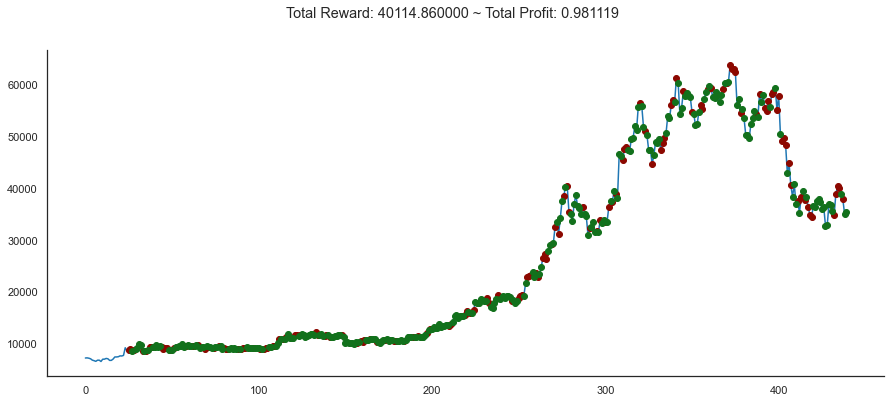

In [80]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
sns.despine()
plt.show()

                           Strategy
-------------------------  ----------
Start Period               2020-05-03
End Period                 2021-06-19
Risk-Free Rate             0.0%
Time in Market             24.0%

Cumulative Return          -1.89%
CAGR%                      -1.67%

Sharpe                     0.19
Sortino                    0.31
Sortino/√2                 0.22

Max Drawdown               -37.67%
Longest DD Days            236
Volatility (ann.)          43.92%
Calmar                     -0.04
Skew                       1.78
Kurtosis                   15.41

Expected Daily %           -0.0%
Expected Monthly %         -0.14%
Expected Yearly %          -0.95%
Kelly Criterion            2.99%
Risk of Ruin               0.0%
Daily Value-at-Risk        -4.52%
Expected Shortfall (cVaR)  -4.52%

Gain/Pain Ratio            0.07
Gain/Pain (1M)             0.19

Payoff Ratio               1.24
Profit Factor              1.07
Common Sense Ratio         0.8
CPC Index               

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2021-02-23  2021-06-19  2021-06-19   116    -37.666581        -34.824967
2  2020-05-04  2020-10-07  2020-12-26   236    -35.496394        -35.099411
3  2021-01-22  2021-01-26  2021-02-10    19    -12.171907         -9.026762
4  2021-01-04  2021-01-04  2021-01-07     3     -8.568004          0.000000
5  2021-01-09  2021-01-09  2021-01-18     9     -0.977836          0.000000

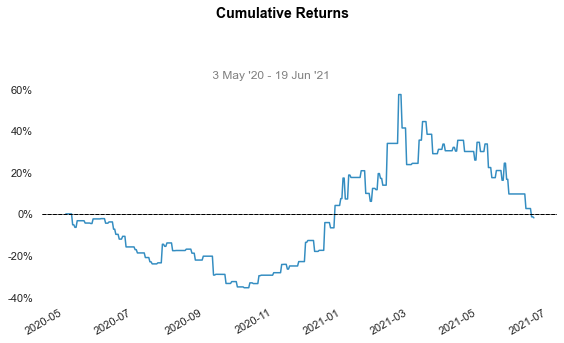

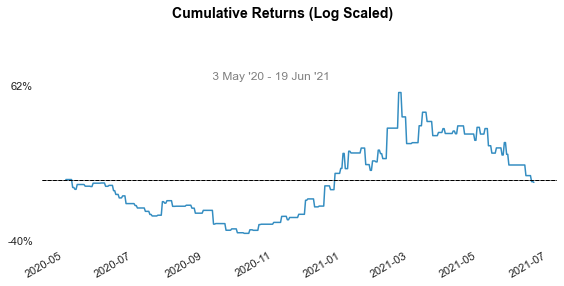

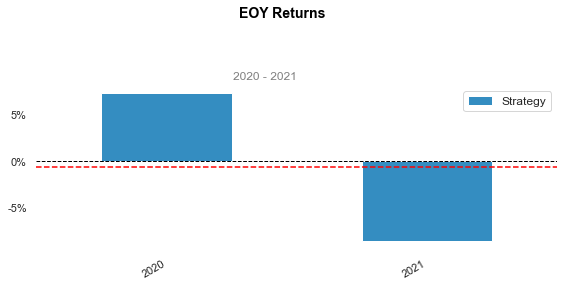

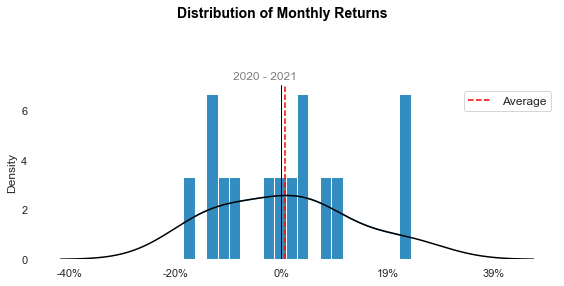

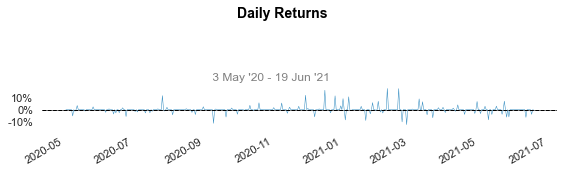

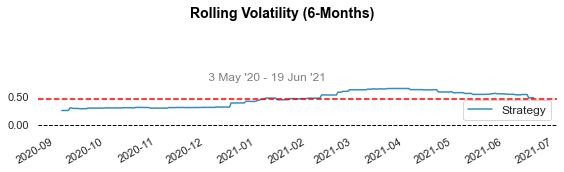

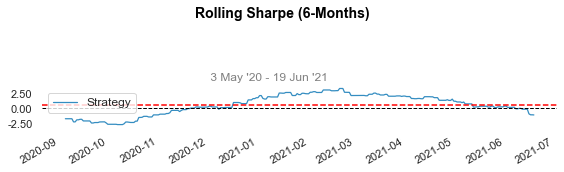

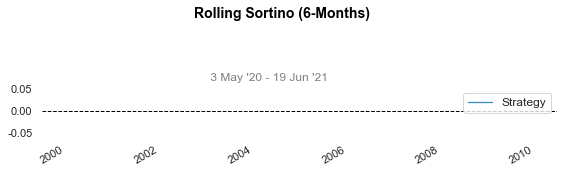

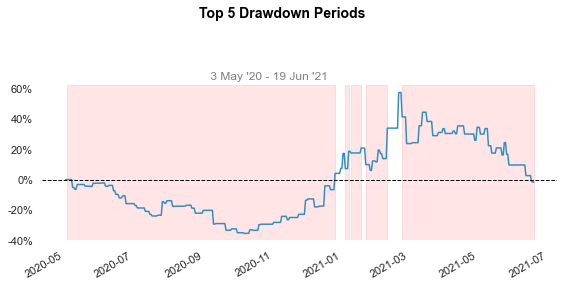

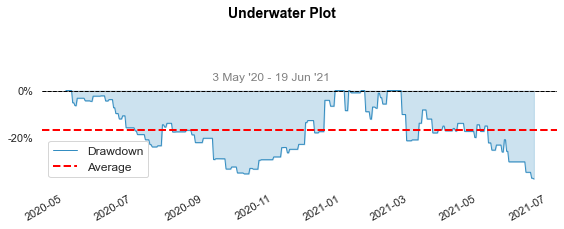

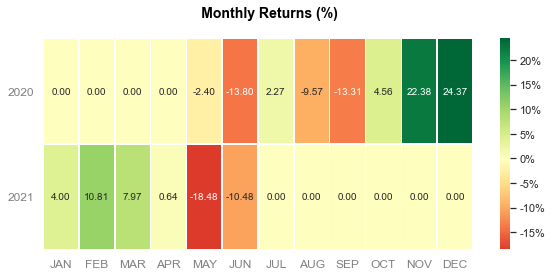

In [81]:
qs.extend_pandas()

net_worth = pd.Series(env.history['total_profit'], index=bitcoin_df.index[test_start+1:test_end])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)
# qs.reports.html(returns, output='a2c_quantstats.html')

In [85]:
help(EvalCallback)

Help on class EvalCallback in module stable_baselines.common.callbacks:

class EvalCallback(EventCallback)
 |  EvalCallback(eval_env: Union[gym.core.Env, stable_baselines.common.vec_env.base_vec_env.VecEnv], callback_on_new_best: Union[stable_baselines.common.callbacks.BaseCallback, NoneType] = None, n_eval_episodes: int = 5, eval_freq: int = 10000, log_path: str = None, best_model_save_path: str = None, deterministic: bool = True, render: bool = False, verbose: int = 1)
 |  
 |  Callback for evaluating an agent.
 |  
 |  :param eval_env: (Union[gym.Env, VecEnv]) The environment used for initialization
 |  :param callback_on_new_best: (Optional[BaseCallback]) Callback to trigger
 |      when there is a new best model according to the `mean_reward`
 |  :param n_eval_episodes: (int) The number of episodes to test the agent
 |  :param eval_freq: (int) Evaluate the agent every eval_freq call of the callback.
 |  :param log_path: (str) Path to a folder where the evaluations (`evaluations.np

In [84]:
from stable_baselines.common.callbacks import EvalCallback

eval_callback = EvalCallback(env, best_model_save_path='./logs/',
                             log_path='./logs/', eval_freq=500,
                             deterministic=True, render=False)

In [87]:
total_timesteps = 1_000_000
model = A2C('MlpLstmPolicy', env, verbose=1)
model.learn(total_timesteps=total_timesteps, callback=eval_callback)

Wrapping the env in a DummyVecEnv.
---------------------------------
| explained_variance | -83.4    |
| fps                | 22       |
| nupdates           | 1        |
| policy_entropy     | 0.691    |
| total_timesteps    | 5        |
| value_loss         | 0.000431 |
---------------------------------
Eval num_timesteps=500, episode_reward=0.00 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 1.48e-05 |
| fps                | 289      |
| nupdates           | 100      |
| policy_entropy     | 0.689    |
| total_timesteps    | 500      |
| value_loss         | 4.96e+05 |
---------------------------------
Eval num_timesteps=1000, episode_reward=0.00 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -4.95    |
| fps                | 313      |
| nupdates           | 200      |
| policy_entropy     | 0.689    |
| total_timesteps    | 1000     |
| value_loss         | 2.08e-05 |
------------

Eval num_timesteps=11500, episode_reward=0.00 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.26     |
| fps                | 343      |
| nupdates           | 2300     |
| policy_entropy     | 0.654    |
| total_timesteps    | 11500    |
| value_loss         | 0.127    |
---------------------------------
Eval num_timesteps=12000, episode_reward=0.00 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000969 |
| fps                | 342       |
| nupdates           | 2400      |
| policy_entropy     | 0.692     |
| total_timesteps    | 12000     |
| value_loss         | 7.04e+03  |
----------------------------------
Eval num_timesteps=12500, episode_reward=0.00 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000751 |
| fps                | 342       |
| nupdates           | 2500      |
| policy_entropy     | 0.379     |
| total_time

Eval num_timesteps=23000, episode_reward=0.00 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000467 |
| fps                | 337       |
| nupdates           | 4600      |
| policy_entropy     | 0.678     |
| total_timesteps    | 23000     |
| value_loss         | 4.3e+05   |
----------------------------------
Eval num_timesteps=23500, episode_reward=0.00 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000194 |
| fps                | 337       |
| nupdates           | 4700      |
| policy_entropy     | 0.58      |
| total_timesteps    | 23500     |
| value_loss         | 2.48e+04  |
----------------------------------
Eval num_timesteps=24000, episode_reward=0.00 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.000519 |
| fps                | 337      |
| nupdates           | 4800     |
| policy_entropy     | 0.601    |
| total_t

Eval num_timesteps=34500, episode_reward=5303.00 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0729   |
| fps                | 336      |
| nupdates           | 6900     |
| policy_entropy     | 0.693    |
| total_timesteps    | 34500    |
| value_loss         | 0.254    |
---------------------------------
Eval num_timesteps=35000, episode_reward=0.00 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 2.42e-05 |
| fps                | 336      |
| nupdates           | 7000     |
| policy_entropy     | 0.538    |
| total_timesteps    | 35000    |
| value_loss         | 8.46e+04 |
---------------------------------
Eval num_timesteps=35500, episode_reward=0.00 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0825   |
| fps                | 336      |
| nupdates           | 7100     |
| policy_entropy     | 0.691    |
| total_timesteps    |

Eval num_timesteps=46000, episode_reward=0.00 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000109 |
| fps                | 337       |
| nupdates           | 9200      |
| policy_entropy     | 0.611     |
| total_timesteps    | 46000     |
| value_loss         | 1.64e+04  |
----------------------------------
Eval num_timesteps=46500, episode_reward=40689.23 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0301   |
| fps                | 337      |
| nupdates           | 9300     |
| policy_entropy     | 0.692    |
| total_timesteps    | 46500    |
| value_loss         | 0.128    |
---------------------------------
Eval num_timesteps=47000, episode_reward=0.00 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000737 |
| fps                | 337       |
| nupdates           | 9400      |
| policy_entropy     | 0.519     |
| total_

Eval num_timesteps=57500, episode_reward=0.00 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000113 |
| fps                | 337       |
| nupdates           | 11500     |
| policy_entropy     | 0.659     |
| total_timesteps    | 57500     |
| value_loss         | 250       |
----------------------------------
Eval num_timesteps=58000, episode_reward=34315.49 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 2.63e-05 |
| fps                | 337      |
| nupdates           | 11600    |
| policy_entropy     | 0.691    |
| total_timesteps    | 58000    |
| value_loss         | 7.09e+03 |
---------------------------------
Eval num_timesteps=58500, episode_reward=0.00 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00101  |
| fps                | 337      |
| nupdates           | 11700    |
| policy_entropy     | 0.657    |
| total_times

Eval num_timesteps=69000, episode_reward=729.38 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -8.92e-05 |
| fps                | 337       |
| nupdates           | 13800     |
| policy_entropy     | 0.693     |
| total_timesteps    | 69000     |
| value_loss         | 4.09e+04  |
----------------------------------
Eval num_timesteps=69500, episode_reward=0.00 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.00015 |
| fps                | 337      |
| nupdates           | 13900    |
| policy_entropy     | 0.592    |
| total_timesteps    | 69500    |
| value_loss         | 4.02e+03 |
---------------------------------
Eval num_timesteps=70000, episode_reward=33606.32 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -1.12e-05 |
| fps                | 337       |
| nupdates           | 14000     |
| policy_entropy     | 0.692     |
| tota

Eval num_timesteps=80500, episode_reward=0.00 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000932 |
| fps                | 338       |
| nupdates           | 16100     |
| policy_entropy     | 0.668     |
| total_timesteps    | 80500     |
| value_loss         | 234       |
----------------------------------
Eval num_timesteps=81000, episode_reward=0.00 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 9e-06    |
| fps                | 338      |
| nupdates           | 16200    |
| policy_entropy     | 0.644    |
| total_timesteps    | 81000    |
| value_loss         | 2.58e+05 |
---------------------------------
Eval num_timesteps=81500, episode_reward=631.82 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0417   |
| fps                | 338      |
| nupdates           | 16300    |
| policy_entropy     | 0.687    |
| total_timeste

Eval num_timesteps=92000, episode_reward=0.00 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -7.43e-05 |
| fps                | 337       |
| nupdates           | 18400     |
| policy_entropy     | 0.606     |
| total_timesteps    | 92000     |
| value_loss         | 1.64e+04  |
----------------------------------
Eval num_timesteps=92500, episode_reward=5756.29 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -6.6e-05 |
| fps                | 337      |
| nupdates           | 18500    |
| policy_entropy     | 0.693    |
| total_timesteps    | 92500    |
| value_loss         | 4.41e+05 |
---------------------------------
Eval num_timesteps=93000, episode_reward=24182.84 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -4.42e-05 |
| fps                | 337       |
| nupdates           | 18600     |
| policy_entropy     | 0.692     |
| tot

Eval num_timesteps=103500, episode_reward=3560.08 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.000729 |
| fps                | 331      |
| nupdates           | 20700    |
| policy_entropy     | 0.679    |
| total_timesteps    | 103500   |
| value_loss         | 4.23e+05 |
---------------------------------
Eval num_timesteps=104000, episode_reward=-842.67 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 6.86e-05 |
| fps                | 330      |
| nupdates           | 20800    |
| policy_entropy     | 0.57     |
| total_timesteps    | 104000   |
| value_loss         | 7.06e+03 |
---------------------------------
Eval num_timesteps=104500, episode_reward=28963.38 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000684 |
| fps                | 330       |
| nupdates           | 20900     |
| policy_entropy     | 0.689     |
| total

Eval num_timesteps=115000, episode_reward=279.86 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000173 |
| fps                | 331       |
| nupdates           | 23000     |
| policy_entropy     | 0.615     |
| total_timesteps    | 115000    |
| value_loss         | 7.04e+03  |
----------------------------------
Eval num_timesteps=115500, episode_reward=0.00 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000136 |
| fps                | 331       |
| nupdates           | 23100     |
| policy_entropy     | 0.432     |
| total_timesteps    | 115500    |
| value_loss         | 2.46e+04  |
----------------------------------
Eval num_timesteps=116000, episode_reward=29063.38 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000189 |
| fps                | 331       |
| nupdates           | 23200     |
| policy_entropy     | 0.69   

Eval num_timesteps=126500, episode_reward=0.00 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0027   |
| fps                | 332      |
| nupdates           | 25300    |
| policy_entropy     | 0.676    |
| total_timesteps    | 126500   |
| value_loss         | 4.29e+05 |
---------------------------------
Eval num_timesteps=127000, episode_reward=-960.75 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0536   |
| fps                | 332      |
| nupdates           | 25400    |
| policy_entropy     | 0.692    |
| total_timesteps    | 127000   |
| value_loss         | 1.44     |
---------------------------------
Eval num_timesteps=127500, episode_reward=0.00 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -1.17e-05 |
| fps                | 333       |
| nupdates           | 25500     |
| policy_entropy     | 0.655     |
| total_timest

Eval num_timesteps=138000, episode_reward=26970.77 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000544 |
| fps                | 333       |
| nupdates           | 27600     |
| policy_entropy     | 0.693     |
| total_timesteps    | 138000    |
| value_loss         | 3.99e+03  |
----------------------------------
Eval num_timesteps=138500, episode_reward=1350.22 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0571   |
| fps                | 333      |
| nupdates           | 27700    |
| policy_entropy     | 0.662    |
| total_timesteps    | 138500   |
| value_loss         | 1.04     |
---------------------------------
Eval num_timesteps=139000, episode_reward=266.35 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00234  |
| fps                | 333      |
| nupdates           | 27800    |
| policy_entropy     | 0.682    |
| tot

Eval num_timesteps=149500, episode_reward=23674.02 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.00144 |
| fps                | 334      |
| nupdates           | 29900    |
| policy_entropy     | 0.692    |
| total_timesteps    | 149500   |
| value_loss         | 236      |
---------------------------------
Eval num_timesteps=150000, episode_reward=-1525.16 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000244 |
| fps                | 334       |
| nupdates           | 30000     |
| policy_entropy     | 0.687     |
| total_timesteps    | 150000    |
| value_loss         | 3.88e+04  |
----------------------------------
Eval num_timesteps=150500, episode_reward=3234.18 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0494   |
| fps                | 334      |
| nupdates           | 30100    |
| policy_entropy     | 0.692    |
| t

Eval num_timesteps=161000, episode_reward=-247.53 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0402   |
| fps                | 334      |
| nupdates           | 32200    |
| policy_entropy     | 0.583    |
| total_timesteps    | 161000   |
| value_loss         | 1.23     |
---------------------------------
Eval num_timesteps=161500, episode_reward=136.24 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0389   |
| fps                | 334      |
| nupdates           | 32300    |
| policy_entropy     | 0.691    |
| total_timesteps    | 161500   |
| value_loss         | 1.31     |
---------------------------------
Eval num_timesteps=162000, episode_reward=-193.77 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000338 |
| fps                | 334       |
| nupdates           | 32400     |
| policy_entropy     | 0.673     |
| total_t

Eval num_timesteps=172500, episode_reward=-1850.59 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0553   |
| fps                | 335      |
| nupdates           | 34500    |
| policy_entropy     | 0.68     |
| total_timesteps    | 172500   |
| value_loss         | 1.14     |
---------------------------------
Eval num_timesteps=173000, episode_reward=28519.28 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000143 |
| fps                | 335       |
| nupdates           | 34600     |
| policy_entropy     | 0.677     |
| total_timesteps    | 173000    |
| value_loss         | 2.46e+04  |
----------------------------------
Eval num_timesteps=173500, episode_reward=29543.39 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000251 |
| fps                | 335       |
| nupdates           | 34700     |
| policy_entropy     | 0.687    

Eval num_timesteps=184000, episode_reward=39238.98 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000346 |
| fps                | 336       |
| nupdates           | 36800     |
| policy_entropy     | 0.652     |
| total_timesteps    | 184000    |
| value_loss         | 1.65e+04  |
----------------------------------
Eval num_timesteps=184500, episode_reward=20000.67 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.117    |
| fps                | 336      |
| nupdates           | 36900    |
| policy_entropy     | 0.692    |
| total_timesteps    | 184500   |
| value_loss         | 1        |
---------------------------------
Eval num_timesteps=185000, episode_reward=-431.72 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000499 |
| fps                | 336       |
| nupdates           | 37000     |
| policy_entropy     | 0.469     

Eval num_timesteps=195500, episode_reward=25218.30 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000348 |
| fps                | 336       |
| nupdates           | 39100     |
| policy_entropy     | 0.693     |
| total_timesteps    | 195500    |
| value_loss         | 1.64e+04  |
----------------------------------
Eval num_timesteps=196000, episode_reward=0.00 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000303 |
| fps                | 336       |
| nupdates           | 39200     |
| policy_entropy     | 0.532     |
| total_timesteps    | 196000    |
| value_loss         | 3.85e+04  |
----------------------------------
Eval num_timesteps=196500, episode_reward=30891.32 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000305 |
| fps                | 336       |
| nupdates           | 39300     |
| policy_entropy     | 0.675

Eval num_timesteps=207000, episode_reward=-411.99 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0348   |
| fps                | 335      |
| nupdates           | 41400    |
| policy_entropy     | 0.399    |
| total_timesteps    | 207000   |
| value_loss         | 1.26     |
---------------------------------
Eval num_timesteps=207500, episode_reward=32832.82 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -4.07e-05 |
| fps                | 335       |
| nupdates           | 41500     |
| policy_entropy     | 0.683     |
| total_timesteps    | 207500    |
| value_loss         | 5.67e+04  |
----------------------------------
Eval num_timesteps=208000, episode_reward=27642.06 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000285 |
| fps                | 335       |
| nupdates           | 41600     |
| policy_entropy     | 0.638     

Eval num_timesteps=218500, episode_reward=-2124.05 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000902 |
| fps                | 335       |
| nupdates           | 43700     |
| policy_entropy     | 0.67      |
| total_timesteps    | 218500    |
| value_loss         | 4.01e+03  |
----------------------------------
Eval num_timesteps=219000, episode_reward=31124.13 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000401 |
| fps                | 335       |
| nupdates           | 43800     |
| policy_entropy     | 0.687     |
| total_timesteps    | 219000    |
| value_loss         | 1.04e+04  |
----------------------------------
Eval num_timesteps=219500, episode_reward=-110.27 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -5.66e-05 |
| fps                | 335       |
| nupdates           | 43900     |
| policy_entropy     | 0.

Eval num_timesteps=230000, episode_reward=-115.24 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0209   |
| fps                | 335      |
| nupdates           | 46000    |
| policy_entropy     | 0.494    |
| total_timesteps    | 230000   |
| value_loss         | 1.88     |
---------------------------------
Eval num_timesteps=230500, episode_reward=41889.88 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00214  |
| fps                | 335      |
| nupdates           | 46100    |
| policy_entropy     | 0.675    |
| total_timesteps    | 230500   |
| value_loss         | 4.56e+05 |
---------------------------------
Eval num_timesteps=231000, episode_reward=0.00 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000273 |
| fps                | 335       |
| nupdates           | 46200     |
| policy_entropy     | 0.655     |
| total_ti

Eval num_timesteps=241500, episode_reward=42061.59 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0135   |
| fps                | 335      |
| nupdates           | 48300    |
| policy_entropy     | 0.67     |
| total_timesteps    | 241500   |
| value_loss         | 2.57     |
---------------------------------
Eval num_timesteps=242000, episode_reward=-6.13 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000422 |
| fps                | 335       |
| nupdates           | 48400     |
| policy_entropy     | 0.665     |
| total_timesteps    | 242000    |
| value_loss         | 1.3e+04   |
----------------------------------
Eval num_timesteps=242500, episode_reward=2536.14 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000229 |
| fps                | 335       |
| nupdates           | 48500     |
| policy_entropy     | 0.691     |
|

Eval num_timesteps=253000, episode_reward=23420.58 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000182 |
| fps                | 336       |
| nupdates           | 50600     |
| policy_entropy     | 0.689     |
| total_timesteps    | 253000    |
| value_loss         | 2.95e+04  |
----------------------------------
Eval num_timesteps=253500, episode_reward=-321.75 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.0021  |
| fps                | 336      |
| nupdates           | 50700    |
| policy_entropy     | 0.616    |
| total_timesteps    | 253500   |
| value_loss         | 3.44e+05 |
---------------------------------
Eval num_timesteps=254000, episode_reward=0.00 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000105 |
| fps                | 336       |
| nupdates           | 50800     |
| policy_entropy     | 0.406     |
| 

Eval num_timesteps=264500, episode_reward=62.12 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00235  |
| fps                | 336      |
| nupdates           | 52900    |
| policy_entropy     | 0.668    |
| total_timesteps    | 264500   |
| value_loss         | 4.29e+05 |
---------------------------------
Eval num_timesteps=265000, episode_reward=27152.00 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0556   |
| fps                | 336      |
| nupdates           | 53000    |
| policy_entropy     | 0.688    |
| total_timesteps    | 265000   |
| value_loss         | 2.91     |
---------------------------------
Eval num_timesteps=265500, episode_reward=1117.47 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000265 |
| fps                | 336       |
| nupdates           | 53100     |
| policy_entropy     | 0.691     |
| total_t

Eval num_timesteps=276000, episode_reward=925.65 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000733 |
| fps                | 337       |
| nupdates           | 55200     |
| policy_entropy     | 0.691     |
| total_timesteps    | 276000    |
| value_loss         | 3.84e+04  |
----------------------------------
Eval num_timesteps=276500, episode_reward=346.94 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000575 |
| fps                | 337       |
| nupdates           | 55300     |
| policy_entropy     | 0.545     |
| total_timesteps    | 276500    |
| value_loss         | 2.26e+04  |
----------------------------------
Eval num_timesteps=277000, episode_reward=29502.43 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.00176 |
| fps                | 337      |
| nupdates           | 55400    |
| policy_entropy     | 0.686    

Eval num_timesteps=287500, episode_reward=42016.47 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -7.01e-05 |
| fps                | 337       |
| nupdates           | 57500     |
| policy_entropy     | 0.639     |
| total_timesteps    | 287500    |
| value_loss         | 2.17e+05  |
----------------------------------
Eval num_timesteps=288000, episode_reward=27514.96 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.00178 |
| fps                | 337      |
| nupdates           | 57600    |
| policy_entropy     | 0.68     |
| total_timesteps    | 288000   |
| value_loss         | 2.06e+04 |
---------------------------------
Eval num_timesteps=288500, episode_reward=30154.75 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.000284 |
| fps                | 337      |
| nupdates           | 57700    |
| policy_entropy     | 0.664    |
| 

Eval num_timesteps=299000, episode_reward=22252.92 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -9.12e-05 |
| fps                | 336       |
| nupdates           | 59800     |
| policy_entropy     | 0.67      |
| total_timesteps    | 299000    |
| value_loss         | 5.5e+05   |
----------------------------------
Eval num_timesteps=299500, episode_reward=-108.76 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0171   |
| fps                | 336      |
| nupdates           | 59900    |
| policy_entropy     | 0.505    |
| total_timesteps    | 299500   |
| value_loss         | 3.62     |
---------------------------------
Eval num_timesteps=300000, episode_reward=-2138.37 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -6.4e-05 |
| fps                | 336      |
| nupdates           | 60000    |
| policy_entropy     | 0.642    |
| t

Eval num_timesteps=310500, episode_reward=15332.50 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.06     |
| fps                | 337      |
| nupdates           | 62100    |
| policy_entropy     | 0.633    |
| total_timesteps    | 310500   |
| value_loss         | 4.65     |
---------------------------------
Eval num_timesteps=311000, episode_reward=25668.82 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.00175 |
| fps                | 337      |
| nupdates           | 62200    |
| policy_entropy     | 0.693    |
| total_timesteps    | 311000   |
| value_loss         | 3.9e+03  |
---------------------------------
Eval num_timesteps=311500, episode_reward=1122.46 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0174   |
| fps                | 337      |
| nupdates           | 62300    |
| policy_entropy     | 0.528    |
| total_tim

Eval num_timesteps=322000, episode_reward=-3663.29 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0123   |
| fps                | 337      |
| nupdates           | 64400    |
| policy_entropy     | 0.617    |
| total_timesteps    | 322000   |
| value_loss         | 3.28e+05 |
---------------------------------
Eval num_timesteps=322500, episode_reward=1924.28 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.156    |
| fps                | 337      |
| nupdates           | 64500    |
| policy_entropy     | 0.447    |
| total_timesteps    | 322500   |
| value_loss         | 3.16     |
---------------------------------
Eval num_timesteps=323000, episode_reward=-281.91 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00199  |
| fps                | 337      |
| nupdates           | 64600    |
| policy_entropy     | 0.609    |
| total_time

Eval num_timesteps=333500, episode_reward=34025.12 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.00265 |
| fps                | 337      |
| nupdates           | 66700    |
| policy_entropy     | 0.543    |
| total_timesteps    | 333500   |
| value_loss         | 3.83e+03 |
---------------------------------
Eval num_timesteps=334000, episode_reward=25406.29 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.213    |
| fps                | 337      |
| nupdates           | 66800    |
| policy_entropy     | 0.546    |
| total_timesteps    | 334000   |
| value_loss         | 4.9      |
---------------------------------
Eval num_timesteps=334500, episode_reward=27969.21 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.000422 |
| fps                | 337      |
| nupdates           | 66900    |
| policy_entropy     | 0.671    |
| total_ti

Eval num_timesteps=345000, episode_reward=664.06 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.00945 |
| fps                | 337      |
| nupdates           | 69000    |
| policy_entropy     | 0.692    |
| total_timesteps    | 345000   |
| value_loss         | 4.61e+05 |
---------------------------------
Eval num_timesteps=345500, episode_reward=21160.35 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000172 |
| fps                | 337       |
| nupdates           | 69100     |
| policy_entropy     | 0.538     |
| total_timesteps    | 345500    |
| value_loss         | 5.96e+04  |
----------------------------------
Eval num_timesteps=346000, episode_reward=-23655.42 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000104 |
| fps                | 337       |
| nupdates           | 69200     |
| policy_entropy     | 0.693     

Eval num_timesteps=356500, episode_reward=22283.81 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.381   |
| fps                | 338      |
| nupdates           | 71300    |
| policy_entropy     | 0.313    |
| total_timesteps    | 356500   |
| value_loss         | 11.3     |
---------------------------------
Eval num_timesteps=357000, episode_reward=27620.91 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0109   |
| fps                | 338      |
| nupdates           | 71400    |
| policy_entropy     | 0.653    |
| total_timesteps    | 357000   |
| value_loss         | 4.54e+05 |
---------------------------------
Eval num_timesteps=357500, episode_reward=320.52 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.003    |
| fps                | 338      |
| nupdates           | 71500    |
| policy_entropy     | 0.34     |
| total_time

Eval num_timesteps=368000, episode_reward=19586.70 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.252    |
| fps                | 338      |
| nupdates           | 73600    |
| policy_entropy     | 0.651    |
| total_timesteps    | 368000   |
| value_loss         | 3.11     |
---------------------------------
Eval num_timesteps=368500, episode_reward=-638.57 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -3.11    |
| fps                | 338      |
| nupdates           | 73700    |
| policy_entropy     | 0.295    |
| total_timesteps    | 368500   |
| value_loss         | 20.9     |
---------------------------------
Eval num_timesteps=369000, episode_reward=25611.52 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00627  |
| fps                | 338      |
| nupdates           | 73800    |
| policy_entropy     | 0.693    |
| total_tim

Eval num_timesteps=379500, episode_reward=2838.57 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.22     |
| fps                | 338      |
| nupdates           | 75900    |
| policy_entropy     | 0.635    |
| total_timesteps    | 379500   |
| value_loss         | 109      |
---------------------------------
Eval num_timesteps=380000, episode_reward=-1921.86 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.131    |
| fps                | 338      |
| nupdates           | 76000    |
| policy_entropy     | 0.682    |
| total_timesteps    | 380000   |
| value_loss         | 155      |
---------------------------------
Eval num_timesteps=380500, episode_reward=2105.22 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00746  |
| fps                | 338      |
| nupdates           | 76100    |
| policy_entropy     | 0.576    |
| total_time

Eval num_timesteps=391000, episode_reward=26996.61 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00134  |
| fps                | 338      |
| nupdates           | 78200    |
| policy_entropy     | 0.604    |
| total_timesteps    | 391000   |
| value_loss         | 1.49e+03 |
---------------------------------
Eval num_timesteps=391500, episode_reward=-1595.77 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.00142 |
| fps                | 338      |
| nupdates           | 78300    |
| policy_entropy     | 0.69     |
| total_timesteps    | 391500   |
| value_loss         | 1.32e+04 |
---------------------------------
Eval num_timesteps=392000, episode_reward=681.25 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.0157  |
| fps                | 338      |
| nupdates           | 78400    |
| policy_entropy     | 0.683    |
| total_time

Eval num_timesteps=402500, episode_reward=2636.29 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00486  |
| fps                | 338      |
| nupdates           | 80500    |
| policy_entropy     | 0.622    |
| total_timesteps    | 402500   |
| value_loss         | 1.01e+04 |
---------------------------------
Eval num_timesteps=403000, episode_reward=25207.78 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.00725 |
| fps                | 338      |
| nupdates           | 80600    |
| policy_entropy     | 0.604    |
| total_timesteps    | 403000   |
| value_loss         | 1.45e+03 |
---------------------------------
Eval num_timesteps=403500, episode_reward=-1190.29 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.00648 |
| fps                | 338      |
| nupdates           | 80700    |
| policy_entropy     | 0.644    |
| total_tim

Eval num_timesteps=414000, episode_reward=4414.90 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.313    |
| fps                | 337      |
| nupdates           | 82800    |
| policy_entropy     | 0.683    |
| total_timesteps    | 414000   |
| value_loss         | 0.509    |
---------------------------------
Eval num_timesteps=414500, episode_reward=5212.03 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0184   |
| fps                | 337      |
| nupdates           | 82900    |
| policy_entropy     | 0.678    |
| total_timesteps    | 414500   |
| value_loss         | 3.16e+05 |
---------------------------------
Eval num_timesteps=415000, episode_reward=9298.17 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000854 |
| fps                | 337       |
| nupdates           | 83000     |
| policy_entropy     | 0.645     |
| total_

Eval num_timesteps=425500, episode_reward=10118.70 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0178   |
| fps                | 337      |
| nupdates           | 85100    |
| policy_entropy     | 0.688    |
| total_timesteps    | 425500   |
| value_loss         | 4.33e+05 |
---------------------------------
Eval num_timesteps=426000, episode_reward=-3686.56 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00026  |
| fps                | 337      |
| nupdates           | 85200    |
| policy_entropy     | 0.662    |
| total_timesteps    | 426000   |
| value_loss         | 4.63e+05 |
---------------------------------
Eval num_timesteps=426500, episode_reward=15765.49 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000609 |
| fps                | 337       |
| nupdates           | 85300     |
| policy_entropy     | 0.676     |
| tot

Eval num_timesteps=437000, episode_reward=27296.70 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000261 |
| fps                | 338       |
| nupdates           | 87400     |
| policy_entropy     | 0.597     |
| total_timesteps    | 437000    |
| value_loss         | 1.1e+06   |
----------------------------------
Eval num_timesteps=437500, episode_reward=22620.71 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00012  |
| fps                | 338      |
| nupdates           | 87500    |
| policy_entropy     | 0.616    |
| total_timesteps    | 437500   |
| value_loss         | 1.13e+05 |
---------------------------------
Eval num_timesteps=438000, episode_reward=22910.88 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.000106 |
| fps                | 338      |
| nupdates           | 87600    |
| policy_entropy     | 0.596    |
| 

Eval num_timesteps=448500, episode_reward=2227.52 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.0529  |
| fps                | 338      |
| nupdates           | 89700    |
| policy_entropy     | 0.664    |
| total_timesteps    | 448500   |
| value_loss         | 0.915    |
---------------------------------
Eval num_timesteps=449000, episode_reward=7540.02 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00134  |
| fps                | 338      |
| nupdates           | 89800    |
| policy_entropy     | 0.418    |
| total_timesteps    | 449000   |
| value_loss         | 1.49e+03 |
---------------------------------
Eval num_timesteps=449500, episode_reward=18293.14 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.119   |
| fps                | 338      |
| nupdates           | 89900    |
| policy_entropy     | 0.684    |
| total_time

Eval num_timesteps=460000, episode_reward=25551.15 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.000733 |
| fps                | 338      |
| nupdates           | 92000    |
| policy_entropy     | 0.397    |
| total_timesteps    | 460000   |
| value_loss         | 1.2e+05  |
---------------------------------
Eval num_timesteps=460500, episode_reward=22420.65 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0024   |
| fps                | 338      |
| nupdates           | 92100    |
| policy_entropy     | 0.693    |
| total_timesteps    | 460500   |
| value_loss         | 2.28e+04 |
---------------------------------
Eval num_timesteps=461000, episode_reward=4852.73 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -1.49    |
| fps                | 338      |
| nupdates           | 92200    |
| policy_entropy     | 0.685    |
| total_tim

Eval num_timesteps=471500, episode_reward=20981.06 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -81.4    |
| fps                | 338      |
| nupdates           | 94300    |
| policy_entropy     | 0.394    |
| total_timesteps    | 471500   |
| value_loss         | 0.00333  |
---------------------------------
Eval num_timesteps=472000, episode_reward=21718.12 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.000182 |
| fps                | 338      |
| nupdates           | 94400    |
| policy_entropy     | 0.24     |
| total_timesteps    | 472000   |
| value_loss         | 2.42e+05 |
---------------------------------
Eval num_timesteps=472500, episode_reward=10465.79 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.000995 |
| fps                | 338      |
| nupdates           | 94500    |
| policy_entropy     | 0.667    |
| total_ti

Eval num_timesteps=483000, episode_reward=5490.41 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.000892 |
| fps                | 338      |
| nupdates           | 96600    |
| policy_entropy     | 0.69     |
| total_timesteps    | 483000   |
| value_loss         | 2.49e+04 |
---------------------------------
Eval num_timesteps=483500, episode_reward=-5159.47 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00145  |
| fps                | 338      |
| nupdates           | 96700    |
| policy_entropy     | 0.69     |
| total_timesteps    | 483500   |
| value_loss         | 4.96e+05 |
---------------------------------
Eval num_timesteps=484000, episode_reward=774.73 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00436  |
| fps                | 338      |
| nupdates           | 96800    |
| policy_entropy     | 0.673    |
| total_times

Eval num_timesteps=494500, episode_reward=57314.14 +/- 0.00
Episode length: 414.00 +/- 0.00
New best mean reward!
---------------------------------
| explained_variance | 0.00186  |
| fps                | 337      |
| nupdates           | 98900    |
| policy_entropy     | 0.613    |
| total_timesteps    | 494500   |
| value_loss         | 2.46e+04 |
---------------------------------
Eval num_timesteps=495000, episode_reward=-269.14 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00198  |
| fps                | 337      |
| nupdates           | 99000    |
| policy_entropy     | 0.683    |
| total_timesteps    | 495000   |
| value_loss         | 6.89e+05 |
---------------------------------
Eval num_timesteps=495500, episode_reward=-663.17 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.000699 |
| fps                | 337      |
| nupdates           | 99100    |
| policy_entropy     | 0

Eval num_timesteps=506000, episode_reward=-8898.67 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00689  |
| fps                | 337      |
| nupdates           | 101200   |
| policy_entropy     | 0.693    |
| total_timesteps    | 506000   |
| value_loss         | 7.62e+04 |
---------------------------------
Eval num_timesteps=506500, episode_reward=-10672.91 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0204   |
| fps                | 337      |
| nupdates           | 101300   |
| policy_entropy     | 0.693    |
| total_timesteps    | 506500   |
| value_loss         | 1.16e+03 |
---------------------------------
Eval num_timesteps=507000, episode_reward=24100.65 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0408   |
| fps                | 337      |
| nupdates           | 101400   |
| policy_entropy     | 0.687    |
| total_t

Eval num_timesteps=517500, episode_reward=4868.11 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00179  |
| fps                | 337      |
| nupdates           | 103500   |
| policy_entropy     | 0.535    |
| total_timesteps    | 517500   |
| value_loss         | 1.52e+03 |
---------------------------------
Eval num_timesteps=518000, episode_reward=8594.09 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.00375 |
| fps                | 337      |
| nupdates           | 103600   |
| policy_entropy     | 0.661    |
| total_timesteps    | 518000   |
| value_loss         | 1.1e+06  |
---------------------------------
Eval num_timesteps=518500, episode_reward=32118.28 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00049  |
| fps                | 337      |
| nupdates           | 103700   |
| policy_entropy     | 0.436    |
| total_time

Eval num_timesteps=529000, episode_reward=-6247.26 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.000239 |
| fps                | 337      |
| nupdates           | 105800   |
| policy_entropy     | 0.583    |
| total_timesteps    | 529000   |
| value_loss         | 4.17e+05 |
---------------------------------
Eval num_timesteps=529500, episode_reward=-6135.69 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 2.32e-05 |
| fps                | 337      |
| nupdates           | 105900   |
| policy_entropy     | 0.46     |
| total_timesteps    | 529500   |
| value_loss         | 7.34e+04 |
---------------------------------
Eval num_timesteps=530000, episode_reward=14063.68 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.000433 |
| fps                | 337      |
| nupdates           | 106000   |
| policy_entropy     | 0.588    |
| total_ti

Eval num_timesteps=540500, episode_reward=2503.86 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.000356 |
| fps                | 337      |
| nupdates           | 108100   |
| policy_entropy     | 0.614    |
| total_timesteps    | 540500   |
| value_loss         | 3.74e+05 |
---------------------------------
Eval num_timesteps=541000, episode_reward=6956.95 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00054  |
| fps                | 337      |
| nupdates           | 108200   |
| policy_entropy     | 0.687    |
| total_timesteps    | 541000   |
| value_loss         | 3.98e+03 |
---------------------------------
Eval num_timesteps=541500, episode_reward=7151.93 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.000515 |
| fps                | 337      |
| nupdates           | 108300   |
| policy_entropy     | 0.693    |
| total_times

Eval num_timesteps=552000, episode_reward=24304.82 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.000152 |
| fps                | 337      |
| nupdates           | 110400   |
| policy_entropy     | 0.438    |
| total_timesteps    | 552000   |
| value_loss         | 6.73e+04 |
---------------------------------
Eval num_timesteps=552500, episode_reward=-674.63 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00134  |
| fps                | 337      |
| nupdates           | 110500   |
| policy_entropy     | 0.693    |
| total_timesteps    | 552500   |
| value_loss         | 222      |
---------------------------------
Eval num_timesteps=553000, episode_reward=680.17 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.000112 |
| fps                | 337      |
| nupdates           | 110600   |
| policy_entropy     | 0.673    |
| total_times

Eval num_timesteps=563500, episode_reward=175.40 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -2.82    |
| fps                | 337      |
| nupdates           | 112700   |
| policy_entropy     | 0.687    |
| total_timesteps    | 563500   |
| value_loss         | 2.05     |
---------------------------------
Eval num_timesteps=564000, episode_reward=1928.92 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00145  |
| fps                | 337      |
| nupdates           | 112800   |
| policy_entropy     | 0.689    |
| total_timesteps    | 564000   |
| value_loss         | 3.86e+04 |
---------------------------------
Eval num_timesteps=564500, episode_reward=1216.21 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00153  |
| fps                | 337      |
| nupdates           | 112900   |
| policy_entropy     | 0.589    |
| total_timest

Eval num_timesteps=575000, episode_reward=-482.17 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.0508  |
| fps                | 337      |
| nupdates           | 115000   |
| policy_entropy     | 0.627    |
| total_timesteps    | 575000   |
| value_loss         | 0.416    |
---------------------------------
Eval num_timesteps=575500, episode_reward=21274.20 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00392  |
| fps                | 337      |
| nupdates           | 115100   |
| policy_entropy     | 0.598    |
| total_timesteps    | 575500   |
| value_loss         | 0.322    |
---------------------------------
Eval num_timesteps=576000, episode_reward=-378.06 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.00478 |
| fps                | 337      |
| nupdates           | 115200   |
| policy_entropy     | 0.689    |
| total_time

Eval num_timesteps=586500, episode_reward=262.17 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.000212 |
| fps                | 337      |
| nupdates           | 117300   |
| policy_entropy     | 0.626    |
| total_timesteps    | 586500   |
| value_loss         | 2.01e+04 |
---------------------------------
Eval num_timesteps=587000, episode_reward=2383.70 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 2.8e-05  |
| fps                | 337      |
| nupdates           | 117400   |
| policy_entropy     | 0.547    |
| total_timesteps    | 587000   |
| value_loss         | 2.47e+04 |
---------------------------------
Eval num_timesteps=587500, episode_reward=12671.20 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 2.57e-05 |
| fps                | 337      |
| nupdates           | 117500   |
| policy_entropy     | 0.674    |
| total_times

Eval num_timesteps=598000, episode_reward=4495.50 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0133   |
| fps                | 337      |
| nupdates           | 119600   |
| policy_entropy     | 0.53     |
| total_timesteps    | 598000   |
| value_loss         | 0.0617   |
---------------------------------
Eval num_timesteps=598500, episode_reward=2481.85 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.000315 |
| fps                | 337      |
| nupdates           | 119700   |
| policy_entropy     | 0.683    |
| total_timesteps    | 598500   |
| value_loss         | 1.32e+04 |
---------------------------------
Eval num_timesteps=599000, episode_reward=-952.69 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -1.09    |
| fps                | 337      |
| nupdates           | 119800   |
| policy_entropy     | 0.693    |
| total_times

Eval num_timesteps=609500, episode_reward=32326.64 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.000521 |
| fps                | 338      |
| nupdates           | 121900   |
| policy_entropy     | 0.545    |
| total_timesteps    | 609500   |
| value_loss         | 4.05e+03 |
---------------------------------
Eval num_timesteps=610000, episode_reward=34452.90 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.000175 |
| fps                | 338      |
| nupdates           | 122000   |
| policy_entropy     | 0.571    |
| total_timesteps    | 610000   |
| value_loss         | 5.7e+04  |
---------------------------------
Eval num_timesteps=610500, episode_reward=20534.46 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.231    |
| fps                | 338      |
| nupdates           | 122100   |
| policy_entropy     | 0.185    |
| total_ti

Eval num_timesteps=621000, episode_reward=31370.49 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.632   |
| fps                | 338      |
| nupdates           | 124200   |
| policy_entropy     | 0.00556  |
| total_timesteps    | 621000   |
| value_loss         | 0.000196 |
---------------------------------
Eval num_timesteps=621500, episode_reward=33999.25 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.249   |
| fps                | 338      |
| nupdates           | 124300   |
| policy_entropy     | 0.00409  |
| total_timesteps    | 621500   |
| value_loss         | 0.000153 |
---------------------------------
Eval num_timesteps=622000, episode_reward=34161.65 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.263    |
| fps                | 338      |
| nupdates           | 124400   |
| policy_entropy     | 0.00457  |
| total_ti

Eval num_timesteps=632500, episode_reward=27794.28 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00608  |
| fps                | 338      |
| nupdates           | 126500   |
| policy_entropy     | 0.0584   |
| total_timesteps    | 632500   |
| value_loss         | 5.02e-05 |
---------------------------------
Eval num_timesteps=633000, episode_reward=27751.01 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -7.3     |
| fps                | 338      |
| nupdates           | 126600   |
| policy_entropy     | 0.0507   |
| total_timesteps    | 633000   |
| value_loss         | 1.34e-05 |
---------------------------------
Eval num_timesteps=633500, episode_reward=28403.49 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.651   |
| fps                | 338      |
| nupdates           | 126700   |
| policy_entropy     | 0.042    |
| total_ti

Eval num_timesteps=644000, episode_reward=17225.49 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.0474  |
| fps                | 338      |
| nupdates           | 128800   |
| policy_entropy     | 0.676    |
| total_timesteps    | 644000   |
| value_loss         | 0.164    |
---------------------------------
Eval num_timesteps=644500, episode_reward=9467.10 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 7.53e-05 |
| fps                | 338      |
| nupdates           | 128900   |
| policy_entropy     | 0.689    |
| total_timesteps    | 644500   |
| value_loss         | 8.03e+04 |
---------------------------------
Eval num_timesteps=645000, episode_reward=28487.11 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -3.72e-05 |
| fps                | 338       |
| nupdates           | 129000    |
| policy_entropy     | 0.598     |
| tota

Eval num_timesteps=655500, episode_reward=-3851.13 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.00119 |
| fps                | 339      |
| nupdates           | 131100   |
| policy_entropy     | 0.634    |
| total_timesteps    | 655500   |
| value_loss         | 245      |
---------------------------------
Eval num_timesteps=656000, episode_reward=6058.32 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000234 |
| fps                | 339       |
| nupdates           | 131200    |
| policy_entropy     | 0.382     |
| total_timesteps    | 656000    |
| value_loss         | 4.07e+03  |
----------------------------------
Eval num_timesteps=656500, episode_reward=7644.95 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.000443 |
| fps                | 339      |
| nupdates           | 131300   |
| policy_entropy     | 0.682    |
| to

Eval num_timesteps=667000, episode_reward=23848.21 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.00407 |
| fps                | 338      |
| nupdates           | 133400   |
| policy_entropy     | 0.484    |
| total_timesteps    | 667000   |
| value_loss         | 1.09e+06 |
---------------------------------
Eval num_timesteps=667500, episode_reward=22838.46 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00752  |
| fps                | 338      |
| nupdates           | 133500   |
| policy_entropy     | 0.681    |
| total_timesteps    | 667500   |
| value_loss         | 239      |
---------------------------------
Eval num_timesteps=668000, episode_reward=17802.30 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.331   |
| fps                | 338      |
| nupdates           | 133600   |
| policy_entropy     | 0.558    |
| total_ti

Eval num_timesteps=678500, episode_reward=16050.71 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.215   |
| fps                | 338      |
| nupdates           | 135700   |
| policy_entropy     | 0.692    |
| total_timesteps    | 678500   |
| value_loss         | 1.01     |
---------------------------------
Eval num_timesteps=679000, episode_reward=13447.53 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00256  |
| fps                | 339      |
| nupdates           | 135800   |
| policy_entropy     | 0.499    |
| total_timesteps    | 679000   |
| value_loss         | 4e+03    |
---------------------------------
Eval num_timesteps=679500, episode_reward=4785.57 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00225  |
| fps                | 339      |
| nupdates           | 135900   |
| policy_entropy     | 0.645    |
| total_tim

Eval num_timesteps=690000, episode_reward=1652.19 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00083  |
| fps                | 339      |
| nupdates           | 138000   |
| policy_entropy     | 0.688    |
| total_timesteps    | 690000   |
| value_loss         | 3.51e+05 |
---------------------------------
Eval num_timesteps=690500, episode_reward=3878.99 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.000194 |
| fps                | 339      |
| nupdates           | 138100   |
| policy_entropy     | 0.568    |
| total_timesteps    | 690500   |
| value_loss         | 8.02e+04 |
---------------------------------
Eval num_timesteps=691000, episode_reward=5902.62 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.000637 |
| fps                | 339      |
| nupdates           | 138200   |
| policy_entropy     | 0.686    |
| total_times

Eval num_timesteps=701500, episode_reward=9043.18 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0192   |
| fps                | 338      |
| nupdates           | 140300   |
| policy_entropy     | 0.689    |
| total_timesteps    | 701500   |
| value_loss         | 4.98e+05 |
---------------------------------
Eval num_timesteps=702000, episode_reward=24745.58 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0144   |
| fps                | 338      |
| nupdates           | 140400   |
| policy_entropy     | 0.62     |
| total_timesteps    | 702000   |
| value_loss         | 2.45e+04 |
---------------------------------
Eval num_timesteps=702500, episode_reward=4242.18 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0045   |
| fps                | 338      |
| nupdates           | 140500   |
| policy_entropy     | 0.495    |
| total_time

Eval num_timesteps=713000, episode_reward=2932.40 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.000607 |
| fps                | 339      |
| nupdates           | 142600   |
| policy_entropy     | 0.65     |
| total_timesteps    | 713000   |
| value_loss         | 7.95e+04 |
---------------------------------
Eval num_timesteps=713500, episode_reward=8005.63 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00181  |
| fps                | 339      |
| nupdates           | 142700   |
| policy_entropy     | 0.651    |
| total_timesteps    | 713500   |
| value_loss         | 2.43e+04 |
---------------------------------
Eval num_timesteps=714000, episode_reward=9034.30 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00104  |
| fps                | 339      |
| nupdates           | 142800   |
| policy_entropy     | 0.65     |
| total_times

Eval num_timesteps=724500, episode_reward=18882.87 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.00081 |
| fps                | 339      |
| nupdates           | 144900   |
| policy_entropy     | 0.693    |
| total_timesteps    | 724500   |
| value_loss         | 3.45e+05 |
---------------------------------
Eval num_timesteps=725000, episode_reward=33372.86 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.137   |
| fps                | 339      |
| nupdates           | 145000   |
| policy_entropy     | 0.352    |
| total_timesteps    | 725000   |
| value_loss         | 0.0519   |
---------------------------------
Eval num_timesteps=725500, episode_reward=26744.80 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0359   |
| fps                | 339      |
| nupdates           | 145100   |
| policy_entropy     | 0.589    |
| total_ti

Eval num_timesteps=736000, episode_reward=36463.64 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0173   |
| fps                | 339      |
| nupdates           | 147200   |
| policy_entropy     | 0.493    |
| total_timesteps    | 736000   |
| value_loss         | 0.208    |
---------------------------------
Eval num_timesteps=736500, episode_reward=7663.05 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0585   |
| fps                | 339      |
| nupdates           | 147300   |
| policy_entropy     | 0.676    |
| total_timesteps    | 736500   |
| value_loss         | 0.169    |
---------------------------------
Eval num_timesteps=737000, episode_reward=12753.56 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0455   |
| fps                | 339      |
| nupdates           | 147400   |
| policy_entropy     | 0.685    |
| total_tim

Eval num_timesteps=747500, episode_reward=5192.29 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.692   |
| fps                | 339      |
| nupdates           | 149500   |
| policy_entropy     | 0.681    |
| total_timesteps    | 747500   |
| value_loss         | 4.48e+05 |
---------------------------------
Eval num_timesteps=748000, episode_reward=6278.66 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.863   |
| fps                | 339      |
| nupdates           | 149600   |
| policy_entropy     | 0.669    |
| total_timesteps    | 748000   |
| value_loss         | 31.5     |
---------------------------------
Eval num_timesteps=748500, episode_reward=15438.21 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.0235  |
| fps                | 339      |
| nupdates           | 149700   |
| policy_entropy     | 0.691    |
| total_time

Eval num_timesteps=759000, episode_reward=2328.28 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -3.54e-05 |
| fps                | 339       |
| nupdates           | 151800    |
| policy_entropy     | 0.617     |
| total_timesteps    | 759000    |
| value_loss         | 1.06e+05  |
----------------------------------
Eval num_timesteps=759500, episode_reward=8245.43 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.00244 |
| fps                | 339      |
| nupdates           | 151900   |
| policy_entropy     | 0.66     |
| total_timesteps    | 759500   |
| value_loss         | 259      |
---------------------------------
Eval num_timesteps=760000, episode_reward=32910.46 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -9.61e-05 |
| fps                | 339       |
| nupdates           | 152000    |
| policy_entropy     | 0.688     |

Eval num_timesteps=770500, episode_reward=-2269.05 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00239  |
| fps                | 339      |
| nupdates           | 154100   |
| policy_entropy     | 0.639    |
| total_timesteps    | 770500   |
| value_loss         | 3.92e+03 |
---------------------------------
Eval num_timesteps=771000, episode_reward=19186.09 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00571  |
| fps                | 339      |
| nupdates           | 154200   |
| policy_entropy     | 0.647    |
| total_timesteps    | 771000   |
| value_loss         | 6.5e+05  |
---------------------------------
Eval num_timesteps=771500, episode_reward=29276.00 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.164    |
| fps                | 339      |
| nupdates           | 154300   |
| policy_entropy     | 0.613    |
| total_ti

Eval num_timesteps=782000, episode_reward=4388.01 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.11     |
| fps                | 339      |
| nupdates           | 156400   |
| policy_entropy     | 0.585    |
| total_timesteps    | 782000   |
| value_loss         | 3.55e+05 |
---------------------------------
Eval num_timesteps=782500, episode_reward=21689.67 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00862  |
| fps                | 339      |
| nupdates           | 156500   |
| policy_entropy     | 0.682    |
| total_timesteps    | 782500   |
| value_loss         | 2.71e+04 |
---------------------------------
Eval num_timesteps=783000, episode_reward=10449.30 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.000883 |
| fps                | 339      |
| nupdates           | 156600   |
| policy_entropy     | 0.692    |
| total_tim

Eval num_timesteps=793500, episode_reward=17288.47 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0172   |
| fps                | 339      |
| nupdates           | 158700   |
| policy_entropy     | 0.693    |
| total_timesteps    | 793500   |
| value_loss         | 2.01e+04 |
---------------------------------
Eval num_timesteps=794000, episode_reward=-2276.87 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.0527  |
| fps                | 339      |
| nupdates           | 158800   |
| policy_entropy     | 0.69     |
| total_timesteps    | 794000   |
| value_loss         | 3.46     |
---------------------------------
Eval num_timesteps=794500, episode_reward=9538.33 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00114  |
| fps                | 339      |
| nupdates           | 158900   |
| policy_entropy     | 0.686    |
| total_tim

Eval num_timesteps=805000, episode_reward=28620.90 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -2.68e-05 |
| fps                | 339       |
| nupdates           | 161000    |
| policy_entropy     | 0.587     |
| total_timesteps    | 805000    |
| value_loss         | 4.06e+03  |
----------------------------------
Eval num_timesteps=805500, episode_reward=32283.65 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.287   |
| fps                | 339      |
| nupdates           | 161100   |
| policy_entropy     | 0.599    |
| total_timesteps    | 805500   |
| value_loss         | 0.106    |
---------------------------------
Eval num_timesteps=806000, episode_reward=2789.64 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.00163 |
| fps                | 339      |
| nupdates           | 161200   |
| policy_entropy     | 0.478    |
| t

Eval num_timesteps=816500, episode_reward=26796.13 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 4.83e-06 |
| fps                | 339      |
| nupdates           | 163300   |
| policy_entropy     | 0.66     |
| total_timesteps    | 816500   |
| value_loss         | 5.69e+04 |
---------------------------------
Eval num_timesteps=817000, episode_reward=22759.06 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.00529 |
| fps                | 339      |
| nupdates           | 163400   |
| policy_entropy     | 0.654    |
| total_timesteps    | 817000   |
| value_loss         | 7.71e+05 |
---------------------------------
Eval num_timesteps=817500, episode_reward=11452.78 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.000441 |
| fps                | 339      |
| nupdates           | 163500   |
| policy_entropy     | 0.525    |
| total_ti

Eval num_timesteps=828000, episode_reward=22003.24 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.0274  |
| fps                | 340      |
| nupdates           | 165600   |
| policy_entropy     | 0.679    |
| total_timesteps    | 828000   |
| value_loss         | 0.179    |
---------------------------------
Eval num_timesteps=828500, episode_reward=-2488.57 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000606 |
| fps                | 340       |
| nupdates           | 165700    |
| policy_entropy     | 0.659     |
| total_timesteps    | 828500    |
| value_loss         | 4.03e+03  |
----------------------------------
Eval num_timesteps=829000, episode_reward=3320.54 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0005   |
| fps                | 340      |
| nupdates           | 165800   |
| policy_entropy     | 0.534    |
| t

Eval num_timesteps=839500, episode_reward=2540.71 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0123   |
| fps                | 340      |
| nupdates           | 167900   |
| policy_entropy     | 0.685    |
| total_timesteps    | 839500   |
| value_loss         | 6.87e+03 |
---------------------------------
Eval num_timesteps=840000, episode_reward=36764.85 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -78.8    |
| fps                | 340      |
| nupdates           | 168000   |
| policy_entropy     | 0.414    |
| total_timesteps    | 840000   |
| value_loss         | 39.5     |
---------------------------------
Eval num_timesteps=840500, episode_reward=29423.05 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0216   |
| fps                | 340      |
| nupdates           | 168100   |
| policy_entropy     | 0.691    |
| total_tim

Eval num_timesteps=851000, episode_reward=-119.93 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.245   |
| fps                | 339      |
| nupdates           | 170200   |
| policy_entropy     | 0.642    |
| total_timesteps    | 851000   |
| value_loss         | 2.49     |
---------------------------------
Eval num_timesteps=851500, episode_reward=376.31 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00715  |
| fps                | 339      |
| nupdates           | 170300   |
| policy_entropy     | 0.603    |
| total_timesteps    | 851500   |
| value_loss         | 2.42e+04 |
---------------------------------
Eval num_timesteps=852000, episode_reward=22077.76 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00045  |
| fps                | 339      |
| nupdates           | 170400   |
| policy_entropy     | 0.618    |
| total_times

Eval num_timesteps=862500, episode_reward=14648.71 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00538  |
| fps                | 339      |
| nupdates           | 172500   |
| policy_entropy     | 0.593    |
| total_timesteps    | 862500   |
| value_loss         | 1.5e+03  |
---------------------------------
Eval num_timesteps=863000, episode_reward=38072.55 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.00527 |
| fps                | 339      |
| nupdates           | 172600   |
| policy_entropy     | 0.525    |
| total_timesteps    | 863000   |
| value_loss         | 1.1e+06  |
---------------------------------
Eval num_timesteps=863500, episode_reward=41891.80 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -8.9e-05 |
| fps                | 339      |
| nupdates           | 172700   |
| policy_entropy     | 0.597    |
| total_ti

Eval num_timesteps=874000, episode_reward=728.74 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -26.3    |
| fps                | 338      |
| nupdates           | 174800   |
| policy_entropy     | 0.042    |
| total_timesteps    | 874000   |
| value_loss         | 0.00554  |
---------------------------------
Eval num_timesteps=874500, episode_reward=3037.92 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.737    |
| fps                | 338      |
| nupdates           | 174900   |
| policy_entropy     | 0.0342   |
| total_timesteps    | 874500   |
| value_loss         | 0.00191  |
---------------------------------
Eval num_timesteps=875000, episode_reward=6112.33 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.685    |
| fps                | 338      |
| nupdates           | 175000   |
| policy_entropy     | 0.0158   |
| total_timest

Eval num_timesteps=885500, episode_reward=6888.09 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.000669 |
| fps                | 338      |
| nupdates           | 177100   |
| policy_entropy     | 0.684    |
| total_timesteps    | 885500   |
| value_loss         | 1.33e+04 |
---------------------------------
Eval num_timesteps=886000, episode_reward=22194.88 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -1.07    |
| fps                | 338      |
| nupdates           | 177200   |
| policy_entropy     | 0.652    |
| total_timesteps    | 886000   |
| value_loss         | 0.0127   |
---------------------------------
Eval num_timesteps=886500, episode_reward=15360.46 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.000413 |
| fps                | 338      |
| nupdates           | 177300   |
| policy_entropy     | 0.674    |
| total_tim

Eval num_timesteps=897000, episode_reward=19938.12 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 8.04e-05 |
| fps                | 338      |
| nupdates           | 179400   |
| policy_entropy     | 0.621    |
| total_timesteps    | 897000   |
| value_loss         | 4.96e+05 |
---------------------------------
Eval num_timesteps=897500, episode_reward=4261.36 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.343   |
| fps                | 338      |
| nupdates           | 179500   |
| policy_entropy     | 0.647    |
| total_timesteps    | 897500   |
| value_loss         | 0.0136   |
---------------------------------
Eval num_timesteps=898000, episode_reward=8063.39 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.000142 |
| fps                | 338      |
| nupdates           | 179600   |
| policy_entropy     | 0.685    |
| total_time

Eval num_timesteps=908500, episode_reward=38548.88 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.021   |
| fps                | 338      |
| nupdates           | 181700   |
| policy_entropy     | 0.539    |
| total_timesteps    | 908500   |
| value_loss         | 5.38     |
---------------------------------
Eval num_timesteps=909000, episode_reward=41737.70 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.000929 |
| fps                | 338      |
| nupdates           | 181800   |
| policy_entropy     | 0.491    |
| total_timesteps    | 909000   |
| value_loss         | 4.13e+05 |
---------------------------------
Eval num_timesteps=909500, episode_reward=33545.86 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -7.72e-05 |
| fps                | 338       |
| nupdates           | 181900    |
| policy_entropy     | 0.371     |
| tot

Eval num_timesteps=920000, episode_reward=26299.95 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.000616 |
| fps                | 338      |
| nupdates           | 184000   |
| policy_entropy     | 0.687    |
| total_timesteps    | 920000   |
| value_loss         | 5.42e+03 |
---------------------------------
Eval num_timesteps=920500, episode_reward=23152.13 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.000137 |
| fps                | 338      |
| nupdates           | 184100   |
| policy_entropy     | 0.573    |
| total_timesteps    | 920500   |
| value_loss         | 7.02e+03 |
---------------------------------
Eval num_timesteps=921000, episode_reward=18519.07 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.000177 |
| fps                | 338      |
| nupdates           | 184200   |
| policy_entropy     | 0.683    |
| total_ti

Eval num_timesteps=931500, episode_reward=27280.43 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.000294 |
| fps                | 338      |
| nupdates           | 186300   |
| policy_entropy     | 0.667    |
| total_timesteps    | 931500   |
| value_loss         | 6.77e+04 |
---------------------------------
Eval num_timesteps=932000, episode_reward=13169.71 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.000435 |
| fps                | 338      |
| nupdates           | 186400   |
| policy_entropy     | 0.65     |
| total_timesteps    | 932000   |
| value_loss         | 4.27e+05 |
---------------------------------
Eval num_timesteps=932500, episode_reward=30794.29 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.0022  |
| fps                | 338      |
| nupdates           | 186500   |
| policy_entropy     | 0.574    |
| total_ti

Eval num_timesteps=943000, episode_reward=23749.91 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000128 |
| fps                | 337       |
| nupdates           | 188600    |
| policy_entropy     | 0.69      |
| total_timesteps    | 943000    |
| value_loss         | 3.3e+05   |
----------------------------------
Eval num_timesteps=943500, episode_reward=21136.08 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.000206 |
| fps                | 337      |
| nupdates           | 188700   |
| policy_entropy     | 0.691    |
| total_timesteps    | 943500   |
| value_loss         | 3.9e+04  |
---------------------------------
Eval num_timesteps=944000, episode_reward=22676.89 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 4.61e-05 |
| fps                | 337      |
| nupdates           | 188800   |
| policy_entropy     | 0.616    |
| 

Eval num_timesteps=954500, episode_reward=-11851.15 +/- 0.00
Episode length: 414.00 +/- 0.00
----------------------------------
| explained_variance | -0.000141 |
| fps                | 338       |
| nupdates           | 190900    |
| policy_entropy     | 0.693     |
| total_timesteps    | 954500    |
| value_loss         | 1.06e+04  |
----------------------------------
Eval num_timesteps=955000, episode_reward=-5696.76 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00163  |
| fps                | 338      |
| nupdates           | 191000   |
| policy_entropy     | 0.632    |
| total_timesteps    | 955000   |
| value_loss         | 3.75e+05 |
---------------------------------
Eval num_timesteps=955500, episode_reward=-3504.04 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0408   |
| fps                | 338      |
| nupdates           | 191100   |
| policy_entropy     | 0.125    |
|

Eval num_timesteps=966000, episode_reward=7509.77 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.106    |
| fps                | 337      |
| nupdates           | 193200   |
| policy_entropy     | 0.331    |
| total_timesteps    | 966000   |
| value_loss         | 3.4e+05  |
---------------------------------
Eval num_timesteps=966500, episode_reward=5494.27 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.439    |
| fps                | 337      |
| nupdates           | 193300   |
| policy_entropy     | 0.614    |
| total_timesteps    | 966500   |
| value_loss         | 3.21e+05 |
---------------------------------
Eval num_timesteps=967000, episode_reward=6492.08 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.29     |
| fps                | 337      |
| nupdates           | 193400   |
| policy_entropy     | 0.0551   |
| total_times

Eval num_timesteps=977500, episode_reward=1425.52 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00615  |
| fps                | 337      |
| nupdates           | 195500   |
| policy_entropy     | 0.655    |
| total_timesteps    | 977500   |
| value_loss         | 3.23e+05 |
---------------------------------
Eval num_timesteps=978000, episode_reward=712.44 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0383   |
| fps                | 337      |
| nupdates           | 195600   |
| policy_entropy     | 0.688    |
| total_timesteps    | 978000   |
| value_loss         | 2.57e+04 |
---------------------------------
Eval num_timesteps=978500, episode_reward=17270.06 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.00905  |
| fps                | 337      |
| nupdates           | 195700   |
| policy_entropy     | 0.69     |
| total_times

Eval num_timesteps=989000, episode_reward=-3191.39 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | 0.0172   |
| fps                | 337      |
| nupdates           | 197800   |
| policy_entropy     | 0.494    |
| total_timesteps    | 989000   |
| value_loss         | 4.97e+03 |
---------------------------------
Eval num_timesteps=989500, episode_reward=6876.30 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -51      |
| fps                | 337      |
| nupdates           | 197900   |
| policy_entropy     | 0.362    |
| total_timesteps    | 989500   |
| value_loss         | 637      |
---------------------------------
Eval num_timesteps=990000, episode_reward=4592.98 +/- 0.00
Episode length: 414.00 +/- 0.00
---------------------------------
| explained_variance | -0.283   |
| fps                | 337      |
| nupdates           | 198000   |
| policy_entropy     | 0.45     |
| total_time

In [88]:
env = MyCustomEnv(df=bitcoin_df, window_size=train_start, frame_bound=(test_start, test_end))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 8021.500000000004, 'total_profit': 0.7963553646095705, 'position': 0}


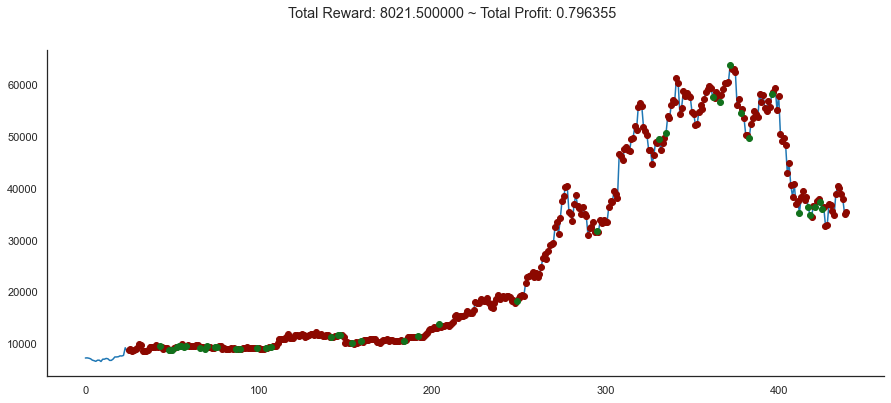

In [89]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
sns.despine()
plt.show()